In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape
     

(60000, 28, 28)

2


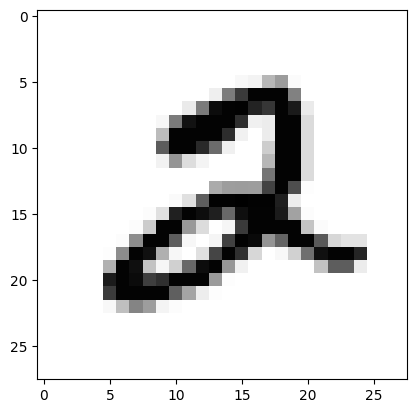

In [4]:
import matplotlib.pyplot as plt
image_index =5 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:


# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
     

In [7]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [9]:


print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Tensorflow Models

In [8]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(4,4), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.4))
model.add(Dense(20,activation=tf.nn.softmax))

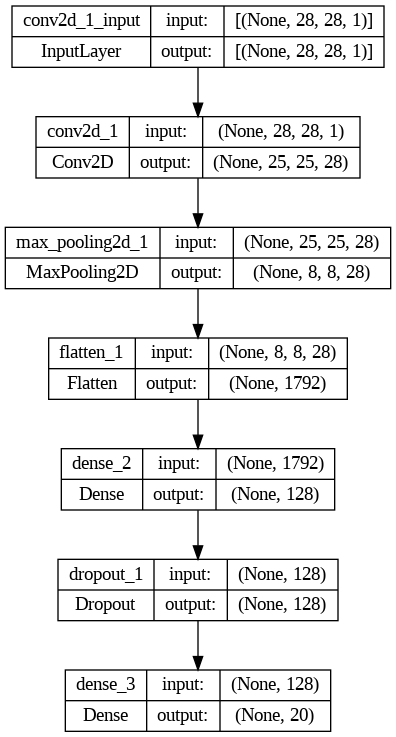

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)
     

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
     

##K-fold cross validation Algorithm 

In [11]:
from sklearn.model_selection import KFold

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
history_per_fold = []

In [12]:
k = 2
kf = KFold(n_splits=k, random_state=None)
kf_x_train= 0
kf_y_train= 0
 
acc_score = []
fold=1
for train_index , val_index in kf.split(x_train):
    kf_x_train , kf_x_val = x_train[train_index], x_train[val_index]
    kf_y_train , kf_y_val = y_train[train_index] , y_train[val_index]

    print("\nTraining for K- fold: ",fold)
    history = model.fit( kf_x_train, kf_y_train, epochs=5, batch_size= 100, validation_data=(kf_x_val, kf_y_val))
    history_per_fold.append(history)

    print("\nEvaluating model: ")
    scores= model.evaluate(x_test, y_test)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])
    fold+=1


Training for K- fold:  1
Epoch 1/5
300/300 [==============================] - 19s 59ms/step - loss: 0.5171 - accuracy: 0.8428 - val_loss: 0.1618 - val_accuracy: 0.9542
Epoch 2/5
300/300 [==============================] - 19s 62ms/step - loss: 0.1711 - accuracy: 0.9497 - val_loss: 0.0990 - val_accuracy: 0.9699
Epoch 3/5
300/300 [==============================] - 19s 62ms/step - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.0769 - val_accuracy: 0.9762
Epoch 4/5
300/300 [==============================] - 24s 80ms/step - loss: 0.0915 - accuracy: 0.9719 - val_loss: 0.0664 - val_accuracy: 0.9801
Epoch 5/5
300/300 [==============================] - 20s 66ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.0591 - val_accuracy: 0.9824

Evaluating model: 
313/313 [==============================] - 2s 6ms/step - loss: 0.0506 - accuracy: 0.9835

Training for K- fold:  2
Epoch 1/5
300/300 [==============================] - 23s 76ms/step - loss: 0.0904 - accuracy: 0.9723 - val_loss: 0.0378 - va

In [13]:
for i in range(len(scores)):
  print("K-fold ",i+1," loss: ",loss_per_fold[i])
  print("K-fold ",i+1," accuracy: ",acc_per_fold[i],"\n")
     

K-fold  1  loss:  0.0505656823515892
K-fold  1  accuracy:  0.9835000038146973 

K-fold  2  loss:  0.03930886834859848
K-fold  2  accuracy:  0.9872000217437744 



<Figure size 900x400 with 0 Axes>

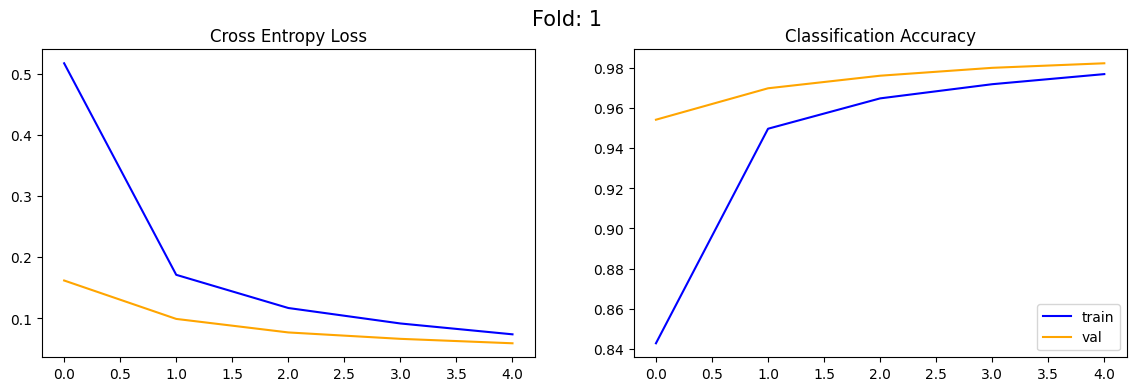

<Figure size 900x400 with 0 Axes>

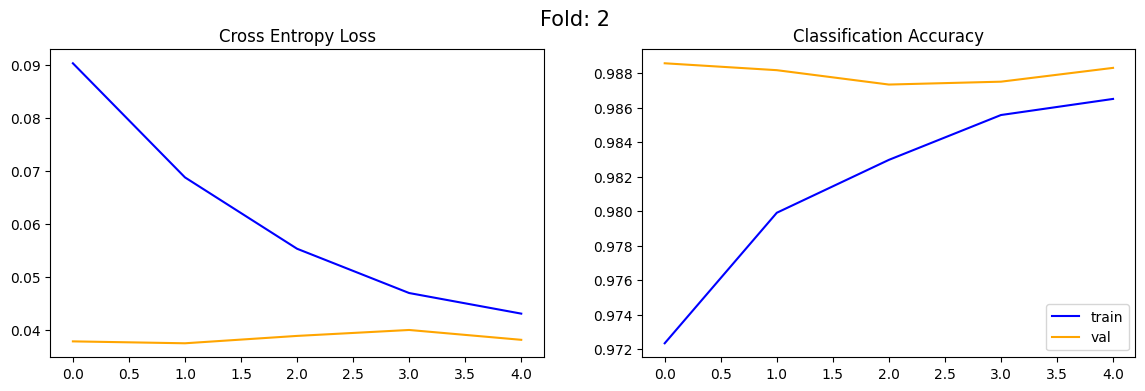

In [14]:
for i in range(len(history_per_fold)):
  fig = plt.figure(figsize=(9,4))

  # Needed to add spacing between 1st and 2nd row
  # Add a margin between the main title and sub-plots
  fig.subplots_adjust(wspace=2, top=0.85)

  fig, ax = plt.subplots(1, 2, figsize=(8,4))
  #fig.tight_layout()
  # Add the main title
  title = "Fold: "+str(i+1)
  fig.suptitle(title, fontsize=12)

  # Add the subplots
  #ax1 = fig.add_subplot(1,2,1)
  ax[0].title.set_text("Cross Entropy Loss")
  ax[0].plot(history_per_fold[i].history['loss'], color='blue', label='train')
  ax[0].plot(history_per_fold[i].history['val_loss'], color='orange', label='val')
  

  #ax2 = fig.add_subplot(1,2,2)
  ax[1].title.set_text("Classification Accuracy")
  ax[1].plot(history_per_fold[i].history['accuracy'], color='blue', label='train')
  ax[1].plot(history_per_fold[i].history['val_accuracy'], color='orange', label='val')

  plt.legend(loc="lower right")
  plt.show()
     

##Confusion Matrix

In [15]:
#Predict image label
from tqdm import tqdm
import numpy as np


y_predict=[]
for i in tqdm(x_test, desc="Predicting images"):
  y_predict.append(model.predict(np.expand_dims(i, axis=0)))

Predicting images:   0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 408ms/step


Predicting images:   0%|          | 1/10000 [00:00<1:28:20,  1.89it/s]

1/1 [==============================] - 0s 123ms/step


Predicting images:   0%|          | 2/10000 [00:00<1:07:00,  2.49it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:   0%|          | 3/10000 [00:01<55:55,  2.98it/s]  

1/1 [==============================] - 0s 38ms/step


Predicting images:   0%|          | 4/10000 [00:01<43:23,  3.84it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   0%|          | 6/10000 [00:01<29:02,  5.73it/s]

1/1 [==============================] - 0s 113ms/step


Predicting images:   0%|          | 7/10000 [00:01<31:37,  5.27it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:   0%|          | 8/10000 [00:01<33:31,  4.97it/s]

1/1 [==============================] - 0s 96ms/step


Predicting images:   0%|          | 9/10000 [00:02<34:44,  4.79it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:   0%|          | 10/10000 [00:02<37:11,  4.48it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   0%|          | 11/10000 [00:02<35:22,  4.71it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:   0%|          | 12/10000 [00:02<35:07,  4.74it/s]

1/1 [==============================] - 0s 98ms/step


Predicting images:   0%|          | 13/10000 [00:03<36:30,  4.56it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:   0%|          | 14/10000 [00:03<35:10,  4.73it/s]

1/1 [==============================] - 0s 155ms/step


Predicting images:   0%|          | 15/10000 [00:03<39:27,  4.22it/s]

1/1 [==============================] - 0s 201ms/step


Predicting images:   0%|          | 16/10000 [00:04<1:01:45,  2.69it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   0%|          | 17/10000 [00:04<54:53,  3.03it/s]  

1/1 [==============================] - 0s 34ms/step


Predicting images:   0%|          | 18/10000 [00:04<43:34,  3.82it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   0%|          | 19/10000 [00:04<36:02,  4.62it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   0%|          | 21/10000 [00:04<26:16,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   0%|          | 22/10000 [00:04<24:00,  6.93it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   0%|          | 23/10000 [00:05<22:31,  7.38it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   0%|          | 24/10000 [00:05<21:15,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   0%|          | 25/10000 [00:05<21:06,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   0%|          | 26/10000 [00:05<19:51,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   0%|          | 27/10000 [00:05<19:19,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   0%|          | 28/10000 [00:05<18:57,  8.77it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   0%|          | 30/10000 [00:05<15:40, 10.60it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   0%|          | 32/10000 [00:05<14:33, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   0%|          | 34/10000 [00:06<13:59, 11.87it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   0%|          | 36/10000 [00:06<14:01, 11.85it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   0%|          | 38/10000 [00:06<13:24, 12.39it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   0%|          | 40/10000 [00:06<12:58, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   0%|          | 42/10000 [00:06<12:34, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   0%|          | 44/10000 [00:06<12:35, 13.17it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   0%|          | 46/10000 [00:06<12:22, 13.40it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   0%|          | 48/10000 [00:07<12:23, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:   0%|          | 50/10000 [00:07<12:52, 12.88it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   1%|          | 52/10000 [00:07<12:41, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 54/10000 [00:07<12:29, 13.28it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|          | 56/10000 [00:07<12:26, 13.33it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|          | 58/10000 [00:07<12:05, 13.71it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 60/10000 [00:07<12:08, 13.64it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   1%|          | 62/10000 [00:08<12:27, 13.30it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|          | 64/10000 [00:08<12:09, 13.62it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 66/10000 [00:08<12:28, 13.27it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|          | 68/10000 [00:08<12:09, 13.61it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   1%|          | 70/10000 [00:08<12:05, 13.68it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|          | 72/10000 [00:08<11:58, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 74/10000 [00:09<11:51, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|          | 76/10000 [00:09<11:58, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 78/10000 [00:09<12:12, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|          | 80/10000 [00:09<11:58, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|          | 82/10000 [00:09<12:09, 13.59it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|          | 84/10000 [00:09<11:59, 13.79it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   1%|          | 86/10000 [00:09<12:17, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 88/10000 [00:10<12:27, 13.27it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   1%|          | 90/10000 [00:10<12:17, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 92/10000 [00:10<12:14, 13.49it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 94/10000 [00:10<12:13, 13.51it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 96/10000 [00:10<12:24, 13.30it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 98/10000 [00:10<12:21, 13.35it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|          | 100/10000 [00:10<12:14, 13.48it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 102/10000 [00:11<12:11, 13.53it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:   1%|          | 104/10000 [00:11<12:10, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:   1%|          | 106/10000 [00:11<12:26, 13.26it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|          | 108/10000 [00:11<12:20, 13.35it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|          | 110/10000 [00:11<12:13, 13.48it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:   1%|          | 112/10000 [00:11<12:36, 13.08it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|          | 114/10000 [00:12<12:38, 13.04it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   1%|          | 116/10000 [00:12<12:40, 12.99it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 118/10000 [00:12<12:29, 13.18it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|          | 120/10000 [00:12<12:10, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|          | 122/10000 [00:12<12:18, 13.38it/s]

1/1 [==============================] - 0s 92ms/step


Predicting images:   1%|          | 124/10000 [00:12<14:36, 11.27it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   1%|▏         | 126/10000 [00:13<17:12,  9.57it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:   1%|▏         | 128/10000 [00:13<19:23,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   1%|▏         | 129/10000 [00:13<20:24,  8.06it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:   1%|▏         | 130/10000 [00:13<21:40,  7.59it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:   1%|▏         | 131/10000 [00:13<21:58,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   1%|▏         | 132/10000 [00:14<21:44,  7.57it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|▏         | 133/10000 [00:14<20:35,  7.99it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|▏         | 135/10000 [00:14<17:10,  9.57it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|▏         | 137/10000 [00:14<15:44, 10.44it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   1%|▏         | 139/10000 [00:14<14:20, 11.46it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   1%|▏         | 141/10000 [00:14<13:40, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   1%|▏         | 143/10000 [00:14<13:34, 12.09it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   1%|▏         | 145/10000 [00:15<13:24, 12.25it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   1%|▏         | 147/10000 [00:15<12:51, 12.77it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   1%|▏         | 149/10000 [00:15<13:16, 12.38it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   2%|▏         | 151/10000 [00:15<13:32, 12.12it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   2%|▏         | 153/10000 [00:15<14:08, 11.61it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   2%|▏         | 155/10000 [00:15<15:38, 10.49it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 157/10000 [00:16<16:18, 10.06it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 159/10000 [00:16<25:36,  6.41it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:   2%|▏         | 160/10000 [00:16<24:54,  6.59it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:   2%|▏         | 161/10000 [00:16<23:25,  7.00it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   2%|▏         | 162/10000 [00:17<22:26,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   2%|▏         | 163/10000 [00:17<21:31,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   2%|▏         | 164/10000 [00:17<20:57,  7.82it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:   2%|▏         | 165/10000 [00:17<20:44,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   2%|▏         | 166/10000 [00:17<20:02,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   2%|▏         | 167/10000 [00:17<19:24,  8.44it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 168/10000 [00:17<19:20,  8.48it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:   2%|▏         | 169/10000 [00:17<19:09,  8.56it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:   2%|▏         | 170/10000 [00:18<19:18,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:   2%|▏         | 171/10000 [00:18<19:17,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   2%|▏         | 172/10000 [00:18<19:24,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   2%|▏         | 173/10000 [00:18<19:39,  8.33it/s]

1/1 [==============================] - 0s 92ms/step


Predicting images:   2%|▏         | 174/10000 [00:18<21:46,  7.52it/s]

1/1 [==============================] - 0s 111ms/step


Predicting images:   2%|▏         | 175/10000 [00:18<27:20,  5.99it/s]

1/1 [==============================] - 0s 141ms/step


Predicting images:   2%|▏         | 176/10000 [00:19<37:35,  4.35it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:   2%|▏         | 177/10000 [00:19<37:33,  4.36it/s]

1/1 [==============================] - 0s 113ms/step


Predicting images:   2%|▏         | 178/10000 [00:19<40:33,  4.04it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   2%|▏         | 179/10000 [00:19<39:12,  4.17it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:   2%|▏         | 180/10000 [00:20<33:14,  4.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   2%|▏         | 181/10000 [00:20<29:07,  5.62it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   2%|▏         | 182/10000 [00:20<27:19,  5.99it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   2%|▏         | 183/10000 [00:20<24:05,  6.79it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   2%|▏         | 185/10000 [00:20<19:25,  8.42it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:   2%|▏         | 186/10000 [00:20<24:43,  6.61it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 187/10000 [00:20<23:42,  6.90it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:   2%|▏         | 188/10000 [00:21<25:13,  6.48it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:   2%|▏         | 189/10000 [00:21<26:23,  6.20it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   2%|▏         | 190/10000 [00:21<24:04,  6.79it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   2%|▏         | 192/10000 [00:21<18:45,  8.72it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:   2%|▏         | 193/10000 [00:21<19:27,  8.40it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   2%|▏         | 194/10000 [00:21<20:40,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   2%|▏         | 195/10000 [00:21<19:59,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:   2%|▏         | 196/10000 [00:22<20:21,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   2%|▏         | 197/10000 [00:22<20:07,  8.12it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   2%|▏         | 198/10000 [00:22<21:29,  7.60it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   2%|▏         | 200/10000 [00:22<17:08,  9.53it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   2%|▏         | 202/10000 [00:22<16:29,  9.90it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:   2%|▏         | 203/10000 [00:22<17:19,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   2%|▏         | 204/10000 [00:22<18:06,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   2%|▏         | 205/10000 [00:23<18:23,  8.87it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:   2%|▏         | 206/10000 [00:23<20:00,  8.16it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   2%|▏         | 208/10000 [00:23<16:23,  9.96it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 210/10000 [00:23<15:58, 10.21it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:   2%|▏         | 212/10000 [00:23<18:30,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   2%|▏         | 213/10000 [00:23<19:24,  8.41it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 214/10000 [00:24<19:28,  8.38it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   2%|▏         | 215/10000 [00:24<19:18,  8.45it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   2%|▏         | 217/10000 [00:24<16:26,  9.92it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   2%|▏         | 219/10000 [00:24<16:20,  9.98it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:   2%|▏         | 220/10000 [00:24<18:25,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 221/10000 [00:24<19:07,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   2%|▏         | 222/10000 [00:24<20:04,  8.12it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 223/10000 [00:25<19:43,  8.26it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:   2%|▏         | 224/10000 [00:25<19:28,  8.37it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   2%|▏         | 225/10000 [00:25<20:01,  8.13it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   2%|▏         | 226/10000 [00:25<19:13,  8.48it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:   2%|▏         | 228/10000 [00:25<16:46,  9.71it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   2%|▏         | 230/10000 [00:25<15:25, 10.55it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:   2%|▏         | 232/10000 [00:26<16:41,  9.75it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   2%|▏         | 233/10000 [00:26<18:07,  8.98it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:   2%|▏         | 234/10000 [00:26<18:42,  8.70it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:   2%|▏         | 235/10000 [00:26<20:24,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:   2%|▏         | 236/10000 [00:26<20:03,  8.11it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:   2%|▏         | 237/10000 [00:26<21:08,  7.69it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   2%|▏         | 238/10000 [00:26<20:15,  8.03it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   2%|▏         | 240/10000 [00:26<17:17,  9.41it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   2%|▏         | 242/10000 [00:27<15:30, 10.48it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   2%|▏         | 244/10000 [00:27<16:56,  9.59it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   2%|▏         | 245/10000 [00:27<17:15,  9.42it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▏         | 246/10000 [00:27<17:48,  9.13it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   2%|▏         | 248/10000 [00:27<15:58, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   2%|▎         | 250/10000 [00:27<16:37,  9.77it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:   3%|▎         | 251/10000 [00:28<17:20,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   3%|▎         | 252/10000 [00:28<18:22,  8.84it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   3%|▎         | 253/10000 [00:28<18:34,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 254/10000 [00:28<18:47,  8.64it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:   3%|▎         | 255/10000 [00:28<19:51,  8.18it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   3%|▎         | 256/10000 [00:28<20:16,  8.01it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   3%|▎         | 257/10000 [00:28<19:25,  8.36it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   3%|▎         | 259/10000 [00:29<16:01, 10.14it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 261/10000 [00:29<14:26, 11.24it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   3%|▎         | 263/10000 [00:29<14:08, 11.48it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   3%|▎         | 265/10000 [00:29<13:32, 11.99it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 267/10000 [00:29<13:11, 12.29it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 269/10000 [00:29<12:39, 12.81it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   3%|▎         | 271/10000 [00:29<13:41, 11.84it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   3%|▎         | 273/10000 [00:30<15:07, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   3%|▎         | 275/10000 [00:30<15:39, 10.35it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   3%|▎         | 277/10000 [00:30<15:50, 10.22it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   3%|▎         | 279/10000 [00:30<16:39,  9.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   3%|▎         | 280/10000 [00:30<17:07,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   3%|▎         | 281/10000 [00:31<17:28,  9.27it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:   3%|▎         | 282/10000 [00:31<18:08,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 283/10000 [00:31<18:06,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   3%|▎         | 284/10000 [00:31<17:40,  9.16it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   3%|▎         | 285/10000 [00:31<17:45,  9.12it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   3%|▎         | 286/10000 [00:31<18:06,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   3%|▎         | 287/10000 [00:31<17:51,  9.06it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:   3%|▎         | 289/10000 [00:31<17:34,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 290/10000 [00:32<18:38,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 291/10000 [00:32<18:18,  8.84it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   3%|▎         | 292/10000 [00:32<18:16,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   3%|▎         | 293/10000 [00:32<17:58,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   3%|▎         | 294/10000 [00:32<18:33,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   3%|▎         | 295/10000 [00:32<18:18,  8.83it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   3%|▎         | 296/10000 [00:32<17:42,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 297/10000 [00:32<18:23,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   3%|▎         | 298/10000 [00:33<19:01,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 299/10000 [00:33<18:54,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 300/10000 [00:33<18:38,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 301/10000 [00:33<17:59,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   3%|▎         | 302/10000 [00:33<17:52,  9.05it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   3%|▎         | 303/10000 [00:33<18:19,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   3%|▎         | 304/10000 [00:33<18:26,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   3%|▎         | 305/10000 [00:33<18:07,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   3%|▎         | 306/10000 [00:33<18:05,  8.93it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:   3%|▎         | 307/10000 [00:34<18:07,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   3%|▎         | 308/10000 [00:34<18:19,  8.81it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 310/10000 [00:34<15:47, 10.23it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 312/10000 [00:34<14:31, 11.11it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 314/10000 [00:34<13:41, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:   3%|▎         | 316/10000 [00:34<13:22, 12.06it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   3%|▎         | 318/10000 [00:34<13:10, 12.25it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   3%|▎         | 320/10000 [00:35<12:48, 12.59it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   3%|▎         | 322/10000 [00:35<12:39, 12.74it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   3%|▎         | 324/10000 [00:35<12:23, 13.02it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   3%|▎         | 326/10000 [00:35<12:46, 12.61it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 328/10000 [00:35<12:40, 12.72it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 330/10000 [00:35<12:32, 12.85it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   3%|▎         | 332/10000 [00:36<12:41, 12.70it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:   3%|▎         | 334/10000 [00:36<12:55, 12.46it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   3%|▎         | 336/10000 [00:36<12:49, 12.56it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   3%|▎         | 338/10000 [00:36<12:35, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 340/10000 [00:36<12:19, 13.06it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   3%|▎         | 342/10000 [00:36<12:12, 13.18it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   3%|▎         | 344/10000 [00:36<12:38, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 346/10000 [00:37<12:54, 12.46it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   3%|▎         | 348/10000 [00:37<13:02, 12.33it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   4%|▎         | 350/10000 [00:37<12:57, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▎         | 352/10000 [00:37<13:17, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   4%|▎         | 354/10000 [00:37<13:08, 12.23it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   4%|▎         | 356/10000 [00:37<13:00, 12.36it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▎         | 358/10000 [00:38<12:38, 12.72it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▎         | 360/10000 [00:38<12:42, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   4%|▎         | 362/10000 [00:38<13:13, 12.14it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▎         | 364/10000 [00:38<12:54, 12.43it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   4%|▎         | 366/10000 [00:38<13:04, 12.27it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▎         | 368/10000 [00:38<12:56, 12.40it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▎         | 370/10000 [00:39<12:54, 12.43it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   4%|▎         | 372/10000 [00:39<12:58, 12.36it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▎         | 374/10000 [00:39<12:37, 12.70it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 376/10000 [00:39<12:25, 12.91it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 378/10000 [00:39<12:11, 13.16it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 380/10000 [00:39<12:22, 12.96it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 382/10000 [00:39<12:22, 12.96it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 384/10000 [00:40<12:10, 13.16it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▍         | 386/10000 [00:40<12:32, 12.77it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 388/10000 [00:40<12:24, 12.91it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 390/10000 [00:40<12:29, 12.83it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 392/10000 [00:40<12:19, 12.99it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▍         | 394/10000 [00:40<12:18, 13.00it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▍         | 396/10000 [00:41<12:25, 12.87it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 398/10000 [00:41<12:46, 12.52it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▍         | 400/10000 [00:41<12:48, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 402/10000 [00:41<12:44, 12.55it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 404/10000 [00:41<12:44, 12.55it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:   4%|▍         | 406/10000 [00:41<13:03, 12.25it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 408/10000 [00:42<12:56, 12.36it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 410/10000 [00:42<12:56, 12.35it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 412/10000 [00:42<12:43, 12.56it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▍         | 414/10000 [00:42<12:50, 12.44it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 416/10000 [00:42<12:44, 12.53it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 418/10000 [00:42<12:44, 12.53it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 420/10000 [00:42<12:56, 12.34it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   4%|▍         | 422/10000 [00:43<12:43, 12.54it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 424/10000 [00:43<13:04, 12.20it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▍         | 426/10000 [00:43<12:51, 12.41it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 428/10000 [00:43<12:35, 12.67it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 430/10000 [00:43<12:25, 12.83it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   4%|▍         | 432/10000 [00:43<12:28, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   4%|▍         | 434/10000 [00:44<12:30, 12.75it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   4%|▍         | 436/10000 [00:44<14:23, 11.07it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   4%|▍         | 438/10000 [00:44<14:53, 10.70it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   4%|▍         | 440/10000 [00:44<15:53, 10.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   4%|▍         | 442/10000 [00:44<16:05,  9.90it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   4%|▍         | 444/10000 [00:45<16:25,  9.70it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   4%|▍         | 446/10000 [00:45<16:46,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   4%|▍         | 447/10000 [00:45<16:50,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   4%|▍         | 449/10000 [00:45<16:38,  9.57it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   4%|▍         | 450/10000 [00:45<16:37,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   5%|▍         | 451/10000 [00:45<17:25,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   5%|▍         | 452/10000 [00:46<17:08,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   5%|▍         | 453/10000 [00:46<17:12,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   5%|▍         | 454/10000 [00:46<17:03,  9.33it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   5%|▍         | 455/10000 [00:46<18:01,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   5%|▍         | 456/10000 [00:46<17:55,  8.87it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   5%|▍         | 457/10000 [00:46<17:37,  9.02it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   5%|▍         | 458/10000 [00:46<18:08,  8.77it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:   5%|▍         | 459/10000 [00:46<18:16,  8.70it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   5%|▍         | 460/10000 [00:46<18:21,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   5%|▍         | 461/10000 [00:47<18:14,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   5%|▍         | 462/10000 [00:47<18:33,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   5%|▍         | 463/10000 [00:47<17:55,  8.87it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:   5%|▍         | 464/10000 [00:47<18:40,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   5%|▍         | 465/10000 [00:47<19:15,  8.25it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   5%|▍         | 466/10000 [00:47<19:00,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   5%|▍         | 467/10000 [00:47<19:07,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   5%|▍         | 468/10000 [00:47<18:23,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   5%|▍         | 469/10000 [00:48<18:26,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   5%|▍         | 470/10000 [00:48<17:44,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   5%|▍         | 471/10000 [00:48<17:42,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   5%|▍         | 472/10000 [00:48<17:37,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   5%|▍         | 473/10000 [00:48<18:32,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   5%|▍         | 474/10000 [00:48<18:31,  8.57it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   5%|▍         | 476/10000 [00:48<15:59,  9.92it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   5%|▍         | 478/10000 [00:48<14:37, 10.85it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▍         | 480/10000 [00:49<13:34, 11.69it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▍         | 482/10000 [00:49<13:15, 11.96it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   5%|▍         | 484/10000 [00:49<13:07, 12.09it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▍         | 486/10000 [00:49<13:03, 12.14it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▍         | 488/10000 [00:49<12:38, 12.53it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▍         | 490/10000 [00:49<12:55, 12.26it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   5%|▍         | 492/10000 [00:50<12:31, 12.66it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   5%|▍         | 494/10000 [00:50<12:52, 12.31it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▍         | 496/10000 [00:50<12:46, 12.40it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▍         | 498/10000 [00:50<12:53, 12.28it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 500/10000 [00:50<12:55, 12.25it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 502/10000 [00:50<12:53, 12.28it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 504/10000 [00:50<12:45, 12.41it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 506/10000 [00:51<12:57, 12.21it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▌         | 508/10000 [00:51<12:44, 12.42it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   5%|▌         | 510/10000 [00:51<12:41, 12.46it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:   5%|▌         | 512/10000 [00:51<12:57, 12.20it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 514/10000 [00:51<12:34, 12.58it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 516/10000 [00:51<12:25, 12.71it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   5%|▌         | 518/10000 [00:52<12:17, 12.85it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   5%|▌         | 520/10000 [00:52<12:34, 12.56it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▌         | 522/10000 [00:52<12:32, 12.59it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▌         | 524/10000 [00:52<12:08, 13.00it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▌         | 526/10000 [00:52<12:19, 12.80it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   5%|▌         | 528/10000 [00:52<12:25, 12.71it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   5%|▌         | 530/10000 [00:53<12:29, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▌         | 532/10000 [00:53<12:18, 12.83it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   5%|▌         | 534/10000 [00:53<12:21, 12.76it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 536/10000 [00:53<12:29, 12.63it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:   5%|▌         | 538/10000 [00:53<13:03, 12.08it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   5%|▌         | 540/10000 [00:53<13:24, 11.77it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   5%|▌         | 542/10000 [00:54<13:17, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   5%|▌         | 544/10000 [00:54<13:13, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   5%|▌         | 546/10000 [00:54<13:22, 11.78it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   5%|▌         | 548/10000 [00:54<13:21, 11.80it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▌         | 550/10000 [00:54<13:16, 11.86it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▌         | 552/10000 [00:54<13:01, 12.08it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   6%|▌         | 554/10000 [00:55<13:12, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   6%|▌         | 556/10000 [00:55<13:29, 11.67it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 558/10000 [00:55<13:31, 11.64it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 560/10000 [00:55<13:19, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:   6%|▌         | 562/10000 [00:55<13:09, 11.96it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 564/10000 [00:55<13:13, 11.89it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 566/10000 [00:56<13:12, 11.90it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▌         | 568/10000 [00:56<12:59, 12.10it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 570/10000 [00:56<12:37, 12.44it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 572/10000 [00:56<12:38, 12.43it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 574/10000 [00:56<12:29, 12.57it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 576/10000 [00:56<12:39, 12.40it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 578/10000 [00:57<12:31, 12.54it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:   6%|▌         | 580/10000 [00:57<12:28, 12.58it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 582/10000 [00:57<12:22, 12.69it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 584/10000 [00:57<12:23, 12.67it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▌         | 586/10000 [00:57<12:12, 12.85it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 588/10000 [00:57<12:28, 12.58it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 590/10000 [00:57<12:22, 12.68it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 592/10000 [00:58<12:27, 12.59it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▌         | 594/10000 [00:58<12:35, 12.45it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▌         | 596/10000 [00:58<12:33, 12.47it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   6%|▌         | 598/10000 [00:58<12:54, 12.14it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:   6%|▌         | 600/10000 [00:58<14:43, 10.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   6%|▌         | 602/10000 [00:59<15:32, 10.08it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   6%|▌         | 604/10000 [00:59<16:22,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   6%|▌         | 605/10000 [00:59<16:44,  9.36it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   6%|▌         | 606/10000 [00:59<17:03,  9.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   6%|▌         | 607/10000 [00:59<17:11,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   6%|▌         | 608/10000 [00:59<17:03,  9.18it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   6%|▌         | 609/10000 [00:59<18:14,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   6%|▌         | 610/10000 [01:00<18:07,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   6%|▌         | 611/10000 [01:00<17:48,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   6%|▌         | 612/10000 [01:00<17:23,  9.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   6%|▌         | 613/10000 [01:00<17:08,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   6%|▌         | 614/10000 [01:00<18:08,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   6%|▌         | 615/10000 [01:00<17:47,  8.79it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:   6%|▌         | 616/10000 [01:00<18:07,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   6%|▌         | 617/10000 [01:00<18:23,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   6%|▌         | 618/10000 [01:00<18:19,  8.53it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   6%|▌         | 619/10000 [01:01<18:38,  8.38it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   6%|▌         | 620/10000 [01:01<18:24,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   6%|▌         | 621/10000 [01:01<18:20,  8.53it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   6%|▌         | 622/10000 [01:01<18:49,  8.30it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   6%|▌         | 623/10000 [01:01<18:40,  8.37it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   6%|▌         | 624/10000 [01:01<18:31,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   6%|▋         | 625/10000 [01:01<18:32,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   6%|▋         | 626/10000 [01:01<18:41,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   6%|▋         | 627/10000 [01:02<20:08,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   6%|▋         | 628/10000 [01:02<19:00,  8.22it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   6%|▋         | 629/10000 [01:02<19:05,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   6%|▋         | 631/10000 [01:02<17:21,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   6%|▋         | 632/10000 [01:02<17:19,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   6%|▋         | 633/10000 [01:02<17:25,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   6%|▋         | 634/10000 [01:02<17:25,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:   6%|▋         | 636/10000 [01:03<17:23,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   6%|▋         | 637/10000 [01:03<17:14,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   6%|▋         | 638/10000 [01:03<17:00,  9.17it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▋         | 640/10000 [01:03<15:34, 10.02it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▋         | 642/10000 [01:03<14:31, 10.74it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   6%|▋         | 644/10000 [01:03<13:44, 11.35it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▋         | 646/10000 [01:03<13:20, 11.68it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   6%|▋         | 648/10000 [01:04<13:42, 11.37it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   6%|▋         | 650/10000 [01:04<13:17, 11.72it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 652/10000 [01:04<12:54, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   7%|▋         | 654/10000 [01:04<13:02, 11.94it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 656/10000 [01:04<12:47, 12.18it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   7%|▋         | 658/10000 [01:04<12:27, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   7%|▋         | 660/10000 [01:05<12:49, 12.13it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 662/10000 [01:05<12:36, 12.35it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 664/10000 [01:05<12:54, 12.06it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 666/10000 [01:05<12:51, 12.10it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   7%|▋         | 668/10000 [01:05<12:57, 12.00it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 670/10000 [01:05<13:21, 11.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   7%|▋         | 672/10000 [01:06<13:28, 11.54it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   7%|▋         | 674/10000 [01:06<13:25, 11.58it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 676/10000 [01:06<13:19, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   7%|▋         | 678/10000 [01:06<13:11, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   7%|▋         | 680/10000 [01:06<13:11, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   7%|▋         | 682/10000 [01:06<13:32, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   7%|▋         | 684/10000 [01:07<13:48, 11.24it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 686/10000 [01:07<13:27, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 688/10000 [01:07<13:16, 11.70it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:   7%|▋         | 690/10000 [01:07<13:54, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:   7%|▋         | 692/10000 [01:07<13:57, 11.11it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   7%|▋         | 694/10000 [01:08<13:25, 11.56it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 696/10000 [01:08<13:09, 11.78it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 698/10000 [01:08<12:47, 12.11it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 700/10000 [01:08<12:54, 12.00it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 702/10000 [01:08<13:06, 11.82it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 704/10000 [01:08<12:47, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:   7%|▋         | 706/10000 [01:08<12:39, 12.24it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:   7%|▋         | 708/10000 [01:09<12:56, 11.96it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 710/10000 [01:09<12:41, 12.21it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   7%|▋         | 712/10000 [01:09<12:38, 12.24it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 714/10000 [01:09<12:26, 12.45it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   7%|▋         | 716/10000 [01:09<12:30, 12.37it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 718/10000 [01:09<12:48, 12.08it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 720/10000 [01:10<12:38, 12.24it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 722/10000 [01:10<12:27, 12.42it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 724/10000 [01:10<12:23, 12.48it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 726/10000 [01:10<12:35, 12.28it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 728/10000 [01:10<12:41, 12.18it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   7%|▋         | 730/10000 [01:10<12:33, 12.31it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 732/10000 [01:11<12:18, 12.56it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   7%|▋         | 734/10000 [01:11<12:38, 12.22it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 736/10000 [01:11<12:33, 12.29it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 738/10000 [01:11<12:18, 12.54it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 740/10000 [01:11<12:11, 12.65it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 742/10000 [01:11<12:10, 12.68it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   7%|▋         | 744/10000 [01:12<12:59, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:   7%|▋         | 746/10000 [01:12<13:02, 11.83it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   7%|▋         | 748/10000 [01:12<12:39, 12.18it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   8%|▊         | 750/10000 [01:12<12:37, 12.22it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   8%|▊         | 752/10000 [01:12<12:38, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   8%|▊         | 754/10000 [01:12<12:55, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 756/10000 [01:13<12:43, 12.11it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   8%|▊         | 758/10000 [01:13<12:36, 12.21it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:   8%|▊         | 760/10000 [01:13<13:30, 11.41it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   8%|▊         | 762/10000 [01:13<14:53, 10.34it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   8%|▊         | 764/10000 [01:13<15:57,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   8%|▊         | 765/10000 [01:14<16:15,  9.46it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   8%|▊         | 766/10000 [01:14<16:26,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 767/10000 [01:14<16:58,  9.06it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 768/10000 [01:14<17:29,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 769/10000 [01:14<17:41,  8.69it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:   8%|▊         | 770/10000 [01:14<19:18,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 771/10000 [01:14<18:48,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   8%|▊         | 772/10000 [01:14<18:43,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 773/10000 [01:14<18:10,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 774/10000 [01:15<17:54,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 775/10000 [01:15<18:28,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:   8%|▊         | 776/10000 [01:15<18:28,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 777/10000 [01:15<18:15,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   8%|▊         | 778/10000 [01:15<19:19,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   8%|▊         | 779/10000 [01:15<19:33,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:   8%|▊         | 780/10000 [01:15<19:57,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 781/10000 [01:15<18:36,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   8%|▊         | 782/10000 [01:16<17:45,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 783/10000 [01:16<18:17,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 784/10000 [01:16<17:45,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   8%|▊         | 785/10000 [01:16<19:02,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 786/10000 [01:16<18:51,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   8%|▊         | 787/10000 [01:16<19:11,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   8%|▊         | 788/10000 [01:16<19:09,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 789/10000 [01:16<19:47,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 790/10000 [01:17<18:27,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   8%|▊         | 791/10000 [01:17<18:17,  8.39it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   8%|▊         | 793/10000 [01:17<17:09,  8.95it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:   8%|▊         | 794/10000 [01:17<17:24,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 795/10000 [01:17<17:49,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 796/10000 [01:17<17:44,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 797/10000 [01:17<18:00,  8.51it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:   8%|▊         | 798/10000 [01:18<18:33,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   8%|▊         | 799/10000 [01:18<18:54,  8.11it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:   8%|▊         | 800/10000 [01:18<18:01,  8.51it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   8%|▊         | 802/10000 [01:18<15:30,  9.88it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   8%|▊         | 804/10000 [01:18<14:38, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 806/10000 [01:18<14:06, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 808/10000 [01:18<13:46, 11.12it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 810/10000 [01:19<14:02, 10.90it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 812/10000 [01:19<13:33, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   8%|▊         | 814/10000 [01:19<13:55, 11.00it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:   8%|▊         | 816/10000 [01:19<13:44, 11.14it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 818/10000 [01:19<13:33, 11.29it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 820/10000 [01:19<13:34, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   8%|▊         | 822/10000 [01:20<13:08, 11.64it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 824/10000 [01:20<13:15, 11.54it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   8%|▊         | 826/10000 [01:20<12:48, 11.95it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   8%|▊         | 828/10000 [01:20<12:37, 12.11it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   8%|▊         | 830/10000 [01:20<12:24, 12.31it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   8%|▊         | 832/10000 [01:20<12:50, 11.89it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   8%|▊         | 834/10000 [01:21<12:32, 12.17it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   8%|▊         | 836/10000 [01:21<12:30, 12.21it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   8%|▊         | 838/10000 [01:21<12:27, 12.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   8%|▊         | 840/10000 [01:21<12:34, 12.14it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   8%|▊         | 842/10000 [01:21<12:50, 11.89it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   8%|▊         | 844/10000 [01:21<13:00, 11.73it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   8%|▊         | 846/10000 [01:22<12:35, 12.12it/s]

1/1 [==============================] - 0s 126ms/step


Predicting images:   8%|▊         | 848/10000 [01:22<15:50,  9.62it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:   8%|▊         | 850/10000 [01:22<20:00,  7.62it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▊         | 852/10000 [01:22<17:45,  8.58it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:   9%|▊         | 854/10000 [01:23<15:51,  9.61it/s]

1/1 [==============================] - 0s 117ms/step


Predicting images:   9%|▊         | 856/10000 [01:23<18:00,  8.46it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:   9%|▊         | 857/10000 [01:23<22:02,  6.91it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▊         | 858/10000 [01:23<21:16,  7.16it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:   9%|▊         | 860/10000 [01:24<18:25,  8.27it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:   9%|▊         | 862/10000 [01:24<16:18,  9.34it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:   9%|▊         | 864/10000 [01:24<17:15,  8.82it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:   9%|▊         | 865/10000 [01:24<20:54,  7.28it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:   9%|▊         | 866/10000 [01:24<22:33,  6.75it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:   9%|▊         | 867/10000 [01:24<20:58,  7.26it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   9%|▊         | 869/10000 [01:25<17:36,  8.64it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   9%|▊         | 871/10000 [01:25<15:50,  9.60it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   9%|▊         | 873/10000 [01:25<14:45, 10.30it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   9%|▉         | 875/10000 [01:25<14:00, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   9%|▉         | 877/10000 [01:25<13:51, 10.97it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▉         | 879/10000 [01:25<13:30, 11.25it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▉         | 881/10000 [01:26<12:55, 11.76it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▉         | 883/10000 [01:26<12:35, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   9%|▉         | 885/10000 [01:26<12:50, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▉         | 887/10000 [01:26<12:46, 11.89it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▉         | 889/10000 [01:26<12:44, 11.91it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:   9%|▉         | 891/10000 [01:26<12:46, 11.88it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:   9%|▉         | 893/10000 [01:27<12:26, 12.20it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:   9%|▉         | 895/10000 [01:27<12:44, 11.91it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   9%|▉         | 897/10000 [01:27<12:27, 12.18it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:   9%|▉         | 899/10000 [01:27<12:17, 12.34it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:   9%|▉         | 901/10000 [01:27<12:23, 12.24it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:   9%|▉         | 903/10000 [01:27<12:48, 11.83it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:   9%|▉         | 905/10000 [01:28<12:38, 12.00it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 907/10000 [01:28<12:53, 11.76it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 909/10000 [01:28<13:59, 10.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 911/10000 [01:28<14:43, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   9%|▉         | 913/10000 [01:28<16:11,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   9%|▉         | 915/10000 [01:29<15:35,  9.71it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:   9%|▉         | 916/10000 [01:29<16:12,  9.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 917/10000 [01:29<16:25,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   9%|▉         | 918/10000 [01:29<16:30,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   9%|▉         | 919/10000 [01:29<16:48,  9.00it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   9%|▉         | 920/10000 [01:29<17:10,  8.81it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:   9%|▉         | 921/10000 [01:29<17:42,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 922/10000 [01:30<18:15,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 924/10000 [01:30<17:08,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 925/10000 [01:30<17:53,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 926/10000 [01:30<18:04,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 927/10000 [01:30<17:19,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:   9%|▉         | 928/10000 [01:30<17:05,  8.85it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   9%|▉         | 929/10000 [01:30<17:33,  8.61it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:   9%|▉         | 930/10000 [01:30<19:19,  7.82it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:   9%|▉         | 931/10000 [01:31<19:54,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 932/10000 [01:31<20:56,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:   9%|▉         | 933/10000 [01:31<19:41,  7.68it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:   9%|▉         | 934/10000 [01:31<18:59,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:   9%|▉         | 935/10000 [01:31<18:39,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 936/10000 [01:31<19:11,  7.87it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:   9%|▉         | 937/10000 [01:31<19:02,  7.93it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:   9%|▉         | 938/10000 [01:32<21:05,  7.16it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 939/10000 [01:32<20:26,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:   9%|▉         | 940/10000 [01:32<20:40,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 941/10000 [01:32<19:38,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 942/10000 [01:32<19:00,  7.94it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:   9%|▉         | 943/10000 [01:32<19:51,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   9%|▉         | 944/10000 [01:32<19:47,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:   9%|▉         | 945/10000 [01:32<19:11,  7.87it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:   9%|▉         | 946/10000 [01:33<18:58,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:   9%|▉         | 947/10000 [01:33<19:58,  7.55it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:   9%|▉         | 948/10000 [01:33<19:36,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:   9%|▉         | 949/10000 [01:33<18:20,  8.22it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|▉         | 951/10000 [01:33<16:05,  9.37it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|▉         | 952/10000 [01:33<15:51,  9.51it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|▉         | 954/10000 [01:33<14:55, 10.10it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  10%|▉         | 955/10000 [01:33<15:03, 10.02it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  10%|▉         | 957/10000 [01:34<14:56, 10.09it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  10%|▉         | 959/10000 [01:34<14:12, 10.60it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|▉         | 961/10000 [01:34<13:45, 10.95it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|▉         | 963/10000 [01:34<13:19, 11.30it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  10%|▉         | 965/10000 [01:34<13:35, 11.07it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|▉         | 967/10000 [01:35<13:19, 11.30it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  10%|▉         | 969/10000 [01:35<13:07, 11.47it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  10%|▉         | 971/10000 [01:35<12:59, 11.58it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  10%|▉         | 973/10000 [01:35<12:45, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  10%|▉         | 975/10000 [01:35<13:19, 11.28it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|▉         | 977/10000 [01:35<13:06, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  10%|▉         | 979/10000 [01:36<13:13, 11.37it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  10%|▉         | 981/10000 [01:36<13:27, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|▉         | 983/10000 [01:36<13:12, 11.37it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|▉         | 985/10000 [01:36<13:09, 11.42it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  10%|▉         | 987/10000 [01:36<13:01, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  10%|▉         | 989/10000 [01:36<12:58, 11.58it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  10%|▉         | 991/10000 [01:37<12:55, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  10%|▉         | 993/10000 [01:37<13:23, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  10%|▉         | 995/10000 [01:37<12:52, 11.65it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  10%|▉         | 997/10000 [01:37<12:46, 11.75it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|▉         | 999/10000 [01:37<12:43, 11.79it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|█         | 1001/10000 [01:38<13:14, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  10%|█         | 1003/10000 [01:38<13:35, 11.03it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  10%|█         | 1005/10000 [01:38<13:19, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|█         | 1007/10000 [01:38<13:09, 11.39it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  10%|█         | 1009/10000 [01:38<13:24, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|█         | 1011/10000 [01:38<13:06, 11.44it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|█         | 1013/10000 [01:39<13:09, 11.38it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  10%|█         | 1015/10000 [01:39<13:08, 11.39it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  10%|█         | 1017/10000 [01:39<13:10, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|█         | 1019/10000 [01:39<13:15, 11.29it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|█         | 1021/10000 [01:39<13:13, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|█         | 1023/10000 [01:39<13:34, 11.02it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|█         | 1025/10000 [01:40<13:31, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  10%|█         | 1027/10000 [01:40<13:39, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  10%|█         | 1029/10000 [01:40<13:29, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|█         | 1031/10000 [01:40<13:24, 11.15it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  10%|█         | 1033/10000 [01:40<13:14, 11.29it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  10%|█         | 1035/10000 [01:41<13:05, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  10%|█         | 1037/10000 [01:41<13:25, 11.13it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  10%|█         | 1039/10000 [01:41<13:19, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|█         | 1041/10000 [01:41<13:10, 11.33it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  10%|█         | 1043/10000 [01:41<13:01, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  10%|█         | 1045/10000 [01:41<13:27, 11.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  10%|█         | 1047/10000 [01:42<13:39, 10.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  10%|█         | 1049/10000 [01:42<13:42, 10.89it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  11%|█         | 1051/10000 [01:42<13:27, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  11%|█         | 1053/10000 [01:42<13:38, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  11%|█         | 1055/10000 [01:42<13:51, 10.75it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  11%|█         | 1057/10000 [01:43<13:39, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  11%|█         | 1059/10000 [01:43<13:51, 10.75it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  11%|█         | 1061/10000 [01:43<13:58, 10.66it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  11%|█         | 1063/10000 [01:43<15:24,  9.66it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  11%|█         | 1064/10000 [01:43<16:23,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  11%|█         | 1065/10000 [01:43<16:51,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  11%|█         | 1066/10000 [01:44<17:02,  8.74it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  11%|█         | 1067/10000 [01:44<17:00,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  11%|█         | 1068/10000 [01:44<18:07,  8.21it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  11%|█         | 1069/10000 [01:44<18:29,  8.05it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  11%|█         | 1070/10000 [01:44<18:36,  8.00it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  11%|█         | 1071/10000 [01:44<18:52,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  11%|█         | 1072/10000 [01:44<19:11,  7.75it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  11%|█         | 1073/10000 [01:44<18:51,  7.89it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  11%|█         | 1074/10000 [01:45<18:56,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  11%|█         | 1075/10000 [01:45<18:57,  7.85it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  11%|█         | 1076/10000 [01:45<19:04,  7.79it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  11%|█         | 1077/10000 [01:45<19:28,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  11%|█         | 1078/10000 [01:45<18:56,  7.85it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  11%|█         | 1079/10000 [01:45<19:14,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█         | 1080/10000 [01:45<18:03,  8.24it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  11%|█         | 1081/10000 [01:46<42:34,  3.49it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  11%|█         | 1082/10000 [01:46<35:46,  4.15it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  11%|█         | 1083/10000 [01:46<30:34,  4.86it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  11%|█         | 1084/10000 [01:46<28:59,  5.13it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  11%|█         | 1085/10000 [01:47<26:39,  5.57it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  11%|█         | 1086/10000 [01:47<24:07,  6.16it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  11%|█         | 1087/10000 [01:47<23:36,  6.29it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  11%|█         | 1088/10000 [01:47<22:31,  6.59it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  11%|█         | 1089/10000 [01:47<22:11,  6.69it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  11%|█         | 1090/10000 [01:47<24:06,  6.16it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  11%|█         | 1091/10000 [01:47<23:03,  6.44it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  11%|█         | 1092/10000 [01:48<23:13,  6.39it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  11%|█         | 1093/10000 [01:48<22:18,  6.66it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  11%|█         | 1094/10000 [01:48<21:31,  6.90it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  11%|█         | 1095/10000 [01:48<20:46,  7.14it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  11%|█         | 1096/10000 [01:48<21:16,  6.97it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█         | 1097/10000 [01:48<20:12,  7.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1098/10000 [01:48<18:41,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1099/10000 [01:49<19:12,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1100/10000 [01:49<18:16,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  11%|█         | 1101/10000 [01:49<18:15,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  11%|█         | 1102/10000 [01:49<17:33,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1103/10000 [01:49<17:14,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1104/10000 [01:49<16:37,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  11%|█         | 1105/10000 [01:49<16:33,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1106/10000 [01:49<16:39,  8.90it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  11%|█         | 1107/10000 [01:49<17:24,  8.51it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  11%|█         | 1108/10000 [01:50<31:36,  4.69it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  11%|█         | 1109/10000 [01:50<31:08,  4.76it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  11%|█         | 1110/10000 [01:50<27:06,  5.47it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1111/10000 [01:50<23:38,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1112/10000 [01:50<21:16,  6.96it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█         | 1113/10000 [01:51<20:09,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  11%|█         | 1114/10000 [01:51<19:21,  7.65it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  11%|█         | 1115/10000 [01:51<18:33,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  11%|█         | 1116/10000 [01:51<18:12,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  11%|█         | 1117/10000 [01:51<17:31,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█         | 1118/10000 [01:51<17:24,  8.51it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  11%|█         | 1119/10000 [01:51<17:46,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█         | 1120/10000 [01:51<17:38,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  11%|█         | 1121/10000 [01:51<17:12,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█         | 1122/10000 [01:52<16:58,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  11%|█         | 1123/10000 [01:52<17:11,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  11%|█         | 1124/10000 [01:52<16:41,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  11%|█▏        | 1125/10000 [01:52<17:14,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  11%|█▏        | 1127/10000 [01:52<15:49,  9.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█▏        | 1128/10000 [01:52<15:49,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█▏        | 1129/10000 [01:52<15:43,  9.41it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  11%|█▏        | 1130/10000 [01:52<16:00,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█▏        | 1131/10000 [01:53<15:53,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  11%|█▏        | 1133/10000 [01:53<15:21,  9.62it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█▏        | 1134/10000 [01:53<16:05,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  11%|█▏        | 1135/10000 [01:53<15:54,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█▏        | 1137/10000 [01:53<15:16,  9.67it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  11%|█▏        | 1138/10000 [01:53<15:59,  9.24it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█▏        | 1139/10000 [01:53<16:11,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  11%|█▏        | 1140/10000 [01:54<16:20,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  11%|█▏        | 1141/10000 [01:54<16:13,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  11%|█▏        | 1142/10000 [01:54<16:12,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  11%|█▏        | 1143/10000 [01:54<17:05,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  11%|█▏        | 1144/10000 [01:54<16:37,  8.88it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  11%|█▏        | 1145/10000 [01:54<16:53,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  11%|█▏        | 1146/10000 [01:54<17:16,  8.54it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  11%|█▏        | 1147/10000 [01:54<17:01,  8.67it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  11%|█▏        | 1148/10000 [01:54<16:46,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  11%|█▏        | 1149/10000 [01:55<16:41,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  12%|█▏        | 1150/10000 [01:55<16:23,  9.00it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  12%|█▏        | 1151/10000 [01:55<16:20,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  12%|█▏        | 1152/10000 [01:55<17:00,  8.67it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  12%|█▏        | 1153/10000 [01:55<16:51,  8.75it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  12%|█▏        | 1154/10000 [01:55<16:59,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  12%|█▏        | 1155/10000 [01:55<16:51,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  12%|█▏        | 1156/10000 [01:55<17:11,  8.57it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  12%|█▏        | 1157/10000 [01:55<16:48,  8.77it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  12%|█▏        | 1158/10000 [01:56<18:20,  8.03it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  12%|█▏        | 1159/10000 [01:56<20:52,  7.06it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  12%|█▏        | 1160/10000 [01:56<23:32,  6.26it/s]

1/1 [==============================] - 0s 114ms/step


Predicting images:  12%|█▏        | 1161/10000 [01:56<27:50,  5.29it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  12%|█▏        | 1162/10000 [01:56<27:52,  5.29it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  12%|█▏        | 1163/10000 [01:57<28:42,  5.13it/s]

1/1 [==============================] - 0s 134ms/step


Predicting images:  12%|█▏        | 1164/10000 [01:57<37:14,  3.96it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  12%|█▏        | 1165/10000 [01:57<32:04,  4.59it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  12%|█▏        | 1166/10000 [01:57<29:46,  4.94it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  12%|█▏        | 1167/10000 [01:57<26:06,  5.64it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  12%|█▏        | 1168/10000 [01:58<24:19,  6.05it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  12%|█▏        | 1169/10000 [01:58<25:21,  5.80it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  12%|█▏        | 1170/10000 [01:58<24:47,  5.94it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  12%|█▏        | 1171/10000 [01:58<25:13,  5.83it/s]

1/1 [==============================] - 0s 116ms/step


Predicting images:  12%|█▏        | 1172/10000 [01:58<29:20,  5.01it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  12%|█▏        | 1173/10000 [01:59<27:50,  5.29it/s]

1/1 [==============================] - 0s 112ms/step


Predicting images:  12%|█▏        | 1174/10000 [01:59<33:06,  4.44it/s]

1/1 [==============================] - 0s 184ms/step


Predicting images:  12%|█▏        | 1175/10000 [01:59<40:41,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


Predicting images:  12%|█▏        | 1176/10000 [02:00<45:40,  3.22it/s]

1/1 [==============================] - 0s 117ms/step


Predicting images:  12%|█▏        | 1177/10000 [02:00<46:03,  3.19it/s]

1/1 [==============================] - 0s 122ms/step


Predicting images:  12%|█▏        | 1178/10000 [02:00<48:24,  3.04it/s]

1/1 [==============================] - 0s 142ms/step


Predicting images:  12%|█▏        | 1179/10000 [02:01<46:56,  3.13it/s]

1/1 [==============================] - 0s 111ms/step


Predicting images:  12%|█▏        | 1180/10000 [02:01<44:23,  3.31it/s]

1/1 [==============================] - 0s 101ms/step


Predicting images:  12%|█▏        | 1181/10000 [02:01<43:56,  3.35it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  12%|█▏        | 1182/10000 [02:01<41:03,  3.58it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  12%|█▏        | 1183/10000 [02:02<38:08,  3.85it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  12%|█▏        | 1184/10000 [02:02<37:54,  3.88it/s]

1/1 [==============================] - 0s 226ms/step


Predicting images:  12%|█▏        | 1185/10000 [02:02<50:13,  2.92it/s]

1/1 [==============================] - 0s 141ms/step


Predicting images:  12%|█▏        | 1186/10000 [02:03<1:01:43,  2.38it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  12%|█▏        | 1187/10000 [02:03<53:30,  2.75it/s]  

1/1 [==============================] - 0s 43ms/step


Predicting images:  12%|█▏        | 1188/10000 [02:03<43:28,  3.38it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  12%|█▏        | 1189/10000 [02:04<36:07,  4.07it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  12%|█▏        | 1190/10000 [02:04<30:27,  4.82it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  12%|█▏        | 1191/10000 [02:04<26:14,  5.60it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  12%|█▏        | 1193/10000 [02:04<19:44,  7.43it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  12%|█▏        | 1194/10000 [02:04<18:37,  7.88it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:  12%|█▏        | 1196/10000 [02:04<16:20,  8.98it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  12%|█▏        | 1198/10000 [02:04<14:57,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  12%|█▏        | 1200/10000 [02:05<14:19, 10.24it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  12%|█▏        | 1202/10000 [02:05<13:51, 10.58it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  12%|█▏        | 1204/10000 [02:05<13:33, 10.81it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  12%|█▏        | 1206/10000 [02:05<14:12, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  12%|█▏        | 1208/10000 [02:05<13:38, 10.74it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  12%|█▏        | 1210/10000 [02:05<13:26, 10.90it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  12%|█▏        | 1212/10000 [02:06<17:25,  8.41it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  12%|█▏        | 1213/10000 [02:06<18:52,  7.76it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  12%|█▏        | 1214/10000 [02:06<20:59,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  12%|█▏        | 1215/10000 [02:06<22:16,  6.57it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  12%|█▏        | 1216/10000 [02:07<23:56,  6.11it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  12%|█▏        | 1217/10000 [02:07<25:00,  5.85it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  12%|█▏        | 1218/10000 [02:07<26:46,  5.47it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  12%|█▏        | 1219/10000 [02:07<28:48,  5.08it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  12%|█▏        | 1220/10000 [02:07<26:39,  5.49it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  12%|█▏        | 1221/10000 [02:08<25:39,  5.70it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  12%|█▏        | 1222/10000 [02:08<25:57,  5.64it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  12%|█▏        | 1223/10000 [02:08<27:17,  5.36it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  12%|█▏        | 1224/10000 [02:08<27:13,  5.37it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  12%|█▏        | 1225/10000 [02:08<25:57,  5.64it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  12%|█▏        | 1226/10000 [02:08<24:26,  5.98it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  12%|█▏        | 1227/10000 [02:09<27:02,  5.41it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  12%|█▏        | 1228/10000 [02:09<30:06,  4.85it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  12%|█▏        | 1229/10000 [02:09<29:39,  4.93it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  12%|█▏        | 1230/10000 [02:09<32:09,  4.55it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  12%|█▏        | 1231/10000 [02:10<30:44,  4.75it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  12%|█▏        | 1232/10000 [02:10<28:45,  5.08it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  12%|█▏        | 1233/10000 [02:10<27:54,  5.24it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  12%|█▏        | 1234/10000 [02:10<28:07,  5.20it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  12%|█▏        | 1235/10000 [02:10<30:23,  4.81it/s]

1/1 [==============================] - 0s 113ms/step


Predicting images:  12%|█▏        | 1236/10000 [02:11<30:53,  4.73it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  12%|█▏        | 1237/10000 [02:11<30:19,  4.82it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  12%|█▏        | 1238/10000 [02:11<28:13,  5.17it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  12%|█▏        | 1239/10000 [02:11<30:45,  4.75it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  12%|█▏        | 1240/10000 [02:11<33:32,  4.35it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  12%|█▏        | 1241/10000 [02:12<35:41,  4.09it/s]

1/1 [==============================] - 0s 104ms/step


Predicting images:  12%|█▏        | 1242/10000 [02:12<37:55,  3.85it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  12%|█▏        | 1243/10000 [02:12<34:39,  4.21it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  12%|█▏        | 1244/10000 [02:12<34:58,  4.17it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  12%|█▏        | 1245/10000 [02:13<40:03,  3.64it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  12%|█▏        | 1246/10000 [02:13<37:58,  3.84it/s]

1/1 [==============================] - 0s 98ms/step


Predicting images:  12%|█▏        | 1247/10000 [02:13<38:47,  3.76it/s]

1/1 [==============================] - 0s 157ms/step


Predicting images:  12%|█▏        | 1248/10000 [02:14<43:50,  3.33it/s]

1/1 [==============================] - 0s 137ms/step


Predicting images:  12%|█▏        | 1249/10000 [02:14<53:34,  2.72it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  12%|█▎        | 1250/10000 [02:14<44:19,  3.29it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  13%|█▎        | 1251/10000 [02:14<37:52,  3.85it/s]

1/1 [==============================] - 0s 104ms/step


Predicting images:  13%|█▎        | 1252/10000 [02:15<44:39,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


Predicting images:  13%|█▎        | 1253/10000 [02:15<43:32,  3.35it/s]

1/1 [==============================] - 0s 102ms/step


Predicting images:  13%|█▎        | 1254/10000 [02:16<44:29,  3.28it/s]

1/1 [==============================] - 0s 130ms/step


Predicting images:  13%|█▎        | 1255/10000 [02:16<45:14,  3.22it/s]

1/1 [==============================] - 0s 155ms/step


Predicting images:  13%|█▎        | 1256/10000 [02:16<51:27,  2.83it/s]

1/1 [==============================] - 0s 183ms/step


Predicting images:  13%|█▎        | 1257/10000 [02:17<56:28,  2.58it/s]

1/1 [==============================] - 0s 180ms/step


Predicting images:  13%|█▎        | 1258/10000 [02:17<57:33,  2.53it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  13%|█▎        | 1259/10000 [02:18<56:15,  2.59it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  13%|█▎        | 1260/10000 [02:18<52:15,  2.79it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  13%|█▎        | 1261/10000 [02:18<46:44,  3.12it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  13%|█▎        | 1262/10000 [02:18<44:57,  3.24it/s]

1/1 [==============================] - 0s 134ms/step


Predicting images:  13%|█▎        | 1263/10000 [02:19<45:36,  3.19it/s]

1/1 [==============================] - 0s 146ms/step


Predicting images:  13%|█▎        | 1264/10000 [02:19<48:49,  2.98it/s]

1/1 [==============================] - 0s 95ms/step


Predicting images:  13%|█▎        | 1265/10000 [02:19<46:48,  3.11it/s]

1/1 [==============================] - 0s 103ms/step


Predicting images:  13%|█▎        | 1266/10000 [02:20<46:56,  3.10it/s]

1/1 [==============================] - 0s 146ms/step


Predicting images:  13%|█▎        | 1267/10000 [02:20<50:13,  2.90it/s]

1/1 [==============================] - 0s 137ms/step


Predicting images:  13%|█▎        | 1268/10000 [02:20<52:42,  2.76it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  13%|█▎        | 1269/10000 [02:21<51:40,  2.82it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  13%|█▎        | 1270/10000 [02:21<46:24,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  13%|█▎        | 1271/10000 [02:21<44:12,  3.29it/s]

1/1 [==============================] - 0s 118ms/step


Predicting images:  13%|█▎        | 1272/10000 [02:22<43:47,  3.32it/s]

1/1 [==============================] - 0s 126ms/step


Predicting images:  13%|█▎        | 1273/10000 [02:22<44:57,  3.24it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  13%|█▎        | 1274/10000 [02:22<41:50,  3.48it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  13%|█▎        | 1275/10000 [02:22<41:20,  3.52it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  13%|█▎        | 1276/10000 [02:23<39:51,  3.65it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  13%|█▎        | 1277/10000 [02:23<39:57,  3.64it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  13%|█▎        | 1278/10000 [02:23<35:54,  4.05it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  13%|█▎        | 1279/10000 [02:23<32:32,  4.47it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  13%|█▎        | 1280/10000 [02:23<30:07,  4.82it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  13%|█▎        | 1281/10000 [02:24<28:30,  5.10it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  13%|█▎        | 1282/10000 [02:24<29:26,  4.93it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  13%|█▎        | 1283/10000 [02:24<28:01,  5.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  13%|█▎        | 1284/10000 [02:24<27:43,  5.24it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  13%|█▎        | 1285/10000 [02:24<28:48,  5.04it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  13%|█▎        | 1286/10000 [02:25<25:44,  5.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  13%|█▎        | 1287/10000 [02:25<24:51,  5.84it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  13%|█▎        | 1288/10000 [02:25<23:18,  6.23it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  13%|█▎        | 1289/10000 [02:25<25:09,  5.77it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  13%|█▎        | 1290/10000 [02:25<27:26,  5.29it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  13%|█▎        | 1291/10000 [02:25<25:27,  5.70it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  13%|█▎        | 1292/10000 [02:26<23:56,  6.06it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  13%|█▎        | 1293/10000 [02:26<23:13,  6.25it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:  13%|█▎        | 1294/10000 [02:26<20:57,  6.92it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  13%|█▎        | 1296/10000 [02:26<17:24,  8.33it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1298/10000 [02:26<15:35,  9.31it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  13%|█▎        | 1300/10000 [02:26<14:40,  9.88it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  13%|█▎        | 1302/10000 [02:27<13:56, 10.39it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  13%|█▎        | 1304/10000 [02:27<14:03, 10.31it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  13%|█▎        | 1306/10000 [02:27<13:44, 10.54it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1308/10000 [02:27<13:43, 10.55it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  13%|█▎        | 1310/10000 [02:27<13:17, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  13%|█▎        | 1312/10000 [02:27<13:52, 10.43it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  13%|█▎        | 1314/10000 [02:28<13:55, 10.39it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1316/10000 [02:28<13:24, 10.80it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  13%|█▎        | 1318/10000 [02:28<13:08, 11.01it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  13%|█▎        | 1320/10000 [02:28<13:11, 10.97it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1322/10000 [02:28<13:23, 10.79it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1324/10000 [02:29<13:23, 10.80it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1326/10000 [02:29<13:25, 10.77it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:  13%|█▎        | 1328/10000 [02:29<13:15, 10.91it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  13%|█▎        | 1330/10000 [02:29<13:48, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1332/10000 [02:29<13:32, 10.66it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1334/10000 [02:30<13:17, 10.87it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1336/10000 [02:30<13:45, 10.49it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1338/10000 [02:30<13:31, 10.67it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  13%|█▎        | 1340/10000 [02:30<13:43, 10.51it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1342/10000 [02:30<13:54, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  13%|█▎        | 1344/10000 [02:30<13:37, 10.59it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  13%|█▎        | 1346/10000 [02:31<13:07, 11.00it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  13%|█▎        | 1348/10000 [02:31<13:19, 10.82it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  14%|█▎        | 1350/10000 [02:31<13:19, 10.83it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  14%|█▎        | 1352/10000 [02:31<13:24, 10.76it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  14%|█▎        | 1354/10000 [02:31<13:20, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  14%|█▎        | 1356/10000 [02:32<13:32, 10.63it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  14%|█▎        | 1358/10000 [02:32<13:35, 10.60it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  14%|█▎        | 1360/10000 [02:32<13:29, 10.67it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  14%|█▎        | 1362/10000 [02:32<13:35, 10.59it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  14%|█▎        | 1364/10000 [02:32<13:37, 10.56it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  14%|█▎        | 1366/10000 [02:33<13:41, 10.51it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  14%|█▎        | 1368/10000 [02:33<13:41, 10.51it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  14%|█▎        | 1370/10000 [02:33<13:30, 10.65it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  14%|█▎        | 1372/10000 [02:33<15:00,  9.58it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  14%|█▎        | 1373/10000 [02:33<16:12,  8.87it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  14%|█▎        | 1374/10000 [02:33<17:39,  8.14it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  14%|█▍        | 1375/10000 [02:34<18:28,  7.78it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  14%|█▍        | 1376/10000 [02:34<18:41,  7.69it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  14%|█▍        | 1377/10000 [02:34<18:19,  7.84it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  14%|█▍        | 1378/10000 [02:34<17:52,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  14%|█▍        | 1379/10000 [02:34<17:04,  8.41it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  14%|█▍        | 1380/10000 [02:34<17:15,  8.33it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  14%|█▍        | 1381/10000 [02:34<18:21,  7.82it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  14%|█▍        | 1382/10000 [02:35<18:38,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  14%|█▍        | 1383/10000 [02:35<19:15,  7.46it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  14%|█▍        | 1384/10000 [02:35<18:49,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  14%|█▍        | 1385/10000 [02:35<17:55,  8.01it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  14%|█▍        | 1386/10000 [02:35<18:26,  7.79it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  14%|█▍        | 1387/10000 [02:35<18:24,  7.80it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  14%|█▍        | 1388/10000 [02:35<18:06,  7.93it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  14%|█▍        | 1389/10000 [02:35<18:39,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  14%|█▍        | 1390/10000 [02:36<17:52,  8.03it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  14%|█▍        | 1391/10000 [02:36<20:20,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  14%|█▍        | 1392/10000 [02:36<19:47,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  14%|█▍        | 1393/10000 [02:36<19:42,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  14%|█▍        | 1394/10000 [02:36<19:17,  7.43it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  14%|█▍        | 1395/10000 [02:36<18:58,  7.56it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  14%|█▍        | 1396/10000 [02:36<18:42,  7.67it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  14%|█▍        | 1397/10000 [02:36<18:47,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  14%|█▍        | 1398/10000 [02:37<18:36,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  14%|█▍        | 1399/10000 [02:37<18:26,  7.77it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  14%|█▍        | 1400/10000 [02:37<18:00,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  14%|█▍        | 1401/10000 [02:37<18:32,  7.73it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  14%|█▍        | 1402/10000 [02:37<18:20,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  14%|█▍        | 1403/10000 [02:37<17:53,  8.01it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  14%|█▍        | 1404/10000 [02:37<17:52,  8.02it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  14%|█▍        | 1405/10000 [02:37<17:45,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  14%|█▍        | 1406/10000 [02:38<17:45,  8.07it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  14%|█▍        | 1407/10000 [02:38<17:56,  7.98it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  14%|█▍        | 1408/10000 [02:38<17:54,  8.00it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  14%|█▍        | 1409/10000 [02:38<18:38,  7.68it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  14%|█▍        | 1410/10000 [02:38<19:04,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  14%|█▍        | 1411/10000 [02:38<18:25,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  14%|█▍        | 1412/10000 [02:38<17:34,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  14%|█▍        | 1413/10000 [02:39<18:42,  7.65it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  14%|█▍        | 1414/10000 [02:39<18:43,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  14%|█▍        | 1415/10000 [02:39<17:49,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  14%|█▍        | 1416/10000 [02:39<17:06,  8.36it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  14%|█▍        | 1418/10000 [02:39<15:23,  9.29it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  14%|█▍        | 1419/10000 [02:39<15:30,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  14%|█▍        | 1420/10000 [02:39<15:17,  9.35it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  14%|█▍        | 1421/10000 [02:39<15:15,  9.37it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  14%|█▍        | 1423/10000 [02:40<13:48, 10.36it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  14%|█▍        | 1425/10000 [02:40<13:21, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  14%|█▍        | 1427/10000 [02:40<13:00, 10.99it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  14%|█▍        | 1429/10000 [02:40<12:41, 11.25it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  14%|█▍        | 1431/10000 [02:40<12:29, 11.43it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  14%|█▍        | 1433/10000 [02:40<12:15, 11.65it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  14%|█▍        | 1435/10000 [02:41<12:14, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  14%|█▍        | 1437/10000 [02:41<12:58, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  14%|█▍        | 1439/10000 [02:41<12:48, 11.14it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  14%|█▍        | 1441/10000 [02:41<12:35, 11.32it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:  14%|█▍        | 1443/10000 [02:41<12:34, 11.34it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  14%|█▍        | 1445/10000 [02:41<12:58, 10.99it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  14%|█▍        | 1447/10000 [02:42<12:37, 11.29it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  14%|█▍        | 1449/10000 [02:42<12:39, 11.25it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1451/10000 [02:42<12:43, 11.20it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  15%|█▍        | 1453/10000 [02:42<12:21, 11.53it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1455/10000 [02:42<12:33, 11.34it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  15%|█▍        | 1457/10000 [02:43<12:32, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1459/10000 [02:43<12:31, 11.36it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  15%|█▍        | 1461/10000 [02:43<12:40, 11.23it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  15%|█▍        | 1463/10000 [02:43<12:48, 11.11it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1465/10000 [02:43<13:02, 10.91it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  15%|█▍        | 1467/10000 [02:43<12:56, 10.99it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1469/10000 [02:44<12:49, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  15%|█▍        | 1471/10000 [02:44<13:02, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  15%|█▍        | 1473/10000 [02:44<13:11, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1475/10000 [02:44<13:02, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  15%|█▍        | 1477/10000 [02:44<13:03, 10.88it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  15%|█▍        | 1479/10000 [02:45<12:51, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  15%|█▍        | 1481/10000 [02:45<13:07, 10.81it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  15%|█▍        | 1483/10000 [02:45<13:20, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  15%|█▍        | 1485/10000 [02:45<12:56, 10.96it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  15%|█▍        | 1487/10000 [02:45<12:58, 10.94it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1489/10000 [02:45<12:41, 11.17it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1491/10000 [02:46<12:47, 11.08it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1493/10000 [02:46<12:38, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1495/10000 [02:46<12:55, 10.97it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  15%|█▍        | 1497/10000 [02:46<12:34, 11.27it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▍        | 1499/10000 [02:46<12:44, 11.12it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  15%|█▌        | 1501/10000 [02:47<12:37, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▌        | 1503/10000 [02:47<12:23, 11.43it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▌        | 1505/10000 [02:47<12:40, 11.17it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  15%|█▌        | 1507/10000 [02:47<12:55, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  15%|█▌        | 1509/10000 [02:47<13:00, 10.88it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  15%|█▌        | 1511/10000 [02:47<12:52, 10.98it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  15%|█▌        | 1513/10000 [02:48<12:41, 11.15it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  15%|█▌        | 1515/10000 [02:48<12:35, 11.24it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▌        | 1517/10000 [02:48<12:56, 10.93it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  15%|█▌        | 1519/10000 [02:48<12:47, 11.06it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  15%|█▌        | 1521/10000 [02:48<12:42, 11.12it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▌        | 1523/10000 [02:49<12:35, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  15%|█▌        | 1525/10000 [02:49<12:36, 11.21it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  15%|█▌        | 1527/10000 [02:49<13:27, 10.49it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  15%|█▌        | 1529/10000 [02:49<14:19,  9.86it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  15%|█▌        | 1531/10000 [02:49<14:59,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  15%|█▌        | 1532/10000 [02:49<15:07,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  15%|█▌        | 1533/10000 [02:50<15:21,  9.19it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  15%|█▌        | 1534/10000 [02:50<15:33,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  15%|█▌        | 1535/10000 [02:50<15:57,  8.84it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  15%|█▌        | 1536/10000 [02:50<16:58,  8.31it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  15%|█▌        | 1537/10000 [02:50<17:33,  8.03it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  15%|█▌        | 1538/10000 [02:50<17:21,  8.12it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  15%|█▌        | 1539/10000 [02:50<17:30,  8.05it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  15%|█▌        | 1540/10000 [02:50<17:02,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  15%|█▌        | 1541/10000 [02:51<16:42,  8.44it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  15%|█▌        | 1542/10000 [02:51<16:28,  8.55it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  15%|█▌        | 1543/10000 [02:51<17:58,  7.84it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  15%|█▌        | 1544/10000 [02:51<17:53,  7.88it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  15%|█▌        | 1545/10000 [02:51<19:20,  7.28it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  15%|█▌        | 1546/10000 [02:51<18:01,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  15%|█▌        | 1547/10000 [02:51<17:04,  8.25it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  15%|█▌        | 1548/10000 [02:51<16:53,  8.34it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  15%|█▌        | 1549/10000 [02:52<16:48,  8.38it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  16%|█▌        | 1550/10000 [02:52<17:28,  8.06it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  16%|█▌        | 1551/10000 [02:52<19:47,  7.12it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  16%|█▌        | 1552/10000 [02:52<20:13,  6.96it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  16%|█▌        | 1553/10000 [02:52<19:58,  7.05it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  16%|█▌        | 1554/10000 [02:52<18:54,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  16%|█▌        | 1555/10000 [02:52<18:17,  7.69it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  16%|█▌        | 1556/10000 [02:53<19:29,  7.22it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  16%|█▌        | 1557/10000 [02:53<19:18,  7.29it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  16%|█▌        | 1558/10000 [02:53<19:33,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  16%|█▌        | 1559/10000 [02:53<18:35,  7.57it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  16%|█▌        | 1560/10000 [02:53<18:04,  7.78it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  16%|█▌        | 1561/10000 [02:53<18:48,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  16%|█▌        | 1562/10000 [02:53<19:46,  7.11it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  16%|█▌        | 1563/10000 [02:54<19:21,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  16%|█▌        | 1565/10000 [02:54<17:49,  7.89it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  16%|█▌        | 1566/10000 [02:54<17:00,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  16%|█▌        | 1567/10000 [02:54<18:02,  7.79it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  16%|█▌        | 1568/10000 [02:54<17:25,  8.07it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  16%|█▌        | 1569/10000 [02:54<17:02,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  16%|█▌        | 1570/10000 [02:54<17:28,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  16%|█▌        | 1571/10000 [02:54<16:30,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  16%|█▌        | 1572/10000 [02:55<16:35,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  16%|█▌        | 1573/10000 [02:55<16:31,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  16%|█▌        | 1574/10000 [02:55<16:06,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  16%|█▌        | 1576/10000 [02:55<14:32,  9.65it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  16%|█▌        | 1578/10000 [02:55<14:11,  9.89it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  16%|█▌        | 1579/10000 [02:55<14:54,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  16%|█▌        | 1580/10000 [02:55<15:08,  9.27it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  16%|█▌        | 1582/10000 [02:56<14:03,  9.98it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▌        | 1583/10000 [02:56<14:05,  9.95it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  16%|█▌        | 1585/10000 [02:56<13:12, 10.62it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  16%|█▌        | 1587/10000 [02:56<12:52, 10.89it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▌        | 1589/10000 [02:56<12:39, 11.07it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  16%|█▌        | 1591/10000 [02:56<12:58, 10.80it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▌        | 1593/10000 [02:57<12:37, 11.10it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  16%|█▌        | 1595/10000 [02:57<12:43, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▌        | 1597/10000 [02:57<12:42, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▌        | 1599/10000 [02:57<12:33, 11.15it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  16%|█▌        | 1601/10000 [02:57<12:27, 11.23it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  16%|█▌        | 1603/10000 [02:57<12:33, 11.14it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  16%|█▌        | 1605/10000 [02:58<12:25, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▌        | 1607/10000 [02:58<12:36, 11.10it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  16%|█▌        | 1609/10000 [02:58<12:46, 10.95it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▌        | 1611/10000 [02:58<12:32, 11.15it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▌        | 1613/10000 [02:58<12:43, 10.99it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  16%|█▌        | 1615/10000 [02:59<13:11, 10.59it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▌        | 1617/10000 [02:59<12:51, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▌        | 1619/10000 [02:59<12:37, 11.07it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▌        | 1621/10000 [02:59<12:31, 11.15it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▌        | 1623/10000 [02:59<12:38, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  16%|█▋        | 1625/10000 [03:00<13:10, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  16%|█▋        | 1627/10000 [03:00<13:00, 10.73it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▋        | 1629/10000 [03:00<12:52, 10.84it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  16%|█▋        | 1631/10000 [03:00<12:47, 10.91it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▋        | 1633/10000 [03:00<12:40, 11.00it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  16%|█▋        | 1635/10000 [03:00<12:41, 10.98it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▋        | 1637/10000 [03:01<12:39, 11.01it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▋        | 1639/10000 [03:01<12:25, 11.21it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▋        | 1641/10000 [03:01<12:33, 11.10it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▋        | 1643/10000 [03:01<12:51, 10.83it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▋        | 1645/10000 [03:01<12:31, 11.12it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  16%|█▋        | 1647/10000 [03:02<12:39, 11.00it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  16%|█▋        | 1649/10000 [03:02<12:51, 10.82it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  17%|█▋        | 1651/10000 [03:02<12:50, 10.84it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1653/10000 [03:02<12:35, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  17%|█▋        | 1655/10000 [03:02<12:42, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  17%|█▋        | 1657/10000 [03:02<12:20, 11.26it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  17%|█▋        | 1659/10000 [03:03<12:43, 10.92it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1661/10000 [03:03<12:35, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1663/10000 [03:03<12:17, 11.30it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1665/10000 [03:03<12:14, 11.34it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1667/10000 [03:03<12:23, 11.21it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  17%|█▋        | 1669/10000 [03:04<12:41, 10.94it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1671/10000 [03:04<13:03, 10.62it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1673/10000 [03:04<12:53, 10.77it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  17%|█▋        | 1675/10000 [03:04<12:27, 11.14it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  17%|█▋        | 1677/10000 [03:04<12:32, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  17%|█▋        | 1679/10000 [03:04<12:21, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  17%|█▋        | 1681/10000 [03:05<12:35, 11.01it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  17%|█▋        | 1683/10000 [03:05<12:59, 10.67it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1685/10000 [03:05<13:39, 10.15it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  17%|█▋        | 1687/10000 [03:05<14:33,  9.52it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  17%|█▋        | 1688/10000 [03:05<15:12,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  17%|█▋        | 1690/10000 [03:06<14:39,  9.44it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  17%|█▋        | 1691/10000 [03:06<15:19,  9.04it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  17%|█▋        | 1692/10000 [03:06<16:16,  8.51it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  17%|█▋        | 1693/10000 [03:06<16:14,  8.52it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  17%|█▋        | 1694/10000 [03:06<16:13,  8.54it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  17%|█▋        | 1695/10000 [03:06<16:28,  8.40it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  17%|█▋        | 1696/10000 [03:06<16:16,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  17%|█▋        | 1697/10000 [03:06<16:07,  8.58it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  17%|█▋        | 1698/10000 [03:07<16:19,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  17%|█▋        | 1699/10000 [03:07<16:21,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  17%|█▋        | 1700/10000 [03:07<17:23,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1701/10000 [03:07<17:05,  8.09it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  17%|█▋        | 1702/10000 [03:07<16:33,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1703/10000 [03:07<16:01,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  17%|█▋        | 1704/10000 [03:07<15:25,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1705/10000 [03:07<15:01,  9.20it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  17%|█▋        | 1706/10000 [03:07<15:09,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  17%|█▋        | 1707/10000 [03:08<16:00,  8.64it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  17%|█▋        | 1708/10000 [03:08<17:12,  8.03it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  17%|█▋        | 1709/10000 [03:08<17:25,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  17%|█▋        | 1710/10000 [03:08<17:25,  7.93it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  17%|█▋        | 1711/10000 [03:08<17:50,  7.75it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  17%|█▋        | 1712/10000 [03:08<18:22,  7.52it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  17%|█▋        | 1713/10000 [03:08<18:41,  7.39it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  17%|█▋        | 1714/10000 [03:09<18:53,  7.31it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  17%|█▋        | 1715/10000 [03:09<19:34,  7.05it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  17%|█▋        | 1716/10000 [03:09<19:22,  7.12it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  17%|█▋        | 1717/10000 [03:09<18:20,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  17%|█▋        | 1718/10000 [03:09<17:36,  7.84it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  17%|█▋        | 1719/10000 [03:09<18:04,  7.64it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  17%|█▋        | 1720/10000 [03:09<17:32,  7.87it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  17%|█▋        | 1721/10000 [03:09<17:17,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  17%|█▋        | 1722/10000 [03:10<16:15,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  17%|█▋        | 1724/10000 [03:10<14:39,  9.40it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  17%|█▋        | 1725/10000 [03:10<14:34,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1726/10000 [03:10<14:35,  9.45it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  17%|█▋        | 1727/10000 [03:10<15:47,  8.73it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  17%|█▋        | 1728/10000 [03:10<17:34,  7.85it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  17%|█▋        | 1729/10000 [03:10<17:29,  7.88it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  17%|█▋        | 1730/10000 [03:11<17:45,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  17%|█▋        | 1731/10000 [03:11<17:18,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  17%|█▋        | 1732/10000 [03:11<17:34,  7.84it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  17%|█▋        | 1733/10000 [03:11<17:39,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1734/10000 [03:11<16:57,  8.12it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  17%|█▋        | 1736/10000 [03:11<15:23,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1738/10000 [03:11<14:29,  9.51it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  17%|█▋        | 1739/10000 [03:12<15:07,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  17%|█▋        | 1741/10000 [03:12<14:31,  9.47it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  17%|█▋        | 1743/10000 [03:12<13:51,  9.93it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  17%|█▋        | 1744/10000 [03:12<14:03,  9.78it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  17%|█▋        | 1746/10000 [03:12<13:15, 10.38it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  17%|█▋        | 1748/10000 [03:12<13:39, 10.07it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  17%|█▋        | 1749/10000 [03:13<13:50,  9.94it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  18%|█▊        | 1751/10000 [03:13<13:37, 10.09it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  18%|█▊        | 1753/10000 [03:13<13:23, 10.26it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  18%|█▊        | 1755/10000 [03:13<13:18, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1757/10000 [03:13<13:32, 10.14it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1759/10000 [03:13<13:06, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1761/10000 [03:14<12:58, 10.58it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1763/10000 [03:14<12:58, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1765/10000 [03:14<12:33, 10.93it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1767/10000 [03:14<12:46, 10.74it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1769/10000 [03:14<12:34, 10.91it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1771/10000 [03:15<12:46, 10.73it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1773/10000 [03:15<12:33, 10.92it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1775/10000 [03:15<12:19, 11.12it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  18%|█▊        | 1777/10000 [03:15<12:24, 11.04it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  18%|█▊        | 1779/10000 [03:15<12:24, 11.04it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1781/10000 [03:15<12:08, 11.28it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1783/10000 [03:16<12:12, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1785/10000 [03:16<12:26, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1787/10000 [03:16<12:24, 11.03it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1789/10000 [03:16<12:26, 11.00it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1791/10000 [03:16<12:17, 11.13it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1793/10000 [03:17<12:26, 10.99it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1795/10000 [03:17<12:21, 11.07it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1797/10000 [03:17<12:07, 11.28it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1799/10000 [03:17<12:28, 10.96it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1801/10000 [03:17<12:18, 11.11it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  18%|█▊        | 1803/10000 [03:17<12:30, 10.92it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1805/10000 [03:18<12:28, 10.95it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1807/10000 [03:18<12:17, 11.10it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1809/10000 [03:18<12:18, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  18%|█▊        | 1811/10000 [03:18<12:22, 11.03it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1813/10000 [03:18<12:29, 10.92it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  18%|█▊        | 1815/10000 [03:19<12:17, 11.10it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1817/10000 [03:19<12:07, 11.25it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1819/10000 [03:19<11:52, 11.48it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1821/10000 [03:19<12:25, 10.97it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1823/10000 [03:19<12:07, 11.24it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  18%|█▊        | 1825/10000 [03:19<12:21, 11.02it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1827/10000 [03:20<12:09, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1829/10000 [03:20<12:21, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1831/10000 [03:20<12:22, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1833/10000 [03:20<12:11, 11.16it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  18%|█▊        | 1835/10000 [03:20<12:12, 11.14it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  18%|█▊        | 1837/10000 [03:21<12:41, 10.71it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  18%|█▊        | 1839/10000 [03:21<12:28, 10.91it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  18%|█▊        | 1841/10000 [03:21<12:23, 10.98it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  18%|█▊        | 1843/10000 [03:21<12:59, 10.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  18%|█▊        | 1845/10000 [03:21<13:40,  9.94it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  18%|█▊        | 1847/10000 [03:22<15:26,  8.80it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  18%|█▊        | 1848/10000 [03:22<16:04,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  18%|█▊        | 1849/10000 [03:22<16:15,  8.35it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  18%|█▊        | 1850/10000 [03:22<16:53,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  19%|█▊        | 1851/10000 [03:22<17:20,  7.83it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  19%|█▊        | 1852/10000 [03:22<16:50,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  19%|█▊        | 1853/10000 [03:22<16:02,  8.46it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  19%|█▊        | 1854/10000 [03:22<16:32,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  19%|█▊        | 1855/10000 [03:23<16:16,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  19%|█▊        | 1856/10000 [03:23<15:29,  8.76it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  19%|█▊        | 1858/10000 [03:23<15:55,  8.52it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  19%|█▊        | 1859/10000 [03:23<17:31,  7.74it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  19%|█▊        | 1860/10000 [03:23<18:33,  7.31it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  19%|█▊        | 1861/10000 [03:23<17:57,  7.55it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  19%|█▊        | 1862/10000 [03:24<17:35,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  19%|█▊        | 1863/10000 [03:24<17:14,  7.87it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  19%|█▊        | 1864/10000 [03:24<18:36,  7.29it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  19%|█▊        | 1865/10000 [03:24<17:44,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  19%|█▊        | 1866/10000 [03:24<16:35,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  19%|█▊        | 1867/10000 [03:24<15:58,  8.49it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  19%|█▊        | 1868/10000 [03:24<15:21,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  19%|█▊        | 1869/10000 [03:24<14:53,  9.10it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  19%|█▊        | 1870/10000 [03:24<16:03,  8.44it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  19%|█▊        | 1871/10000 [03:25<16:05,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  19%|█▊        | 1872/10000 [03:25<17:09,  7.90it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  19%|█▊        | 1873/10000 [03:25<17:50,  7.59it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  19%|█▊        | 1874/10000 [03:25<18:04,  7.49it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  19%|█▉        | 1875/10000 [03:25<18:35,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  19%|█▉        | 1876/10000 [03:25<17:21,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  19%|█▉        | 1877/10000 [03:25<16:27,  8.23it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  19%|█▉        | 1878/10000 [03:25<16:01,  8.45it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  19%|█▉        | 1879/10000 [03:26<16:01,  8.45it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  19%|█▉        | 1880/10000 [03:26<16:55,  8.00it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  19%|█▉        | 1881/10000 [03:26<17:46,  7.61it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  19%|█▉        | 1882/10000 [03:26<19:10,  7.05it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  19%|█▉        | 1883/10000 [03:26<18:17,  7.40it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  19%|█▉        | 1884/10000 [03:26<18:06,  7.47it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  19%|█▉        | 1885/10000 [03:26<18:37,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  19%|█▉        | 1886/10000 [03:27<18:33,  7.28it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  19%|█▉        | 1887/10000 [03:27<18:11,  7.44it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  19%|█▉        | 1888/10000 [03:27<18:19,  7.38it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  19%|█▉        | 1889/10000 [03:27<16:55,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  19%|█▉        | 1890/10000 [03:27<16:02,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  19%|█▉        | 1891/10000 [03:27<15:44,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  19%|█▉        | 1893/10000 [03:27<14:50,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  19%|█▉        | 1894/10000 [03:27<15:02,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  19%|█▉        | 1896/10000 [03:28<14:09,  9.54it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  19%|█▉        | 1898/10000 [03:28<13:51,  9.74it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  19%|█▉        | 1899/10000 [03:28<13:49,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  19%|█▉        | 1900/10000 [03:28<14:03,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  19%|█▉        | 1901/10000 [03:28<13:57,  9.67it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  19%|█▉        | 1902/10000 [03:28<14:06,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  19%|█▉        | 1904/10000 [03:28<13:18, 10.14it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  19%|█▉        | 1906/10000 [03:29<12:48, 10.54it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  19%|█▉        | 1908/10000 [03:29<12:42, 10.61it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  19%|█▉        | 1910/10000 [03:29<13:27, 10.02it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  19%|█▉        | 1912/10000 [03:29<13:15, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  19%|█▉        | 1914/10000 [03:29<13:55,  9.68it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  19%|█▉        | 1915/10000 [03:30<14:16,  9.44it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  19%|█▉        | 1916/10000 [03:30<14:25,  9.34it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  19%|█▉        | 1918/10000 [03:30<14:15,  9.44it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  19%|█▉        | 1920/10000 [03:30<13:19, 10.10it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  19%|█▉        | 1922/10000 [03:30<13:06, 10.27it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  19%|█▉        | 1924/10000 [03:30<12:51, 10.46it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  19%|█▉        | 1926/10000 [03:31<12:53, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  19%|█▉        | 1928/10000 [03:31<12:45, 10.54it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  19%|█▉        | 1930/10000 [03:31<13:14, 10.16it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  19%|█▉        | 1932/10000 [03:31<12:42, 10.59it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  19%|█▉        | 1934/10000 [03:31<12:53, 10.43it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  19%|█▉        | 1936/10000 [03:32<13:01, 10.32it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  19%|█▉        | 1938/10000 [03:32<12:53, 10.43it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  19%|█▉        | 1940/10000 [03:32<12:47, 10.50it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  19%|█▉        | 1942/10000 [03:32<12:33, 10.70it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  19%|█▉        | 1944/10000 [03:32<12:46, 10.51it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  19%|█▉        | 1946/10000 [03:33<12:25, 10.80it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  19%|█▉        | 1948/10000 [03:33<12:24, 10.81it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  20%|█▉        | 1950/10000 [03:33<12:15, 10.94it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  20%|█▉        | 1952/10000 [03:33<12:16, 10.92it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  20%|█▉        | 1954/10000 [03:33<12:19, 10.88it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  20%|█▉        | 1956/10000 [03:33<12:15, 10.93it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  20%|█▉        | 1958/10000 [03:34<12:02, 11.13it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  20%|█▉        | 1960/10000 [03:34<12:05, 11.08it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  20%|█▉        | 1962/10000 [03:34<12:10, 11.01it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  20%|█▉        | 1964/10000 [03:34<12:35, 10.64it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  20%|█▉        | 1966/10000 [03:34<12:28, 10.73it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  20%|█▉        | 1968/10000 [03:35<12:22, 10.82it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  20%|█▉        | 1970/10000 [03:35<12:19, 10.86it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  20%|█▉        | 1972/10000 [03:35<12:44, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  20%|█▉        | 1974/10000 [03:35<12:43, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  20%|█▉        | 1976/10000 [03:35<12:29, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  20%|█▉        | 1978/10000 [03:36<12:20, 10.84it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  20%|█▉        | 1980/10000 [03:36<12:09, 10.99it/s]

1/1 [==============================] - 0s 21ms/step


Predicting images:  20%|█▉        | 1982/10000 [03:36<12:02, 11.10it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  20%|█▉        | 1984/10000 [03:36<11:49, 11.30it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  20%|█▉        | 1986/10000 [03:36<12:06, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  20%|█▉        | 1988/10000 [03:36<12:19, 10.83it/s]

1/1 [==============================] - 0s 23ms/step


Predicting images:  20%|█▉        | 1990/10000 [03:37<12:32, 10.65it/s]

1/1 [==============================] - 0s 24ms/step


Predicting images:  20%|█▉        | 1992/10000 [03:37<12:21, 10.80it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  20%|█▉        | 1994/10000 [03:37<13:48,  9.66it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  20%|█▉        | 1995/10000 [03:37<14:11,  9.40it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  20%|█▉        | 1996/10000 [03:37<15:34,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  20%|█▉        | 1997/10000 [03:37<16:37,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  20%|█▉        | 1998/10000 [03:38<16:30,  8.08it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  20%|█▉        | 1999/10000 [03:38<17:05,  7.80it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  20%|██        | 2000/10000 [03:38<16:06,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  20%|██        | 2002/10000 [03:38<14:26,  9.23it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  20%|██        | 2004/10000 [03:38<14:08,  9.42it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  20%|██        | 2005/10000 [03:38<14:10,  9.41it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  20%|██        | 2006/10000 [03:38<15:09,  8.79it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  20%|██        | 2007/10000 [03:39<35:50,  3.72it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  20%|██        | 2008/10000 [03:39<31:00,  4.30it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  20%|██        | 2009/10000 [03:39<27:45,  4.80it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  20%|██        | 2010/10000 [03:40<25:20,  5.25it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  20%|██        | 2011/10000 [03:40<23:46,  5.60it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  20%|██        | 2012/10000 [03:40<22:18,  5.97it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  20%|██        | 2013/10000 [03:40<21:09,  6.29it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  20%|██        | 2014/10000 [03:40<19:33,  6.81it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  20%|██        | 2015/10000 [03:40<21:17,  6.25it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  20%|██        | 2016/10000 [03:41<20:51,  6.38it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  20%|██        | 2017/10000 [03:41<19:28,  6.83it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  20%|██        | 2018/10000 [03:41<20:28,  6.50it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  20%|██        | 2019/10000 [03:41<19:55,  6.68it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  20%|██        | 2020/10000 [03:41<20:26,  6.51it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  20%|██        | 2021/10000 [03:41<19:19,  6.88it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  20%|██        | 2022/10000 [03:41<19:12,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  20%|██        | 2023/10000 [03:42<18:36,  7.14it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  20%|██        | 2024/10000 [03:42<20:46,  6.40it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  20%|██        | 2025/10000 [03:42<19:34,  6.79it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  20%|██        | 2026/10000 [03:42<19:42,  6.74it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  20%|██        | 2027/10000 [03:42<19:03,  6.97it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  20%|██        | 2028/10000 [03:42<20:42,  6.42it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  20%|██        | 2029/10000 [03:42<20:07,  6.60it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  20%|██        | 2030/10000 [03:43<21:00,  6.32it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  20%|██        | 2031/10000 [03:43<20:29,  6.48it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  20%|██        | 2032/10000 [03:43<21:53,  6.06it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  20%|██        | 2033/10000 [03:43<22:36,  5.87it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  20%|██        | 2034/10000 [03:43<24:01,  5.53it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  20%|██        | 2035/10000 [03:44<26:17,  5.05it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  20%|██        | 2036/10000 [03:44<23:51,  5.56it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  20%|██        | 2037/10000 [03:44<24:57,  5.32it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  20%|██        | 2038/10000 [03:44<23:36,  5.62it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  20%|██        | 2039/10000 [03:44<23:43,  5.59it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  20%|██        | 2040/10000 [03:44<24:39,  5.38it/s]

1/1 [==============================] - 0s 108ms/step


Predicting images:  20%|██        | 2041/10000 [03:45<27:05,  4.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  20%|██        | 2042/10000 [03:45<24:49,  5.34it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  20%|██        | 2043/10000 [03:45<23:12,  5.72it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  20%|██        | 2044/10000 [03:45<24:31,  5.41it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  20%|██        | 2045/10000 [03:45<23:42,  5.59it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  20%|██        | 2046/10000 [03:46<23:38,  5.61it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  20%|██        | 2047/10000 [03:46<24:51,  5.33it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  20%|██        | 2048/10000 [03:46<25:18,  5.24it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  20%|██        | 2049/10000 [03:46<26:37,  4.98it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  20%|██        | 2050/10000 [03:46<27:28,  4.82it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  21%|██        | 2051/10000 [03:47<27:36,  4.80it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  21%|██        | 2052/10000 [03:47<27:51,  4.75it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  21%|██        | 2053/10000 [03:47<26:43,  4.96it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  21%|██        | 2054/10000 [03:47<26:01,  5.09it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  21%|██        | 2055/10000 [03:47<26:28,  5.00it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  21%|██        | 2056/10000 [03:48<26:48,  4.94it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  21%|██        | 2057/10000 [03:48<25:05,  5.28it/s]

1/1 [==============================] - 0s 150ms/step


Predicting images:  21%|██        | 2058/10000 [03:48<33:22,  3.97it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  21%|██        | 2059/10000 [03:49<38:10,  3.47it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  21%|██        | 2060/10000 [03:49<35:58,  3.68it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  21%|██        | 2061/10000 [03:49<29:28,  4.49it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  21%|██        | 2062/10000 [03:49<24:58,  5.30it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  21%|██        | 2063/10000 [03:49<21:55,  6.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  21%|██        | 2064/10000 [03:49<19:43,  6.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  21%|██        | 2065/10000 [03:49<17:50,  7.41it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  21%|██        | 2066/10000 [03:49<16:53,  7.83it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  21%|██        | 2067/10000 [03:50<16:08,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  21%|██        | 2068/10000 [03:50<16:01,  8.25it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  21%|██        | 2069/10000 [03:50<15:57,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  21%|██        | 2070/10000 [03:50<15:11,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  21%|██        | 2071/10000 [03:50<15:03,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  21%|██        | 2072/10000 [03:50<14:45,  8.96it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  21%|██        | 2073/10000 [03:50<14:29,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  21%|██        | 2074/10000 [03:50<14:16,  9.25it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  21%|██        | 2075/10000 [03:50<14:16,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  21%|██        | 2076/10000 [03:51<15:00,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  21%|██        | 2077/10000 [03:51<14:43,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  21%|██        | 2078/10000 [03:51<14:52,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  21%|██        | 2079/10000 [03:51<15:28,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  21%|██        | 2080/10000 [03:51<15:25,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  21%|██        | 2082/10000 [03:51<14:16,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  21%|██        | 2083/10000 [03:51<14:15,  9.26it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  21%|██        | 2084/10000 [03:51<14:40,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  21%|██        | 2085/10000 [03:52<15:18,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  21%|██        | 2086/10000 [03:52<14:56,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  21%|██        | 2087/10000 [03:52<14:51,  8.88it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  21%|██        | 2088/10000 [03:52<15:10,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  21%|██        | 2089/10000 [03:52<14:44,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  21%|██        | 2090/10000 [03:52<14:28,  9.11it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  21%|██        | 2091/10000 [03:52<14:40,  8.98it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  21%|██        | 2093/10000 [03:52<13:35,  9.69it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  21%|██        | 2094/10000 [03:53<14:22,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  21%|██        | 2095/10000 [03:53<14:18,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  21%|██        | 2096/10000 [03:53<14:32,  9.05it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  21%|██        | 2098/10000 [03:53<13:33,  9.71it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  21%|██        | 2099/10000 [03:53<14:02,  9.38it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  21%|██        | 2100/10000 [03:53<14:24,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  21%|██        | 2101/10000 [03:53<14:14,  9.25it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  21%|██        | 2102/10000 [03:53<14:09,  9.30it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  21%|██        | 2103/10000 [03:54<15:41,  8.39it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  21%|██        | 2104/10000 [03:54<16:17,  8.08it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  21%|██        | 2105/10000 [03:54<16:40,  7.89it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  21%|██        | 2106/10000 [03:54<17:12,  7.64it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  21%|██        | 2107/10000 [03:54<18:54,  6.95it/s]

1/1 [==============================] - 0s 185ms/step


Predicting images:  21%|██        | 2108/10000 [03:55<28:36,  4.60it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  21%|██        | 2109/10000 [03:55<31:40,  4.15it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  21%|██        | 2110/10000 [03:55<33:58,  3.87it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  21%|██        | 2111/10000 [03:55<35:15,  3.73it/s]

1/1 [==============================] - 0s 94ms/step


Predicting images:  21%|██        | 2112/10000 [03:56<39:07,  3.36it/s]

1/1 [==============================] - 0s 167ms/step


Predicting images:  21%|██        | 2113/10000 [03:56<44:25,  2.96it/s]

1/1 [==============================] - 0s 120ms/step


Predicting images:  21%|██        | 2114/10000 [03:57<45:13,  2.91it/s]

1/1 [==============================] - 0s 164ms/step


Predicting images:  21%|██        | 2115/10000 [03:57<49:45,  2.64it/s]

1/1 [==============================] - 0s 171ms/step


Predicting images:  21%|██        | 2116/10000 [03:58<56:31,  2.32it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  21%|██        | 2117/10000 [03:58<57:00,  2.30it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  21%|██        | 2118/10000 [03:58<47:59,  2.74it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  21%|██        | 2119/10000 [03:58<40:33,  3.24it/s]

1/1 [==============================] - 0s 148ms/step


Predicting images:  21%|██        | 2120/10000 [03:59<41:39,  3.15it/s]

1/1 [==============================] - 0s 96ms/step


Predicting images:  21%|██        | 2121/10000 [03:59<41:43,  3.15it/s]

1/1 [==============================] - 0s 116ms/step


Predicting images:  21%|██        | 2122/10000 [03:59<43:46,  3.00it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  21%|██        | 2123/10000 [04:00<39:47,  3.30it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  21%|██        | 2124/10000 [04:00<38:34,  3.40it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  21%|██▏       | 2125/10000 [04:00<32:02,  4.10it/s]

1/1 [==============================] - 0s 125ms/step


Predicting images:  21%|██▏       | 2126/10000 [04:00<33:01,  3.97it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  21%|██▏       | 2127/10000 [04:00<30:10,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  21%|██▏       | 2128/10000 [04:01<29:55,  4.38it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  21%|██▏       | 2129/10000 [04:01<34:19,  3.82it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  21%|██▏       | 2130/10000 [04:01<33:40,  3.90it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  21%|██▏       | 2131/10000 [04:02<33:42,  3.89it/s]

1/1 [==============================] - 0s 95ms/step


Predicting images:  21%|██▏       | 2132/10000 [04:02<32:57,  3.98it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  21%|██▏       | 2133/10000 [04:02<32:31,  4.03it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  21%|██▏       | 2134/10000 [04:02<30:49,  4.25it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  21%|██▏       | 2135/10000 [04:02<29:53,  4.38it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  21%|██▏       | 2136/10000 [04:03<28:09,  4.65it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  21%|██▏       | 2137/10000 [04:03<27:43,  4.73it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  21%|██▏       | 2138/10000 [04:03<29:21,  4.46it/s]

1/1 [==============================] - 0s 104ms/step


Predicting images:  21%|██▏       | 2139/10000 [04:03<32:46,  4.00it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  21%|██▏       | 2140/10000 [04:04<33:40,  3.89it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  21%|██▏       | 2141/10000 [04:04<35:38,  3.68it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  21%|██▏       | 2142/10000 [04:04<34:20,  3.81it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  21%|██▏       | 2143/10000 [04:04<33:43,  3.88it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  21%|██▏       | 2144/10000 [04:05<30:26,  4.30it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  21%|██▏       | 2145/10000 [04:05<28:15,  4.63it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  21%|██▏       | 2146/10000 [04:05<27:15,  4.80it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  21%|██▏       | 2147/10000 [04:05<27:31,  4.76it/s]

1/1 [==============================] - 0s 121ms/step


Predicting images:  21%|██▏       | 2148/10000 [04:06<35:09,  3.72it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  21%|██▏       | 2149/10000 [04:06<35:09,  3.72it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  22%|██▏       | 2150/10000 [04:06<32:54,  3.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  22%|██▏       | 2151/10000 [04:06<34:22,  3.81it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  22%|██▏       | 2152/10000 [04:07<30:29,  4.29it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  22%|██▏       | 2153/10000 [04:07<28:35,  4.57it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  22%|██▏       | 2154/10000 [04:07<26:53,  4.86it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  22%|██▏       | 2155/10000 [04:07<25:35,  5.11it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  22%|██▏       | 2156/10000 [04:07<25:20,  5.16it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  22%|██▏       | 2157/10000 [04:07<25:28,  5.13it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  22%|██▏       | 2158/10000 [04:08<24:51,  5.26it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  22%|██▏       | 2159/10000 [04:08<26:20,  4.96it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  22%|██▏       | 2160/10000 [04:08<25:22,  5.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  22%|██▏       | 2161/10000 [04:08<24:18,  5.37it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  22%|██▏       | 2162/10000 [04:08<24:10,  5.40it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  22%|██▏       | 2163/10000 [04:09<23:33,  5.54it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  22%|██▏       | 2164/10000 [04:09<25:55,  5.04it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  22%|██▏       | 2165/10000 [04:09<29:03,  4.49it/s]

1/1 [==============================] - 0s 114ms/step


Predicting images:  22%|██▏       | 2166/10000 [04:09<34:05,  3.83it/s]

1/1 [==============================] - 0s 151ms/step


Predicting images:  22%|██▏       | 2167/10000 [04:10<42:15,  3.09it/s]

1/1 [==============================] - 0s 147ms/step


Predicting images:  22%|██▏       | 2168/10000 [04:10<43:23,  3.01it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  22%|██▏       | 2169/10000 [04:11<42:12,  3.09it/s]

1/1 [==============================] - 0s 116ms/step


Predicting images:  22%|██▏       | 2170/10000 [04:11<41:33,  3.14it/s]

1/1 [==============================] - 0s 138ms/step


Predicting images:  22%|██▏       | 2171/10000 [04:11<40:16,  3.24it/s]

1/1 [==============================] - 0s 131ms/step


Predicting images:  22%|██▏       | 2172/10000 [04:12<41:51,  3.12it/s]

1/1 [==============================] - 0s 135ms/step


Predicting images:  22%|██▏       | 2173/10000 [04:12<48:46,  2.67it/s]

1/1 [==============================] - 0s 110ms/step


Predicting images:  22%|██▏       | 2174/10000 [04:12<46:51,  2.78it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  22%|██▏       | 2175/10000 [04:13<40:54,  3.19it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  22%|██▏       | 2176/10000 [04:13<38:25,  3.39it/s]

1/1 [==============================] - 0s 206ms/step


Predicting images:  22%|██▏       | 2177/10000 [04:13<46:02,  2.83it/s]

1/1 [==============================] - 0s 133ms/step


Predicting images:  22%|██▏       | 2178/10000 [04:14<47:16,  2.76it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  22%|██▏       | 2179/10000 [04:14<40:46,  3.20it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  22%|██▏       | 2180/10000 [04:14<33:03,  3.94it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  22%|██▏       | 2181/10000 [04:14<28:16,  4.61it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  22%|██▏       | 2182/10000 [04:14<28:58,  4.50it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  22%|██▏       | 2183/10000 [04:15<29:48,  4.37it/s]

1/1 [==============================] - 0s 108ms/step


Predicting images:  22%|██▏       | 2184/10000 [04:15<30:57,  4.21it/s]

1/1 [==============================] - 0s 159ms/step


Predicting images:  22%|██▏       | 2185/10000 [04:15<38:29,  3.38it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  22%|██▏       | 2186/10000 [04:16<39:42,  3.28it/s]

1/1 [==============================] - 0s 107ms/step


Predicting images:  22%|██▏       | 2187/10000 [04:16<37:19,  3.49it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  22%|██▏       | 2188/10000 [04:16<40:19,  3.23it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  22%|██▏       | 2189/10000 [04:17<39:30,  3.30it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  22%|██▏       | 2190/10000 [04:17<32:50,  3.96it/s]

1/1 [==============================] - 0s 114ms/step


Predicting images:  22%|██▏       | 2191/10000 [04:17<33:53,  3.84it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  22%|██▏       | 2192/10000 [04:17<33:22,  3.90it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  22%|██▏       | 2193/10000 [04:17<30:24,  4.28it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  22%|██▏       | 2194/10000 [04:18<28:36,  4.55it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  22%|██▏       | 2195/10000 [04:18<32:05,  4.05it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  22%|██▏       | 2196/10000 [04:18<31:53,  4.08it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  22%|██▏       | 2197/10000 [04:18<31:50,  4.08it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  22%|██▏       | 2198/10000 [04:19<29:44,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  22%|██▏       | 2199/10000 [04:19<29:11,  4.45it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  22%|██▏       | 2200/10000 [04:19<30:39,  4.24it/s]

1/1 [==============================] - 0s 164ms/step


Predicting images:  22%|██▏       | 2201/10000 [04:19<33:40,  3.86it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  22%|██▏       | 2202/10000 [04:20<34:19,  3.79it/s]

1/1 [==============================] - 0s 103ms/step


Predicting images:  22%|██▏       | 2203/10000 [04:20<38:23,  3.38it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  22%|██▏       | 2204/10000 [04:20<36:07,  3.60it/s]

1/1 [==============================] - 0s 134ms/step


Predicting images:  22%|██▏       | 2205/10000 [04:21<37:36,  3.45it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  22%|██▏       | 2206/10000 [04:21<40:20,  3.22it/s]

1/1 [==============================] - 0s 157ms/step


Predicting images:  22%|██▏       | 2207/10000 [04:21<41:44,  3.11it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  22%|██▏       | 2208/10000 [04:22<40:21,  3.22it/s]

1/1 [==============================] - 0s 114ms/step


Predicting images:  22%|██▏       | 2209/10000 [04:22<37:18,  3.48it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  22%|██▏       | 2210/10000 [04:22<36:55,  3.52it/s]

1/1 [==============================] - 0s 120ms/step


Predicting images:  22%|██▏       | 2211/10000 [04:22<35:47,  3.63it/s]

1/1 [==============================] - 0s 119ms/step


Predicting images:  22%|██▏       | 2212/10000 [04:23<35:43,  3.63it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  22%|██▏       | 2213/10000 [04:23<34:09,  3.80it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  22%|██▏       | 2214/10000 [04:23<33:03,  3.93it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  22%|██▏       | 2215/10000 [04:23<30:20,  4.28it/s]

1/1 [==============================] - 0s 102ms/step


Predicting images:  22%|██▏       | 2216/10000 [04:23<30:55,  4.20it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  22%|██▏       | 2217/10000 [04:24<31:27,  4.12it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  22%|██▏       | 2218/10000 [04:24<27:37,  4.70it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  22%|██▏       | 2219/10000 [04:24<25:19,  5.12it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  22%|██▏       | 2220/10000 [04:24<25:51,  5.01it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  22%|██▏       | 2221/10000 [04:24<24:21,  5.32it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  22%|██▏       | 2222/10000 [04:25<24:59,  5.19it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  22%|██▏       | 2223/10000 [04:25<25:41,  5.05it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  22%|██▏       | 2224/10000 [04:25<26:25,  4.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  22%|██▏       | 2225/10000 [04:25<27:11,  4.76it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  22%|██▏       | 2226/10000 [04:25<26:11,  4.95it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  22%|██▏       | 2227/10000 [04:26<23:11,  5.59it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  22%|██▏       | 2228/10000 [04:26<20:32,  6.31it/s]

1/1 [==============================] - 0s 27ms/step


Predicting images:  22%|██▏       | 2230/10000 [04:26<16:32,  7.83it/s]

1/1 [==============================] - 0s 22ms/step


Predicting images:  22%|██▏       | 2232/10000 [04:26<14:38,  8.84it/s]

1/1 [==============================] - 0s 25ms/step


Predicting images:  22%|██▏       | 2234/10000 [04:26<13:50,  9.35it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:  22%|██▏       | 2235/10000 [04:26<13:46,  9.39it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  22%|██▏       | 2236/10000 [04:26<13:50,  9.35it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  22%|██▏       | 2237/10000 [04:27<13:38,  9.48it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  22%|██▏       | 2238/10000 [04:27<14:33,  8.88it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  22%|██▏       | 2239/10000 [04:27<14:12,  9.10it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  22%|██▏       | 2240/10000 [04:27<14:34,  8.88it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  22%|██▏       | 2241/10000 [04:27<15:05,  8.57it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  22%|██▏       | 2242/10000 [04:27<15:11,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  22%|██▏       | 2243/10000 [04:27<15:27,  8.36it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  22%|██▏       | 2244/10000 [04:27<17:46,  7.27it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  22%|██▏       | 2245/10000 [04:28<17:37,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  22%|██▏       | 2246/10000 [04:28<16:30,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  22%|██▏       | 2247/10000 [04:28<16:13,  7.97it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  22%|██▏       | 2248/10000 [04:28<15:40,  8.24it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  22%|██▏       | 2249/10000 [04:28<14:57,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  22%|██▎       | 2250/10000 [04:28<14:41,  8.79it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  23%|██▎       | 2251/10000 [04:28<17:18,  7.46it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  23%|██▎       | 2252/10000 [04:28<18:13,  7.08it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  23%|██▎       | 2253/10000 [04:29<18:19,  7.05it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  23%|██▎       | 2254/10000 [04:29<19:01,  6.79it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  23%|██▎       | 2255/10000 [04:29<17:44,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  23%|██▎       | 2256/10000 [04:29<16:35,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  23%|██▎       | 2257/10000 [04:29<16:10,  7.98it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  23%|██▎       | 2258/10000 [04:29<15:48,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  23%|██▎       | 2259/10000 [04:29<15:43,  8.20it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  23%|██▎       | 2260/10000 [04:29<16:20,  7.90it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  23%|██▎       | 2261/10000 [04:30<17:02,  7.57it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  23%|██▎       | 2262/10000 [04:30<17:06,  7.54it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  23%|██▎       | 2263/10000 [04:30<17:40,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  23%|██▎       | 2264/10000 [04:30<16:43,  7.71it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  23%|██▎       | 2265/10000 [04:30<16:11,  7.96it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  23%|██▎       | 2266/10000 [04:30<16:40,  7.73it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  23%|██▎       | 2267/10000 [04:30<16:24,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  23%|██▎       | 2268/10000 [04:31<15:54,  8.10it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  23%|██▎       | 2269/10000 [04:31<15:43,  8.19it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  23%|██▎       | 2270/10000 [04:31<15:56,  8.08it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  23%|██▎       | 2271/10000 [04:31<17:07,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2272/10000 [04:31<16:22,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  23%|██▎       | 2273/10000 [04:31<15:27,  8.33it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  23%|██▎       | 2274/10000 [04:31<16:27,  7.82it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  23%|██▎       | 2275/10000 [04:31<17:09,  7.50it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  23%|██▎       | 2276/10000 [04:32<16:34,  7.77it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  23%|██▎       | 2277/10000 [04:32<17:36,  7.31it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  23%|██▎       | 2278/10000 [04:32<17:28,  7.36it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  23%|██▎       | 2279/10000 [04:32<17:16,  7.45it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  23%|██▎       | 2280/10000 [04:32<17:31,  7.34it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  23%|██▎       | 2281/10000 [04:32<17:53,  7.19it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  23%|██▎       | 2282/10000 [04:32<17:24,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  23%|██▎       | 2283/10000 [04:32<16:29,  7.80it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  23%|██▎       | 2285/10000 [04:33<14:25,  8.91it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  23%|██▎       | 2286/10000 [04:33<14:30,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  23%|██▎       | 2287/10000 [04:33<14:24,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  23%|██▎       | 2288/10000 [04:33<14:19,  8.98it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  23%|██▎       | 2289/10000 [04:33<14:01,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  23%|██▎       | 2290/10000 [04:33<13:44,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2291/10000 [04:33<13:48,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  23%|██▎       | 2292/10000 [04:33<14:07,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2293/10000 [04:34<13:44,  9.34it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  23%|██▎       | 2295/10000 [04:34<13:48,  9.30it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  23%|██▎       | 2296/10000 [04:34<13:45,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  23%|██▎       | 2297/10000 [04:34<13:45,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2298/10000 [04:34<13:45,  9.33it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  23%|██▎       | 2299/10000 [04:34<13:38,  9.40it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  23%|██▎       | 2301/10000 [04:34<12:47, 10.04it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  23%|██▎       | 2302/10000 [04:34<13:12,  9.71it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  23%|██▎       | 2304/10000 [04:35<12:39, 10.14it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  23%|██▎       | 2305/10000 [04:35<12:52,  9.96it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  23%|██▎       | 2306/10000 [04:35<13:28,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2307/10000 [04:35<13:21,  9.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2308/10000 [04:35<13:24,  9.56it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  23%|██▎       | 2309/10000 [04:35<13:23,  9.57it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  23%|██▎       | 2311/10000 [04:35<12:51,  9.97it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  23%|██▎       | 2312/10000 [04:35<13:15,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2313/10000 [04:36<13:34,  9.44it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  23%|██▎       | 2314/10000 [04:36<13:34,  9.43it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  23%|██▎       | 2315/10000 [04:36<14:21,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  23%|██▎       | 2317/10000 [04:36<13:22,  9.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2319/10000 [04:36<12:49,  9.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  23%|██▎       | 2320/10000 [04:36<12:53,  9.93it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  23%|██▎       | 2322/10000 [04:37<12:43, 10.05it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  23%|██▎       | 2324/10000 [04:37<12:53,  9.93it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  23%|██▎       | 2326/10000 [04:37<13:10,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  23%|██▎       | 2327/10000 [04:37<13:16,  9.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  23%|██▎       | 2329/10000 [04:37<12:36, 10.14it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  23%|██▎       | 2331/10000 [04:37<12:19, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  23%|██▎       | 2333/10000 [04:38<13:08,  9.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  23%|██▎       | 2335/10000 [04:38<12:55,  9.88it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  23%|██▎       | 2336/10000 [04:38<13:02,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  23%|██▎       | 2338/10000 [04:38<12:38, 10.11it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  23%|██▎       | 2340/10000 [04:38<12:34, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  23%|██▎       | 2342/10000 [04:39<12:41, 10.06it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  23%|██▎       | 2344/10000 [04:39<13:08,  9.72it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  23%|██▎       | 2346/10000 [04:39<12:53,  9.89it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  23%|██▎       | 2347/10000 [04:39<13:08,  9.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  23%|██▎       | 2349/10000 [04:39<12:52,  9.91it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  24%|██▎       | 2350/10000 [04:39<13:07,  9.71it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  24%|██▎       | 2351/10000 [04:39<13:16,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▎       | 2352/10000 [04:40<13:19,  9.57it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  24%|██▎       | 2353/10000 [04:40<13:11,  9.67it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  24%|██▎       | 2354/10000 [04:40<13:03,  9.75it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  24%|██▎       | 2355/10000 [04:40<13:04,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  24%|██▎       | 2356/10000 [04:40<13:00,  9.80it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  24%|██▎       | 2357/10000 [04:40<13:42,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  24%|██▎       | 2358/10000 [04:40<13:31,  9.42it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▎       | 2360/10000 [04:40<13:18,  9.57it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  24%|██▎       | 2361/10000 [04:40<13:15,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  24%|██▎       | 2362/10000 [04:41<13:36,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  24%|██▎       | 2364/10000 [04:41<13:08,  9.69it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  24%|██▎       | 2366/10000 [04:41<12:53,  9.87it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  24%|██▎       | 2367/10000 [04:41<13:14,  9.60it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  24%|██▎       | 2369/10000 [04:41<12:54,  9.85it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▎       | 2371/10000 [04:42<12:42, 10.00it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  24%|██▎       | 2372/10000 [04:42<12:51,  9.89it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  24%|██▎       | 2373/10000 [04:42<13:08,  9.67it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▎       | 2374/10000 [04:42<13:13,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  24%|██▍       | 2376/10000 [04:42<14:01,  9.06it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▍       | 2377/10000 [04:42<13:46,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  24%|██▍       | 2378/10000 [04:42<14:21,  8.85it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  24%|██▍       | 2379/10000 [04:42<14:13,  8.93it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  24%|██▍       | 2380/10000 [04:43<14:38,  8.67it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  24%|██▍       | 2381/10000 [04:43<15:34,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▍       | 2382/10000 [04:43<14:50,  8.56it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  24%|██▍       | 2383/10000 [04:43<14:39,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  24%|██▍       | 2384/10000 [04:43<14:43,  8.62it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  24%|██▍       | 2385/10000 [04:43<16:23,  7.74it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  24%|██▍       | 2386/10000 [04:43<16:29,  7.70it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  24%|██▍       | 2387/10000 [04:43<17:35,  7.22it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  24%|██▍       | 2388/10000 [04:44<17:23,  7.29it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  24%|██▍       | 2389/10000 [04:44<17:17,  7.34it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  24%|██▍       | 2390/10000 [04:44<17:09,  7.39it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  24%|██▍       | 2391/10000 [04:44<17:03,  7.43it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  24%|██▍       | 2392/10000 [04:44<16:47,  7.55it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  24%|██▍       | 2393/10000 [04:44<17:45,  7.14it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  24%|██▍       | 2394/10000 [04:44<16:59,  7.46it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  24%|██▍       | 2395/10000 [04:45<16:59,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  24%|██▍       | 2396/10000 [04:45<16:56,  7.48it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  24%|██▍       | 2397/10000 [04:45<16:20,  7.75it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  24%|██▍       | 2398/10000 [04:45<15:47,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▍       | 2400/10000 [04:45<14:10,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  24%|██▍       | 2401/10000 [04:45<13:52,  9.12it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  24%|██▍       | 2402/10000 [04:45<13:46,  9.19it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  24%|██▍       | 2403/10000 [04:45<14:36,  8.67it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  24%|██▍       | 2404/10000 [04:46<14:56,  8.47it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  24%|██▍       | 2405/10000 [04:46<16:11,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  24%|██▍       | 2406/10000 [04:46<15:55,  7.95it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  24%|██▍       | 2407/10000 [04:46<16:12,  7.81it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  24%|██▍       | 2408/10000 [04:46<16:16,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  24%|██▍       | 2409/10000 [04:46<15:20,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  24%|██▍       | 2410/10000 [04:46<15:12,  8.31it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  24%|██▍       | 2411/10000 [04:46<16:13,  7.80it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  24%|██▍       | 2412/10000 [04:47<16:05,  7.86it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  24%|██▍       | 2413/10000 [04:47<15:49,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  24%|██▍       | 2414/10000 [04:47<16:12,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  24%|██▍       | 2415/10000 [04:47<15:12,  8.31it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  24%|██▍       | 2417/10000 [04:47<13:50,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  24%|██▍       | 2418/10000 [04:47<13:33,  9.32it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  24%|██▍       | 2419/10000 [04:47<14:04,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  24%|██▍       | 2420/10000 [04:48<15:23,  8.21it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  24%|██▍       | 2421/10000 [04:48<14:44,  8.57it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  24%|██▍       | 2422/10000 [04:48<14:44,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  24%|██▍       | 2423/10000 [04:48<14:51,  8.50it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  24%|██▍       | 2424/10000 [04:48<15:47,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  24%|██▍       | 2425/10000 [04:48<15:40,  8.05it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  24%|██▍       | 2426/10000 [04:48<16:08,  7.82it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  24%|██▍       | 2427/10000 [04:48<16:36,  7.60it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  24%|██▍       | 2428/10000 [04:49<16:56,  7.45it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  24%|██▍       | 2429/10000 [04:49<16:41,  7.56it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  24%|██▍       | 2430/10000 [04:49<16:41,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  24%|██▍       | 2431/10000 [04:49<16:16,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  24%|██▍       | 2433/10000 [04:49<14:17,  8.82it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  24%|██▍       | 2434/10000 [04:49<13:55,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  24%|██▍       | 2435/10000 [04:49<13:45,  9.17it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  24%|██▍       | 2437/10000 [04:50<13:09,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  24%|██▍       | 2438/10000 [04:50<13:05,  9.63it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  24%|██▍       | 2440/10000 [04:50<13:09,  9.57it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  24%|██▍       | 2442/10000 [04:50<12:33, 10.03it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  24%|██▍       | 2444/10000 [04:50<12:27, 10.11it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  24%|██▍       | 2446/10000 [04:50<12:20, 10.20it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  24%|██▍       | 2448/10000 [04:51<12:29, 10.07it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  24%|██▍       | 2450/10000 [04:51<13:00,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  25%|██▍       | 2451/10000 [04:51<13:12,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  25%|██▍       | 2452/10000 [04:51<13:10,  9.55it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  25%|██▍       | 2454/10000 [04:51<12:48,  9.82it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  25%|██▍       | 2455/10000 [04:51<13:06,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  25%|██▍       | 2456/10000 [04:51<13:07,  9.58it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  25%|██▍       | 2458/10000 [04:52<13:46,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  25%|██▍       | 2459/10000 [04:52<13:33,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  25%|██▍       | 2460/10000 [04:52<13:29,  9.32it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  25%|██▍       | 2461/10000 [04:52<13:48,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  25%|██▍       | 2462/10000 [04:52<13:45,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  25%|██▍       | 2464/10000 [04:52<12:52,  9.76it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  25%|██▍       | 2465/10000 [04:52<13:26,  9.35it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  25%|██▍       | 2467/10000 [04:53<13:23,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  25%|██▍       | 2468/10000 [04:53<13:31,  9.28it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  25%|██▍       | 2469/10000 [04:53<13:28,  9.31it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  25%|██▍       | 2471/10000 [04:53<12:59,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  25%|██▍       | 2473/10000 [04:53<12:29, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  25%|██▍       | 2474/10000 [04:53<12:39,  9.91it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  25%|██▍       | 2475/10000 [04:53<12:44,  9.84it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  25%|██▍       | 2476/10000 [04:54<13:21,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  25%|██▍       | 2478/10000 [04:54<13:13,  9.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  25%|██▍       | 2480/10000 [04:54<12:34,  9.96it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  25%|██▍       | 2482/10000 [04:54<12:03, 10.39it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  25%|██▍       | 2484/10000 [04:55<15:57,  7.85it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  25%|██▍       | 2485/10000 [04:55<16:29,  7.59it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  25%|██▍       | 2486/10000 [04:55<16:42,  7.49it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  25%|██▍       | 2487/10000 [04:55<18:44,  6.68it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  25%|██▍       | 2488/10000 [04:55<19:28,  6.43it/s]

1/1 [==============================] - 0s 129ms/step


Predicting images:  25%|██▍       | 2489/10000 [04:55<23:56,  5.23it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  25%|██▍       | 2490/10000 [04:56<26:14,  4.77it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  25%|██▍       | 2491/10000 [04:56<24:06,  5.19it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  25%|██▍       | 2493/10000 [04:56<18:20,  6.82it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  25%|██▍       | 2494/10000 [04:56<19:03,  6.56it/s]

1/1 [==============================] - 0s 92ms/step


Predicting images:  25%|██▍       | 2495/10000 [04:56<22:20,  5.60it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  25%|██▍       | 2496/10000 [04:57<22:24,  5.58it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  25%|██▍       | 2497/10000 [04:57<19:40,  6.35it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  25%|██▍       | 2498/10000 [04:57<19:47,  6.32it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  25%|██▍       | 2499/10000 [04:57<18:49,  6.64it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  25%|██▌       | 2500/10000 [04:57<17:06,  7.31it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  25%|██▌       | 2501/10000 [04:57<18:29,  6.76it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  25%|██▌       | 2502/10000 [04:58<20:26,  6.11it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  25%|██▌       | 2503/10000 [04:58<20:39,  6.05it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  25%|██▌       | 2505/10000 [04:58<17:56,  6.96it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  25%|██▌       | 2506/10000 [04:58<20:31,  6.08it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  25%|██▌       | 2507/10000 [04:58<20:56,  5.97it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  25%|██▌       | 2508/10000 [04:59<21:47,  5.73it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  25%|██▌       | 2509/10000 [04:59<24:20,  5.13it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  25%|██▌       | 2510/10000 [04:59<24:44,  5.05it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  25%|██▌       | 2511/10000 [04:59<26:17,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


Predicting images:  25%|██▌       | 2512/10000 [05:00<29:11,  4.27it/s]

1/1 [==============================] - 0s 187ms/step


Predicting images:  25%|██▌       | 2513/10000 [05:00<34:59,  3.57it/s]

1/1 [==============================] - 0s 179ms/step


Predicting images:  25%|██▌       | 2514/10000 [05:01<47:12,  2.64it/s]

1/1 [==============================] - 0s 171ms/step


Predicting images:  25%|██▌       | 2515/10000 [05:01<53:30,  2.33it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  25%|██▌       | 2516/10000 [05:01<52:31,  2.37it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  25%|██▌       | 2517/10000 [05:02<45:57,  2.71it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  25%|██▌       | 2518/10000 [05:02<38:57,  3.20it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  25%|██▌       | 2519/10000 [05:02<32:45,  3.81it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  25%|██▌       | 2520/10000 [05:02<32:31,  3.83it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  25%|██▌       | 2521/10000 [05:03<34:14,  3.64it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  25%|██▌       | 2522/10000 [05:03<29:11,  4.27it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  25%|██▌       | 2523/10000 [05:03<27:57,  4.46it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  25%|██▌       | 2524/10000 [05:03<28:32,  4.37it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  25%|██▌       | 2525/10000 [05:03<28:18,  4.40it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  25%|██▌       | 2526/10000 [05:04<27:11,  4.58it/s]

1/1 [==============================] - 0s 112ms/step


Predicting images:  25%|██▌       | 2527/10000 [05:04<29:09,  4.27it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  25%|██▌       | 2528/10000 [05:04<28:24,  4.38it/s]

1/1 [==============================] - 0s 117ms/step


Predicting images:  25%|██▌       | 2529/10000 [05:04<29:06,  4.28it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  25%|██▌       | 2530/10000 [05:05<31:40,  3.93it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  25%|██▌       | 2531/10000 [05:05<30:02,  4.14it/s]

1/1 [==============================] - 0s 101ms/step


Predicting images:  25%|██▌       | 2532/10000 [05:05<29:28,  4.22it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  25%|██▌       | 2533/10000 [05:05<29:19,  4.24it/s]

1/1 [==============================] - 0s 141ms/step


Predicting images:  25%|██▌       | 2534/10000 [05:06<33:06,  3.76it/s]

1/1 [==============================] - 0s 108ms/step


Predicting images:  25%|██▌       | 2535/10000 [05:06<33:40,  3.69it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  25%|██▌       | 2536/10000 [05:06<31:35,  3.94it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  25%|██▌       | 2537/10000 [05:06<31:06,  4.00it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  25%|██▌       | 2538/10000 [05:07<31:17,  3.97it/s]

1/1 [==============================] - 0s 126ms/step


Predicting images:  25%|██▌       | 2539/10000 [05:07<32:52,  3.78it/s]

1/1 [==============================] - 0s 108ms/step


Predicting images:  25%|██▌       | 2540/10000 [05:07<34:07,  3.64it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  25%|██▌       | 2541/10000 [05:07<30:10,  4.12it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  25%|██▌       | 2542/10000 [05:08<25:55,  4.79it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  25%|██▌       | 2544/10000 [05:08<19:52,  6.25it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  25%|██▌       | 2546/10000 [05:08<16:45,  7.42it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  25%|██▌       | 2547/10000 [05:08<15:54,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  25%|██▌       | 2548/10000 [05:08<15:41,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  26%|██▌       | 2550/10000 [05:08<14:15,  8.71it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2551/10000 [05:08<13:52,  8.94it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  26%|██▌       | 2552/10000 [05:09<14:03,  8.83it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  26%|██▌       | 2553/10000 [05:09<13:41,  9.06it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2555/10000 [05:09<13:02,  9.52it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2557/10000 [05:09<12:31,  9.90it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2558/10000 [05:09<12:46,  9.71it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2560/10000 [05:09<12:30,  9.91it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  26%|██▌       | 2561/10000 [05:09<12:36,  9.83it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  26%|██▌       | 2562/10000 [05:10<13:02,  9.50it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  26%|██▌       | 2563/10000 [05:10<13:32,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  26%|██▌       | 2565/10000 [05:10<13:25,  9.23it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2567/10000 [05:10<12:54,  9.59it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  26%|██▌       | 2569/10000 [05:10<12:15, 10.11it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  26%|██▌       | 2571/10000 [05:11<12:31,  9.89it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  26%|██▌       | 2573/10000 [05:11<12:18, 10.06it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  26%|██▌       | 2575/10000 [05:11<12:19, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  26%|██▌       | 2577/10000 [05:11<12:00, 10.30it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2579/10000 [05:11<11:50, 10.45it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2581/10000 [05:11<11:52, 10.41it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  26%|██▌       | 2583/10000 [05:12<12:06, 10.22it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  26%|██▌       | 2585/10000 [05:12<12:57,  9.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  26%|██▌       | 2586/10000 [05:12<12:59,  9.51it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  26%|██▌       | 2587/10000 [05:12<13:00,  9.50it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  26%|██▌       | 2588/10000 [05:12<13:13,  9.34it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  26%|██▌       | 2590/10000 [05:12<12:48,  9.65it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  26%|██▌       | 2592/10000 [05:13<13:01,  9.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  26%|██▌       | 2593/10000 [05:13<13:03,  9.45it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  26%|██▌       | 2594/10000 [05:13<13:06,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  26%|██▌       | 2596/10000 [05:13<12:37,  9.78it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  26%|██▌       | 2597/10000 [05:13<12:41,  9.72it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  26%|██▌       | 2599/10000 [05:13<12:14, 10.07it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  26%|██▌       | 2600/10000 [05:13<12:32,  9.83it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  26%|██▌       | 2601/10000 [05:14<12:49,  9.62it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  26%|██▌       | 2602/10000 [05:14<15:59,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  26%|██▌       | 2603/10000 [05:14<17:28,  7.06it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  26%|██▌       | 2604/10000 [05:14<18:23,  6.70it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  26%|██▌       | 2606/10000 [05:14<15:23,  8.00it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  26%|██▌       | 2607/10000 [05:14<17:05,  7.21it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  26%|██▌       | 2608/10000 [05:15<19:06,  6.45it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  26%|██▌       | 2609/10000 [05:15<21:35,  5.70it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  26%|██▌       | 2610/10000 [05:15<24:31,  5.02it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  26%|██▌       | 2611/10000 [05:15<23:14,  5.30it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  26%|██▌       | 2612/10000 [05:15<20:31,  6.00it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  26%|██▌       | 2614/10000 [05:16<18:25,  6.68it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  26%|██▌       | 2615/10000 [05:16<20:36,  5.97it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  26%|██▌       | 2616/10000 [05:16<21:36,  5.69it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  26%|██▌       | 2617/10000 [05:16<21:42,  5.67it/s]

1/1 [==============================] - 0s 26ms/step


Predicting images:  26%|██▌       | 2619/10000 [05:17<17:31,  7.02it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  26%|██▌       | 2620/10000 [05:17<19:30,  6.31it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  26%|██▌       | 2621/10000 [05:17<20:49,  5.91it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  26%|██▌       | 2622/10000 [05:17<22:22,  5.49it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  26%|██▌       | 2623/10000 [05:17<22:42,  5.41it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  26%|██▌       | 2624/10000 [05:18<25:06,  4.90it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  26%|██▋       | 2625/10000 [05:18<27:10,  4.52it/s]

1/1 [==============================] - 0s 136ms/step


Predicting images:  26%|██▋       | 2626/10000 [05:18<30:06,  4.08it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  26%|██▋       | 2627/10000 [05:18<28:58,  4.24it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  26%|██▋       | 2628/10000 [05:19<25:08,  4.89it/s]

1/1 [==============================] - 0s 160ms/step


Predicting images:  26%|██▋       | 2629/10000 [05:19<27:10,  4.52it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  26%|██▋       | 2630/10000 [05:19<27:52,  4.41it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  26%|██▋       | 2631/10000 [05:19<27:34,  4.45it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  26%|██▋       | 2632/10000 [05:19<26:31,  4.63it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  26%|██▋       | 2633/10000 [05:20<25:07,  4.89it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  26%|██▋       | 2634/10000 [05:20<27:37,  4.44it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  26%|██▋       | 2635/10000 [05:20<28:34,  4.29it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  26%|██▋       | 2636/10000 [05:20<28:30,  4.30it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  26%|██▋       | 2637/10000 [05:20<25:04,  4.89it/s]

1/1 [==============================] - 0s 112ms/step


Predicting images:  26%|██▋       | 2638/10000 [05:21<26:44,  4.59it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  26%|██▋       | 2639/10000 [05:21<26:07,  4.70it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  26%|██▋       | 2640/10000 [05:21<26:51,  4.57it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  26%|██▋       | 2641/10000 [05:21<25:56,  4.73it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  26%|██▋       | 2642/10000 [05:22<25:47,  4.76it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  26%|██▋       | 2643/10000 [05:22<27:43,  4.42it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  26%|██▋       | 2644/10000 [05:22<27:35,  4.44it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  26%|██▋       | 2645/10000 [05:22<25:03,  4.89it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  26%|██▋       | 2646/10000 [05:22<23:59,  5.11it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  26%|██▋       | 2647/10000 [05:23<25:23,  4.83it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  26%|██▋       | 2648/10000 [05:23<26:35,  4.61it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  26%|██▋       | 2649/10000 [05:23<26:14,  4.67it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  26%|██▋       | 2650/10000 [05:23<26:22,  4.64it/s]

1/1 [==============================] - 0s 127ms/step


Predicting images:  27%|██▋       | 2651/10000 [05:24<28:53,  4.24it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  27%|██▋       | 2652/10000 [05:24<26:29,  4.62it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  27%|██▋       | 2653/10000 [05:24<24:30,  5.00it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  27%|██▋       | 2654/10000 [05:24<25:16,  4.84it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  27%|██▋       | 2655/10000 [05:24<24:01,  5.09it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  27%|██▋       | 2656/10000 [05:25<25:09,  4.86it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  27%|██▋       | 2657/10000 [05:25<28:35,  4.28it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  27%|██▋       | 2658/10000 [05:25<26:08,  4.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  27%|██▋       | 2659/10000 [05:25<24:05,  5.08it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  27%|██▋       | 2660/10000 [05:25<20:38,  5.93it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  27%|██▋       | 2661/10000 [05:25<18:12,  6.72it/s]

1/1 [==============================] - 0s 107ms/step


Predicting images:  27%|██▋       | 2662/10000 [05:26<20:04,  6.09it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  27%|██▋       | 2663/10000 [05:26<20:29,  5.97it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  27%|██▋       | 2664/10000 [05:26<18:55,  6.46it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  27%|██▋       | 2665/10000 [05:26<20:26,  5.98it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  27%|██▋       | 2666/10000 [05:26<22:19,  5.48it/s]

1/1 [==============================] - 0s 102ms/step


Predicting images:  27%|██▋       | 2667/10000 [05:27<26:25,  4.63it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  27%|██▋       | 2668/10000 [05:27<23:56,  5.10it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  27%|██▋       | 2669/10000 [05:27<21:45,  5.62it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  27%|██▋       | 2670/10000 [05:27<20:31,  5.95it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  27%|██▋       | 2671/10000 [05:27<18:57,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  27%|██▋       | 2672/10000 [05:27<17:48,  6.86it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  27%|██▋       | 2673/10000 [05:27<19:40,  6.20it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  27%|██▋       | 2674/10000 [05:28<19:34,  6.24it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  27%|██▋       | 2675/10000 [05:28<19:34,  6.23it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  27%|██▋       | 2676/10000 [05:28<19:26,  6.28it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  27%|██▋       | 2677/10000 [05:28<20:35,  5.93it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  27%|██▋       | 2678/10000 [05:28<21:25,  5.70it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  27%|██▋       | 2679/10000 [05:28<19:03,  6.40it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  27%|██▋       | 2680/10000 [05:29<18:32,  6.58it/s]

1/1 [==============================] - 0s 92ms/step


Predicting images:  27%|██▋       | 2681/10000 [05:29<22:17,  5.47it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  27%|██▋       | 2682/10000 [05:29<23:03,  5.29it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  27%|██▋       | 2683/10000 [05:29<22:07,  5.51it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  27%|██▋       | 2684/10000 [05:29<24:30,  4.98it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:  27%|██▋       | 2686/10000 [05:30<18:39,  6.53it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  27%|██▋       | 2687/10000 [05:30<18:29,  6.59it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  27%|██▋       | 2688/10000 [05:30<19:13,  6.34it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  27%|██▋       | 2689/10000 [05:30<19:31,  6.24it/s]

1/1 [==============================] - 0s 28ms/step


Predicting images:  27%|██▋       | 2690/10000 [05:30<19:31,  6.24it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  27%|██▋       | 2691/10000 [05:30<17:26,  6.98it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  27%|██▋       | 2692/10000 [05:31<17:16,  7.05it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  27%|██▋       | 2693/10000 [05:31<18:48,  6.47it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  27%|██▋       | 2694/10000 [05:31<19:21,  6.29it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  27%|██▋       | 2695/10000 [05:31<20:21,  5.98it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  27%|██▋       | 2696/10000 [05:31<18:24,  6.61it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  27%|██▋       | 2697/10000 [05:31<19:54,  6.11it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  27%|██▋       | 2698/10000 [05:32<20:54,  5.82it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  27%|██▋       | 2699/10000 [05:32<20:53,  5.82it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  27%|██▋       | 2700/10000 [05:32<19:21,  6.28it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  27%|██▋       | 2701/10000 [05:32<18:36,  6.54it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  27%|██▋       | 2702/10000 [05:32<18:46,  6.48it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  27%|██▋       | 2703/10000 [05:32<18:13,  6.67it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  27%|██▋       | 2704/10000 [05:32<18:35,  6.54it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  27%|██▋       | 2705/10000 [05:33<18:12,  6.68it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  27%|██▋       | 2706/10000 [05:33<19:02,  6.38it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  27%|██▋       | 2707/10000 [05:33<19:36,  6.20it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  27%|██▋       | 2708/10000 [05:33<19:22,  6.27it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  27%|██▋       | 2709/10000 [05:33<20:22,  5.96it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  27%|██▋       | 2710/10000 [05:33<20:58,  5.79it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  27%|██▋       | 2711/10000 [05:34<20:54,  5.81it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  27%|██▋       | 2712/10000 [05:34<20:58,  5.79it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  27%|██▋       | 2713/10000 [05:34<21:07,  5.75it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  27%|██▋       | 2714/10000 [05:34<22:41,  5.35it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  27%|██▋       | 2715/10000 [05:34<23:48,  5.10it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  27%|██▋       | 2716/10000 [05:35<25:41,  4.73it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  27%|██▋       | 2717/10000 [05:35<26:12,  4.63it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  27%|██▋       | 2718/10000 [05:35<27:45,  4.37it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  27%|██▋       | 2719/10000 [05:35<24:47,  4.89it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  27%|██▋       | 2720/10000 [05:35<23:11,  5.23it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  27%|██▋       | 2721/10000 [05:36<20:12,  6.00it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  27%|██▋       | 2722/10000 [05:36<18:20,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  27%|██▋       | 2723/10000 [05:36<17:30,  6.93it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  27%|██▋       | 2724/10000 [05:36<18:18,  6.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  27%|██▋       | 2725/10000 [05:36<17:13,  7.04it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  27%|██▋       | 2726/10000 [05:36<15:52,  7.64it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  27%|██▋       | 2727/10000 [05:36<15:51,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  27%|██▋       | 2728/10000 [05:36<15:28,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  27%|██▋       | 2729/10000 [05:37<14:54,  8.13it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  27%|██▋       | 2730/10000 [05:37<14:54,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  27%|██▋       | 2731/10000 [05:37<14:51,  8.16it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  27%|██▋       | 2732/10000 [05:37<14:19,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  27%|██▋       | 2733/10000 [05:37<15:14,  7.95it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  27%|██▋       | 2735/10000 [05:37<14:51,  8.15it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  27%|██▋       | 2736/10000 [05:37<14:53,  8.13it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  27%|██▋       | 2737/10000 [05:38<15:27,  7.83it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  27%|██▋       | 2738/10000 [05:38<15:05,  8.02it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  27%|██▋       | 2739/10000 [05:38<14:45,  8.20it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  27%|██▋       | 2740/10000 [05:38<14:17,  8.46it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  27%|██▋       | 2741/10000 [05:38<14:54,  8.11it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  27%|██▋       | 2742/10000 [05:38<16:06,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  27%|██▋       | 2743/10000 [05:38<14:57,  8.08it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  27%|██▋       | 2744/10000 [05:38<15:13,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  27%|██▋       | 2745/10000 [05:39<15:03,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  27%|██▋       | 2746/10000 [05:39<15:15,  7.93it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  27%|██▋       | 2747/10000 [05:39<16:10,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  27%|██▋       | 2748/10000 [05:39<15:36,  7.75it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  27%|██▋       | 2749/10000 [05:39<16:59,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  28%|██▊       | 2750/10000 [05:39<16:26,  7.35it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  28%|██▊       | 2751/10000 [05:39<18:31,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  28%|██▊       | 2752/10000 [05:40<17:52,  6.76it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  28%|██▊       | 2753/10000 [05:40<16:42,  7.23it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  28%|██▊       | 2754/10000 [05:40<16:30,  7.32it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  28%|██▊       | 2755/10000 [05:40<16:04,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2756/10000 [05:40<14:55,  8.09it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  28%|██▊       | 2757/10000 [05:40<15:01,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  28%|██▊       | 2758/10000 [05:40<15:12,  7.94it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  28%|██▊       | 2759/10000 [05:40<16:23,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  28%|██▊       | 2760/10000 [05:41<16:07,  7.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  28%|██▊       | 2761/10000 [05:41<15:11,  7.94it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2762/10000 [05:41<14:33,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  28%|██▊       | 2764/10000 [05:41<13:09,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  28%|██▊       | 2765/10000 [05:41<12:57,  9.30it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  28%|██▊       | 2766/10000 [05:41<13:05,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  28%|██▊       | 2767/10000 [05:41<13:01,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  28%|██▊       | 2768/10000 [05:41<13:10,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  28%|██▊       | 2769/10000 [05:42<13:05,  9.20it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2771/10000 [05:42<12:23,  9.73it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  28%|██▊       | 2773/10000 [05:42<11:57, 10.07it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  28%|██▊       | 2775/10000 [05:42<11:37, 10.35it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  28%|██▊       | 2777/10000 [05:42<11:31, 10.45it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  28%|██▊       | 2779/10000 [05:43<12:03,  9.98it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2780/10000 [05:43<12:04,  9.97it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  28%|██▊       | 2781/10000 [05:43<12:05,  9.95it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  28%|██▊       | 2782/10000 [05:43<12:09,  9.90it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2784/10000 [05:43<11:48, 10.18it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  28%|██▊       | 2786/10000 [05:43<12:03,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  28%|██▊       | 2787/10000 [05:43<12:08,  9.90it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  28%|██▊       | 2788/10000 [05:43<12:43,  9.44it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2789/10000 [05:44<12:43,  9.44it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  28%|██▊       | 2791/10000 [05:44<12:11,  9.86it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  28%|██▊       | 2792/10000 [05:44<12:31,  9.60it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  28%|██▊       | 2794/10000 [05:44<12:05,  9.93it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2795/10000 [05:44<12:10,  9.86it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  28%|██▊       | 2796/10000 [05:44<12:23,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  28%|██▊       | 2797/10000 [05:44<12:20,  9.73it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  28%|██▊       | 2798/10000 [05:44<12:38,  9.49it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  28%|██▊       | 2800/10000 [05:45<12:00,  9.99it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  28%|██▊       | 2802/10000 [05:45<11:46, 10.19it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  28%|██▊       | 2804/10000 [05:45<12:05,  9.92it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2805/10000 [05:45<12:21,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  28%|██▊       | 2806/10000 [05:45<12:20,  9.71it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  28%|██▊       | 2808/10000 [05:45<12:19,  9.73it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  28%|██▊       | 2809/10000 [05:46<12:27,  9.62it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  28%|██▊       | 2811/10000 [05:46<12:04,  9.92it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  28%|██▊       | 2812/10000 [05:46<12:05,  9.90it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2813/10000 [05:46<12:14,  9.79it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2814/10000 [05:46<12:19,  9.71it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2815/10000 [05:46<12:19,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2816/10000 [05:46<12:16,  9.76it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  28%|██▊       | 2817/10000 [05:46<12:19,  9.72it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  28%|██▊       | 2819/10000 [05:47<11:59,  9.98it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2821/10000 [05:47<11:32, 10.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2823/10000 [05:47<12:32,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2824/10000 [05:47<12:32,  9.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  28%|██▊       | 2826/10000 [05:47<12:21,  9.67it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  28%|██▊       | 2827/10000 [05:47<12:18,  9.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  28%|██▊       | 2829/10000 [05:48<12:36,  9.48it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  28%|██▊       | 2831/10000 [05:48<12:39,  9.44it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  28%|██▊       | 2833/10000 [05:48<12:40,  9.42it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  28%|██▊       | 2834/10000 [05:48<14:27,  8.26it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  28%|██▊       | 2835/10000 [05:48<17:26,  6.85it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  28%|██▊       | 2836/10000 [05:49<17:07,  6.97it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  28%|██▊       | 2837/10000 [05:49<17:41,  6.74it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  28%|██▊       | 2838/10000 [05:49<19:19,  6.18it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  28%|██▊       | 2839/10000 [05:49<21:24,  5.57it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  28%|██▊       | 2840/10000 [05:49<22:35,  5.28it/s]

1/1 [==============================] - 0s 104ms/step


Predicting images:  28%|██▊       | 2841/10000 [05:50<27:02,  4.41it/s]

1/1 [==============================] - 0s 98ms/step


Predicting images:  28%|██▊       | 2842/10000 [05:50<29:48,  4.00it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  28%|██▊       | 2843/10000 [05:50<26:06,  4.57it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  28%|██▊       | 2844/10000 [05:50<23:13,  5.14it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  28%|██▊       | 2845/10000 [05:50<22:05,  5.40it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  28%|██▊       | 2846/10000 [05:51<25:24,  4.69it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  28%|██▊       | 2847/10000 [05:51<26:12,  4.55it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  28%|██▊       | 2848/10000 [05:51<26:21,  4.52it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  28%|██▊       | 2849/10000 [05:51<27:08,  4.39it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  28%|██▊       | 2850/10000 [05:52<27:13,  4.38it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  29%|██▊       | 2851/10000 [05:52<27:37,  4.31it/s]

1/1 [==============================] - 0s 104ms/step


Predicting images:  29%|██▊       | 2852/10000 [05:52<29:04,  4.10it/s]

1/1 [==============================] - 0s 115ms/step


Predicting images:  29%|██▊       | 2853/10000 [05:53<30:47,  3.87it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  29%|██▊       | 2854/10000 [05:53<31:37,  3.77it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  29%|██▊       | 2855/10000 [05:53<28:32,  4.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  29%|██▊       | 2856/10000 [05:53<24:24,  4.88it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  29%|██▊       | 2858/10000 [05:53<18:49,  6.32it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  29%|██▊       | 2859/10000 [05:53<17:48,  6.68it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  29%|██▊       | 2860/10000 [05:54<17:22,  6.85it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  29%|██▊       | 2861/10000 [05:54<16:57,  7.02it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  29%|██▊       | 2862/10000 [05:54<16:39,  7.15it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  29%|██▊       | 2863/10000 [05:54<18:40,  6.37it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  29%|██▊       | 2864/10000 [05:54<19:08,  6.21it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  29%|██▊       | 2865/10000 [05:54<21:15,  5.60it/s]

1/1 [==============================] - 0s 276ms/step


Predicting images:  29%|██▊       | 2866/10000 [05:55<32:57,  3.61it/s]

1/1 [==============================] - 0s 241ms/step


Predicting images:  29%|██▊       | 2867/10000 [05:56<50:42,  2.34it/s]

1/1 [==============================] - 0s 144ms/step


Predicting images:  29%|██▊       | 2868/10000 [05:56<54:43,  2.17it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  29%|██▊       | 2869/10000 [05:56<43:08,  2.75it/s]

1/1 [==============================] - 0s 96ms/step


Predicting images:  29%|██▊       | 2870/10000 [05:57<38:07,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


Predicting images:  29%|██▊       | 2871/10000 [05:57<34:48,  3.41it/s]

1/1 [==============================] - 0s 91ms/step


Predicting images:  29%|██▊       | 2872/10000 [05:57<32:52,  3.61it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  29%|██▊       | 2873/10000 [05:57<29:55,  3.97it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  29%|██▊       | 2874/10000 [05:58<29:25,  4.04it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  29%|██▉       | 2875/10000 [05:58<30:45,  3.86it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  29%|██▉       | 2876/10000 [05:58<27:29,  4.32it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  29%|██▉       | 2877/10000 [05:58<24:26,  4.86it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  29%|██▉       | 2878/10000 [05:58<25:23,  4.68it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  29%|██▉       | 2879/10000 [05:59<24:04,  4.93it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  29%|██▉       | 2880/10000 [05:59<23:12,  5.11it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  29%|██▉       | 2881/10000 [05:59<24:48,  4.78it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  29%|██▉       | 2882/10000 [05:59<24:07,  4.92it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  29%|██▉       | 2883/10000 [05:59<24:23,  4.86it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  29%|██▉       | 2884/10000 [06:00<24:44,  4.79it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  29%|██▉       | 2885/10000 [06:00<24:46,  4.79it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  29%|██▉       | 2886/10000 [06:00<24:20,  4.87it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  29%|██▉       | 2887/10000 [06:00<21:35,  5.49it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  29%|██▉       | 2888/10000 [06:00<23:52,  4.96it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  29%|██▉       | 2889/10000 [06:01<23:59,  4.94it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  29%|██▉       | 2890/10000 [06:01<24:01,  4.93it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  29%|██▉       | 2891/10000 [06:01<23:00,  5.15it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  29%|██▉       | 2892/10000 [06:01<21:04,  5.62it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  29%|██▉       | 2893/10000 [06:01<19:05,  6.20it/s]

1/1 [==============================] - 0s 106ms/step


Predicting images:  29%|██▉       | 2894/10000 [06:01<20:30,  5.77it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  29%|██▉       | 2895/10000 [06:02<21:40,  5.46it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  29%|██▉       | 2896/10000 [06:02<23:08,  5.11it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  29%|██▉       | 2897/10000 [06:02<23:23,  5.06it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  29%|██▉       | 2899/10000 [06:02<17:58,  6.58it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  29%|██▉       | 2900/10000 [06:02<18:22,  6.44it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  29%|██▉       | 2901/10000 [06:03<20:24,  5.80it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  29%|██▉       | 2902/10000 [06:03<21:23,  5.53it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  29%|██▉       | 2903/10000 [06:03<21:34,  5.48it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  29%|██▉       | 2904/10000 [06:03<21:47,  5.43it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  29%|██▉       | 2905/10000 [06:03<22:11,  5.33it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  29%|██▉       | 2906/10000 [06:04<20:56,  5.65it/s]

1/1 [==============================] - 0s 94ms/step


Predicting images:  29%|██▉       | 2907/10000 [06:04<22:19,  5.30it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  29%|██▉       | 2908/10000 [06:04<20:49,  5.68it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  29%|██▉       | 2909/10000 [06:04<19:15,  6.14it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  29%|██▉       | 2910/10000 [06:04<19:28,  6.07it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  29%|██▉       | 2911/10000 [06:04<20:38,  5.72it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  29%|██▉       | 2912/10000 [06:05<21:11,  5.57it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  29%|██▉       | 2913/10000 [06:05<19:16,  6.13it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  29%|██▉       | 2914/10000 [06:05<18:24,  6.42it/s]

1/1 [==============================] - 0s 123ms/step


Predicting images:  29%|██▉       | 2915/10000 [06:05<21:41,  5.44it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  29%|██▉       | 2916/10000 [06:05<23:14,  5.08it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  29%|██▉       | 2917/10000 [06:05<19:58,  5.91it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  29%|██▉       | 2918/10000 [06:06<17:42,  6.67it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  29%|██▉       | 2919/10000 [06:06<17:08,  6.89it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  29%|██▉       | 2920/10000 [06:06<16:15,  7.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  29%|██▉       | 2921/10000 [06:06<14:59,  7.87it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  29%|██▉       | 2923/10000 [06:06<12:59,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  29%|██▉       | 2925/10000 [06:06<11:59,  9.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  29%|██▉       | 2927/10000 [06:06<11:44, 10.05it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  29%|██▉       | 2928/10000 [06:07<12:03,  9.78it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  29%|██▉       | 2929/10000 [06:07<28:30,  4.13it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  29%|██▉       | 2930/10000 [06:07<24:56,  4.73it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  29%|██▉       | 2931/10000 [06:07<22:00,  5.35it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  29%|██▉       | 2932/10000 [06:08<20:00,  5.89it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  29%|██▉       | 2933/10000 [06:08<19:01,  6.19it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  29%|██▉       | 2934/10000 [06:08<17:23,  6.77it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  29%|██▉       | 2935/10000 [06:08<16:34,  7.10it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  29%|██▉       | 2936/10000 [06:08<15:55,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  29%|██▉       | 2937/10000 [06:08<16:05,  7.31it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  29%|██▉       | 2938/10000 [06:08<15:28,  7.61it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  29%|██▉       | 2939/10000 [06:09<16:02,  7.33it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  29%|██▉       | 2940/10000 [06:09<16:30,  7.13it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  29%|██▉       | 2941/10000 [06:09<16:32,  7.12it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  29%|██▉       | 2942/10000 [06:09<16:09,  7.28it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  29%|██▉       | 2943/10000 [06:09<16:10,  7.27it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  29%|██▉       | 2944/10000 [06:09<17:01,  6.91it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  29%|██▉       | 2945/10000 [06:09<16:40,  7.05it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  29%|██▉       | 2946/10000 [06:10<18:00,  6.53it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  29%|██▉       | 2947/10000 [06:10<18:14,  6.45it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  29%|██▉       | 2948/10000 [06:10<17:29,  6.72it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  29%|██▉       | 2949/10000 [06:10<16:28,  7.14it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  30%|██▉       | 2950/10000 [06:10<15:26,  7.61it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|██▉       | 2951/10000 [06:10<14:39,  8.01it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  30%|██▉       | 2952/10000 [06:10<14:27,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  30%|██▉       | 2953/10000 [06:10<13:56,  8.43it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  30%|██▉       | 2954/10000 [06:11<13:38,  8.61it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|██▉       | 2955/10000 [06:11<14:14,  8.25it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|██▉       | 2956/10000 [06:11<13:56,  8.42it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  30%|██▉       | 2957/10000 [06:11<14:38,  8.01it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  30%|██▉       | 2958/10000 [06:11<14:58,  7.83it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|██▉       | 2959/10000 [06:11<14:20,  8.18it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|██▉       | 2960/10000 [06:11<13:53,  8.45it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|██▉       | 2961/10000 [06:11<13:36,  8.62it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  30%|██▉       | 2962/10000 [06:12<14:03,  8.34it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  30%|██▉       | 2963/10000 [06:12<14:33,  8.05it/s]

1/1 [==============================] - 0s 91ms/step


Predicting images:  30%|██▉       | 2964/10000 [06:12<17:59,  6.52it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  30%|██▉       | 2965/10000 [06:12<18:29,  6.34it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  30%|██▉       | 2966/10000 [06:12<19:00,  6.17it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  30%|██▉       | 2967/10000 [06:12<18:00,  6.51it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|██▉       | 2968/10000 [06:12<16:54,  6.93it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  30%|██▉       | 2969/10000 [06:13<16:37,  7.05it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|██▉       | 2970/10000 [06:13<16:00,  7.32it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  30%|██▉       | 2971/10000 [06:13<15:03,  7.78it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  30%|██▉       | 2972/10000 [06:13<14:30,  8.08it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  30%|██▉       | 2973/10000 [06:13<15:59,  7.33it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  30%|██▉       | 2974/10000 [06:13<15:22,  7.62it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  30%|██▉       | 2975/10000 [06:13<16:58,  6.90it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  30%|██▉       | 2976/10000 [06:14<16:20,  7.16it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  30%|██▉       | 2977/10000 [06:14<17:04,  6.86it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  30%|██▉       | 2978/10000 [06:14<17:39,  6.63it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  30%|██▉       | 2979/10000 [06:14<17:37,  6.64it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  30%|██▉       | 2980/10000 [06:14<17:20,  6.74it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  30%|██▉       | 2981/10000 [06:14<17:32,  6.67it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  30%|██▉       | 2982/10000 [06:14<17:54,  6.53it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  30%|██▉       | 2983/10000 [06:15<16:46,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  30%|██▉       | 2984/10000 [06:15<15:48,  7.39it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|██▉       | 2985/10000 [06:15<15:28,  7.56it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  30%|██▉       | 2986/10000 [06:15<15:21,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  30%|██▉       | 2987/10000 [06:15<15:33,  7.51it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  30%|██▉       | 2988/10000 [06:15<16:18,  7.17it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|██▉       | 2989/10000 [06:15<15:33,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|██▉       | 2990/10000 [06:16<15:45,  7.41it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  30%|██▉       | 2991/10000 [06:16<15:29,  7.54it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  30%|██▉       | 2992/10000 [06:16<14:59,  7.79it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|██▉       | 2993/10000 [06:16<14:38,  7.98it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|██▉       | 2994/10000 [06:16<14:13,  8.21it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  30%|██▉       | 2995/10000 [06:16<14:09,  8.24it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  30%|██▉       | 2996/10000 [06:16<14:39,  7.96it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  30%|██▉       | 2997/10000 [06:16<14:38,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  30%|██▉       | 2998/10000 [06:16<14:47,  7.89it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|██▉       | 2999/10000 [06:17<15:11,  7.68it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  30%|███       | 3000/10000 [06:17<14:46,  7.90it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  30%|███       | 3001/10000 [06:17<14:33,  8.02it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  30%|███       | 3002/10000 [06:17<14:25,  8.09it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  30%|███       | 3003/10000 [06:17<14:21,  8.12it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  30%|███       | 3004/10000 [06:17<14:30,  8.03it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  30%|███       | 3005/10000 [06:17<14:56,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  30%|███       | 3006/10000 [06:17<14:46,  7.89it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  30%|███       | 3007/10000 [06:18<14:14,  8.18it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|███       | 3008/10000 [06:18<14:41,  7.93it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  30%|███       | 3009/10000 [06:18<14:07,  8.25it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  30%|███       | 3010/10000 [06:18<13:44,  8.48it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  30%|███       | 3011/10000 [06:18<13:29,  8.63it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  30%|███       | 3012/10000 [06:18<13:40,  8.51it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  30%|███       | 3013/10000 [06:18<13:42,  8.49it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  30%|███       | 3014/10000 [06:18<14:00,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  30%|███       | 3015/10000 [06:19<14:14,  8.17it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  30%|███       | 3016/10000 [06:19<13:53,  8.38it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  30%|███       | 3017/10000 [06:19<14:14,  8.17it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  30%|███       | 3018/10000 [06:19<13:57,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  30%|███       | 3019/10000 [06:19<13:34,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  30%|███       | 3021/10000 [06:19<12:24,  9.38it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  30%|███       | 3022/10000 [06:19<12:17,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  30%|███       | 3023/10000 [06:19<12:28,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  30%|███       | 3025/10000 [06:20<11:47,  9.86it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  30%|███       | 3026/10000 [06:20<12:37,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  30%|███       | 3027/10000 [06:20<12:37,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  30%|███       | 3028/10000 [06:20<12:34,  9.24it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  30%|███       | 3030/10000 [06:20<12:22,  9.39it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  30%|███       | 3031/10000 [06:20<12:18,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  30%|███       | 3032/10000 [06:20<12:18,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  30%|███       | 3033/10000 [06:21<12:39,  9.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  30%|███       | 3034/10000 [06:21<12:35,  9.23it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  30%|███       | 3035/10000 [06:21<13:26,  8.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  30%|███       | 3036/10000 [06:21<12:57,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  30%|███       | 3037/10000 [06:21<12:42,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  30%|███       | 3039/10000 [06:21<11:42,  9.91it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  30%|███       | 3040/10000 [06:21<11:41,  9.92it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  30%|███       | 3041/10000 [06:21<11:51,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  30%|███       | 3042/10000 [06:21<12:12,  9.50it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  30%|███       | 3043/10000 [06:22<12:25,  9.34it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  30%|███       | 3044/10000 [06:22<13:04,  8.87it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  30%|███       | 3045/10000 [06:22<13:07,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  30%|███       | 3046/10000 [06:22<12:56,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  30%|███       | 3047/10000 [06:22<13:00,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  30%|███       | 3048/10000 [06:22<12:38,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  30%|███       | 3049/10000 [06:22<12:30,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  30%|███       | 3050/10000 [06:22<12:22,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  31%|███       | 3051/10000 [06:22<12:29,  9.27it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  31%|███       | 3052/10000 [06:23<13:21,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  31%|███       | 3053/10000 [06:23<12:53,  8.98it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  31%|███       | 3055/10000 [06:23<11:50,  9.77it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███       | 3056/10000 [06:23<11:56,  9.69it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███       | 3057/10000 [06:23<12:00,  9.63it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███       | 3058/10000 [06:23<12:15,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  31%|███       | 3060/10000 [06:23<12:02,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███       | 3061/10000 [06:24<12:26,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  31%|███       | 3062/10000 [06:24<12:28,  9.27it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  31%|███       | 3063/10000 [06:24<12:43,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  31%|███       | 3064/10000 [06:24<12:54,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███       | 3066/10000 [06:24<12:27,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███       | 3067/10000 [06:24<12:30,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  31%|███       | 3068/10000 [06:24<12:37,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  31%|███       | 3070/10000 [06:25<12:30,  9.24it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  31%|███       | 3071/10000 [06:25<13:13,  8.73it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  31%|███       | 3072/10000 [06:25<13:41,  8.43it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  31%|███       | 3073/10000 [06:25<15:09,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  31%|███       | 3074/10000 [06:25<15:35,  7.40it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  31%|███       | 3075/10000 [06:25<15:16,  7.55it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  31%|███       | 3076/10000 [06:25<16:16,  7.09it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  31%|███       | 3077/10000 [06:26<17:12,  6.71it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  31%|███       | 3078/10000 [06:26<16:59,  6.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  31%|███       | 3079/10000 [06:26<17:00,  6.78it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  31%|███       | 3080/10000 [06:26<17:13,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  31%|███       | 3081/10000 [06:26<15:52,  7.26it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  31%|███       | 3082/10000 [06:26<15:32,  7.42it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  31%|███       | 3083/10000 [06:26<15:25,  7.47it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  31%|███       | 3084/10000 [06:26<15:06,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  31%|███       | 3085/10000 [06:27<14:59,  7.69it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  31%|███       | 3086/10000 [06:27<15:25,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  31%|███       | 3087/10000 [06:27<14:49,  7.77it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  31%|███       | 3088/10000 [06:27<16:02,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  31%|███       | 3089/10000 [06:27<15:16,  7.54it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  31%|███       | 3090/10000 [06:27<15:10,  7.59it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  31%|███       | 3091/10000 [06:27<15:30,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  31%|███       | 3092/10000 [06:28<16:09,  7.12it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  31%|███       | 3093/10000 [06:28<15:19,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  31%|███       | 3094/10000 [06:28<15:22,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███       | 3095/10000 [06:28<14:31,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  31%|███       | 3096/10000 [06:28<13:55,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███       | 3097/10000 [06:28<14:06,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  31%|███       | 3098/10000 [06:28<14:02,  8.19it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  31%|███       | 3099/10000 [06:28<14:45,  7.79it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  31%|███       | 3100/10000 [06:29<15:37,  7.36it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  31%|███       | 3101/10000 [06:29<17:03,  6.74it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  31%|███       | 3102/10000 [06:29<17:02,  6.75it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  31%|███       | 3103/10000 [06:29<17:26,  6.59it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  31%|███       | 3104/10000 [06:29<18:33,  6.19it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  31%|███       | 3105/10000 [06:29<17:48,  6.45it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███       | 3106/10000 [06:30<16:53,  6.80it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  31%|███       | 3107/10000 [06:30<16:11,  7.10it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  31%|███       | 3108/10000 [06:30<15:42,  7.31it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  31%|███       | 3109/10000 [06:30<15:46,  7.28it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  31%|███       | 3110/10000 [06:30<16:58,  6.76it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  31%|███       | 3111/10000 [06:30<16:21,  7.02it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  31%|███       | 3112/10000 [06:30<17:09,  6.69it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  31%|███       | 3113/10000 [06:31<17:37,  6.51it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  31%|███       | 3114/10000 [06:31<16:28,  6.97it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███       | 3115/10000 [06:31<15:37,  7.34it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  31%|███       | 3116/10000 [06:31<14:41,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  31%|███       | 3118/10000 [06:31<13:08,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███       | 3119/10000 [06:31<12:53,  8.89it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  31%|███       | 3121/10000 [06:31<12:34,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███       | 3123/10000 [06:32<12:19,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███       | 3124/10000 [06:32<12:09,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  31%|███▏      | 3125/10000 [06:32<12:01,  9.53it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  31%|███▏      | 3126/10000 [06:32<12:00,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███▏      | 3127/10000 [06:32<12:17,  9.32it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  31%|███▏      | 3129/10000 [06:32<11:31,  9.94it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███▏      | 3131/10000 [06:32<11:20, 10.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  31%|███▏      | 3132/10000 [06:33<11:36,  9.86it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  31%|███▏      | 3133/10000 [06:33<11:38,  9.83it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███▏      | 3134/10000 [06:33<11:42,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███▏      | 3135/10000 [06:33<12:00,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  31%|███▏      | 3136/10000 [06:33<12:15,  9.33it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███▏      | 3137/10000 [06:33<12:32,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  31%|███▏      | 3138/10000 [06:33<12:20,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  31%|███▏      | 3139/10000 [06:33<12:14,  9.34it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███▏      | 3140/10000 [06:33<12:06,  9.44it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  31%|███▏      | 3141/10000 [06:34<12:55,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███▏      | 3142/10000 [06:34<12:38,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  31%|███▏      | 3143/10000 [06:34<12:57,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███▏      | 3144/10000 [06:34<12:41,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  31%|███▏      | 3145/10000 [06:34<12:43,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  31%|███▏      | 3146/10000 [06:34<12:58,  8.81it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  31%|███▏      | 3147/10000 [06:34<12:33,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  31%|███▏      | 3148/10000 [06:34<12:37,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  31%|███▏      | 3149/10000 [06:34<12:24,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  32%|███▏      | 3150/10000 [06:35<12:46,  8.93it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  32%|███▏      | 3151/10000 [06:35<12:38,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  32%|███▏      | 3152/10000 [06:35<12:43,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3153/10000 [06:35<12:31,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  32%|███▏      | 3155/10000 [06:35<12:08,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3156/10000 [06:35<12:08,  9.39it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  32%|███▏      | 3157/10000 [06:35<12:17,  9.28it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  32%|███▏      | 3158/10000 [06:35<12:32,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3159/10000 [06:35<12:35,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  32%|███▏      | 3160/10000 [06:36<12:37,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  32%|███▏      | 3161/10000 [06:36<13:18,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  32%|███▏      | 3163/10000 [06:36<12:13,  9.32it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  32%|███▏      | 3165/10000 [06:36<12:18,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3166/10000 [06:36<12:06,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  32%|███▏      | 3167/10000 [06:36<12:33,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  32%|███▏      | 3168/10000 [06:36<12:38,  9.01it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  32%|███▏      | 3169/10000 [06:37<12:42,  8.96it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  32%|███▏      | 3170/10000 [06:37<12:35,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  32%|███▏      | 3172/10000 [06:37<11:49,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3174/10000 [06:37<11:30,  9.89it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  32%|███▏      | 3175/10000 [06:37<11:57,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  32%|███▏      | 3176/10000 [06:37<12:06,  9.39it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  32%|███▏      | 3177/10000 [06:37<12:16,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  32%|███▏      | 3178/10000 [06:38<12:05,  9.40it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  32%|███▏      | 3179/10000 [06:38<11:56,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  32%|███▏      | 3180/10000 [06:38<12:08,  9.36it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  32%|███▏      | 3181/10000 [06:38<12:34,  9.04it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  32%|███▏      | 3182/10000 [06:38<13:14,  8.58it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  32%|███▏      | 3183/10000 [06:38<14:46,  7.69it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  32%|███▏      | 3184/10000 [06:38<14:29,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  32%|███▏      | 3185/10000 [06:38<14:52,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  32%|███▏      | 3186/10000 [06:39<14:38,  7.76it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  32%|███▏      | 3187/10000 [06:39<14:52,  7.63it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  32%|███▏      | 3188/10000 [06:39<16:37,  6.83it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  32%|███▏      | 3189/10000 [06:39<15:49,  7.17it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  32%|███▏      | 3190/10000 [06:39<15:30,  7.32it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  32%|███▏      | 3191/10000 [06:39<16:03,  7.07it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  32%|███▏      | 3192/10000 [06:39<15:42,  7.22it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  32%|███▏      | 3193/10000 [06:40<16:18,  6.95it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  32%|███▏      | 3194/10000 [06:40<16:58,  6.68it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  32%|███▏      | 3195/10000 [06:40<16:37,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  32%|███▏      | 3196/10000 [06:40<15:36,  7.27it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  32%|███▏      | 3197/10000 [06:40<14:50,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  32%|███▏      | 3198/10000 [06:40<13:55,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3199/10000 [06:40<13:09,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3200/10000 [06:40<12:40,  8.94it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  32%|███▏      | 3201/10000 [06:41<14:11,  7.98it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  32%|███▏      | 3202/10000 [06:41<14:45,  7.67it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  32%|███▏      | 3203/10000 [06:41<15:56,  7.11it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  32%|███▏      | 3204/10000 [06:41<15:54,  7.12it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  32%|███▏      | 3205/10000 [06:41<16:28,  6.88it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  32%|███▏      | 3206/10000 [06:41<16:11,  6.99it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  32%|███▏      | 3207/10000 [06:41<15:57,  7.09it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  32%|███▏      | 3208/10000 [06:42<15:40,  7.23it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  32%|███▏      | 3209/10000 [06:42<14:58,  7.56it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  32%|███▏      | 3210/10000 [06:42<15:31,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  32%|███▏      | 3211/10000 [06:42<15:15,  7.42it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  32%|███▏      | 3212/10000 [06:42<15:32,  7.28it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  32%|███▏      | 3213/10000 [06:42<15:25,  7.34it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  32%|███▏      | 3214/10000 [06:42<15:14,  7.42it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  32%|███▏      | 3215/10000 [06:43<15:40,  7.22it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  32%|███▏      | 3216/10000 [06:43<15:41,  7.20it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  32%|███▏      | 3217/10000 [06:43<15:54,  7.11it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  32%|███▏      | 3218/10000 [06:43<15:54,  7.10it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  32%|███▏      | 3219/10000 [06:43<16:05,  7.03it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  32%|███▏      | 3220/10000 [06:43<16:22,  6.90it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  32%|███▏      | 3221/10000 [06:43<15:58,  7.07it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  32%|███▏      | 3222/10000 [06:43<15:40,  7.21it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  32%|███▏      | 3223/10000 [06:44<15:59,  7.06it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  32%|███▏      | 3224/10000 [06:44<16:20,  6.91it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  32%|███▏      | 3225/10000 [06:44<15:44,  7.17it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  32%|███▏      | 3226/10000 [06:44<15:42,  7.18it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  32%|███▏      | 3227/10000 [06:44<15:44,  7.17it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  32%|███▏      | 3228/10000 [06:44<15:15,  7.40it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  32%|███▏      | 3229/10000 [06:44<16:14,  6.94it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  32%|███▏      | 3230/10000 [06:45<16:16,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  32%|███▏      | 3231/10000 [06:45<16:39,  6.77it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  32%|███▏      | 3232/10000 [06:45<16:35,  6.80it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  32%|███▏      | 3233/10000 [06:45<16:56,  6.66it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  32%|███▏      | 3234/10000 [06:45<17:00,  6.63it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  32%|███▏      | 3235/10000 [06:45<16:32,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  32%|███▏      | 3236/10000 [06:45<15:04,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  32%|███▏      | 3237/10000 [06:46<14:37,  7.71it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  32%|███▏      | 3238/10000 [06:46<15:17,  7.37it/s]

1/1 [==============================] - 0s 218ms/step


Predicting images:  32%|███▏      | 3239/10000 [06:46<24:40,  4.57it/s]

1/1 [==============================] - 0s 283ms/step


Predicting images:  32%|███▏      | 3240/10000 [06:47<43:44,  2.58it/s]

1/1 [==============================] - 0s 151ms/step


Predicting images:  32%|███▏      | 3241/10000 [06:47<46:41,  2.41it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  32%|███▏      | 3242/10000 [06:48<38:00,  2.96it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  32%|███▏      | 3243/10000 [06:48<32:21,  3.48it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  32%|███▏      | 3244/10000 [06:48<26:27,  4.26it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  32%|███▏      | 3245/10000 [06:48<22:24,  5.02it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  32%|███▏      | 3246/10000 [06:48<19:32,  5.76it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  32%|███▏      | 3247/10000 [06:48<18:58,  5.93it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  32%|███▏      | 3248/10000 [06:48<17:58,  6.26it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  32%|███▏      | 3249/10000 [06:49<17:34,  6.40it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  32%|███▎      | 3250/10000 [06:49<16:22,  6.87it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  33%|███▎      | 3252/10000 [06:49<14:03,  8.00it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  33%|███▎      | 3253/10000 [06:49<14:09,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3254/10000 [06:49<14:01,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  33%|███▎      | 3255/10000 [06:49<13:54,  8.09it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  33%|███▎      | 3256/10000 [06:49<14:49,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3257/10000 [06:50<14:43,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3258/10000 [06:50<13:53,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3259/10000 [06:50<13:28,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3260/10000 [06:50<13:06,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3261/10000 [06:50<12:42,  8.84it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  33%|███▎      | 3262/10000 [06:50<13:21,  8.40it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  33%|███▎      | 3264/10000 [06:50<11:54,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3265/10000 [06:50<12:01,  9.33it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3266/10000 [06:50<12:04,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  33%|███▎      | 3267/10000 [06:51<12:03,  9.31it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  33%|███▎      | 3268/10000 [06:51<11:53,  9.44it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  33%|███▎      | 3269/10000 [06:51<12:43,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3270/10000 [06:51<12:34,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3271/10000 [06:51<12:21,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  33%|███▎      | 3272/10000 [06:51<12:03,  9.30it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3273/10000 [06:51<11:51,  9.45it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  33%|███▎      | 3274/10000 [06:51<12:59,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3275/10000 [06:51<12:51,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3276/10000 [06:52<12:57,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  33%|███▎      | 3277/10000 [06:52<13:03,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3278/10000 [06:52<12:45,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3279/10000 [06:52<12:28,  8.98it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  33%|███▎      | 3280/10000 [06:52<12:48,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  33%|███▎      | 3281/10000 [06:52<12:34,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3282/10000 [06:52<12:40,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3283/10000 [06:52<12:42,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  33%|███▎      | 3284/10000 [06:53<13:11,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3286/10000 [06:53<12:03,  9.28it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3288/10000 [06:53<11:37,  9.63it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  33%|███▎      | 3290/10000 [06:53<11:31,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  33%|███▎      | 3291/10000 [06:53<11:45,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3293/10000 [06:53<11:42,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  33%|███▎      | 3294/10000 [06:54<11:54,  9.38it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  33%|███▎      | 3295/10000 [06:54<11:56,  9.36it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3296/10000 [06:54<12:25,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3298/10000 [06:54<11:36,  9.63it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  33%|███▎      | 3300/10000 [06:54<11:57,  9.34it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  33%|███▎      | 3301/10000 [06:54<12:03,  9.26it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  33%|███▎      | 3302/10000 [06:54<12:05,  9.23it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  33%|███▎      | 3303/10000 [06:55<12:04,  9.25it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  33%|███▎      | 3304/10000 [06:55<12:28,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3305/10000 [06:55<12:14,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  33%|███▎      | 3306/10000 [06:55<12:09,  9.17it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  33%|███▎      | 3307/10000 [06:55<12:19,  9.05it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  33%|███▎      | 3309/10000 [06:55<12:18,  9.07it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  33%|███▎      | 3310/10000 [06:55<12:44,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3311/10000 [06:55<12:24,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  33%|███▎      | 3313/10000 [06:56<11:50,  9.41it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  33%|███▎      | 3314/10000 [06:56<12:07,  9.19it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  33%|███▎      | 3315/10000 [06:56<12:24,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  33%|███▎      | 3316/10000 [06:56<12:06,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  33%|███▎      | 3317/10000 [06:56<12:07,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3318/10000 [06:56<12:46,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3319/10000 [06:56<12:44,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3320/10000 [06:56<12:25,  8.96it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  33%|███▎      | 3321/10000 [06:57<12:27,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3322/10000 [06:57<12:32,  8.87it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  33%|███▎      | 3323/10000 [06:57<12:48,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  33%|███▎      | 3324/10000 [06:57<13:09,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3325/10000 [06:57<12:39,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3326/10000 [06:57<12:15,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3327/10000 [06:57<12:45,  8.71it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  33%|███▎      | 3328/10000 [06:57<13:17,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3329/10000 [06:57<13:18,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3331/10000 [06:58<12:29,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3333/10000 [06:58<11:41,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3334/10000 [06:58<11:34,  9.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3335/10000 [06:58<11:58,  9.27it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  33%|███▎      | 3336/10000 [06:58<12:08,  9.14it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3337/10000 [06:58<11:55,  9.32it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  33%|███▎      | 3338/10000 [06:58<12:28,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  33%|███▎      | 3339/10000 [06:59<12:19,  9.01it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  33%|███▎      | 3341/10000 [06:59<12:06,  9.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  33%|███▎      | 3342/10000 [06:59<12:13,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  33%|███▎      | 3343/10000 [06:59<12:21,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  33%|███▎      | 3344/10000 [06:59<12:28,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  33%|███▎      | 3345/10000 [06:59<12:27,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  33%|███▎      | 3346/10000 [06:59<12:12,  9.08it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  33%|███▎      | 3347/10000 [06:59<13:09,  8.43it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  33%|███▎      | 3348/10000 [07:00<13:49,  8.02it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  33%|███▎      | 3349/10000 [07:00<14:18,  7.74it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  34%|███▎      | 3350/10000 [07:00<14:09,  7.83it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  34%|███▎      | 3351/10000 [07:00<14:26,  7.68it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  34%|███▎      | 3352/10000 [07:00<15:52,  6.98it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  34%|███▎      | 3353/10000 [07:00<17:11,  6.44it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▎      | 3354/10000 [07:00<16:27,  6.73it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  34%|███▎      | 3355/10000 [07:01<16:12,  6.83it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  34%|███▎      | 3356/10000 [07:01<15:48,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▎      | 3357/10000 [07:01<15:24,  7.18it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  34%|███▎      | 3358/10000 [07:01<15:36,  7.09it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▎      | 3359/10000 [07:01<15:09,  7.30it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  34%|███▎      | 3360/10000 [07:01<15:27,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▎      | 3361/10000 [07:01<14:42,  7.52it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  34%|███▎      | 3362/10000 [07:02<15:32,  7.12it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▎      | 3363/10000 [07:02<15:36,  7.09it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  34%|███▎      | 3364/10000 [07:02<16:52,  6.56it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  34%|███▎      | 3365/10000 [07:02<15:46,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▎      | 3366/10000 [07:02<15:17,  7.23it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  34%|███▎      | 3367/10000 [07:02<15:02,  7.35it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  34%|███▎      | 3368/10000 [07:02<14:39,  7.54it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  34%|███▎      | 3369/10000 [07:03<14:37,  7.55it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  34%|███▎      | 3370/10000 [07:03<14:52,  7.43it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  34%|███▎      | 3371/10000 [07:03<15:58,  6.92it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▎      | 3372/10000 [07:03<15:11,  7.27it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  34%|███▎      | 3373/10000 [07:03<15:52,  6.95it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  34%|███▎      | 3374/10000 [07:03<15:34,  7.09it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  34%|███▍      | 3375/10000 [07:03<15:41,  7.04it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  34%|███▍      | 3376/10000 [07:04<16:41,  6.61it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  34%|███▍      | 3377/10000 [07:04<16:42,  6.61it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  34%|███▍      | 3378/10000 [07:04<17:04,  6.46it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  34%|███▍      | 3379/10000 [07:04<16:34,  6.66it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  34%|███▍      | 3380/10000 [07:04<16:42,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  34%|███▍      | 3381/10000 [07:04<16:31,  6.67it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  34%|███▍      | 3382/10000 [07:04<16:02,  6.87it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  34%|███▍      | 3383/10000 [07:05<15:53,  6.94it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  34%|███▍      | 3384/10000 [07:05<16:31,  6.67it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  34%|███▍      | 3385/10000 [07:05<16:22,  6.74it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  34%|███▍      | 3386/10000 [07:05<15:59,  6.89it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  34%|███▍      | 3387/10000 [07:05<16:15,  6.78it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  34%|███▍      | 3388/10000 [07:05<15:58,  6.90it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  34%|███▍      | 3389/10000 [07:06<18:03,  6.10it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  34%|███▍      | 3390/10000 [07:06<17:52,  6.16it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  34%|███▍      | 3391/10000 [07:06<16:50,  6.54it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  34%|███▍      | 3392/10000 [07:06<16:41,  6.60it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  34%|███▍      | 3393/10000 [07:06<18:11,  6.06it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  34%|███▍      | 3394/10000 [07:06<18:03,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  34%|███▍      | 3395/10000 [07:06<17:15,  6.38it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  34%|███▍      | 3396/10000 [07:07<16:21,  6.73it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  34%|███▍      | 3397/10000 [07:07<16:23,  6.71it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  34%|███▍      | 3398/10000 [07:07<17:56,  6.13it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  34%|███▍      | 3399/10000 [07:07<17:09,  6.41it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  34%|███▍      | 3400/10000 [07:07<16:03,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  34%|███▍      | 3401/10000 [07:07<15:18,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3402/10000 [07:07<14:23,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▍      | 3403/10000 [07:08<13:52,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3404/10000 [07:08<13:43,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  34%|███▍      | 3405/10000 [07:08<13:46,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  34%|███▍      | 3406/10000 [07:08<15:12,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  34%|███▍      | 3407/10000 [07:08<15:19,  7.17it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▍      | 3408/10000 [07:08<15:20,  7.16it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▍      | 3409/10000 [07:08<14:32,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  34%|███▍      | 3410/10000 [07:09<15:43,  6.98it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  34%|███▍      | 3411/10000 [07:09<15:59,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  34%|███▍      | 3412/10000 [07:09<15:47,  6.95it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  34%|███▍      | 3413/10000 [07:09<16:09,  6.79it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  34%|███▍      | 3414/10000 [07:09<15:47,  6.95it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  34%|███▍      | 3415/10000 [07:09<17:12,  6.38it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  34%|███▍      | 3416/10000 [07:09<17:18,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▍      | 3417/10000 [07:10<16:28,  6.66it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  34%|███▍      | 3418/10000 [07:10<16:38,  6.59it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  34%|███▍      | 3419/10000 [07:10<15:44,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  34%|███▍      | 3420/10000 [07:10<15:33,  7.05it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  34%|███▍      | 3421/10000 [07:10<14:37,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3422/10000 [07:10<13:50,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  34%|███▍      | 3423/10000 [07:10<13:30,  8.12it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  34%|███▍      | 3424/10000 [07:11<14:23,  7.61it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  34%|███▍      | 3425/10000 [07:11<14:07,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  34%|███▍      | 3426/10000 [07:11<13:36,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3427/10000 [07:11<13:13,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  34%|███▍      | 3428/10000 [07:11<12:51,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3429/10000 [07:11<13:07,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  34%|███▍      | 3430/10000 [07:11<12:59,  8.43it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3431/10000 [07:11<12:32,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  34%|███▍      | 3432/10000 [07:11<12:03,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3433/10000 [07:12<13:06,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  34%|███▍      | 3434/10000 [07:12<12:51,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  34%|███▍      | 3435/10000 [07:12<12:25,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3436/10000 [07:12<12:04,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3437/10000 [07:12<12:03,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  34%|███▍      | 3438/10000 [07:12<12:07,  9.02it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  34%|███▍      | 3439/10000 [07:12<12:33,  8.71it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  34%|███▍      | 3440/10000 [07:12<12:45,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3441/10000 [07:12<12:42,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  34%|███▍      | 3442/10000 [07:13<13:09,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  34%|███▍      | 3443/10000 [07:13<12:51,  8.50it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  34%|███▍      | 3444/10000 [07:13<12:59,  8.41it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  34%|███▍      | 3445/10000 [07:13<13:09,  8.31it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  34%|███▍      | 3446/10000 [07:13<13:15,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  34%|███▍      | 3447/10000 [07:13<13:19,  8.20it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  34%|███▍      | 3448/10000 [07:13<13:40,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  34%|███▍      | 3449/10000 [07:13<13:06,  8.32it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  34%|███▍      | 3450/10000 [07:14<14:00,  7.79it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  35%|███▍      | 3451/10000 [07:14<14:01,  7.78it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  35%|███▍      | 3452/10000 [07:14<13:42,  7.96it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  35%|███▍      | 3453/10000 [07:14<13:41,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  35%|███▍      | 3454/10000 [07:14<13:21,  8.16it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  35%|███▍      | 3455/10000 [07:14<13:17,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  35%|███▍      | 3456/10000 [07:14<12:52,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  35%|███▍      | 3457/10000 [07:14<12:35,  8.67it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  35%|███▍      | 3458/10000 [07:15<12:13,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  35%|███▍      | 3459/10000 [07:15<12:07,  8.99it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  35%|███▍      | 3460/10000 [07:15<13:19,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  35%|███▍      | 3461/10000 [07:15<13:08,  8.30it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  35%|███▍      | 3462/10000 [07:15<13:00,  8.37it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  35%|███▍      | 3463/10000 [07:15<13:27,  8.10it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  35%|███▍      | 3464/10000 [07:15<13:52,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  35%|███▍      | 3465/10000 [07:15<13:41,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  35%|███▍      | 3466/10000 [07:16<13:08,  8.28it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  35%|███▍      | 3467/10000 [07:16<13:28,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  35%|███▍      | 3468/10000 [07:16<12:57,  8.40it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  35%|███▍      | 3469/10000 [07:16<13:34,  8.01it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  35%|███▍      | 3470/10000 [07:16<13:05,  8.31it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  35%|███▍      | 3471/10000 [07:16<12:53,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  35%|███▍      | 3472/10000 [07:16<12:50,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  35%|███▍      | 3473/10000 [07:16<12:35,  8.64it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  35%|███▍      | 3474/10000 [07:16<12:40,  8.58it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  35%|███▍      | 3475/10000 [07:17<12:31,  8.69it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  35%|███▍      | 3476/10000 [07:17<13:27,  8.08it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  35%|███▍      | 3477/10000 [07:17<14:54,  7.30it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  35%|███▍      | 3478/10000 [07:17<15:43,  6.91it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  35%|███▍      | 3479/10000 [07:17<16:19,  6.66it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  35%|███▍      | 3480/10000 [07:17<16:43,  6.50it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  35%|███▍      | 3481/10000 [07:18<16:47,  6.47it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  35%|███▍      | 3482/10000 [07:18<16:14,  6.69it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  35%|███▍      | 3483/10000 [07:18<15:56,  6.81it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  35%|███▍      | 3484/10000 [07:18<16:30,  6.58it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  35%|███▍      | 3485/10000 [07:18<15:54,  6.82it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  35%|███▍      | 3486/10000 [07:18<16:55,  6.42it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  35%|███▍      | 3487/10000 [07:18<16:55,  6.41it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  35%|███▍      | 3488/10000 [07:19<16:24,  6.61it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  35%|███▍      | 3489/10000 [07:19<15:29,  7.00it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  35%|███▍      | 3490/10000 [07:19<14:19,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  35%|███▍      | 3491/10000 [07:19<13:35,  7.99it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  35%|███▍      | 3492/10000 [07:19<13:13,  8.20it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  35%|███▍      | 3493/10000 [07:19<13:10,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  35%|███▍      | 3494/10000 [07:19<13:10,  8.23it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  35%|███▍      | 3495/10000 [07:19<13:30,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  35%|███▍      | 3496/10000 [07:20<14:00,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  35%|███▍      | 3497/10000 [07:20<13:59,  7.74it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  35%|███▍      | 3498/10000 [07:20<14:24,  7.52it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  35%|███▍      | 3499/10000 [07:20<15:48,  6.85it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  35%|███▌      | 3500/10000 [07:20<15:11,  7.13it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  35%|███▌      | 3501/10000 [07:20<16:04,  6.74it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  35%|███▌      | 3502/10000 [07:20<15:34,  6.95it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  35%|███▌      | 3503/10000 [07:21<15:32,  6.97it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  35%|███▌      | 3504/10000 [07:21<15:46,  6.87it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  35%|███▌      | 3505/10000 [07:21<15:43,  6.89it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  35%|███▌      | 3506/10000 [07:21<16:25,  6.59it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  35%|███▌      | 3507/10000 [07:21<15:36,  6.94it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  35%|███▌      | 3508/10000 [07:21<15:33,  6.96it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  35%|███▌      | 3509/10000 [07:21<15:34,  6.94it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  35%|███▌      | 3510/10000 [07:22<15:12,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  35%|███▌      | 3511/10000 [07:22<15:06,  7.16it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  35%|███▌      | 3512/10000 [07:22<15:14,  7.10it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  35%|███▌      | 3513/10000 [07:22<16:13,  6.66it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  35%|███▌      | 3514/10000 [07:22<15:16,  7.08it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  35%|███▌      | 3515/10000 [07:22<14:48,  7.30it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  35%|███▌      | 3516/10000 [07:22<15:31,  6.96it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  35%|███▌      | 3517/10000 [07:23<14:29,  7.46it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  35%|███▌      | 3518/10000 [07:23<14:23,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  35%|███▌      | 3520/10000 [07:23<12:44,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  35%|███▌      | 3521/10000 [07:23<13:03,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  35%|███▌      | 3522/10000 [07:23<13:17,  8.12it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  35%|███▌      | 3523/10000 [07:23<13:25,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  35%|███▌      | 3524/10000 [07:23<13:02,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  35%|███▌      | 3525/10000 [07:24<12:54,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  35%|███▌      | 3527/10000 [07:24<11:58,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  35%|███▌      | 3528/10000 [07:24<11:45,  9.17it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  35%|███▌      | 3529/10000 [07:24<11:47,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  35%|███▌      | 3530/10000 [07:24<12:21,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  35%|███▌      | 3531/10000 [07:24<12:03,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  35%|███▌      | 3532/10000 [07:24<11:48,  9.13it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  35%|███▌      | 3534/10000 [07:24<11:00,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  35%|███▌      | 3535/10000 [07:25<11:34,  9.31it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  35%|███▌      | 3536/10000 [07:25<12:03,  8.93it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  35%|███▌      | 3537/10000 [07:25<12:14,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  35%|███▌      | 3538/10000 [07:25<12:20,  8.72it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  35%|███▌      | 3539/10000 [07:25<13:44,  7.84it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  35%|███▌      | 3540/10000 [07:25<13:23,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  35%|███▌      | 3541/10000 [07:25<13:24,  8.03it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  35%|███▌      | 3542/10000 [07:25<14:00,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  35%|███▌      | 3543/10000 [07:26<13:30,  7.97it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  35%|███▌      | 3544/10000 [07:26<13:12,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  35%|███▌      | 3545/10000 [07:26<13:23,  8.04it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  35%|███▌      | 3546/10000 [07:26<13:09,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  35%|███▌      | 3548/10000 [07:26<12:04,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  36%|███▌      | 3550/10000 [07:26<11:27,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▌      | 3552/10000 [07:27<11:15,  9.54it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  36%|███▌      | 3554/10000 [07:27<11:06,  9.67it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▌      | 3555/10000 [07:27<11:35,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  36%|███▌      | 3557/10000 [07:27<11:26,  9.38it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  36%|███▌      | 3558/10000 [07:27<11:27,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  36%|███▌      | 3559/10000 [07:27<11:24,  9.40it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▌      | 3561/10000 [07:27<10:57,  9.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▌      | 3563/10000 [07:28<10:38, 10.09it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  36%|███▌      | 3564/10000 [07:28<10:40, 10.05it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  36%|███▌      | 3565/10000 [07:28<11:14,  9.54it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  36%|███▌      | 3566/10000 [07:28<11:10,  9.59it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▌      | 3567/10000 [07:28<11:08,  9.63it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  36%|███▌      | 3568/10000 [07:28<11:02,  9.71it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  36%|███▌      | 3570/10000 [07:28<11:43,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  36%|███▌      | 3572/10000 [07:29<10:55,  9.81it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  36%|███▌      | 3574/10000 [07:29<11:28,  9.33it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  36%|███▌      | 3575/10000 [07:29<11:43,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  36%|███▌      | 3576/10000 [07:29<11:38,  9.19it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  36%|███▌      | 3577/10000 [07:29<12:24,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  36%|███▌      | 3578/10000 [07:29<12:30,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  36%|███▌      | 3580/10000 [07:30<11:22,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  36%|███▌      | 3581/10000 [07:30<11:29,  9.31it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  36%|███▌      | 3582/10000 [07:30<12:06,  8.84it/s]

1/1 [==============================] - 0s 129ms/step


Predicting images:  36%|███▌      | 3583/10000 [07:30<16:49,  6.36it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  36%|███▌      | 3584/10000 [07:30<19:06,  5.60it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  36%|███▌      | 3585/10000 [07:30<17:32,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  36%|███▌      | 3586/10000 [07:31<15:45,  6.78it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▌      | 3587/10000 [07:31<14:24,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▌      | 3588/10000 [07:31<13:33,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▌      | 3589/10000 [07:31<12:48,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▌      | 3590/10000 [07:31<12:16,  8.70it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  36%|███▌      | 3591/10000 [07:31<12:38,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  36%|███▌      | 3592/10000 [07:31<12:51,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▌      | 3593/10000 [07:31<12:30,  8.53it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  36%|███▌      | 3595/10000 [07:31<11:38,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▌      | 3596/10000 [07:32<11:26,  9.32it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  36%|███▌      | 3597/10000 [07:32<11:26,  9.33it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▌      | 3598/10000 [07:32<11:17,  9.45it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  36%|███▌      | 3600/10000 [07:32<10:43,  9.95it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  36%|███▌      | 3601/10000 [07:32<11:43,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  36%|███▌      | 3603/10000 [07:32<11:22,  9.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▌      | 3605/10000 [07:33<11:13,  9.49it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  36%|███▌      | 3606/10000 [07:33<11:30,  9.27it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  36%|███▌      | 3607/10000 [07:33<11:29,  9.27it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  36%|███▌      | 3608/10000 [07:33<11:26,  9.31it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  36%|███▌      | 3609/10000 [07:33<11:50,  9.00it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  36%|███▌      | 3610/10000 [07:33<13:10,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  36%|███▌      | 3611/10000 [07:33<13:23,  7.95it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  36%|███▌      | 3612/10000 [07:33<13:15,  8.03it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  36%|███▌      | 3613/10000 [07:34<14:49,  7.18it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  36%|███▌      | 3614/10000 [07:34<16:01,  6.65it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  36%|███▌      | 3615/10000 [07:34<15:32,  6.84it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  36%|███▌      | 3616/10000 [07:34<14:44,  7.22it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  36%|███▌      | 3617/10000 [07:34<14:41,  7.24it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  36%|███▌      | 3618/10000 [07:34<15:01,  7.08it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  36%|███▌      | 3619/10000 [07:34<15:02,  7.07it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  36%|███▌      | 3620/10000 [07:35<15:10,  7.01it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  36%|███▌      | 3621/10000 [07:35<15:33,  6.83it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  36%|███▌      | 3622/10000 [07:35<16:16,  6.53it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  36%|███▌      | 3623/10000 [07:35<16:58,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▌      | 3624/10000 [07:35<15:18,  6.94it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  36%|███▋      | 3625/10000 [07:35<15:02,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  36%|███▋      | 3626/10000 [07:35<15:30,  6.85it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  36%|███▋      | 3627/10000 [07:36<16:52,  6.29it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  36%|███▋      | 3628/10000 [07:36<15:26,  6.87it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  36%|███▋      | 3629/10000 [07:36<14:03,  7.55it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  36%|███▋      | 3630/10000 [07:36<13:21,  7.94it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  36%|███▋      | 3631/10000 [07:36<12:53,  8.23it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  36%|███▋      | 3633/10000 [07:36<12:05,  8.78it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  36%|███▋      | 3634/10000 [07:36<12:48,  8.28it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  36%|███▋      | 3635/10000 [07:37<14:19,  7.41it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  36%|███▋      | 3636/10000 [07:37<14:30,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  36%|███▋      | 3637/10000 [07:37<14:12,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  36%|███▋      | 3638/10000 [07:37<14:04,  7.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  36%|███▋      | 3639/10000 [07:37<13:31,  7.84it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  36%|███▋      | 3640/10000 [07:37<14:20,  7.39it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  36%|███▋      | 3641/10000 [07:37<14:42,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  36%|███▋      | 3642/10000 [07:38<13:51,  7.64it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  36%|███▋      | 3643/10000 [07:38<15:34,  6.80it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  36%|███▋      | 3644/10000 [07:38<16:34,  6.39it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  36%|███▋      | 3645/10000 [07:38<16:07,  6.57it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  36%|███▋      | 3646/10000 [07:38<15:57,  6.64it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  36%|███▋      | 3647/10000 [07:38<15:48,  6.70it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  36%|███▋      | 3648/10000 [07:39<16:31,  6.41it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  36%|███▋      | 3649/10000 [07:39<15:47,  6.70it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  36%|███▋      | 3650/10000 [07:39<16:19,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3651/10000 [07:39<15:26,  6.86it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  37%|███▋      | 3652/10000 [07:39<14:23,  7.35it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3653/10000 [07:39<13:17,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  37%|███▋      | 3654/10000 [07:39<13:55,  7.59it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  37%|███▋      | 3655/10000 [07:39<13:39,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  37%|███▋      | 3656/10000 [07:40<13:44,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3657/10000 [07:40<12:53,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3658/10000 [07:40<12:16,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3659/10000 [07:40<12:19,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  37%|███▋      | 3660/10000 [07:40<11:51,  8.91it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  37%|███▋      | 3662/10000 [07:40<11:14,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3663/10000 [07:40<11:43,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  37%|███▋      | 3664/10000 [07:40<11:38,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  37%|███▋      | 3665/10000 [07:41<11:55,  8.85it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  37%|███▋      | 3667/10000 [07:41<11:20,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  37%|███▋      | 3668/10000 [07:41<11:11,  9.43it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3669/10000 [07:41<11:17,  9.34it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  37%|███▋      | 3670/10000 [07:41<11:31,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  37%|███▋      | 3671/10000 [07:41<11:50,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  37%|███▋      | 3672/10000 [07:41<12:06,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  37%|███▋      | 3673/10000 [07:41<12:19,  8.55it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  37%|███▋      | 3674/10000 [07:42<12:08,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3675/10000 [07:42<11:58,  8.80it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  37%|███▋      | 3676/10000 [07:42<11:45,  8.96it/s]

1/1 [==============================] - 0s 235ms/step


Predicting images:  37%|███▋      | 3677/10000 [07:42<20:16,  5.20it/s]

1/1 [==============================] - 0s 210ms/step


Predicting images:  37%|███▋      | 3678/10000 [07:43<35:04,  3.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  37%|███▋      | 3679/10000 [07:43<33:01,  3.19it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  37%|███▋      | 3680/10000 [07:43<26:57,  3.91it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  37%|███▋      | 3681/10000 [07:43<22:45,  4.63it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3683/10000 [07:44<17:28,  6.02it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  37%|███▋      | 3684/10000 [07:44<15:54,  6.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3685/10000 [07:44<14:40,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  37%|███▋      | 3686/10000 [07:44<13:45,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  37%|███▋      | 3687/10000 [07:44<13:12,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3688/10000 [07:44<12:45,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3689/10000 [07:44<12:33,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3691/10000 [07:44<11:25,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  37%|███▋      | 3692/10000 [07:45<11:38,  9.04it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  37%|███▋      | 3693/10000 [07:45<11:50,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3694/10000 [07:45<11:41,  8.99it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  37%|███▋      | 3695/10000 [07:45<11:50,  8.88it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  37%|███▋      | 3697/10000 [07:45<11:07,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  37%|███▋      | 3698/10000 [07:45<11:36,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  37%|███▋      | 3699/10000 [07:45<11:30,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3700/10000 [07:45<11:38,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3702/10000 [07:46<11:01,  9.52it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  37%|███▋      | 3703/10000 [07:46<11:00,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3704/10000 [07:46<11:07,  9.44it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  37%|███▋      | 3705/10000 [07:46<10:59,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3707/10000 [07:46<10:41,  9.81it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  37%|███▋      | 3709/10000 [07:46<10:24, 10.08it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  37%|███▋      | 3711/10000 [07:46<10:04, 10.41it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  37%|███▋      | 3713/10000 [07:47<10:00, 10.47it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3715/10000 [07:47<10:36,  9.88it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  37%|███▋      | 3717/10000 [07:47<10:36,  9.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3718/10000 [07:47<10:53,  9.61it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  37%|███▋      | 3720/10000 [07:47<10:30,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3721/10000 [07:47<10:34,  9.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  37%|███▋      | 3722/10000 [07:48<10:37,  9.85it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  37%|███▋      | 3723/10000 [07:48<10:56,  9.56it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3724/10000 [07:48<11:08,  9.39it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  37%|███▋      | 3725/10000 [07:48<11:11,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3727/10000 [07:48<10:51,  9.63it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3729/10000 [07:48<10:35,  9.87it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3730/10000 [07:48<10:38,  9.82it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  37%|███▋      | 3731/10000 [07:49<10:48,  9.67it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  37%|███▋      | 3732/10000 [07:49<11:09,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  37%|███▋      | 3733/10000 [07:49<11:51,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  37%|███▋      | 3734/10000 [07:49<11:35,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3735/10000 [07:49<11:30,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  37%|███▋      | 3736/10000 [07:49<11:31,  9.06it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  37%|███▋      | 3737/10000 [07:49<11:21,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  37%|███▋      | 3738/10000 [07:49<11:57,  8.73it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  37%|███▋      | 3739/10000 [07:50<13:54,  7.50it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  37%|███▋      | 3740/10000 [07:50<14:40,  7.11it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  37%|███▋      | 3741/10000 [07:50<13:54,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  37%|███▋      | 3742/10000 [07:50<14:47,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  37%|███▋      | 3743/10000 [07:50<14:21,  7.26it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  37%|███▋      | 3744/10000 [07:50<13:56,  7.48it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  37%|███▋      | 3745/10000 [07:50<16:55,  6.16it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  37%|███▋      | 3746/10000 [07:51<17:41,  5.89it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  37%|███▋      | 3747/10000 [07:51<16:09,  6.45it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  37%|███▋      | 3748/10000 [07:51<15:58,  6.53it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  37%|███▋      | 3749/10000 [07:51<15:18,  6.81it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  38%|███▊      | 3750/10000 [07:51<14:43,  7.07it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  38%|███▊      | 3751/10000 [07:51<15:05,  6.90it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  38%|███▊      | 3752/10000 [07:51<16:26,  6.33it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  38%|███▊      | 3753/10000 [07:52<16:52,  6.17it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  38%|███▊      | 3754/10000 [07:52<15:52,  6.56it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  38%|███▊      | 3755/10000 [07:52<14:41,  7.08it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  38%|███▊      | 3756/10000 [07:52<15:14,  6.83it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  38%|███▊      | 3757/10000 [07:52<14:47,  7.03it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  38%|███▊      | 3758/10000 [07:52<14:00,  7.43it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  38%|███▊      | 3759/10000 [07:52<13:55,  7.47it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  38%|███▊      | 3760/10000 [07:53<14:34,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  38%|███▊      | 3761/10000 [07:53<14:54,  6.98it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  38%|███▊      | 3762/10000 [07:53<14:32,  7.15it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  38%|███▊      | 3763/10000 [07:53<14:28,  7.18it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  38%|███▊      | 3764/10000 [07:53<14:09,  7.34it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  38%|███▊      | 3765/10000 [07:53<13:36,  7.63it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  38%|███▊      | 3766/10000 [07:53<14:47,  7.02it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  38%|███▊      | 3767/10000 [07:54<15:09,  6.85it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  38%|███▊      | 3768/10000 [07:54<15:26,  6.72it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  38%|███▊      | 3769/10000 [07:54<14:31,  7.15it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  38%|███▊      | 3770/10000 [07:54<13:19,  7.79it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  38%|███▊      | 3771/10000 [07:54<13:08,  7.90it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  38%|███▊      | 3772/10000 [07:54<13:27,  7.71it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  38%|███▊      | 3773/10000 [07:54<14:06,  7.36it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3774/10000 [07:55<13:29,  7.69it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  38%|███▊      | 3775/10000 [07:55<13:36,  7.62it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  38%|███▊      | 3776/10000 [07:55<14:19,  7.24it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  38%|███▊      | 3777/10000 [07:55<15:54,  6.52it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  38%|███▊      | 3778/10000 [07:55<15:14,  6.80it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  38%|███▊      | 3779/10000 [07:55<14:30,  7.14it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  38%|███▊      | 3780/10000 [07:55<14:12,  7.30it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  38%|███▊      | 3781/10000 [07:56<14:16,  7.26it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  38%|███▊      | 3782/10000 [07:56<13:22,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  38%|███▊      | 3784/10000 [07:56<11:48,  8.77it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  38%|███▊      | 3786/10000 [07:56<11:20,  9.14it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  38%|███▊      | 3788/10000 [07:56<11:07,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  38%|███▊      | 3790/10000 [07:56<10:35,  9.77it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  38%|███▊      | 3791/10000 [07:57<10:38,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3792/10000 [07:57<10:42,  9.66it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  38%|███▊      | 3794/10000 [07:57<10:27,  9.89it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  38%|███▊      | 3795/10000 [07:57<10:42,  9.65it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  38%|███▊      | 3797/10000 [07:57<10:19, 10.02it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  38%|███▊      | 3798/10000 [07:57<10:24,  9.92it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  38%|███▊      | 3800/10000 [07:57<10:16, 10.05it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3801/10000 [07:58<10:34,  9.78it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3803/10000 [07:58<10:10, 10.15it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  38%|███▊      | 3804/10000 [07:58<10:38,  9.70it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  38%|███▊      | 3805/10000 [07:58<10:35,  9.75it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  38%|███▊      | 3806/10000 [07:58<10:46,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  38%|███▊      | 3807/10000 [07:58<10:59,  9.39it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  38%|███▊      | 3808/10000 [07:58<11:22,  9.07it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3809/10000 [07:58<11:05,  9.30it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  38%|███▊      | 3811/10000 [07:59<10:28,  9.84it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  38%|███▊      | 3812/10000 [07:59<10:41,  9.65it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  38%|███▊      | 3813/10000 [07:59<10:41,  9.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  38%|███▊      | 3814/10000 [07:59<10:42,  9.62it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3815/10000 [07:59<11:02,  9.33it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  38%|███▊      | 3816/10000 [07:59<10:50,  9.51it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  38%|███▊      | 3818/10000 [07:59<11:12,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  38%|███▊      | 3819/10000 [07:59<11:01,  9.34it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3821/10000 [08:00<10:26,  9.87it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  38%|███▊      | 3822/10000 [08:00<11:05,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  38%|███▊      | 3823/10000 [08:00<10:55,  9.42it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  38%|███▊      | 3824/10000 [08:00<12:03,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  38%|███▊      | 3826/10000 [08:00<10:56,  9.40it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  38%|███▊      | 3828/10000 [08:00<10:38,  9.66it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  38%|███▊      | 3829/10000 [08:00<10:41,  9.62it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  38%|███▊      | 3830/10000 [08:01<10:49,  9.49it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  38%|███▊      | 3831/10000 [08:01<11:22,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  38%|███▊      | 3832/10000 [08:01<11:22,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  38%|███▊      | 3833/10000 [08:01<11:08,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  38%|███▊      | 3835/10000 [08:01<10:38,  9.66it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  38%|███▊      | 3837/10000 [08:01<10:35,  9.69it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  38%|███▊      | 3838/10000 [08:01<10:44,  9.56it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  38%|███▊      | 3840/10000 [08:02<10:38,  9.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  38%|███▊      | 3841/10000 [08:02<10:38,  9.65it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  38%|███▊      | 3843/10000 [08:02<10:33,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  38%|███▊      | 3844/10000 [08:02<10:46,  9.52it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  38%|███▊      | 3846/10000 [08:02<10:41,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  38%|███▊      | 3848/10000 [08:02<10:31,  9.74it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  38%|███▊      | 3849/10000 [08:03<10:55,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  38%|███▊      | 3850/10000 [08:03<11:07,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  39%|███▊      | 3852/10000 [08:03<10:34,  9.69it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  39%|███▊      | 3853/10000 [08:03<10:44,  9.53it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  39%|███▊      | 3855/10000 [08:03<10:17,  9.95it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  39%|███▊      | 3856/10000 [08:03<10:21,  9.89it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  39%|███▊      | 3857/10000 [08:03<10:19,  9.91it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  39%|███▊      | 3858/10000 [08:04<26:55,  3.80it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  39%|███▊      | 3859/10000 [08:04<23:31,  4.35it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  39%|███▊      | 3860/10000 [08:04<20:44,  4.93it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  39%|███▊      | 3861/10000 [08:05<18:58,  5.39it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  39%|███▊      | 3862/10000 [08:05<16:45,  6.10it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▊      | 3863/10000 [08:05<15:10,  6.74it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▊      | 3864/10000 [08:05<13:56,  7.33it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  39%|███▊      | 3865/10000 [08:05<13:12,  7.74it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  39%|███▊      | 3866/10000 [08:05<12:31,  8.16it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▊      | 3867/10000 [08:05<12:46,  8.00it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▊      | 3868/10000 [08:05<12:41,  8.06it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  39%|███▊      | 3869/10000 [08:05<12:46,  8.00it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  39%|███▊      | 3870/10000 [08:06<13:24,  7.62it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  39%|███▊      | 3871/10000 [08:06<13:46,  7.42it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  39%|███▊      | 3872/10000 [08:06<13:54,  7.35it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  39%|███▊      | 3873/10000 [08:06<14:04,  7.25it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  39%|███▊      | 3874/10000 [08:06<14:22,  7.10it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3875/10000 [08:06<14:50,  6.88it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  39%|███▉      | 3876/10000 [08:06<14:36,  6.99it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  39%|███▉      | 3877/10000 [08:07<15:45,  6.47it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  39%|███▉      | 3878/10000 [08:07<15:01,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  39%|███▉      | 3879/10000 [08:07<14:55,  6.84it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  39%|███▉      | 3880/10000 [08:07<14:27,  7.06it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  39%|███▉      | 3881/10000 [08:07<15:35,  6.54it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  39%|███▉      | 3882/10000 [08:07<15:24,  6.62it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  39%|███▉      | 3883/10000 [08:08<15:57,  6.39it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  39%|███▉      | 3884/10000 [08:08<19:03,  5.35it/s]

1/1 [==============================] - 0s 280ms/step


Predicting images:  39%|███▉      | 3885/10000 [08:09<36:45,  2.77it/s]

1/1 [==============================] - 0s 118ms/step


Predicting images:  39%|███▉      | 3886/10000 [08:09<41:35,  2.45it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  39%|███▉      | 3887/10000 [08:09<34:45,  2.93it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3888/10000 [08:09<28:33,  3.57it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  39%|███▉      | 3889/10000 [08:10<24:48,  4.11it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  39%|███▉      | 3890/10000 [08:10<22:09,  4.60it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  39%|███▉      | 3891/10000 [08:10<21:03,  4.83it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  39%|███▉      | 3892/10000 [08:10<20:44,  4.91it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  39%|███▉      | 3893/10000 [08:10<19:28,  5.22it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  39%|███▉      | 3894/10000 [08:10<17:40,  5.76it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  39%|███▉      | 3895/10000 [08:11<17:47,  5.72it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3896/10000 [08:11<16:29,  6.17it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  39%|███▉      | 3897/10000 [08:11<15:11,  6.69it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  39%|███▉      | 3898/10000 [08:11<14:56,  6.81it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3899/10000 [08:11<14:03,  7.24it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  39%|███▉      | 3900/10000 [08:11<14:08,  7.19it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  39%|███▉      | 3901/10000 [08:11<14:35,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▉      | 3902/10000 [08:12<15:15,  6.66it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  39%|███▉      | 3903/10000 [08:12<14:52,  6.83it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  39%|███▉      | 3904/10000 [08:12<14:53,  6.82it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  39%|███▉      | 3905/10000 [08:12<14:47,  6.87it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  39%|███▉      | 3906/10000 [08:12<15:14,  6.66it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  39%|███▉      | 3907/10000 [08:12<15:32,  6.54it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  39%|███▉      | 3908/10000 [08:12<14:15,  7.12it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▉      | 3909/10000 [08:13<13:25,  7.57it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  39%|███▉      | 3910/10000 [08:13<13:38,  7.44it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  39%|███▉      | 3911/10000 [08:13<13:14,  7.66it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  39%|███▉      | 3912/10000 [08:13<13:20,  7.60it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  39%|███▉      | 3913/10000 [08:13<13:47,  7.36it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3914/10000 [08:13<13:27,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  39%|███▉      | 3915/10000 [08:13<12:41,  7.99it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3916/10000 [08:13<12:13,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▉      | 3917/10000 [08:14<11:56,  8.49it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3918/10000 [08:14<11:42,  8.65it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  39%|███▉      | 3919/10000 [08:14<12:14,  8.28it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3920/10000 [08:14<11:51,  8.55it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  39%|███▉      | 3921/10000 [08:14<11:29,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3922/10000 [08:14<11:38,  8.70it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▉      | 3923/10000 [08:14<11:32,  8.78it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3924/10000 [08:14<11:23,  8.89it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  39%|███▉      | 3925/10000 [08:14<11:33,  8.76it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3926/10000 [08:15<11:23,  8.88it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  39%|███▉      | 3927/10000 [08:15<11:25,  8.86it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  39%|███▉      | 3928/10000 [08:15<12:01,  8.41it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  39%|███▉      | 3929/10000 [08:15<11:58,  8.45it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  39%|███▉      | 3930/10000 [08:15<12:23,  8.16it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  39%|███▉      | 3931/10000 [08:15<12:39,  7.99it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  39%|███▉      | 3932/10000 [08:15<12:28,  8.11it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  39%|███▉      | 3933/10000 [08:15<12:45,  7.93it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  39%|███▉      | 3934/10000 [08:16<13:06,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  39%|███▉      | 3935/10000 [08:16<13:33,  7.45it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3936/10000 [08:16<12:48,  7.89it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3937/10000 [08:16<13:12,  7.65it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  39%|███▉      | 3938/10000 [08:16<12:41,  7.96it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▉      | 3939/10000 [08:16<12:51,  7.86it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3940/10000 [08:16<12:52,  7.84it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  39%|███▉      | 3941/10000 [08:16<12:42,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  39%|███▉      | 3942/10000 [08:17<12:28,  8.09it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  39%|███▉      | 3943/10000 [08:17<12:10,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  39%|███▉      | 3944/10000 [08:17<11:55,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  39%|███▉      | 3945/10000 [08:17<12:12,  8.27it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  39%|███▉      | 3946/10000 [08:17<12:18,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  39%|███▉      | 3947/10000 [08:17<12:46,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  39%|███▉      | 3948/10000 [08:17<12:18,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|███▉      | 3950/10000 [08:18<11:15,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  40%|███▉      | 3952/10000 [08:18<10:30,  9.60it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|███▉      | 3953/10000 [08:18<10:25,  9.67it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  40%|███▉      | 3954/10000 [08:18<11:02,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  40%|███▉      | 3955/10000 [08:18<11:01,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  40%|███▉      | 3957/10000 [08:18<10:45,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|███▉      | 3958/10000 [08:18<10:59,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|███▉      | 3959/10000 [08:18<11:00,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  40%|███▉      | 3961/10000 [08:19<10:11,  9.87it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|███▉      | 3962/10000 [08:19<10:13,  9.85it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  40%|███▉      | 3963/10000 [08:19<10:41,  9.41it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  40%|███▉      | 3964/10000 [08:19<10:49,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  40%|███▉      | 3965/10000 [08:19<11:07,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|███▉      | 3966/10000 [08:19<10:55,  9.21it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  40%|███▉      | 3967/10000 [08:19<11:32,  8.71it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  40%|███▉      | 3968/10000 [08:19<11:46,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  40%|███▉      | 3969/10000 [08:20<11:21,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  40%|███▉      | 3970/10000 [08:20<11:03,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|███▉      | 3971/10000 [08:20<10:53,  9.22it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|███▉      | 3972/10000 [08:20<11:24,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  40%|███▉      | 3973/10000 [08:20<11:14,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  40%|███▉      | 3974/10000 [08:20<11:01,  9.11it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  40%|███▉      | 3976/10000 [08:20<10:52,  9.24it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  40%|███▉      | 3977/10000 [08:20<10:43,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  40%|███▉      | 3978/10000 [08:21<10:44,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  40%|███▉      | 3980/10000 [08:21<10:11,  9.85it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  40%|███▉      | 3981/10000 [08:21<10:36,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  40%|███▉      | 3983/10000 [08:21<10:10,  9.86it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|███▉      | 3985/10000 [08:21<10:01, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|███▉      | 3986/10000 [08:21<10:07,  9.90it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  40%|███▉      | 3987/10000 [08:21<10:31,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|███▉      | 3988/10000 [08:22<10:32,  9.50it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  40%|███▉      | 3990/10000 [08:22<10:24,  9.63it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  40%|███▉      | 3992/10000 [08:22<10:20,  9.69it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  40%|███▉      | 3993/10000 [08:22<10:54,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|███▉      | 3994/10000 [08:22<10:55,  9.16it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  40%|███▉      | 3995/10000 [08:22<10:46,  9.29it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  40%|███▉      | 3996/10000 [08:22<11:27,  8.74it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  40%|███▉      | 3997/10000 [08:23<12:27,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|███▉      | 3998/10000 [08:23<12:11,  8.21it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  40%|███▉      | 3999/10000 [08:23<13:02,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|████      | 4000/10000 [08:23<12:42,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  40%|████      | 4001/10000 [08:23<12:27,  8.02it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  40%|████      | 4002/10000 [08:23<12:28,  8.02it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  40%|████      | 4003/10000 [08:23<13:19,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  40%|████      | 4004/10000 [08:24<13:13,  7.56it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  40%|████      | 4005/10000 [08:24<13:45,  7.26it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  40%|████      | 4006/10000 [08:24<12:42,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  40%|████      | 4007/10000 [08:24<12:12,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  40%|████      | 4008/10000 [08:24<11:36,  8.61it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  40%|████      | 4009/10000 [08:24<11:33,  8.64it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  40%|████      | 4010/10000 [08:24<12:52,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|████      | 4011/10000 [08:24<12:14,  8.16it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  40%|████      | 4013/10000 [08:25<11:36,  8.60it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  40%|████      | 4014/10000 [08:25<12:30,  7.98it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  40%|████      | 4015/10000 [08:25<13:43,  7.27it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  40%|████      | 4016/10000 [08:25<15:34,  6.40it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  40%|████      | 4017/10000 [08:25<15:22,  6.49it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  40%|████      | 4018/10000 [08:25<14:45,  6.75it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  40%|████      | 4019/10000 [08:26<15:21,  6.49it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  40%|████      | 4020/10000 [08:26<14:48,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|████      | 4021/10000 [08:26<14:02,  7.09it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  40%|████      | 4022/10000 [08:26<14:55,  6.68it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  40%|████      | 4023/10000 [08:26<14:21,  6.94it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  40%|████      | 4024/10000 [08:26<13:49,  7.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  40%|████      | 4025/10000 [08:26<13:31,  7.36it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  40%|████      | 4026/10000 [08:26<13:00,  7.65it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  40%|████      | 4027/10000 [08:27<12:30,  7.96it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  40%|████      | 4028/10000 [08:27<13:13,  7.53it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  40%|████      | 4029/10000 [08:27<14:09,  7.03it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  40%|████      | 4030/10000 [08:27<14:13,  6.99it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  40%|████      | 4031/10000 [08:27<14:10,  7.02it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  40%|████      | 4032/10000 [08:27<13:53,  7.16it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  40%|████      | 4033/10000 [08:27<14:13,  6.99it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  40%|████      | 4034/10000 [08:28<13:31,  7.36it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  40%|████      | 4035/10000 [08:28<13:21,  7.45it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  40%|████      | 4036/10000 [08:28<14:21,  6.93it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  40%|████      | 4037/10000 [08:28<14:03,  7.07it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  40%|████      | 4038/10000 [08:28<14:34,  6.82it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  40%|████      | 4039/10000 [08:28<14:30,  6.85it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  40%|████      | 4040/10000 [08:28<13:29,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  40%|████      | 4041/10000 [08:29<13:00,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  40%|████      | 4042/10000 [08:29<12:40,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  40%|████      | 4043/10000 [08:29<12:31,  7.93it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  40%|████      | 4044/10000 [08:29<12:02,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  40%|████      | 4045/10000 [08:29<11:32,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  40%|████      | 4046/10000 [08:29<11:15,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  40%|████      | 4048/10000 [08:29<10:33,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  40%|████      | 4050/10000 [08:30<09:58,  9.94it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  41%|████      | 4052/10000 [08:30<10:18,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4053/10000 [08:30<10:22,  9.56it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  41%|████      | 4054/10000 [08:30<10:38,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4055/10000 [08:30<10:29,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  41%|████      | 4056/10000 [08:30<10:22,  9.55it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4057/10000 [08:30<10:19,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4058/10000 [08:30<10:13,  9.68it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  41%|████      | 4059/10000 [08:30<10:39,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4060/10000 [08:31<10:43,  9.23it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  41%|████      | 4061/10000 [08:31<11:35,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  41%|████      | 4062/10000 [08:31<11:34,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4063/10000 [08:31<11:17,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4064/10000 [08:31<11:12,  8.83it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  41%|████      | 4066/10000 [08:31<10:47,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4067/10000 [08:31<10:40,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4068/10000 [08:31<10:39,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4069/10000 [08:32<10:46,  9.17it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  41%|████      | 4070/10000 [08:32<11:34,  8.53it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  41%|████      | 4071/10000 [08:32<12:04,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4072/10000 [08:32<11:34,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4073/10000 [08:32<11:10,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4074/10000 [08:32<10:52,  9.09it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  41%|████      | 4075/10000 [08:32<10:55,  9.04it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  41%|████      | 4076/10000 [08:32<10:36,  9.30it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  41%|████      | 4078/10000 [08:33<09:50, 10.02it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  41%|████      | 4079/10000 [08:33<10:22,  9.50it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  41%|████      | 4081/10000 [08:33<10:42,  9.21it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  41%|████      | 4083/10000 [08:33<10:04,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4085/10000 [08:33<09:41, 10.18it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  41%|████      | 4087/10000 [08:33<09:32, 10.32it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  41%|████      | 4089/10000 [08:34<09:50, 10.01it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  41%|████      | 4091/10000 [08:34<10:16,  9.59it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  41%|████      | 4092/10000 [08:34<10:13,  9.63it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  41%|████      | 4094/10000 [08:34<10:04,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4095/10000 [08:34<10:02,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4096/10000 [08:34<10:03,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4097/10000 [08:35<10:08,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4098/10000 [08:35<10:07,  9.71it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  41%|████      | 4099/10000 [08:35<10:18,  9.54it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  41%|████      | 4101/10000 [08:35<10:24,  9.44it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  41%|████      | 4102/10000 [08:35<10:26,  9.41it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  41%|████      | 4104/10000 [08:35<09:54,  9.92it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4105/10000 [08:35<09:57,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  41%|████      | 4106/10000 [08:35<10:39,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4108/10000 [08:36<10:06,  9.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  41%|████      | 4110/10000 [08:36<09:38, 10.18it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  41%|████      | 4112/10000 [08:36<09:53,  9.91it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  41%|████      | 4113/10000 [08:36<09:54,  9.90it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4114/10000 [08:36<10:11,  9.63it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4115/10000 [08:36<10:31,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  41%|████      | 4116/10000 [08:37<10:28,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████      | 4118/10000 [08:37<09:49,  9.98it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  41%|████      | 4120/10000 [08:37<09:26, 10.37it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  41%|████      | 4122/10000 [08:37<09:44, 10.06it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████      | 4123/10000 [08:37<09:54,  9.88it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  41%|████      | 4124/10000 [08:37<10:34,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████▏     | 4125/10000 [08:37<10:42,  9.14it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████▏     | 4126/10000 [08:38<10:29,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████▏     | 4127/10000 [08:38<10:33,  9.27it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  41%|████▏     | 4129/10000 [08:38<09:57,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  41%|████▏     | 4131/10000 [08:38<09:26, 10.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████▏     | 4133/10000 [08:38<09:54,  9.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████▏     | 4134/10000 [08:38<09:57,  9.82it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  41%|████▏     | 4135/10000 [08:38<10:05,  9.68it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  41%|████▏     | 4136/10000 [08:39<10:11,  9.59it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  41%|████▏     | 4137/10000 [08:39<10:29,  9.31it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  41%|████▏     | 4138/10000 [08:39<11:15,  8.68it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  41%|████▏     | 4139/10000 [08:39<11:57,  8.17it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  41%|████▏     | 4140/10000 [08:39<12:12,  8.00it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  41%|████▏     | 4141/10000 [08:39<12:36,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  41%|████▏     | 4142/10000 [08:39<12:41,  7.70it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  41%|████▏     | 4143/10000 [08:40<13:49,  7.06it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  41%|████▏     | 4144/10000 [08:40<13:16,  7.36it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  41%|████▏     | 4145/10000 [08:40<13:37,  7.16it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  41%|████▏     | 4146/10000 [08:40<14:06,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  41%|████▏     | 4147/10000 [08:40<13:43,  7.11it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  41%|████▏     | 4148/10000 [08:40<14:50,  6.57it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  41%|████▏     | 4149/10000 [08:40<15:09,  6.44it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  42%|████▏     | 4150/10000 [08:41<15:22,  6.34it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  42%|████▏     | 4151/10000 [08:41<15:29,  6.29it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  42%|████▏     | 4152/10000 [08:41<15:38,  6.23it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  42%|████▏     | 4153/10000 [08:41<14:39,  6.65it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  42%|████▏     | 4154/10000 [08:41<15:24,  6.32it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  42%|████▏     | 4155/10000 [08:41<15:11,  6.41it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  42%|████▏     | 4156/10000 [08:41<14:55,  6.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  42%|████▏     | 4157/10000 [08:42<14:00,  6.95it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  42%|████▏     | 4158/10000 [08:42<13:37,  7.15it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  42%|████▏     | 4159/10000 [08:42<13:59,  6.96it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  42%|████▏     | 4160/10000 [08:42<14:18,  6.80it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  42%|████▏     | 4161/10000 [08:42<13:33,  7.18it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  42%|████▏     | 4162/10000 [08:42<13:41,  7.11it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  42%|████▏     | 4163/10000 [08:42<13:04,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  42%|████▏     | 4164/10000 [08:43<12:13,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  42%|████▏     | 4165/10000 [08:43<11:54,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  42%|████▏     | 4166/10000 [08:43<11:52,  8.19it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  42%|████▏     | 4167/10000 [08:43<13:14,  7.34it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  42%|████▏     | 4168/10000 [08:43<17:40,  5.50it/s]

1/1 [==============================] - 0s 104ms/step


Predicting images:  42%|████▏     | 4169/10000 [08:44<23:14,  4.18it/s]

1/1 [==============================] - 0s 194ms/step


Predicting images:  42%|████▏     | 4170/10000 [08:44<29:40,  3.27it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  42%|████▏     | 4171/10000 [08:44<28:48,  3.37it/s]

1/1 [==============================] - 0s 166ms/step


Predicting images:  42%|████▏     | 4172/10000 [08:45<32:14,  3.01it/s]

1/1 [==============================] - 0s 124ms/step


Predicting images:  42%|████▏     | 4173/10000 [08:45<29:47,  3.26it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  42%|████▏     | 4174/10000 [08:45<28:49,  3.37it/s]

1/1 [==============================] - 0s 128ms/step


Predicting images:  42%|████▏     | 4175/10000 [08:46<29:30,  3.29it/s]

1/1 [==============================] - 0s 133ms/step


Predicting images:  42%|████▏     | 4176/10000 [08:46<30:45,  3.16it/s]

1/1 [==============================] - 0s 150ms/step


Predicting images:  42%|████▏     | 4177/10000 [08:46<37:03,  2.62it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  42%|████▏     | 4178/10000 [08:47<36:12,  2.68it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  42%|████▏     | 4179/10000 [08:47<33:52,  2.86it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  42%|████▏     | 4180/10000 [08:47<30:13,  3.21it/s]

1/1 [==============================] - 0s 107ms/step


Predicting images:  42%|████▏     | 4181/10000 [08:48<31:39,  3.06it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  42%|████▏     | 4182/10000 [08:48<28:07,  3.45it/s]

1/1 [==============================] - 0s 108ms/step


Predicting images:  42%|████▏     | 4183/10000 [08:48<26:31,  3.65it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  42%|████▏     | 4184/10000 [08:48<25:51,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


Predicting images:  42%|████▏     | 4185/10000 [08:49<31:52,  3.04it/s]

1/1 [==============================] - 0s 110ms/step


Predicting images:  42%|████▏     | 4186/10000 [08:49<33:53,  2.86it/s]

1/1 [==============================] - 0s 148ms/step


Predicting images:  42%|████▏     | 4187/10000 [08:50<33:23,  2.90it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  42%|████▏     | 4188/10000 [08:50<33:01,  2.93it/s]

1/1 [==============================] - 0s 112ms/step


Predicting images:  42%|████▏     | 4189/10000 [08:50<29:08,  3.32it/s]

1/1 [==============================] - 0s 142ms/step


Predicting images:  42%|████▏     | 4190/10000 [08:50<30:20,  3.19it/s]

1/1 [==============================] - 0s 100ms/step


Predicting images:  42%|████▏     | 4191/10000 [08:51<30:39,  3.16it/s]

1/1 [==============================] - 0s 136ms/step


Predicting images:  42%|████▏     | 4192/10000 [08:51<30:44,  3.15it/s]

1/1 [==============================] - 0s 110ms/step


Predicting images:  42%|████▏     | 4193/10000 [08:51<31:05,  3.11it/s]

1/1 [==============================] - 0s 141ms/step


Predicting images:  42%|████▏     | 4194/10000 [08:52<34:45,  2.78it/s]

1/1 [==============================] - 0s 157ms/step


Predicting images:  42%|████▏     | 4195/10000 [08:52<33:58,  2.85it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  42%|████▏     | 4196/10000 [08:53<33:17,  2.91it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  42%|████▏     | 4197/10000 [08:53<30:06,  3.21it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  42%|████▏     | 4198/10000 [08:53<28:20,  3.41it/s]

1/1 [==============================] - 0s 131ms/step


Predicting images:  42%|████▏     | 4199/10000 [08:53<28:15,  3.42it/s]

1/1 [==============================] - 0s 117ms/step


Predicting images:  42%|████▏     | 4200/10000 [08:54<30:48,  3.14it/s]

1/1 [==============================] - 0s 233ms/step


Predicting images:  42%|████▏     | 4201/10000 [08:54<36:37,  2.64it/s]

1/1 [==============================] - 0s 141ms/step


Predicting images:  42%|████▏     | 4202/10000 [08:55<42:14,  2.29it/s]

1/1 [==============================] - 0s 94ms/step


Predicting images:  42%|████▏     | 4203/10000 [08:55<39:12,  2.46it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  42%|████▏     | 4204/10000 [08:55<31:23,  3.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  42%|████▏     | 4205/10000 [08:55<25:14,  3.83it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  42%|████▏     | 4206/10000 [08:56<20:47,  4.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  42%|████▏     | 4208/10000 [08:56<15:36,  6.19it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  42%|████▏     | 4209/10000 [08:56<14:21,  6.72it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  42%|████▏     | 4211/10000 [08:56<12:02,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  42%|████▏     | 4212/10000 [08:56<11:38,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  42%|████▏     | 4213/10000 [08:56<11:20,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  42%|████▏     | 4214/10000 [08:56<11:16,  8.56it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  42%|████▏     | 4215/10000 [08:56<11:01,  8.74it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  42%|████▏     | 4217/10000 [08:57<10:20,  9.33it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  42%|████▏     | 4218/10000 [08:57<10:52,  8.87it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  42%|████▏     | 4219/10000 [08:57<11:07,  8.66it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  42%|████▏     | 4220/10000 [08:57<12:23,  7.77it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  42%|████▏     | 4221/10000 [08:57<12:28,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  42%|████▏     | 4222/10000 [08:57<12:11,  7.89it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  42%|████▏     | 4223/10000 [08:57<12:33,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  42%|████▏     | 4224/10000 [08:58<12:55,  7.45it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  42%|████▏     | 4225/10000 [08:58<13:06,  7.34it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  42%|████▏     | 4226/10000 [08:58<13:42,  7.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  42%|████▏     | 4227/10000 [08:58<13:13,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  42%|████▏     | 4228/10000 [08:58<13:04,  7.36it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  42%|████▏     | 4229/10000 [08:58<12:31,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  42%|████▏     | 4230/10000 [08:58<12:17,  7.83it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  42%|████▏     | 4231/10000 [08:59<13:04,  7.35it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  42%|████▏     | 4232/10000 [08:59<14:20,  6.70it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  42%|████▏     | 4233/10000 [08:59<13:19,  7.21it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  42%|████▏     | 4234/10000 [08:59<13:03,  7.36it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  42%|████▏     | 4235/10000 [08:59<13:33,  7.09it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  42%|████▏     | 4236/10000 [08:59<13:10,  7.29it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  42%|████▏     | 4237/10000 [08:59<12:24,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  42%|████▏     | 4238/10000 [08:59<11:51,  8.10it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  42%|████▏     | 4239/10000 [09:00<12:01,  7.98it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  42%|████▏     | 4240/10000 [09:00<12:41,  7.56it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  42%|████▏     | 4241/10000 [09:00<13:41,  7.01it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  42%|████▏     | 4242/10000 [09:00<13:33,  7.08it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  42%|████▏     | 4243/10000 [09:00<13:02,  7.36it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  42%|████▏     | 4244/10000 [09:00<12:56,  7.41it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  42%|████▏     | 4245/10000 [09:00<13:39,  7.02it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  42%|████▏     | 4246/10000 [09:01<13:29,  7.11it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  42%|████▏     | 4247/10000 [09:01<14:25,  6.65it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  42%|████▏     | 4248/10000 [09:01<15:15,  6.28it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  42%|████▏     | 4249/10000 [09:01<14:20,  6.69it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  42%|████▎     | 4250/10000 [09:01<15:10,  6.32it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  43%|████▎     | 4251/10000 [09:01<14:38,  6.55it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  43%|████▎     | 4252/10000 [09:02<13:52,  6.90it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  43%|████▎     | 4253/10000 [09:02<13:47,  6.95it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  43%|████▎     | 4254/10000 [09:02<13:03,  7.33it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  43%|████▎     | 4255/10000 [09:02<13:40,  7.01it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  43%|████▎     | 4256/10000 [09:02<14:13,  6.73it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  43%|████▎     | 4257/10000 [09:02<14:46,  6.48it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  43%|████▎     | 4258/10000 [09:02<14:43,  6.50it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4259/10000 [09:03<13:53,  6.88it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  43%|████▎     | 4260/10000 [09:03<12:44,  7.51it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  43%|████▎     | 4261/10000 [09:03<11:46,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4263/10000 [09:03<10:26,  9.15it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  43%|████▎     | 4265/10000 [09:03<09:40,  9.88it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  43%|████▎     | 4266/10000 [09:03<09:45,  9.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4267/10000 [09:03<10:11,  9.37it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  43%|████▎     | 4268/10000 [09:03<10:20,  9.24it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  43%|████▎     | 4269/10000 [09:04<10:30,  9.08it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  43%|████▎     | 4271/10000 [09:04<09:46,  9.77it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  43%|████▎     | 4272/10000 [09:04<09:46,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4273/10000 [09:04<09:53,  9.65it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4275/10000 [09:04<10:03,  9.49it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  43%|████▎     | 4276/10000 [09:04<09:58,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  43%|████▎     | 4277/10000 [09:04<10:10,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  43%|████▎     | 4278/10000 [09:05<10:03,  9.48it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  43%|████▎     | 4279/10000 [09:05<09:55,  9.60it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  43%|████▎     | 4280/10000 [09:05<10:21,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  43%|████▎     | 4281/10000 [09:05<10:17,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4282/10000 [09:05<10:19,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4283/10000 [09:05<10:09,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  43%|████▎     | 4284/10000 [09:05<10:19,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  43%|████▎     | 4285/10000 [09:05<10:22,  9.17it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  43%|████▎     | 4286/10000 [09:05<10:28,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  43%|████▎     | 4287/10000 [09:05<10:34,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  43%|████▎     | 4288/10000 [09:06<10:56,  8.70it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  43%|████▎     | 4289/10000 [09:06<11:14,  8.47it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  43%|████▎     | 4291/10000 [09:06<10:55,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4292/10000 [09:06<10:41,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4293/10000 [09:06<10:45,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4294/10000 [09:06<10:32,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4295/10000 [09:06<10:17,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  43%|████▎     | 4296/10000 [09:06<10:04,  9.44it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  43%|████▎     | 4297/10000 [09:07<10:34,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4298/10000 [09:07<10:32,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  43%|████▎     | 4300/10000 [09:07<09:57,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4302/10000 [09:07<09:47,  9.70it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  43%|████▎     | 4303/10000 [09:07<10:00,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4304/10000 [09:07<10:07,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  43%|████▎     | 4305/10000 [09:07<09:58,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  43%|████▎     | 4307/10000 [09:08<09:53,  9.60it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  43%|████▎     | 4308/10000 [09:08<10:07,  9.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  43%|████▎     | 4309/10000 [09:08<10:01,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  43%|████▎     | 4310/10000 [09:08<10:05,  9.40it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  43%|████▎     | 4311/10000 [09:08<10:00,  9.47it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  43%|████▎     | 4312/10000 [09:08<10:08,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  43%|████▎     | 4314/10000 [09:08<09:42,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  43%|████▎     | 4316/10000 [09:09<09:18, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4318/10000 [09:09<09:38,  9.83it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  43%|████▎     | 4320/10000 [09:09<09:42,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  43%|████▎     | 4321/10000 [09:09<09:42,  9.75it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  43%|████▎     | 4322/10000 [09:09<10:34,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  43%|████▎     | 4323/10000 [09:09<11:04,  8.54it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  43%|████▎     | 4324/10000 [09:09<10:47,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  43%|████▎     | 4325/10000 [09:10<10:33,  8.96it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  43%|████▎     | 4326/10000 [09:10<13:33,  6.97it/s]

1/1 [==============================] - 0s 129ms/step


Predicting images:  43%|████▎     | 4327/10000 [09:10<19:03,  4.96it/s]

1/1 [==============================] - 0s 110ms/step


Predicting images:  43%|████▎     | 4328/10000 [09:11<23:13,  4.07it/s]

1/1 [==============================] - 0s 102ms/step


Predicting images:  43%|████▎     | 4329/10000 [09:11<25:44,  3.67it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  43%|████▎     | 4330/10000 [09:11<24:55,  3.79it/s]

1/1 [==============================] - 0s 129ms/step


Predicting images:  43%|████▎     | 4331/10000 [09:11<26:43,  3.54it/s]

1/1 [==============================] - 0s 109ms/step


Predicting images:  43%|████▎     | 4332/10000 [09:12<28:04,  3.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  43%|████▎     | 4333/10000 [09:12<27:38,  3.42it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  43%|████▎     | 4335/10000 [09:12<19:17,  4.89it/s]

1/1 [==============================] - 0s 128ms/step


Predicting images:  43%|████▎     | 4336/10000 [09:13<21:24,  4.41it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  43%|████▎     | 4337/10000 [09:13<22:43,  4.15it/s]

1/1 [==============================] - 0s 139ms/step


Predicting images:  43%|████▎     | 4338/10000 [09:13<25:45,  3.66it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  43%|████▎     | 4339/10000 [09:13<24:29,  3.85it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  43%|████▎     | 4340/10000 [09:14<27:59,  3.37it/s]

1/1 [==============================] - 0s 211ms/step


Predicting images:  43%|████▎     | 4341/10000 [09:14<32:51,  2.87it/s]

1/1 [==============================] - 0s 112ms/step


Predicting images:  43%|████▎     | 4342/10000 [09:15<33:13,  2.84it/s]

1/1 [==============================] - 0s 164ms/step


Predicting images:  43%|████▎     | 4343/10000 [09:15<33:09,  2.84it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  43%|████▎     | 4344/10000 [09:15<28:26,  3.31it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  43%|████▎     | 4345/10000 [09:15<27:15,  3.46it/s]

1/1 [==============================] - 0s 103ms/step


Predicting images:  43%|████▎     | 4346/10000 [09:16<27:01,  3.49it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  43%|████▎     | 4347/10000 [09:16<25:45,  3.66it/s]

1/1 [==============================] - 0s 148ms/step


Predicting images:  43%|████▎     | 4348/10000 [09:16<28:14,  3.34it/s]

1/1 [==============================] - 0s 143ms/step


Predicting images:  43%|████▎     | 4349/10000 [09:17<30:09,  3.12it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  44%|████▎     | 4350/10000 [09:17<28:27,  3.31it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  44%|████▎     | 4351/10000 [09:17<28:01,  3.36it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  44%|████▎     | 4352/10000 [09:17<27:18,  3.45it/s]

1/1 [==============================] - 0s 143ms/step


Predicting images:  44%|████▎     | 4353/10000 [09:18<28:31,  3.30it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  44%|████▎     | 4354/10000 [09:18<28:39,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  44%|████▎     | 4355/10000 [09:18<27:25,  3.43it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  44%|████▎     | 4356/10000 [09:19<27:16,  3.45it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  44%|████▎     | 4357/10000 [09:19<23:34,  3.99it/s]

1/1 [==============================] - 0s 124ms/step


Predicting images:  44%|████▎     | 4358/10000 [09:19<26:29,  3.55it/s]

1/1 [==============================] - 0s 111ms/step


Predicting images:  44%|████▎     | 4359/10000 [09:19<26:23,  3.56it/s]

1/1 [==============================] - 0s 116ms/step


Predicting images:  44%|████▎     | 4360/10000 [09:20<26:52,  3.50it/s]

1/1 [==============================] - 0s 208ms/step


Predicting images:  44%|████▎     | 4361/10000 [09:20<36:06,  2.60it/s]

1/1 [==============================] - 0s 150ms/step


Predicting images:  44%|████▎     | 4362/10000 [09:21<42:01,  2.24it/s]

1/1 [==============================] - 0s 169ms/step


Predicting images:  44%|████▎     | 4363/10000 [09:22<44:39,  2.10it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  44%|████▎     | 4364/10000 [09:22<34:51,  2.69it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  44%|████▎     | 4365/10000 [09:22<30:59,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


Predicting images:  44%|████▎     | 4366/10000 [09:22<28:31,  3.29it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  44%|████▎     | 4367/10000 [09:22<26:08,  3.59it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  44%|████▎     | 4368/10000 [09:23<24:38,  3.81it/s]

1/1 [==============================] - 0s 123ms/step


Predicting images:  44%|████▎     | 4369/10000 [09:23<26:22,  3.56it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  44%|████▎     | 4370/10000 [09:23<24:45,  3.79it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  44%|████▎     | 4371/10000 [09:23<23:42,  3.96it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  44%|████▎     | 4372/10000 [09:24<21:10,  4.43it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  44%|████▎     | 4373/10000 [09:24<17:59,  5.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  44%|████▎     | 4374/10000 [09:24<16:19,  5.74it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  44%|████▍     | 4375/10000 [09:24<17:20,  5.41it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  44%|████▍     | 4376/10000 [09:24<18:03,  5.19it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  44%|████▍     | 4377/10000 [09:24<16:24,  5.71it/s]

1/1 [==============================] - 0s 108ms/step


Predicting images:  44%|████▍     | 4379/10000 [09:25<14:34,  6.43it/s]

1/1 [==============================] - 0s 98ms/step


Predicting images:  44%|████▍     | 4380/10000 [09:25<17:49,  5.25it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  44%|████▍     | 4381/10000 [09:25<16:24,  5.70it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  44%|████▍     | 4382/10000 [09:25<17:07,  5.47it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  44%|████▍     | 4383/10000 [09:25<18:22,  5.09it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  44%|████▍     | 4384/10000 [09:26<18:04,  5.18it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  44%|████▍     | 4385/10000 [09:26<19:16,  4.86it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  44%|████▍     | 4386/10000 [09:26<19:27,  4.81it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  44%|████▍     | 4387/10000 [09:26<21:24,  4.37it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  44%|████▍     | 4388/10000 [09:27<21:26,  4.36it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  44%|████▍     | 4389/10000 [09:27<22:06,  4.23it/s]

1/1 [==============================] - 0s 89ms/step


Predicting images:  44%|████▍     | 4390/10000 [09:27<21:56,  4.26it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  44%|████▍     | 4391/10000 [09:27<22:10,  4.22it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  44%|████▍     | 4392/10000 [09:28<21:56,  4.26it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  44%|████▍     | 4393/10000 [09:28<20:29,  4.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  44%|████▍     | 4395/10000 [09:28<14:54,  6.27it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  44%|████▍     | 4396/10000 [09:28<15:05,  6.19it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  44%|████▍     | 4397/10000 [09:28<16:57,  5.51it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  44%|████▍     | 4398/10000 [09:28<17:14,  5.41it/s]

1/1 [==============================] - 0s 103ms/step


Predicting images:  44%|████▍     | 4399/10000 [09:29<19:07,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


Predicting images:  44%|████▍     | 4400/10000 [09:29<19:48,  4.71it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  44%|████▍     | 4401/10000 [09:29<20:12,  4.62it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  44%|████▍     | 4402/10000 [09:29<20:04,  4.65it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  44%|████▍     | 4403/10000 [09:30<18:32,  5.03it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  44%|████▍     | 4404/10000 [09:30<15:51,  5.88it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  44%|████▍     | 4405/10000 [09:30<15:34,  5.99it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  44%|████▍     | 4406/10000 [09:30<18:12,  5.12it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  44%|████▍     | 4407/10000 [09:30<19:41,  4.73it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  44%|████▍     | 4408/10000 [09:31<21:40,  4.30it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  44%|████▍     | 4409/10000 [09:31<22:18,  4.18it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  44%|████▍     | 4410/10000 [09:31<22:01,  4.23it/s]

1/1 [==============================] - 0s 103ms/step


Predicting images:  44%|████▍     | 4411/10000 [09:31<23:30,  3.96it/s]

1/1 [==============================] - 0s 149ms/step


Predicting images:  44%|████▍     | 4412/10000 [09:32<26:59,  3.45it/s]

1/1 [==============================] - 0s 183ms/step


Predicting images:  44%|████▍     | 4413/10000 [09:32<32:28,  2.87it/s]

1/1 [==============================] - 0s 143ms/step


Predicting images:  44%|████▍     | 4414/10000 [09:33<34:48,  2.67it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  44%|████▍     | 4415/10000 [09:33<35:32,  2.62it/s]

1/1 [==============================] - 0s 148ms/step


Predicting images:  44%|████▍     | 4416/10000 [09:33<34:31,  2.70it/s]

1/1 [==============================] - 0s 209ms/step


Predicting images:  44%|████▍     | 4417/10000 [09:34<37:09,  2.50it/s]

1/1 [==============================] - 0s 135ms/step


Predicting images:  44%|████▍     | 4418/10000 [09:34<36:18,  2.56it/s]

1/1 [==============================] - 0s 184ms/step


Predicting images:  44%|████▍     | 4419/10000 [09:35<38:16,  2.43it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  44%|████▍     | 4420/10000 [09:35<36:34,  2.54it/s]

1/1 [==============================] - 0s 100ms/step


Predicting images:  44%|████▍     | 4421/10000 [09:35<34:58,  2.66it/s]

1/1 [==============================] - 0s 197ms/step


Predicting images:  44%|████▍     | 4422/10000 [09:36<39:29,  2.35it/s]

1/1 [==============================] - 0s 173ms/step


Predicting images:  44%|████▍     | 4423/10000 [09:36<39:56,  2.33it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  44%|████▍     | 4424/10000 [09:37<35:44,  2.60it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  44%|████▍     | 4425/10000 [09:37<33:07,  2.80it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  44%|████▍     | 4426/10000 [09:37<31:54,  2.91it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  44%|████▍     | 4427/10000 [09:38<29:42,  3.13it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  44%|████▍     | 4428/10000 [09:38<26:25,  3.51it/s]

1/1 [==============================] - 0s 124ms/step


Predicting images:  44%|████▍     | 4429/10000 [09:38<25:37,  3.62it/s]

1/1 [==============================] - 0s 170ms/step


Predicting images:  44%|████▍     | 4430/10000 [09:38<30:43,  3.02it/s]

1/1 [==============================] - 0s 121ms/step


Predicting images:  44%|████▍     | 4431/10000 [09:39<29:54,  3.10it/s]

1/1 [==============================] - 0s 123ms/step


Predicting images:  44%|████▍     | 4432/10000 [09:39<28:36,  3.24it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  44%|████▍     | 4433/10000 [09:39<26:04,  3.56it/s]

1/1 [==============================] - 0s 120ms/step


Predicting images:  44%|████▍     | 4434/10000 [09:40<28:06,  3.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  44%|████▍     | 4435/10000 [09:40<25:18,  3.67it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  44%|████▍     | 4436/10000 [09:40<23:07,  4.01it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  44%|████▍     | 4437/10000 [09:40<24:02,  3.86it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  44%|████▍     | 4438/10000 [09:40<20:21,  4.55it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  44%|████▍     | 4439/10000 [09:41<17:19,  5.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  44%|████▍     | 4440/10000 [09:41<15:06,  6.13it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  44%|████▍     | 4441/10000 [09:41<13:32,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  44%|████▍     | 4442/10000 [09:41<12:18,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  44%|████▍     | 4443/10000 [09:41<11:58,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  44%|████▍     | 4444/10000 [09:41<11:54,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  44%|████▍     | 4445/10000 [09:41<11:20,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  44%|████▍     | 4446/10000 [09:41<11:04,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  44%|████▍     | 4447/10000 [09:41<10:33,  8.76it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  44%|████▍     | 4448/10000 [09:42<10:46,  8.59it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  44%|████▍     | 4449/10000 [09:42<10:46,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  44%|████▍     | 4450/10000 [09:42<10:34,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4451/10000 [09:42<10:33,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  45%|████▍     | 4452/10000 [09:42<10:24,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  45%|████▍     | 4454/10000 [09:42<09:34,  9.66it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  45%|████▍     | 4456/10000 [09:42<09:10, 10.08it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  45%|████▍     | 4458/10000 [09:43<09:14,  9.99it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  45%|████▍     | 4459/10000 [09:43<09:27,  9.76it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▍     | 4460/10000 [09:43<09:28,  9.74it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  45%|████▍     | 4461/10000 [09:43<09:48,  9.42it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4462/10000 [09:43<09:45,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▍     | 4463/10000 [09:43<09:40,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4464/10000 [09:43<09:43,  9.48it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4465/10000 [09:43<09:36,  9.60it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▍     | 4466/10000 [09:43<10:21,  8.90it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  45%|████▍     | 4468/10000 [09:44<10:04,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  45%|████▍     | 4469/10000 [09:44<09:56,  9.28it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4470/10000 [09:44<10:34,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  45%|████▍     | 4471/10000 [09:44<10:15,  8.98it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  45%|████▍     | 4472/10000 [09:44<10:13,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▍     | 4474/10000 [09:44<09:35,  9.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4475/10000 [09:44<09:49,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▍     | 4476/10000 [09:45<10:01,  9.19it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  45%|████▍     | 4477/10000 [09:45<10:35,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▍     | 4478/10000 [09:45<10:48,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4479/10000 [09:45<10:23,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4480/10000 [09:45<10:12,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  45%|████▍     | 4481/10000 [09:45<10:01,  9.17it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  45%|████▍     | 4482/10000 [09:45<09:50,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  45%|████▍     | 4484/10000 [09:45<09:25,  9.76it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  45%|████▍     | 4485/10000 [09:46<09:33,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▍     | 4486/10000 [09:46<09:38,  9.53it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  45%|████▍     | 4487/10000 [09:46<10:41,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  45%|████▍     | 4488/10000 [09:46<10:36,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▍     | 4490/10000 [09:46<09:51,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  45%|████▍     | 4492/10000 [09:46<09:43,  9.44it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  45%|████▍     | 4493/10000 [09:46<09:41,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  45%|████▍     | 4494/10000 [09:47<10:06,  9.08it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  45%|████▍     | 4495/10000 [09:47<10:03,  9.12it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  45%|████▍     | 4496/10000 [09:47<10:47,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▍     | 4497/10000 [09:47<10:30,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▍     | 4499/10000 [09:47<09:52,  9.29it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  45%|████▌     | 4501/10000 [09:47<09:23,  9.76it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  45%|████▌     | 4502/10000 [09:47<09:35,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▌     | 4503/10000 [09:47<09:39,  9.49it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  45%|████▌     | 4504/10000 [09:48<09:40,  9.47it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▌     | 4505/10000 [09:48<10:18,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▌     | 4506/10000 [09:48<10:44,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▌     | 4507/10000 [09:48<10:38,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▌     | 4508/10000 [09:48<10:40,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  45%|████▌     | 4509/10000 [09:48<10:42,  8.55it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  45%|████▌     | 4510/10000 [09:48<10:58,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  45%|████▌     | 4512/10000 [09:49<10:08,  9.02it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  45%|████▌     | 4513/10000 [09:49<10:00,  9.14it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  45%|████▌     | 4514/10000 [09:49<10:48,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  45%|████▌     | 4515/10000 [09:49<11:27,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  45%|████▌     | 4516/10000 [09:49<11:14,  8.13it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  45%|████▌     | 4517/10000 [09:49<11:39,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  45%|████▌     | 4518/10000 [09:49<11:26,  7.99it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  45%|████▌     | 4519/10000 [09:49<12:44,  7.17it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  45%|████▌     | 4520/10000 [09:50<13:15,  6.89it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  45%|████▌     | 4521/10000 [09:50<12:55,  7.06it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  45%|████▌     | 4522/10000 [09:50<13:10,  6.93it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  45%|████▌     | 4523/10000 [09:50<12:20,  7.40it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  45%|████▌     | 4524/10000 [09:50<13:13,  6.90it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  45%|████▌     | 4525/10000 [09:50<12:34,  7.25it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  45%|████▌     | 4526/10000 [09:50<12:26,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  45%|████▌     | 4527/10000 [09:51<12:11,  7.49it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  45%|████▌     | 4528/10000 [09:51<13:27,  6.78it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  45%|████▌     | 4529/10000 [09:51<12:58,  7.03it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  45%|████▌     | 4530/10000 [09:51<13:07,  6.95it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  45%|████▌     | 4531/10000 [09:51<14:14,  6.40it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  45%|████▌     | 4532/10000 [09:51<13:30,  6.75it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  45%|████▌     | 4533/10000 [09:51<13:27,  6.77it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  45%|████▌     | 4534/10000 [09:52<13:16,  6.86it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  45%|████▌     | 4535/10000 [09:52<13:33,  6.72it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  45%|████▌     | 4536/10000 [09:52<13:27,  6.76it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  45%|████▌     | 4537/10000 [09:52<14:12,  6.41it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  45%|████▌     | 4538/10000 [09:52<13:42,  6.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  45%|████▌     | 4539/10000 [09:52<12:28,  7.30it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  45%|████▌     | 4540/10000 [09:52<12:25,  7.32it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  45%|████▌     | 4541/10000 [09:53<12:15,  7.42it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  45%|████▌     | 4542/10000 [09:53<12:15,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  45%|████▌     | 4543/10000 [09:53<11:41,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  45%|████▌     | 4544/10000 [09:53<12:14,  7.43it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  45%|████▌     | 4545/10000 [09:53<12:10,  7.47it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  45%|████▌     | 4546/10000 [09:53<12:03,  7.54it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  45%|████▌     | 4547/10000 [09:53<11:33,  7.86it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  45%|████▌     | 4548/10000 [09:54<12:39,  7.18it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  45%|████▌     | 4549/10000 [09:54<13:10,  6.90it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  46%|████▌     | 4550/10000 [09:54<12:38,  7.18it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  46%|████▌     | 4551/10000 [09:54<12:23,  7.33it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  46%|████▌     | 4552/10000 [09:54<13:16,  6.84it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  46%|████▌     | 4553/10000 [09:54<12:59,  6.99it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  46%|████▌     | 4554/10000 [09:54<12:57,  7.00it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  46%|████▌     | 4555/10000 [09:55<12:54,  7.03it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  46%|████▌     | 4556/10000 [09:55<13:02,  6.96it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  46%|████▌     | 4557/10000 [09:55<12:55,  7.02it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  46%|████▌     | 4558/10000 [09:55<14:04,  6.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  46%|████▌     | 4559/10000 [09:55<12:53,  7.04it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  46%|████▌     | 4560/10000 [09:55<11:53,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  46%|████▌     | 4561/10000 [09:55<11:20,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  46%|████▌     | 4562/10000 [09:55<11:09,  8.12it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  46%|████▌     | 4563/10000 [09:56<10:41,  8.48it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  46%|████▌     | 4564/10000 [09:56<10:48,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4565/10000 [09:56<10:34,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4566/10000 [09:56<10:46,  8.41it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  46%|████▌     | 4567/10000 [09:56<11:04,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4568/10000 [09:56<10:51,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4569/10000 [09:56<10:50,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4571/10000 [09:56<09:54,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4572/10000 [09:57<10:06,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  46%|████▌     | 4573/10000 [09:57<10:22,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4574/10000 [09:57<10:26,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  46%|████▌     | 4575/10000 [09:57<10:16,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  46%|████▌     | 4576/10000 [09:57<10:33,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4577/10000 [09:57<10:13,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4578/10000 [09:57<10:21,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4579/10000 [09:57<10:03,  8.99it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  46%|████▌     | 4581/10000 [09:58<09:16,  9.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4582/10000 [09:58<09:15,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  46%|████▌     | 4583/10000 [09:58<09:36,  9.40it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4584/10000 [09:58<09:41,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  46%|████▌     | 4585/10000 [09:58<09:59,  9.03it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  46%|████▌     | 4587/10000 [09:58<09:53,  9.12it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  46%|████▌     | 4589/10000 [09:58<09:40,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4590/10000 [09:59<09:41,  9.31it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  46%|████▌     | 4591/10000 [09:59<09:34,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  46%|████▌     | 4592/10000 [09:59<09:37,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4593/10000 [09:59<09:43,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4594/10000 [09:59<09:53,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4595/10000 [09:59<10:30,  8.58it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  46%|████▌     | 4596/10000 [09:59<11:19,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4597/10000 [09:59<10:44,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4598/10000 [10:00<10:36,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4599/10000 [10:00<10:17,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4600/10000 [10:00<10:19,  8.72it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  46%|████▌     | 4601/10000 [10:00<10:55,  8.24it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  46%|████▌     | 4602/10000 [10:00<10:54,  8.25it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  46%|████▌     | 4603/10000 [10:00<10:55,  8.23it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  46%|████▌     | 4604/10000 [10:00<10:58,  8.20it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  46%|████▌     | 4605/10000 [10:00<11:14,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4606/10000 [10:00<10:57,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4607/10000 [10:01<10:45,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4608/10000 [10:01<10:32,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4609/10000 [10:01<10:13,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  46%|████▌     | 4610/10000 [10:01<10:38,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  46%|████▌     | 4611/10000 [10:01<10:24,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▌     | 4612/10000 [10:01<10:42,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4613/10000 [10:01<10:39,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  46%|████▌     | 4614/10000 [10:01<10:53,  8.25it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  46%|████▌     | 4615/10000 [10:02<10:30,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4616/10000 [10:02<10:08,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4617/10000 [10:02<10:31,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4618/10000 [10:02<10:10,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4619/10000 [10:02<10:24,  8.61it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  46%|████▌     | 4620/10000 [10:02<10:25,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▌     | 4621/10000 [10:02<10:03,  8.92it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  46%|████▌     | 4623/10000 [10:02<09:56,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▌     | 4624/10000 [10:03<09:43,  9.21it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  46%|████▋     | 4626/10000 [10:03<09:39,  9.27it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▋     | 4627/10000 [10:03<09:32,  9.38it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  46%|████▋     | 4628/10000 [10:03<10:00,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▋     | 4629/10000 [10:03<09:44,  9.18it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  46%|████▋     | 4630/10000 [10:03<09:56,  9.01it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  46%|████▋     | 4631/10000 [10:03<10:03,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▋     | 4633/10000 [10:04<09:53,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▋     | 4634/10000 [10:04<09:54,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▋     | 4635/10000 [10:04<09:42,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▋     | 4637/10000 [10:04<09:17,  9.61it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▋     | 4639/10000 [10:04<09:03,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  46%|████▋     | 4640/10000 [10:04<09:22,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  46%|████▋     | 4641/10000 [10:04<09:38,  9.27it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  46%|████▋     | 4642/10000 [10:04<09:42,  9.20it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  46%|████▋     | 4643/10000 [10:05<10:14,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  46%|████▋     | 4644/10000 [10:05<09:53,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  46%|████▋     | 4645/10000 [10:05<10:01,  8.91it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  46%|████▋     | 4646/10000 [10:05<09:57,  8.96it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  46%|████▋     | 4647/10000 [10:05<10:09,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  46%|████▋     | 4648/10000 [10:05<10:23,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  46%|████▋     | 4649/10000 [10:05<10:38,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  46%|████▋     | 4650/10000 [10:05<10:47,  8.26it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  47%|████▋     | 4651/10000 [10:06<11:40,  7.63it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  47%|████▋     | 4652/10000 [10:06<12:32,  7.11it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4653/10000 [10:06<12:27,  7.16it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  47%|████▋     | 4654/10000 [10:06<13:38,  6.53it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  47%|████▋     | 4655/10000 [10:06<12:48,  6.96it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  47%|████▋     | 4656/10000 [10:06<12:42,  7.00it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  47%|████▋     | 4657/10000 [10:06<12:44,  6.99it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  47%|████▋     | 4658/10000 [10:07<13:28,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  47%|████▋     | 4659/10000 [10:07<12:54,  6.90it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  47%|████▋     | 4660/10000 [10:07<13:09,  6.76it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  47%|████▋     | 4661/10000 [10:07<14:09,  6.28it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  47%|████▋     | 4662/10000 [10:07<13:46,  6.45it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  47%|████▋     | 4663/10000 [10:07<15:22,  5.78it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  47%|████▋     | 4664/10000 [10:08<14:54,  5.96it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  47%|████▋     | 4665/10000 [10:08<14:08,  6.29it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  47%|████▋     | 4666/10000 [10:08<13:44,  6.47it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  47%|████▋     | 4667/10000 [10:08<13:31,  6.57it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  47%|████▋     | 4668/10000 [10:08<12:33,  7.07it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  47%|████▋     | 4669/10000 [10:08<11:51,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  47%|████▋     | 4670/10000 [10:08<11:24,  7.79it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  47%|████▋     | 4671/10000 [10:09<11:24,  7.78it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  47%|████▋     | 4672/10000 [10:09<12:07,  7.33it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  47%|████▋     | 4673/10000 [10:09<12:36,  7.05it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  47%|████▋     | 4674/10000 [10:09<12:18,  7.21it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  47%|████▋     | 4675/10000 [10:09<12:27,  7.12it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  47%|████▋     | 4676/10000 [10:09<13:10,  6.73it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  47%|████▋     | 4677/10000 [10:09<13:03,  6.79it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  47%|████▋     | 4678/10000 [10:10<13:02,  6.80it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  47%|████▋     | 4679/10000 [10:10<12:41,  6.98it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  47%|████▋     | 4680/10000 [10:10<13:01,  6.81it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  47%|████▋     | 4681/10000 [10:10<13:17,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  47%|████▋     | 4682/10000 [10:10<12:26,  7.13it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  47%|████▋     | 4683/10000 [10:10<12:45,  6.94it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  47%|████▋     | 4684/10000 [10:10<12:17,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  47%|████▋     | 4685/10000 [10:11<11:20,  7.81it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  47%|████▋     | 4686/10000 [10:11<12:17,  7.20it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  47%|████▋     | 4687/10000 [10:11<12:09,  7.28it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  47%|████▋     | 4688/10000 [10:11<12:51,  6.89it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  47%|████▋     | 4689/10000 [10:11<12:43,  6.96it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  47%|████▋     | 4690/10000 [10:11<13:02,  6.78it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  47%|████▋     | 4691/10000 [10:11<13:59,  6.33it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  47%|████▋     | 4692/10000 [10:12<13:40,  6.47it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  47%|████▋     | 4693/10000 [10:12<13:41,  6.46it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  47%|████▋     | 4694/10000 [10:12<12:47,  6.91it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  47%|████▋     | 4695/10000 [10:12<11:55,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  47%|████▋     | 4696/10000 [10:12<11:08,  7.94it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  47%|████▋     | 4697/10000 [10:12<10:43,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  47%|████▋     | 4699/10000 [10:12<10:25,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  47%|████▋     | 4700/10000 [10:13<10:03,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  47%|████▋     | 4701/10000 [10:13<09:59,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  47%|████▋     | 4702/10000 [10:13<09:47,  9.01it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  47%|████▋     | 4703/10000 [10:13<09:42,  9.09it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  47%|████▋     | 4704/10000 [10:13<09:46,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  47%|████▋     | 4705/10000 [10:13<09:55,  8.90it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  47%|████▋     | 4707/10000 [10:13<09:34,  9.22it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4708/10000 [10:13<10:12,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  47%|████▋     | 4709/10000 [10:14<10:25,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4710/10000 [10:14<10:17,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4711/10000 [10:14<10:11,  8.65it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4712/10000 [10:14<09:58,  8.83it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  47%|████▋     | 4713/10000 [10:14<10:49,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  47%|████▋     | 4714/10000 [10:14<10:51,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  47%|████▋     | 4715/10000 [10:14<10:33,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  47%|████▋     | 4716/10000 [10:14<10:08,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4717/10000 [10:15<10:33,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  47%|████▋     | 4718/10000 [10:15<10:23,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4719/10000 [10:15<10:13,  8.60it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  47%|████▋     | 4720/10000 [10:15<09:52,  8.91it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  47%|████▋     | 4721/10000 [10:15<09:54,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  47%|████▋     | 4722/10000 [10:15<09:46,  9.00it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  47%|████▋     | 4723/10000 [10:15<09:48,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  47%|████▋     | 4724/10000 [10:15<09:38,  9.12it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  47%|████▋     | 4725/10000 [10:15<09:29,  9.26it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  47%|████▋     | 4726/10000 [10:16<10:05,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  47%|████▋     | 4727/10000 [10:16<10:20,  8.49it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  47%|████▋     | 4728/10000 [10:16<10:33,  8.32it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  47%|████▋     | 4729/10000 [10:16<10:05,  8.71it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  47%|████▋     | 4730/10000 [10:16<09:57,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  47%|████▋     | 4732/10000 [10:16<09:24,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  47%|████▋     | 4734/10000 [10:16<09:13,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4735/10000 [10:17<09:16,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4736/10000 [10:17<09:23,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  47%|████▋     | 4737/10000 [10:17<09:52,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  47%|████▋     | 4738/10000 [10:17<10:02,  8.74it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4739/10000 [10:17<09:48,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  47%|████▋     | 4740/10000 [10:17<09:42,  9.03it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  47%|████▋     | 4741/10000 [10:17<09:47,  8.95it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  47%|████▋     | 4742/10000 [10:17<09:55,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4743/10000 [10:17<10:07,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  47%|████▋     | 4744/10000 [10:18<10:02,  8.73it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  47%|████▋     | 4745/10000 [10:18<10:16,  8.52it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  47%|████▋     | 4746/10000 [10:18<10:16,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  47%|████▋     | 4747/10000 [10:18<10:09,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  47%|████▋     | 4748/10000 [10:18<09:51,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  48%|████▊     | 4750/10000 [10:18<09:20,  9.37it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4751/10000 [10:18<09:45,  8.96it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  48%|████▊     | 4752/10000 [10:18<10:13,  8.55it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  48%|████▊     | 4753/10000 [10:19<10:20,  8.46it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4754/10000 [10:19<10:18,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  48%|████▊     | 4755/10000 [10:19<10:12,  8.57it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  48%|████▊     | 4756/10000 [10:19<11:09,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  48%|████▊     | 4757/10000 [10:19<10:47,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  48%|████▊     | 4758/10000 [10:19<10:24,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  48%|████▊     | 4759/10000 [10:19<10:30,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  48%|████▊     | 4760/10000 [10:19<10:33,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  48%|████▊     | 4761/10000 [10:20<10:43,  8.15it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  48%|████▊     | 4762/10000 [10:20<10:53,  8.02it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  48%|████▊     | 4763/10000 [10:20<10:16,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  48%|████▊     | 4764/10000 [10:20<10:01,  8.71it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  48%|████▊     | 4765/10000 [10:20<09:59,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  48%|████▊     | 4766/10000 [10:20<09:37,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  48%|████▊     | 4767/10000 [10:20<09:55,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  48%|████▊     | 4768/10000 [10:20<09:42,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  48%|████▊     | 4769/10000 [10:20<10:25,  8.37it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  48%|████▊     | 4770/10000 [10:21<10:41,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  48%|████▊     | 4771/10000 [10:21<10:19,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  48%|████▊     | 4772/10000 [10:21<09:51,  8.84it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4773/10000 [10:21<09:56,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  48%|████▊     | 4774/10000 [10:21<09:50,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  48%|████▊     | 4775/10000 [10:21<09:53,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  48%|████▊     | 4776/10000 [10:21<10:10,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  48%|████▊     | 4777/10000 [10:21<09:55,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  48%|████▊     | 4778/10000 [10:22<10:41,  8.14it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  48%|████▊     | 4779/10000 [10:22<11:01,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  48%|████▊     | 4780/10000 [10:22<11:06,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  48%|████▊     | 4781/10000 [10:22<10:28,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  48%|████▊     | 4782/10000 [10:22<10:15,  8.48it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  48%|████▊     | 4783/10000 [10:22<11:03,  7.86it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  48%|████▊     | 4784/10000 [10:22<11:55,  7.29it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  48%|████▊     | 4785/10000 [10:22<12:46,  6.81it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  48%|████▊     | 4786/10000 [10:23<12:09,  7.15it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4787/10000 [10:23<12:36,  6.89it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  48%|████▊     | 4788/10000 [10:24<29:17,  2.97it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  48%|████▊     | 4789/10000 [10:24<24:24,  3.56it/s]

1/1 [==============================] - 0s 96ms/step


Predicting images:  48%|████▊     | 4790/10000 [10:24<22:17,  3.89it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  48%|████▊     | 4791/10000 [10:24<19:21,  4.48it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4792/10000 [10:24<16:57,  5.12it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  48%|████▊     | 4793/10000 [10:24<15:23,  5.64it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  48%|████▊     | 4794/10000 [10:24<13:57,  6.22it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  48%|████▊     | 4795/10000 [10:25<13:25,  6.46it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  48%|████▊     | 4796/10000 [10:25<13:51,  6.26it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  48%|████▊     | 4797/10000 [10:25<13:02,  6.65it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  48%|████▊     | 4798/10000 [10:25<12:56,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  48%|████▊     | 4799/10000 [10:25<12:52,  6.74it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  48%|████▊     | 4800/10000 [10:25<13:05,  6.62it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4801/10000 [10:25<12:32,  6.91it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  48%|████▊     | 4802/10000 [10:26<11:59,  7.23it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  48%|████▊     | 4803/10000 [10:26<12:24,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  48%|████▊     | 4804/10000 [10:26<12:32,  6.90it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  48%|████▊     | 4805/10000 [10:26<13:51,  6.25it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  48%|████▊     | 4806/10000 [10:26<15:11,  5.70it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  48%|████▊     | 4807/10000 [10:26<14:34,  5.94it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  48%|████▊     | 4808/10000 [10:27<14:29,  5.97it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  48%|████▊     | 4809/10000 [10:27<14:18,  6.05it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  48%|████▊     | 4810/10000 [10:27<13:06,  6.60it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  48%|████▊     | 4811/10000 [10:27<12:04,  7.16it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4812/10000 [10:27<11:27,  7.55it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  48%|████▊     | 4813/10000 [10:27<11:08,  7.76it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  48%|████▊     | 4814/10000 [10:27<11:45,  7.35it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  48%|████▊     | 4815/10000 [10:28<12:02,  7.18it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  48%|████▊     | 4816/10000 [10:28<12:57,  6.66it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  48%|████▊     | 4817/10000 [10:28<13:29,  6.41it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  48%|████▊     | 4818/10000 [10:28<13:00,  6.64it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  48%|████▊     | 4819/10000 [10:28<14:24,  5.99it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  48%|████▊     | 4820/10000 [10:28<13:27,  6.42it/s]

1/1 [==============================] - 0s 105ms/step


Predicting images:  48%|████▊     | 4821/10000 [10:29<14:51,  5.81it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  48%|████▊     | 4822/10000 [10:29<15:55,  5.42it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  48%|████▊     | 4823/10000 [10:29<14:59,  5.75it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  48%|████▊     | 4824/10000 [10:29<13:35,  6.35it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  48%|████▊     | 4825/10000 [10:29<12:47,  6.74it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  48%|████▊     | 4826/10000 [10:29<12:57,  6.65it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4827/10000 [10:29<12:25,  6.94it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  48%|████▊     | 4828/10000 [10:30<12:03,  7.15it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  48%|████▊     | 4829/10000 [10:30<12:17,  7.01it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  48%|████▊     | 4830/10000 [10:30<11:59,  7.18it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  48%|████▊     | 4831/10000 [10:30<12:21,  6.97it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  48%|████▊     | 4832/10000 [10:30<11:39,  7.39it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  48%|████▊     | 4833/10000 [10:30<11:04,  7.77it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  48%|████▊     | 4834/10000 [10:30<10:35,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  48%|████▊     | 4835/10000 [10:31<10:48,  7.97it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  48%|████▊     | 4836/10000 [10:31<10:32,  8.16it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  48%|████▊     | 4837/10000 [10:31<10:56,  7.87it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  48%|████▊     | 4838/10000 [10:31<11:05,  7.75it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  48%|████▊     | 4839/10000 [10:31<11:28,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  48%|████▊     | 4840/10000 [10:31<11:34,  7.43it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  48%|████▊     | 4841/10000 [10:31<11:14,  7.65it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  48%|████▊     | 4842/10000 [10:31<11:03,  7.77it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  48%|████▊     | 4843/10000 [10:32<11:04,  7.76it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  48%|████▊     | 4844/10000 [10:32<11:30,  7.46it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  48%|████▊     | 4845/10000 [10:32<11:11,  7.68it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  48%|████▊     | 4846/10000 [10:32<11:24,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  48%|████▊     | 4847/10000 [10:32<11:17,  7.60it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  48%|████▊     | 4848/10000 [10:32<11:07,  7.72it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  48%|████▊     | 4849/10000 [10:32<11:33,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  48%|████▊     | 4850/10000 [10:32<11:17,  7.60it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  49%|████▊     | 4851/10000 [10:33<11:30,  7.45it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  49%|████▊     | 4852/10000 [10:33<11:38,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  49%|████▊     | 4853/10000 [10:33<11:51,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  49%|████▊     | 4854/10000 [10:33<11:54,  7.21it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  49%|████▊     | 4855/10000 [10:33<11:45,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  49%|████▊     | 4856/10000 [10:33<11:21,  7.55it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  49%|████▊     | 4857/10000 [10:33<11:01,  7.77it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  49%|████▊     | 4858/10000 [10:34<11:37,  7.37it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  49%|████▊     | 4859/10000 [10:34<11:37,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  49%|████▊     | 4860/10000 [10:34<11:27,  7.48it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  49%|████▊     | 4861/10000 [10:34<11:04,  7.73it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  49%|████▊     | 4862/10000 [10:34<10:58,  7.81it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  49%|████▊     | 4863/10000 [10:34<10:50,  7.89it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  49%|████▊     | 4864/10000 [10:34<11:16,  7.59it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  49%|████▊     | 4865/10000 [10:34<10:35,  8.08it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  49%|████▊     | 4866/10000 [10:35<10:23,  8.24it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  49%|████▊     | 4867/10000 [10:35<10:36,  8.06it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  49%|████▊     | 4868/10000 [10:35<10:21,  8.26it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  49%|████▊     | 4869/10000 [10:35<10:26,  8.19it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  49%|████▊     | 4870/10000 [10:35<10:26,  8.19it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  49%|████▊     | 4871/10000 [10:35<10:30,  8.14it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  49%|████▊     | 4872/10000 [10:35<11:14,  7.60it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  49%|████▊     | 4873/10000 [10:35<10:42,  7.98it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  49%|████▊     | 4874/10000 [10:36<10:20,  8.26it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  49%|████▉     | 4875/10000 [10:36<10:27,  8.17it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  49%|████▉     | 4876/10000 [10:36<11:02,  7.74it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  49%|████▉     | 4877/10000 [10:36<10:47,  7.91it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  49%|████▉     | 4878/10000 [10:36<10:52,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  49%|████▉     | 4879/10000 [10:36<10:41,  7.98it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  49%|████▉     | 4880/10000 [10:36<11:04,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  49%|████▉     | 4881/10000 [10:36<10:24,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4882/10000 [10:37<10:35,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4883/10000 [10:37<10:30,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  49%|████▉     | 4884/10000 [10:37<10:01,  8.50it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  49%|████▉     | 4885/10000 [10:37<10:24,  8.18it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  49%|████▉     | 4886/10000 [10:37<10:13,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  49%|████▉     | 4887/10000 [10:37<09:51,  8.65it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  49%|████▉     | 4888/10000 [10:37<10:15,  8.30it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  49%|████▉     | 4889/10000 [10:37<10:27,  8.14it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  49%|████▉     | 4890/10000 [10:38<11:04,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  49%|████▉     | 4891/10000 [10:38<10:42,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  49%|████▉     | 4892/10000 [10:38<10:20,  8.23it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  49%|████▉     | 4893/10000 [10:38<10:15,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4894/10000 [10:38<09:57,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  49%|████▉     | 4895/10000 [10:38<09:36,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  49%|████▉     | 4896/10000 [10:38<09:29,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4897/10000 [10:38<09:32,  8.91it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  49%|████▉     | 4898/10000 [10:38<10:17,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4899/10000 [10:39<10:00,  8.50it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  49%|████▉     | 4900/10000 [10:39<09:52,  8.60it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  49%|████▉     | 4901/10000 [10:39<09:53,  8.60it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  49%|████▉     | 4902/10000 [10:39<10:38,  7.98it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  49%|████▉     | 4903/10000 [10:39<11:10,  7.60it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4904/10000 [10:39<10:26,  8.14it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  49%|████▉     | 4905/10000 [10:39<11:35,  7.32it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  49%|████▉     | 4906/10000 [10:40<11:52,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  49%|████▉     | 4907/10000 [10:40<12:00,  7.07it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  49%|████▉     | 4908/10000 [10:40<11:55,  7.11it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  49%|████▉     | 4909/10000 [10:40<11:26,  7.41it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  49%|████▉     | 4910/10000 [10:40<12:55,  6.57it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  49%|████▉     | 4911/10000 [10:40<12:52,  6.59it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  49%|████▉     | 4912/10000 [10:40<12:53,  6.57it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  49%|████▉     | 4913/10000 [10:41<11:58,  7.08it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  49%|████▉     | 4914/10000 [10:41<11:30,  7.37it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  49%|████▉     | 4915/10000 [10:41<12:26,  6.81it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  49%|████▉     | 4916/10000 [10:41<11:29,  7.37it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  49%|████▉     | 4917/10000 [10:41<11:25,  7.41it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  49%|████▉     | 4919/10000 [10:41<10:58,  7.72it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  49%|████▉     | 4920/10000 [10:41<11:35,  7.30it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  49%|████▉     | 4921/10000 [10:42<11:13,  7.54it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4922/10000 [10:42<10:36,  7.98it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  49%|████▉     | 4923/10000 [10:42<10:25,  8.12it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  49%|████▉     | 4924/10000 [10:42<10:32,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  49%|████▉     | 4925/10000 [10:42<10:19,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  49%|████▉     | 4926/10000 [10:42<10:21,  8.16it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  49%|████▉     | 4927/10000 [10:42<10:14,  8.25it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  49%|████▉     | 4928/10000 [10:42<10:53,  7.76it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  49%|████▉     | 4929/10000 [10:43<11:38,  7.26it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  49%|████▉     | 4930/10000 [10:43<12:09,  6.95it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  49%|████▉     | 4931/10000 [10:43<11:54,  7.10it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  49%|████▉     | 4932/10000 [10:43<11:50,  7.13it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  49%|████▉     | 4933/10000 [10:43<11:23,  7.41it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  49%|████▉     | 4934/10000 [10:43<11:50,  7.13it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  49%|████▉     | 4935/10000 [10:43<12:08,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  49%|████▉     | 4936/10000 [10:44<11:26,  7.38it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  49%|████▉     | 4937/10000 [10:44<11:41,  7.22it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  49%|████▉     | 4938/10000 [10:44<12:30,  6.74it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4939/10000 [10:44<11:49,  7.14it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  49%|████▉     | 4940/10000 [10:44<11:32,  7.31it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  49%|████▉     | 4941/10000 [10:44<11:48,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  49%|████▉     | 4942/10000 [10:44<11:43,  7.19it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  49%|████▉     | 4943/10000 [10:45<11:21,  7.42it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  49%|████▉     | 4944/10000 [10:45<12:05,  6.97it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  49%|████▉     | 4945/10000 [10:45<12:22,  6.81it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  49%|████▉     | 4946/10000 [10:45<12:01,  7.01it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  49%|████▉     | 4947/10000 [10:45<12:57,  6.50it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  49%|████▉     | 4948/10000 [10:45<13:34,  6.21it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  49%|████▉     | 4949/10000 [10:46<13:12,  6.37it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  50%|████▉     | 4950/10000 [10:46<12:30,  6.73it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  50%|████▉     | 4951/10000 [10:46<11:48,  7.13it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  50%|████▉     | 4952/10000 [10:46<10:50,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4953/10000 [10:46<10:10,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  50%|████▉     | 4954/10000 [10:46<09:58,  8.44it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  50%|████▉     | 4955/10000 [10:46<09:57,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4956/10000 [10:46<10:23,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  50%|████▉     | 4957/10000 [10:46<10:21,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  50%|████▉     | 4958/10000 [10:47<09:55,  8.46it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  50%|████▉     | 4959/10000 [10:47<10:07,  8.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  50%|████▉     | 4960/10000 [10:47<10:14,  8.21it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  50%|████▉     | 4961/10000 [10:47<10:12,  8.23it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  50%|████▉     | 4962/10000 [10:47<10:06,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  50%|████▉     | 4964/10000 [10:47<09:11,  9.13it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  50%|████▉     | 4965/10000 [10:47<09:50,  8.52it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  50%|████▉     | 4966/10000 [10:48<09:40,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  50%|████▉     | 4967/10000 [10:48<09:46,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|████▉     | 4968/10000 [10:48<09:40,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4969/10000 [10:48<09:32,  8.79it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  50%|████▉     | 4971/10000 [10:48<09:01,  9.28it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  50%|████▉     | 4972/10000 [10:48<08:55,  9.39it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  50%|████▉     | 4973/10000 [10:48<09:17,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4974/10000 [10:48<09:26,  8.88it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  50%|████▉     | 4975/10000 [10:49<09:24,  8.91it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  50%|████▉     | 4976/10000 [10:49<09:22,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|████▉     | 4977/10000 [10:49<09:15,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  50%|████▉     | 4978/10000 [10:49<09:11,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|████▉     | 4979/10000 [10:49<09:12,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|████▉     | 4980/10000 [10:49<09:27,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|████▉     | 4981/10000 [10:49<09:19,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  50%|████▉     | 4983/10000 [10:49<09:08,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4984/10000 [10:50<09:26,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4986/10000 [10:50<09:06,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  50%|████▉     | 4987/10000 [10:50<09:01,  9.25it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  50%|████▉     | 4988/10000 [10:50<08:56,  9.34it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  50%|████▉     | 4989/10000 [10:50<08:48,  9.48it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  50%|████▉     | 4990/10000 [10:50<08:43,  9.56it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4991/10000 [10:50<08:47,  9.49it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  50%|████▉     | 4992/10000 [10:50<08:51,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|████▉     | 4993/10000 [10:50<08:54,  9.36it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  50%|████▉     | 4994/10000 [10:51<09:01,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  50%|████▉     | 4995/10000 [10:51<08:56,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4996/10000 [10:51<08:51,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|████▉     | 4997/10000 [10:51<08:55,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  50%|████▉     | 4998/10000 [10:51<09:05,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|█████     | 5000/10000 [10:51<08:43,  9.56it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|█████     | 5001/10000 [10:51<08:40,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|█████     | 5002/10000 [10:51<08:36,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  50%|█████     | 5003/10000 [10:52<09:01,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  50%|█████     | 5004/10000 [10:52<09:06,  9.14it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|█████     | 5005/10000 [10:52<09:07,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|█████     | 5006/10000 [10:52<09:07,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  50%|█████     | 5007/10000 [10:52<09:22,  8.87it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  50%|█████     | 5008/10000 [10:52<09:23,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|█████     | 5009/10000 [10:52<09:32,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|█████     | 5010/10000 [10:52<09:28,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|█████     | 5011/10000 [10:52<09:12,  9.03it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  50%|█████     | 5012/10000 [10:53<09:26,  8.80it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  50%|█████     | 5013/10000 [10:53<09:22,  8.86it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  50%|█████     | 5015/10000 [10:53<08:32,  9.72it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  50%|█████     | 5017/10000 [10:53<08:44,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|█████     | 5018/10000 [10:53<09:09,  9.06it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  50%|█████     | 5019/10000 [10:53<09:04,  9.14it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  50%|█████     | 5020/10000 [10:53<09:15,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  50%|█████     | 5021/10000 [10:54<09:16,  8.94it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  50%|█████     | 5022/10000 [10:54<09:36,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  50%|█████     | 5023/10000 [10:54<09:24,  8.82it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  50%|█████     | 5024/10000 [10:54<09:11,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|█████     | 5025/10000 [10:54<09:19,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|█████     | 5027/10000 [10:54<09:04,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  50%|█████     | 5028/10000 [10:54<09:07,  9.07it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  50%|█████     | 5029/10000 [10:54<09:06,  9.10it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  50%|█████     | 5031/10000 [10:55<08:47,  9.43it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|█████     | 5032/10000 [10:55<08:52,  9.32it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  50%|█████     | 5034/10000 [10:55<08:42,  9.51it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  50%|█████     | 5035/10000 [10:55<09:11,  9.00it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  50%|█████     | 5036/10000 [10:55<09:38,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  50%|█████     | 5038/10000 [10:55<08:56,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  50%|█████     | 5039/10000 [10:55<09:01,  9.16it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  50%|█████     | 5041/10000 [10:56<09:03,  9.12it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  50%|█████     | 5043/10000 [10:56<09:13,  8.96it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  50%|█████     | 5044/10000 [10:56<09:40,  8.54it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  50%|█████     | 5045/10000 [10:56<10:04,  8.19it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  50%|█████     | 5046/10000 [10:56<10:39,  7.75it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  50%|█████     | 5047/10000 [10:56<10:37,  7.77it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  50%|█████     | 5048/10000 [10:57<10:50,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  50%|█████     | 5049/10000 [10:57<10:41,  7.72it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  50%|█████     | 5050/10000 [10:57<10:52,  7.59it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  51%|█████     | 5051/10000 [10:57<11:33,  7.13it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  51%|█████     | 5052/10000 [10:57<11:35,  7.12it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  51%|█████     | 5053/10000 [10:57<11:54,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  51%|█████     | 5054/10000 [10:57<11:34,  7.12it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  51%|█████     | 5055/10000 [10:58<11:35,  7.11it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  51%|█████     | 5056/10000 [10:58<11:21,  7.26it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  51%|█████     | 5057/10000 [10:58<11:50,  6.96it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  51%|█████     | 5058/10000 [10:58<11:33,  7.13it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  51%|█████     | 5059/10000 [10:58<11:26,  7.20it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  51%|█████     | 5060/10000 [10:58<11:21,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  51%|█████     | 5061/10000 [10:58<10:49,  7.60it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  51%|█████     | 5062/10000 [10:59<11:32,  7.13it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  51%|█████     | 5063/10000 [10:59<11:17,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  51%|█████     | 5064/10000 [10:59<10:55,  7.53it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  51%|█████     | 5066/10000 [10:59<10:38,  7.73it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  51%|█████     | 5067/10000 [10:59<11:28,  7.17it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  51%|█████     | 5068/10000 [10:59<11:24,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  51%|█████     | 5069/10000 [11:00<11:15,  7.30it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  51%|█████     | 5070/10000 [11:00<11:39,  7.05it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  51%|█████     | 5071/10000 [11:00<11:50,  6.93it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  51%|█████     | 5072/10000 [11:00<11:43,  7.01it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  51%|█████     | 5073/10000 [11:00<12:37,  6.51it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  51%|█████     | 5074/10000 [11:00<12:09,  6.75it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  51%|█████     | 5075/10000 [11:00<11:15,  7.29it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  51%|█████     | 5076/10000 [11:01<10:56,  7.50it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  51%|█████     | 5077/10000 [11:01<11:09,  7.35it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5078/10000 [11:01<10:30,  7.80it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  51%|█████     | 5079/10000 [11:01<10:19,  7.95it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  51%|█████     | 5080/10000 [11:01<11:41,  7.01it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5081/10000 [11:01<11:23,  7.20it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  51%|█████     | 5082/10000 [11:01<11:09,  7.35it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  51%|█████     | 5083/10000 [11:01<11:12,  7.31it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  51%|█████     | 5084/10000 [11:02<10:57,  7.47it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  51%|█████     | 5085/10000 [11:02<10:52,  7.53it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  51%|█████     | 5086/10000 [11:02<10:58,  7.46it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  51%|█████     | 5087/10000 [11:02<10:34,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  51%|█████     | 5088/10000 [11:02<10:08,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  51%|█████     | 5089/10000 [11:02<10:27,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  51%|█████     | 5091/10000 [11:02<09:33,  8.56it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5092/10000 [11:03<09:37,  8.50it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  51%|█████     | 5093/10000 [11:03<09:28,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  51%|█████     | 5095/10000 [11:03<08:43,  9.36it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  51%|█████     | 5096/10000 [11:03<08:41,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  51%|█████     | 5097/10000 [11:03<08:44,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  51%|█████     | 5098/10000 [11:03<09:01,  9.05it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5099/10000 [11:03<09:08,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  51%|█████     | 5100/10000 [11:03<09:08,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  51%|█████     | 5101/10000 [11:04<08:52,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  51%|█████     | 5102/10000 [11:04<09:17,  8.79it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5103/10000 [11:04<09:26,  8.64it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  51%|█████     | 5104/10000 [11:04<09:18,  8.77it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5105/10000 [11:04<09:22,  8.70it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5106/10000 [11:04<09:23,  8.69it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  51%|█████     | 5107/10000 [11:04<09:15,  8.81it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  51%|█████     | 5108/10000 [11:04<09:12,  8.86it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  51%|█████     | 5110/10000 [11:05<08:56,  9.11it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  51%|█████     | 5111/10000 [11:05<09:15,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  51%|█████     | 5112/10000 [11:05<09:07,  8.93it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  51%|█████     | 5113/10000 [11:05<09:36,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  51%|█████     | 5114/10000 [11:05<09:32,  8.53it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  51%|█████     | 5115/10000 [11:05<09:36,  8.47it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  51%|█████     | 5116/10000 [11:05<10:01,  8.12it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5117/10000 [11:05<10:35,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  51%|█████     | 5118/10000 [11:06<10:02,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  51%|█████     | 5119/10000 [11:06<09:43,  8.36it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  51%|█████     | 5120/10000 [11:06<09:59,  8.15it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  51%|█████     | 5121/10000 [11:06<10:12,  7.96it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████     | 5122/10000 [11:06<10:30,  7.74it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  51%|█████     | 5123/10000 [11:06<11:30,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  51%|█████     | 5124/10000 [11:06<11:34,  7.02it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  51%|█████▏    | 5125/10000 [11:06<11:00,  7.38it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  51%|█████▏    | 5126/10000 [11:07<11:40,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  51%|█████▏    | 5127/10000 [11:07<11:29,  7.07it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  51%|█████▏    | 5128/10000 [11:07<10:55,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  51%|█████▏    | 5129/10000 [11:07<10:13,  7.95it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  51%|█████▏    | 5130/10000 [11:07<11:23,  7.12it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  51%|█████▏    | 5131/10000 [11:07<11:17,  7.19it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  51%|█████▏    | 5132/10000 [11:07<10:54,  7.43it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  51%|█████▏    | 5133/10000 [11:08<10:30,  7.71it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  51%|█████▏    | 5134/10000 [11:08<10:42,  7.57it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  51%|█████▏    | 5135/10000 [11:08<11:42,  6.92it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████▏    | 5136/10000 [11:08<11:33,  7.02it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  51%|█████▏    | 5137/10000 [11:08<10:39,  7.61it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  51%|█████▏    | 5138/10000 [11:08<10:14,  7.92it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  51%|█████▏    | 5139/10000 [11:08<10:58,  7.38it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  51%|█████▏    | 5140/10000 [11:09<10:46,  7.52it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  51%|█████▏    | 5141/10000 [11:09<11:02,  7.34it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  51%|█████▏    | 5142/10000 [11:09<11:14,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  51%|█████▏    | 5143/10000 [11:09<10:57,  7.39it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  51%|█████▏    | 5144/10000 [11:09<10:41,  7.57it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  51%|█████▏    | 5145/10000 [11:09<11:49,  6.84it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  51%|█████▏    | 5146/10000 [11:09<11:44,  6.89it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  51%|█████▏    | 5147/10000 [11:10<11:19,  7.14it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  51%|█████▏    | 5148/10000 [11:10<10:52,  7.43it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  51%|█████▏    | 5149/10000 [11:10<10:46,  7.50it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  52%|█████▏    | 5150/10000 [11:10<11:11,  7.22it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  52%|█████▏    | 5151/10000 [11:10<11:14,  7.19it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  52%|█████▏    | 5152/10000 [11:10<10:58,  7.36it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  52%|█████▏    | 5153/10000 [11:10<10:59,  7.35it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  52%|█████▏    | 5154/10000 [11:10<10:59,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  52%|█████▏    | 5156/10000 [11:11<09:37,  8.39it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  52%|█████▏    | 5157/10000 [11:11<09:57,  8.10it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  52%|█████▏    | 5158/10000 [11:11<09:55,  8.14it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  52%|█████▏    | 5159/10000 [11:11<10:46,  7.49it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  52%|█████▏    | 5160/10000 [11:11<10:45,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  52%|█████▏    | 5161/10000 [11:11<10:11,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  52%|█████▏    | 5162/10000 [11:11<09:41,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  52%|█████▏    | 5163/10000 [11:12<09:13,  8.74it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  52%|█████▏    | 5164/10000 [11:12<09:09,  8.81it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  52%|█████▏    | 5165/10000 [11:12<09:21,  8.61it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  52%|█████▏    | 5166/10000 [11:12<09:26,  8.53it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  52%|█████▏    | 5167/10000 [11:12<09:07,  8.82it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  52%|█████▏    | 5168/10000 [11:12<09:58,  8.08it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  52%|█████▏    | 5169/10000 [11:12<09:40,  8.32it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  52%|█████▏    | 5170/10000 [11:12<11:07,  7.24it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  52%|█████▏    | 5171/10000 [11:13<11:34,  6.95it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  52%|█████▏    | 5172/10000 [11:13<10:52,  7.40it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  52%|█████▏    | 5173/10000 [11:13<10:53,  7.38it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  52%|█████▏    | 5174/10000 [11:13<10:37,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  52%|█████▏    | 5175/10000 [11:13<10:06,  7.96it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  52%|█████▏    | 5176/10000 [11:13<10:19,  7.78it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  52%|█████▏    | 5177/10000 [11:13<10:42,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  52%|█████▏    | 5178/10000 [11:13<10:50,  7.41it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  52%|█████▏    | 5179/10000 [11:14<10:42,  7.50it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  52%|█████▏    | 5180/10000 [11:14<11:44,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  52%|█████▏    | 5181/10000 [11:14<11:04,  7.25it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  52%|█████▏    | 5182/10000 [11:14<11:51,  6.77it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  52%|█████▏    | 5183/10000 [11:14<11:31,  6.96it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  52%|█████▏    | 5184/10000 [11:14<11:54,  6.74it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  52%|█████▏    | 5185/10000 [11:15<12:01,  6.67it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  52%|█████▏    | 5186/10000 [11:15<12:23,  6.48it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  52%|█████▏    | 5187/10000 [11:15<11:24,  7.03it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  52%|█████▏    | 5188/10000 [11:15<11:22,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  52%|█████▏    | 5189/10000 [11:15<11:06,  7.21it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  52%|█████▏    | 5190/10000 [11:15<10:38,  7.53it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  52%|█████▏    | 5191/10000 [11:15<10:19,  7.76it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  52%|█████▏    | 5192/10000 [11:15<11:23,  7.04it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  52%|█████▏    | 5193/10000 [11:16<10:41,  7.50it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  52%|█████▏    | 5194/10000 [11:16<10:46,  7.44it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  52%|█████▏    | 5195/10000 [11:16<10:53,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  52%|█████▏    | 5196/10000 [11:16<10:40,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  52%|█████▏    | 5197/10000 [11:16<10:45,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  52%|█████▏    | 5198/10000 [11:16<10:46,  7.43it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  52%|█████▏    | 5199/10000 [11:16<10:21,  7.73it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  52%|█████▏    | 5200/10000 [11:17<10:46,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  52%|█████▏    | 5202/10000 [11:17<09:42,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  52%|█████▏    | 5204/10000 [11:17<09:03,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  52%|█████▏    | 5206/10000 [11:17<08:27,  9.45it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  52%|█████▏    | 5207/10000 [11:17<08:37,  9.26it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  52%|█████▏    | 5208/10000 [11:17<08:51,  9.01it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  52%|█████▏    | 5209/10000 [11:17<09:00,  8.87it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  52%|█████▏    | 5210/10000 [11:18<09:14,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  52%|█████▏    | 5211/10000 [11:18<09:33,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  52%|█████▏    | 5212/10000 [11:18<09:17,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  52%|█████▏    | 5213/10000 [11:18<09:48,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  52%|█████▏    | 5214/10000 [11:18<10:12,  7.81it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  52%|█████▏    | 5215/10000 [11:18<10:07,  7.88it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  52%|█████▏    | 5216/10000 [11:18<10:14,  7.79it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  52%|█████▏    | 5217/10000 [11:19<10:16,  7.76it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  52%|█████▏    | 5218/10000 [11:19<10:22,  7.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  52%|█████▏    | 5219/10000 [11:19<10:22,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  52%|█████▏    | 5221/10000 [11:19<09:16,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  52%|█████▏    | 5222/10000 [11:19<09:06,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  52%|█████▏    | 5223/10000 [11:19<08:48,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  52%|█████▏    | 5224/10000 [11:19<09:06,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  52%|█████▏    | 5225/10000 [11:19<09:00,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  52%|█████▏    | 5227/10000 [11:20<08:30,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  52%|█████▏    | 5228/10000 [11:20<08:52,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  52%|█████▏    | 5229/10000 [11:20<09:03,  8.78it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  52%|█████▏    | 5230/10000 [11:20<09:39,  8.24it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  52%|█████▏    | 5232/10000 [11:20<09:01,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  52%|█████▏    | 5233/10000 [11:20<09:11,  8.64it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  52%|█████▏    | 5234/10000 [11:20<09:05,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  52%|█████▏    | 5235/10000 [11:21<09:10,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  52%|█████▏    | 5236/10000 [11:21<08:56,  8.89it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  52%|█████▏    | 5238/10000 [11:21<08:11,  9.69it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  52%|█████▏    | 5239/10000 [11:21<08:17,  9.57it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  52%|█████▏    | 5240/10000 [11:21<08:22,  9.47it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  52%|█████▏    | 5242/10000 [11:21<07:54, 10.03it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  52%|█████▏    | 5244/10000 [11:21<07:49, 10.13it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  52%|█████▏    | 5245/10000 [11:22<08:12,  9.65it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  52%|█████▏    | 5246/10000 [11:22<08:14,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  52%|█████▏    | 5247/10000 [11:22<08:32,  9.28it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  52%|█████▏    | 5248/10000 [11:22<08:34,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  52%|█████▎    | 5250/10000 [11:22<08:05,  9.78it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  53%|█████▎    | 5252/10000 [11:22<07:45, 10.21it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  53%|█████▎    | 5253/10000 [11:22<07:50, 10.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  53%|█████▎    | 5254/10000 [11:22<07:51, 10.06it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  53%|█████▎    | 5256/10000 [11:23<07:55,  9.97it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  53%|█████▎    | 5258/10000 [11:23<07:44, 10.21it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  53%|█████▎    | 5260/10000 [11:23<07:36, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  53%|█████▎    | 5262/10000 [11:23<07:47, 10.14it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  53%|█████▎    | 5264/10000 [11:23<07:41, 10.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  53%|█████▎    | 5266/10000 [11:24<08:05,  9.75it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  53%|█████▎    | 5267/10000 [11:24<08:06,  9.73it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  53%|█████▎    | 5268/10000 [11:24<08:21,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  53%|█████▎    | 5269/10000 [11:24<08:25,  9.37it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  53%|█████▎    | 5270/10000 [11:24<08:19,  9.47it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  53%|█████▎    | 5272/10000 [11:24<07:59,  9.86it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  53%|█████▎    | 5273/10000 [11:24<08:02,  9.80it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  53%|█████▎    | 5274/10000 [11:25<08:36,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  53%|█████▎    | 5276/10000 [11:25<08:03,  9.77it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  53%|█████▎    | 5277/10000 [11:25<08:11,  9.60it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  53%|█████▎    | 5279/10000 [11:25<07:51, 10.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  53%|█████▎    | 5281/10000 [11:25<07:39, 10.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  53%|█████▎    | 5283/10000 [11:25<08:02,  9.78it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  53%|█████▎    | 5285/10000 [11:26<07:45, 10.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  53%|█████▎    | 5287/10000 [11:26<07:56,  9.88it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  53%|█████▎    | 5289/10000 [11:26<07:44, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  53%|█████▎    | 5291/10000 [11:26<07:57,  9.86it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  53%|█████▎    | 5292/10000 [11:26<07:59,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  53%|█████▎    | 5293/10000 [11:26<08:08,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  53%|█████▎    | 5294/10000 [11:27<08:10,  9.60it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  53%|█████▎    | 5296/10000 [11:27<08:08,  9.63it/s]

1/1 [==============================] - 0s 29ms/step


Predicting images:  53%|█████▎    | 5298/10000 [11:27<07:47, 10.07it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  53%|█████▎    | 5300/10000 [11:27<07:28, 10.49it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  53%|█████▎    | 5302/10000 [11:27<07:37, 10.26it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  53%|█████▎    | 5304/10000 [11:28<07:42, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  53%|█████▎    | 5306/10000 [11:28<07:52,  9.93it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  53%|█████▎    | 5307/10000 [11:28<08:14,  9.49it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  53%|█████▎    | 5309/10000 [11:28<08:10,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  53%|█████▎    | 5310/10000 [11:28<08:31,  9.16it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  53%|█████▎    | 5311/10000 [11:28<08:22,  9.33it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  53%|█████▎    | 5312/10000 [11:28<08:33,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  53%|█████▎    | 5313/10000 [11:29<08:24,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  53%|█████▎    | 5314/10000 [11:29<08:22,  9.33it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  53%|█████▎    | 5316/10000 [11:29<08:22,  9.32it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  53%|█████▎    | 5317/10000 [11:29<08:22,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  53%|█████▎    | 5318/10000 [11:29<08:24,  9.29it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  53%|█████▎    | 5319/10000 [11:29<09:28,  8.24it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  53%|█████▎    | 5320/10000 [11:29<10:19,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  53%|█████▎    | 5321/10000 [11:30<10:12,  7.65it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  53%|█████▎    | 5322/10000 [11:30<10:27,  7.46it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  53%|█████▎    | 5323/10000 [11:30<11:11,  6.97it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  53%|█████▎    | 5324/10000 [11:30<10:51,  7.18it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  53%|█████▎    | 5325/10000 [11:30<11:22,  6.85it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  53%|█████▎    | 5326/10000 [11:30<10:38,  7.32it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  53%|█████▎    | 5327/10000 [11:30<09:49,  7.93it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  53%|█████▎    | 5328/10000 [11:30<10:39,  7.31it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  53%|█████▎    | 5329/10000 [11:31<10:46,  7.22it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  53%|█████▎    | 5330/10000 [11:31<10:46,  7.22it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  53%|█████▎    | 5331/10000 [11:31<10:53,  7.15it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  53%|█████▎    | 5332/10000 [11:31<11:49,  6.58it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  53%|█████▎    | 5333/10000 [11:31<13:17,  5.85it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  53%|█████▎    | 5334/10000 [11:32<16:01,  4.85it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  53%|█████▎    | 5335/10000 [11:32<15:18,  5.08it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  53%|█████▎    | 5336/10000 [11:32<14:21,  5.41it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  53%|█████▎    | 5337/10000 [11:32<13:46,  5.64it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  53%|█████▎    | 5338/10000 [11:32<12:36,  6.16it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  53%|█████▎    | 5339/10000 [11:32<12:46,  6.08it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  53%|█████▎    | 5340/10000 [11:32<11:30,  6.75it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  53%|█████▎    | 5341/10000 [11:33<11:05,  7.00it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  53%|█████▎    | 5342/10000 [11:33<11:40,  6.65it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  53%|█████▎    | 5343/10000 [11:33<11:13,  6.92it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  53%|█████▎    | 5344/10000 [11:33<11:32,  6.73it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  53%|█████▎    | 5345/10000 [11:33<11:07,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  53%|█████▎    | 5346/10000 [11:33<11:12,  6.92it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  53%|█████▎    | 5347/10000 [11:33<10:41,  7.25it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  53%|█████▎    | 5348/10000 [11:34<10:10,  7.62it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  53%|█████▎    | 5349/10000 [11:34<09:32,  8.13it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  54%|█████▎    | 5350/10000 [11:34<09:26,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▎    | 5351/10000 [11:34<09:04,  8.54it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  54%|█████▎    | 5353/10000 [11:34<09:11,  8.42it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▎    | 5354/10000 [11:34<09:07,  8.49it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  54%|█████▎    | 5355/10000 [11:34<09:48,  7.89it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  54%|█████▎    | 5356/10000 [11:35<10:11,  7.60it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  54%|█████▎    | 5357/10000 [11:35<10:12,  7.58it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  54%|█████▎    | 5358/10000 [11:35<10:34,  7.32it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  54%|█████▎    | 5359/10000 [11:35<10:50,  7.14it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  54%|█████▎    | 5360/10000 [11:35<10:03,  7.68it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  54%|█████▎    | 5361/10000 [11:35<10:25,  7.42it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▎    | 5362/10000 [11:35<09:52,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▎    | 5363/10000 [11:35<09:26,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▎    | 5364/10000 [11:36<09:04,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  54%|█████▎    | 5365/10000 [11:36<09:19,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▎    | 5366/10000 [11:36<08:53,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▎    | 5367/10000 [11:36<08:42,  8.86it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  54%|█████▎    | 5368/10000 [11:36<08:38,  8.94it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  54%|█████▎    | 5369/10000 [11:36<08:26,  9.14it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  54%|█████▎    | 5370/10000 [11:36<08:29,  9.09it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▎    | 5371/10000 [11:36<08:29,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▎    | 5372/10000 [11:36<08:29,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▎    | 5373/10000 [11:37<08:17,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  54%|█████▎    | 5374/10000 [11:37<08:13,  9.37it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▍    | 5375/10000 [11:37<08:39,  8.89it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  54%|█████▍    | 5377/10000 [11:37<08:06,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  54%|█████▍    | 5379/10000 [11:37<07:47,  9.87it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  54%|█████▍    | 5381/10000 [11:37<08:06,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▍    | 5382/10000 [11:38<08:28,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5384/10000 [11:38<08:08,  9.44it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▍    | 5385/10000 [11:38<08:03,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▍    | 5386/10000 [11:38<08:04,  9.51it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▍    | 5388/10000 [11:38<08:04,  9.53it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5389/10000 [11:38<08:19,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▍    | 5390/10000 [11:38<08:43,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5391/10000 [11:39<08:44,  8.79it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  54%|█████▍    | 5392/10000 [11:39<08:45,  8.76it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  54%|█████▍    | 5393/10000 [11:39<08:37,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▍    | 5395/10000 [11:39<07:54,  9.71it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  54%|█████▍    | 5397/10000 [11:39<07:47,  9.84it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5399/10000 [11:39<07:49,  9.80it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5400/10000 [11:39<08:08,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5401/10000 [11:40<08:22,  9.16it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▍    | 5402/10000 [11:40<08:22,  9.15it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  54%|█████▍    | 5403/10000 [11:40<08:28,  9.03it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▍    | 5405/10000 [11:40<07:58,  9.60it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  54%|█████▍    | 5407/10000 [11:40<07:46,  9.85it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  54%|█████▍    | 5408/10000 [11:40<08:11,  9.34it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  54%|█████▍    | 5409/10000 [11:40<08:17,  9.22it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  54%|█████▍    | 5410/10000 [11:41<08:09,  9.38it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  54%|█████▍    | 5411/10000 [11:41<08:03,  9.49it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  54%|█████▍    | 5412/10000 [11:41<07:59,  9.58it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  54%|█████▍    | 5414/10000 [11:41<07:39,  9.98it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  54%|█████▍    | 5416/10000 [11:41<07:36, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▍    | 5417/10000 [11:41<07:48,  9.78it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▍    | 5418/10000 [11:41<08:01,  9.51it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  54%|█████▍    | 5420/10000 [11:42<07:58,  9.57it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  54%|█████▍    | 5421/10000 [11:42<08:14,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▍    | 5422/10000 [11:42<08:09,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  54%|█████▍    | 5423/10000 [11:42<08:28,  9.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5424/10000 [11:42<08:28,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  54%|█████▍    | 5425/10000 [11:42<09:02,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  54%|█████▍    | 5426/10000 [11:42<08:40,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▍    | 5427/10000 [11:42<08:24,  9.06it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  54%|█████▍    | 5428/10000 [11:42<08:25,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  54%|█████▍    | 5429/10000 [11:43<08:27,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  54%|█████▍    | 5430/10000 [11:43<08:24,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5432/10000 [11:43<08:02,  9.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▍    | 5433/10000 [11:43<08:24,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▍    | 5434/10000 [11:43<08:22,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▍    | 5435/10000 [11:43<08:44,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  54%|█████▍    | 5437/10000 [11:43<08:12,  9.27it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  54%|█████▍    | 5438/10000 [11:44<08:25,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  54%|█████▍    | 5439/10000 [11:44<08:17,  9.16it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  54%|█████▍    | 5440/10000 [11:44<08:35,  8.85it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  54%|█████▍    | 5441/10000 [11:44<08:20,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5443/10000 [11:44<08:20,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  54%|█████▍    | 5444/10000 [11:44<08:17,  9.16it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  54%|█████▍    | 5446/10000 [11:44<07:51,  9.66it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  54%|█████▍    | 5447/10000 [11:45<08:04,  9.40it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  54%|█████▍    | 5448/10000 [11:45<08:23,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  55%|█████▍    | 5450/10000 [11:45<07:57,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▍    | 5451/10000 [11:45<08:00,  9.48it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  55%|█████▍    | 5452/10000 [11:45<08:06,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▍    | 5453/10000 [11:45<08:09,  9.29it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▍    | 5454/10000 [11:45<08:01,  9.43it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  55%|█████▍    | 5455/10000 [11:45<07:57,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  55%|█████▍    | 5457/10000 [11:46<07:34, 10.00it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  55%|█████▍    | 5458/10000 [11:46<07:44,  9.78it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▍    | 5459/10000 [11:46<08:07,  9.31it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  55%|█████▍    | 5460/10000 [11:46<07:59,  9.48it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  55%|█████▍    | 5461/10000 [11:46<08:33,  8.84it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  55%|█████▍    | 5462/10000 [11:46<09:43,  7.78it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  55%|█████▍    | 5463/10000 [11:46<09:43,  7.77it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  55%|█████▍    | 5464/10000 [11:46<10:20,  7.31it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  55%|█████▍    | 5465/10000 [11:47<10:28,  7.22it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  55%|█████▍    | 5466/10000 [11:47<10:20,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  55%|█████▍    | 5467/10000 [11:47<09:50,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  55%|█████▍    | 5468/10000 [11:47<09:20,  8.08it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  55%|█████▍    | 5469/10000 [11:47<09:21,  8.07it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  55%|█████▍    | 5470/10000 [11:47<11:13,  6.73it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  55%|█████▍    | 5471/10000 [11:47<10:37,  7.11it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  55%|█████▍    | 5472/10000 [11:48<10:12,  7.39it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  55%|█████▍    | 5473/10000 [11:48<09:54,  7.62it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  55%|█████▍    | 5474/10000 [11:48<09:45,  7.73it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  55%|█████▍    | 5475/10000 [11:48<09:57,  7.57it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  55%|█████▍    | 5476/10000 [11:48<10:24,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  55%|█████▍    | 5477/10000 [11:48<10:06,  7.45it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  55%|█████▍    | 5478/10000 [11:48<11:15,  6.69it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  55%|█████▍    | 5479/10000 [11:49<10:52,  6.93it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  55%|█████▍    | 5480/10000 [11:49<10:31,  7.16it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  55%|█████▍    | 5481/10000 [11:49<10:09,  7.42it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  55%|█████▍    | 5482/10000 [11:49<10:25,  7.22it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  55%|█████▍    | 5483/10000 [11:49<10:05,  7.46it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  55%|█████▍    | 5484/10000 [11:49<10:19,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  55%|█████▍    | 5485/10000 [11:49<10:05,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▍    | 5486/10000 [11:49<09:52,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▍    | 5487/10000 [11:50<09:44,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▍    | 5488/10000 [11:50<09:17,  8.09it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  55%|█████▍    | 5489/10000 [11:50<09:38,  7.80it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  55%|█████▍    | 5490/10000 [11:50<09:36,  7.82it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  55%|█████▍    | 5491/10000 [11:50<09:34,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  55%|█████▍    | 5492/10000 [11:50<09:44,  7.72it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  55%|█████▍    | 5493/10000 [11:50<09:30,  7.90it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  55%|█████▍    | 5494/10000 [11:50<10:15,  7.32it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  55%|█████▍    | 5495/10000 [11:51<10:35,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  55%|█████▍    | 5496/10000 [11:51<10:31,  7.13it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  55%|█████▍    | 5497/10000 [11:51<10:29,  7.15it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  55%|█████▍    | 5498/10000 [11:51<10:19,  7.26it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  55%|█████▍    | 5499/10000 [11:51<10:57,  6.85it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  55%|█████▌    | 5500/10000 [11:51<10:46,  6.96it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  55%|█████▌    | 5501/10000 [11:52<11:02,  6.80it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  55%|█████▌    | 5502/10000 [11:52<10:25,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▌    | 5503/10000 [11:52<09:47,  7.65it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  55%|█████▌    | 5504/10000 [11:52<09:29,  7.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▌    | 5505/10000 [11:52<09:07,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▌    | 5506/10000 [11:52<08:48,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▌    | 5508/10000 [11:52<08:01,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▌    | 5509/10000 [11:52<07:54,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  55%|█████▌    | 5510/10000 [11:52<08:00,  9.34it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  55%|█████▌    | 5511/10000 [11:53<08:01,  9.32it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▌    | 5513/10000 [11:53<08:01,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▌    | 5514/10000 [11:53<07:54,  9.45it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  55%|█████▌    | 5515/10000 [11:53<08:29,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  55%|█████▌    | 5516/10000 [11:53<08:16,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  55%|█████▌    | 5518/10000 [11:53<07:44,  9.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▌    | 5519/10000 [11:53<07:48,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▌    | 5520/10000 [11:54<07:43,  9.67it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  55%|█████▌    | 5521/10000 [11:54<07:40,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  55%|█████▌    | 5522/10000 [11:54<07:45,  9.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  55%|█████▌    | 5523/10000 [11:54<08:04,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  55%|█████▌    | 5524/10000 [11:54<07:59,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  55%|█████▌    | 5525/10000 [11:54<08:05,  9.22it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  55%|█████▌    | 5526/10000 [11:54<08:09,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  55%|█████▌    | 5527/10000 [11:54<08:04,  9.24it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  55%|█████▌    | 5528/10000 [11:54<08:04,  9.23it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  55%|█████▌    | 5530/10000 [11:55<07:29,  9.95it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  55%|█████▌    | 5531/10000 [11:55<07:34,  9.83it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  55%|█████▌    | 5532/10000 [11:55<07:36,  9.79it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  55%|█████▌    | 5533/10000 [11:55<07:47,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▌    | 5534/10000 [11:55<08:06,  9.17it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  55%|█████▌    | 5535/10000 [11:55<08:24,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  55%|█████▌    | 5536/10000 [11:55<08:23,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▌    | 5537/10000 [11:55<08:19,  8.94it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▌    | 5538/10000 [11:55<08:23,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  55%|█████▌    | 5539/10000 [11:56<08:22,  8.88it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  55%|█████▌    | 5540/10000 [11:56<08:35,  8.65it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  55%|█████▌    | 5541/10000 [11:56<08:31,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▌    | 5542/10000 [11:56<08:31,  8.72it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  55%|█████▌    | 5543/10000 [11:56<08:17,  8.97it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  55%|█████▌    | 5544/10000 [11:56<08:36,  8.62it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  55%|█████▌    | 5545/10000 [11:56<08:24,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▌    | 5546/10000 [11:56<08:16,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  55%|█████▌    | 5547/10000 [11:57<08:15,  8.99it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  55%|█████▌    | 5548/10000 [11:57<08:06,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  55%|█████▌    | 5549/10000 [11:57<08:29,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  56%|█████▌    | 5550/10000 [11:57<08:40,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  56%|█████▌    | 5552/10000 [11:57<07:56,  9.34it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  56%|█████▌    | 5554/10000 [11:57<07:49,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  56%|█████▌    | 5555/10000 [11:57<07:50,  9.45it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  56%|█████▌    | 5556/10000 [11:57<08:04,  9.18it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  56%|█████▌    | 5557/10000 [11:58<08:12,  9.02it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  56%|█████▌    | 5558/10000 [11:58<08:27,  8.75it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  56%|█████▌    | 5559/10000 [11:58<08:50,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  56%|█████▌    | 5561/10000 [11:58<08:20,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  56%|█████▌    | 5562/10000 [11:58<08:07,  9.10it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  56%|█████▌    | 5563/10000 [11:58<08:08,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  56%|█████▌    | 5564/10000 [11:58<08:09,  9.06it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  56%|█████▌    | 5566/10000 [11:59<07:35,  9.73it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  56%|█████▌    | 5567/10000 [11:59<07:51,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  56%|█████▌    | 5568/10000 [11:59<07:44,  9.54it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  56%|█████▌    | 5569/10000 [11:59<08:07,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  56%|█████▌    | 5570/10000 [11:59<08:06,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  56%|█████▌    | 5572/10000 [11:59<07:42,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  56%|█████▌    | 5573/10000 [11:59<07:43,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  56%|█████▌    | 5574/10000 [11:59<07:42,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  56%|█████▌    | 5575/10000 [12:00<07:39,  9.62it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  56%|█████▌    | 5576/10000 [12:00<07:54,  9.32it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  56%|█████▌    | 5577/10000 [12:00<08:10,  9.03it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  56%|█████▌    | 5579/10000 [12:00<07:45,  9.50it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  56%|█████▌    | 5581/10000 [12:00<07:11, 10.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  56%|█████▌    | 5583/10000 [12:00<07:06, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  56%|█████▌    | 5585/10000 [12:01<07:17, 10.08it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  56%|█████▌    | 5587/10000 [12:01<07:20, 10.03it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  56%|█████▌    | 5588/10000 [12:01<07:24,  9.93it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  56%|█████▌    | 5590/10000 [12:01<07:13, 10.17it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  56%|█████▌    | 5592/10000 [12:01<07:23,  9.95it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  56%|█████▌    | 5594/10000 [12:01<07:35,  9.67it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  56%|█████▌    | 5595/10000 [12:02<07:42,  9.53it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  56%|█████▌    | 5596/10000 [12:02<08:33,  8.57it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  56%|█████▌    | 5597/10000 [12:02<08:52,  8.27it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  56%|█████▌    | 5598/10000 [12:02<08:40,  8.45it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  56%|█████▌    | 5599/10000 [12:02<08:22,  8.76it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  56%|█████▌    | 5600/10000 [12:02<09:15,  7.93it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  56%|█████▌    | 5601/10000 [12:02<09:17,  7.88it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  56%|█████▌    | 5602/10000 [12:03<09:43,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  56%|█████▌    | 5603/10000 [12:03<09:49,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  56%|█████▌    | 5604/10000 [12:03<09:38,  7.60it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  56%|█████▌    | 5605/10000 [12:03<09:32,  7.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  56%|█████▌    | 5606/10000 [12:03<08:58,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  56%|█████▌    | 5607/10000 [12:03<08:45,  8.35it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  56%|█████▌    | 5608/10000 [12:03<09:44,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  56%|█████▌    | 5609/10000 [12:03<09:35,  7.63it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  56%|█████▌    | 5610/10000 [12:04<09:48,  7.46it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  56%|█████▌    | 5611/10000 [12:04<09:55,  7.37it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  56%|█████▌    | 5612/10000 [12:04<10:11,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  56%|█████▌    | 5613/10000 [12:04<09:33,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  56%|█████▌    | 5614/10000 [12:04<09:23,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  56%|█████▌    | 5615/10000 [12:04<09:13,  7.92it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  56%|█████▌    | 5616/10000 [12:04<09:52,  7.40it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  56%|█████▌    | 5617/10000 [12:04<09:32,  7.66it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  56%|█████▌    | 5618/10000 [12:05<09:36,  7.60it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  56%|█████▌    | 5619/10000 [12:05<10:28,  6.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  56%|█████▌    | 5620/10000 [12:05<09:50,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  56%|█████▌    | 5621/10000 [12:05<09:19,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  56%|█████▌    | 5622/10000 [12:05<08:46,  8.32it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  56%|█████▌    | 5623/10000 [12:05<09:39,  7.56it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  56%|█████▌    | 5624/10000 [12:05<10:04,  7.23it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  56%|█████▋    | 5625/10000 [12:06<10:26,  6.98it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  56%|█████▋    | 5626/10000 [12:06<09:57,  7.32it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  56%|█████▋    | 5627/10000 [12:06<10:03,  7.25it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  56%|█████▋    | 5628/10000 [12:06<10:02,  7.26it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  56%|█████▋    | 5629/10000 [12:06<10:23,  7.01it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  56%|█████▋    | 5630/10000 [12:06<10:23,  7.01it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  56%|█████▋    | 5631/10000 [12:06<09:51,  7.39it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  56%|█████▋    | 5632/10000 [12:07<09:27,  7.69it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  56%|█████▋    | 5633/10000 [12:07<09:30,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  56%|█████▋    | 5634/10000 [12:07<09:26,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  56%|█████▋    | 5635/10000 [12:07<09:17,  7.83it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  56%|█████▋    | 5636/10000 [12:07<09:08,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  56%|█████▋    | 5637/10000 [12:07<08:55,  8.14it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  56%|█████▋    | 5638/10000 [12:07<09:46,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  56%|█████▋    | 5639/10000 [12:07<09:36,  7.57it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  56%|█████▋    | 5640/10000 [12:08<09:43,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  56%|█████▋    | 5641/10000 [12:08<09:28,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  56%|█████▋    | 5642/10000 [12:08<09:29,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  56%|█████▋    | 5643/10000 [12:08<09:13,  7.87it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  56%|█████▋    | 5644/10000 [12:08<09:47,  7.42it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  56%|█████▋    | 5645/10000 [12:08<09:36,  7.56it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  56%|█████▋    | 5646/10000 [12:08<09:16,  7.82it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  56%|█████▋    | 5647/10000 [12:08<09:05,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  56%|█████▋    | 5648/10000 [12:09<08:41,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  56%|█████▋    | 5650/10000 [12:09<08:00,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5651/10000 [12:09<07:55,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5653/10000 [12:09<07:22,  9.82it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5655/10000 [12:09<07:14, 10.00it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  57%|█████▋    | 5656/10000 [12:09<07:26,  9.73it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5657/10000 [12:09<07:53,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5658/10000 [12:10<07:44,  9.35it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  57%|█████▋    | 5659/10000 [12:10<07:54,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5660/10000 [12:10<07:48,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  57%|█████▋    | 5661/10000 [12:10<07:58,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  57%|█████▋    | 5663/10000 [12:10<07:28,  9.67it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  57%|█████▋    | 5664/10000 [12:10<07:41,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  57%|█████▋    | 5665/10000 [12:10<08:05,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5667/10000 [12:11<07:25,  9.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5669/10000 [12:11<07:06, 10.15it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  57%|█████▋    | 5671/10000 [12:11<07:02, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5673/10000 [12:11<07:10, 10.06it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  57%|█████▋    | 5674/10000 [12:11<07:25,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5676/10000 [12:11<07:06, 10.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  57%|█████▋    | 5678/10000 [12:12<07:07, 10.11it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5679/10000 [12:12<07:21,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  57%|█████▋    | 5680/10000 [12:12<07:28,  9.63it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  57%|█████▋    | 5681/10000 [12:12<07:49,  9.19it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5683/10000 [12:12<07:31,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  57%|█████▋    | 5685/10000 [12:12<07:22,  9.76it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  57%|█████▋    | 5686/10000 [12:12<07:42,  9.32it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  57%|█████▋    | 5688/10000 [12:13<07:29,  9.60it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  57%|█████▋    | 5689/10000 [12:13<07:31,  9.55it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  57%|█████▋    | 5690/10000 [12:13<07:40,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  57%|█████▋    | 5691/10000 [12:13<07:45,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  57%|█████▋    | 5692/10000 [12:13<07:46,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5694/10000 [12:13<07:22,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5695/10000 [12:13<07:39,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  57%|█████▋    | 5696/10000 [12:14<07:49,  9.16it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5698/10000 [12:14<07:44,  9.26it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  57%|█████▋    | 5700/10000 [12:14<07:34,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  57%|█████▋    | 5701/10000 [12:14<07:40,  9.34it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  57%|█████▋    | 5703/10000 [12:14<07:30,  9.54it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5704/10000 [12:14<07:37,  9.39it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  57%|█████▋    | 5705/10000 [12:14<07:39,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  57%|█████▋    | 5706/10000 [12:15<07:32,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5707/10000 [12:15<07:46,  9.20it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5708/10000 [12:15<07:38,  9.37it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  57%|█████▋    | 5709/10000 [12:15<07:57,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5710/10000 [12:15<07:55,  9.03it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  57%|█████▋    | 5711/10000 [12:15<07:58,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  57%|█████▋    | 5712/10000 [12:15<07:46,  9.19it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  57%|█████▋    | 5713/10000 [12:15<07:43,  9.25it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  57%|█████▋    | 5714/10000 [12:15<07:45,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  57%|█████▋    | 5716/10000 [12:16<07:30,  9.52it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  57%|█████▋    | 5717/10000 [12:16<07:33,  9.44it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  57%|█████▋    | 5718/10000 [12:16<07:44,  9.22it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  57%|█████▋    | 5719/10000 [12:17<18:58,  3.76it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  57%|█████▋    | 5720/10000 [12:17<16:12,  4.40it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  57%|█████▋    | 5721/10000 [12:17<13:57,  5.11it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  57%|█████▋    | 5722/10000 [12:17<12:20,  5.78it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  57%|█████▋    | 5723/10000 [12:17<11:17,  6.32it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  57%|█████▋    | 5724/10000 [12:17<10:46,  6.61it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  57%|█████▋    | 5725/10000 [12:17<09:56,  7.16it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  57%|█████▋    | 5726/10000 [12:17<09:54,  7.19it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  57%|█████▋    | 5727/10000 [12:18<09:45,  7.30it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  57%|█████▋    | 5728/10000 [12:18<10:06,  7.04it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  57%|█████▋    | 5729/10000 [12:18<09:23,  7.58it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  57%|█████▋    | 5730/10000 [12:18<09:01,  7.89it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  57%|█████▋    | 5731/10000 [12:18<08:45,  8.13it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  57%|█████▋    | 5732/10000 [12:18<08:52,  8.02it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  57%|█████▋    | 5733/10000 [12:18<09:11,  7.73it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  57%|█████▋    | 5734/10000 [12:18<09:22,  7.58it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  57%|█████▋    | 5735/10000 [12:19<09:26,  7.53it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  57%|█████▋    | 5736/10000 [12:19<09:44,  7.29it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  57%|█████▋    | 5737/10000 [12:19<10:26,  6.80it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  57%|█████▋    | 5738/10000 [12:19<10:04,  7.05it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  57%|█████▋    | 5739/10000 [12:19<10:26,  6.80it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  57%|█████▋    | 5740/10000 [12:19<10:44,  6.61it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  57%|█████▋    | 5741/10000 [12:20<10:56,  6.49it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  57%|█████▋    | 5742/10000 [12:20<11:54,  5.96it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  57%|█████▋    | 5743/10000 [12:20<11:12,  6.33it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  57%|█████▋    | 5744/10000 [12:20<11:23,  6.23it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  57%|█████▋    | 5745/10000 [12:20<11:35,  6.12it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  57%|█████▋    | 5746/10000 [12:20<11:41,  6.06it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  57%|█████▋    | 5747/10000 [12:21<11:38,  6.09it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  57%|█████▋    | 5748/10000 [12:21<10:52,  6.52it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  57%|█████▋    | 5749/10000 [12:21<11:00,  6.44it/s]

1/1 [==============================] - 0s 87ms/step


Predicting images:  57%|█████▊    | 5750/10000 [12:21<11:21,  6.24it/s]

1/1 [==============================] - 0s 95ms/step


Predicting images:  58%|█████▊    | 5751/10000 [12:21<11:57,  5.93it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  58%|█████▊    | 5752/10000 [12:21<11:05,  6.38it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  58%|█████▊    | 5753/10000 [12:21<11:05,  6.38it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  58%|█████▊    | 5754/10000 [12:22<10:28,  6.75it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5755/10000 [12:22<09:40,  7.32it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5756/10000 [12:22<09:04,  7.80it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  58%|█████▊    | 5757/10000 [12:22<08:44,  8.09it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5758/10000 [12:22<08:27,  8.36it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5759/10000 [12:22<08:13,  8.59it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  58%|█████▊    | 5760/10000 [12:22<09:40,  7.30it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  58%|█████▊    | 5761/10000 [12:23<10:03,  7.02it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5762/10000 [12:23<09:34,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  58%|█████▊    | 5763/10000 [12:23<09:39,  7.31it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  58%|█████▊    | 5764/10000 [12:23<09:19,  7.57it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  58%|█████▊    | 5765/10000 [12:23<09:25,  7.49it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  58%|█████▊    | 5766/10000 [12:23<09:16,  7.61it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  58%|█████▊    | 5767/10000 [12:23<09:50,  7.17it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  58%|█████▊    | 5768/10000 [12:23<09:43,  7.25it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  58%|█████▊    | 5769/10000 [12:24<10:26,  6.75it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  58%|█████▊    | 5770/10000 [12:24<10:40,  6.61it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  58%|█████▊    | 5771/10000 [12:24<11:08,  6.33it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  58%|█████▊    | 5772/10000 [12:24<10:57,  6.43it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  58%|█████▊    | 5773/10000 [12:24<11:01,  6.39it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  58%|█████▊    | 5774/10000 [12:24<10:18,  6.83it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  58%|█████▊    | 5775/10000 [12:25<10:42,  6.58it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  58%|█████▊    | 5776/10000 [12:25<10:22,  6.78it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  58%|█████▊    | 5777/10000 [12:25<09:54,  7.10it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  58%|█████▊    | 5778/10000 [12:25<09:28,  7.42it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  58%|█████▊    | 5779/10000 [12:25<09:14,  7.61it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5780/10000 [12:25<08:57,  7.85it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  58%|█████▊    | 5781/10000 [12:25<09:11,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  58%|█████▊    | 5782/10000 [12:25<09:00,  7.80it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5783/10000 [12:26<09:08,  7.68it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  58%|█████▊    | 5784/10000 [12:26<09:27,  7.42it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5785/10000 [12:26<09:12,  7.63it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  58%|█████▊    | 5786/10000 [12:26<09:24,  7.47it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  58%|█████▊    | 5787/10000 [12:26<09:05,  7.73it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5788/10000 [12:26<09:03,  7.75it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  58%|█████▊    | 5789/10000 [12:26<09:28,  7.40it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  58%|█████▊    | 5790/10000 [12:27<09:40,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  58%|█████▊    | 5791/10000 [12:27<09:17,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  58%|█████▊    | 5792/10000 [12:27<09:34,  7.32it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  58%|█████▊    | 5793/10000 [12:27<09:34,  7.33it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  58%|█████▊    | 5794/10000 [12:27<09:44,  7.20it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  58%|█████▊    | 5795/10000 [12:27<09:34,  7.32it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  58%|█████▊    | 5796/10000 [12:27<09:50,  7.12it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  58%|█████▊    | 5797/10000 [12:27<09:30,  7.37it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  58%|█████▊    | 5798/10000 [12:28<09:53,  7.08it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5799/10000 [12:28<09:43,  7.21it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5800/10000 [12:28<09:12,  7.61it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  58%|█████▊    | 5801/10000 [12:28<09:09,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  58%|█████▊    | 5802/10000 [12:28<09:14,  7.57it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  58%|█████▊    | 5803/10000 [12:28<09:00,  7.76it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  58%|█████▊    | 5804/10000 [12:28<08:45,  7.98it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5805/10000 [12:28<08:40,  8.06it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  58%|█████▊    | 5806/10000 [12:29<08:34,  8.14it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5807/10000 [12:29<09:00,  7.75it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  58%|█████▊    | 5808/10000 [12:29<08:59,  7.77it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5809/10000 [12:29<08:49,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  58%|█████▊    | 5810/10000 [12:29<08:28,  8.24it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  58%|█████▊    | 5811/10000 [12:29<08:04,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  58%|█████▊    | 5812/10000 [12:29<08:03,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  58%|█████▊    | 5813/10000 [12:29<07:46,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  58%|█████▊    | 5814/10000 [12:30<07:39,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  58%|█████▊    | 5815/10000 [12:30<07:58,  8.74it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  58%|█████▊    | 5816/10000 [12:30<08:24,  8.29it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  58%|█████▊    | 5817/10000 [12:30<08:42,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  58%|█████▊    | 5818/10000 [12:30<08:35,  8.11it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  58%|█████▊    | 5819/10000 [12:30<08:24,  8.29it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  58%|█████▊    | 5821/10000 [12:30<07:51,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  58%|█████▊    | 5822/10000 [12:30<07:47,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  58%|█████▊    | 5823/10000 [12:31<07:52,  8.84it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  58%|█████▊    | 5824/10000 [12:31<07:57,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  58%|█████▊    | 5825/10000 [12:31<08:36,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  58%|█████▊    | 5826/10000 [12:31<08:22,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  58%|█████▊    | 5827/10000 [12:31<08:00,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  58%|█████▊    | 5828/10000 [12:31<07:46,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  58%|█████▊    | 5829/10000 [12:31<08:15,  8.41it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  58%|█████▊    | 5830/10000 [12:31<08:36,  8.08it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  58%|█████▊    | 5831/10000 [12:32<08:15,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  58%|█████▊    | 5832/10000 [12:32<07:58,  8.71it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  58%|█████▊    | 5833/10000 [12:32<07:57,  8.72it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  58%|█████▊    | 5834/10000 [12:32<08:04,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  58%|█████▊    | 5835/10000 [12:32<07:55,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  58%|█████▊    | 5836/10000 [12:32<08:01,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  58%|█████▊    | 5837/10000 [12:32<07:48,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  58%|█████▊    | 5838/10000 [12:32<07:47,  8.90it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  58%|█████▊    | 5840/10000 [12:33<07:18,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  58%|█████▊    | 5841/10000 [12:33<07:23,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  58%|█████▊    | 5842/10000 [12:33<08:00,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  58%|█████▊    | 5843/10000 [12:33<08:23,  8.26it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  58%|█████▊    | 5844/10000 [12:33<08:20,  8.30it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  58%|█████▊    | 5845/10000 [12:33<08:18,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  58%|█████▊    | 5847/10000 [12:33<07:35,  9.12it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  58%|█████▊    | 5848/10000 [12:33<07:42,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  58%|█████▊    | 5849/10000 [12:34<07:36,  9.10it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  58%|█████▊    | 5850/10000 [12:34<07:26,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  59%|█████▊    | 5851/10000 [12:34<07:41,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  59%|█████▊    | 5852/10000 [12:34<07:31,  9.18it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  59%|█████▊    | 5853/10000 [12:34<07:42,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  59%|█████▊    | 5854/10000 [12:34<07:58,  8.67it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  59%|█████▊    | 5855/10000 [12:34<08:07,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▊    | 5857/10000 [12:34<07:26,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▊    | 5858/10000 [12:35<07:19,  9.41it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  59%|█████▊    | 5859/10000 [12:35<07:23,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  59%|█████▊    | 5860/10000 [12:35<07:41,  8.97it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  59%|█████▊    | 5861/10000 [12:35<07:49,  8.81it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  59%|█████▊    | 5862/10000 [12:35<08:03,  8.55it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  59%|█████▊    | 5863/10000 [12:35<08:14,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▊    | 5864/10000 [12:35<08:14,  8.36it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  59%|█████▊    | 5865/10000 [12:35<08:16,  8.32it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  59%|█████▊    | 5866/10000 [12:36<08:40,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  59%|█████▊    | 5867/10000 [12:36<08:22,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  59%|█████▊    | 5868/10000 [12:36<08:14,  8.35it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  59%|█████▊    | 5869/10000 [12:36<09:00,  7.64it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  59%|█████▊    | 5870/10000 [12:36<09:25,  7.31it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  59%|█████▊    | 5871/10000 [12:36<09:17,  7.41it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  59%|█████▊    | 5872/10000 [12:36<09:05,  7.56it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  59%|█████▊    | 5873/10000 [12:37<10:13,  6.73it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  59%|█████▊    | 5874/10000 [12:37<09:50,  6.99it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  59%|█████▉    | 5875/10000 [12:37<09:30,  7.23it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  59%|█████▉    | 5876/10000 [12:37<10:19,  6.66it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5877/10000 [12:37<09:41,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5878/10000 [12:37<09:39,  7.11it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  59%|█████▉    | 5879/10000 [12:37<09:17,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5880/10000 [12:37<09:02,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  59%|█████▉    | 5881/10000 [12:38<08:27,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  59%|█████▉    | 5882/10000 [12:38<08:43,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5883/10000 [12:38<08:23,  8.18it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  59%|█████▉    | 5884/10000 [12:38<08:35,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5885/10000 [12:38<08:35,  7.98it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  59%|█████▉    | 5886/10000 [12:38<08:27,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  59%|█████▉    | 5887/10000 [12:38<08:51,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  59%|█████▉    | 5888/10000 [12:38<08:22,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  59%|█████▉    | 5889/10000 [12:39<07:59,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5890/10000 [12:39<07:51,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5891/10000 [12:39<07:40,  8.92it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  59%|█████▉    | 5893/10000 [12:39<07:14,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  59%|█████▉    | 5894/10000 [12:39<07:15,  9.42it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  59%|█████▉    | 5895/10000 [12:39<07:36,  8.98it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  59%|█████▉    | 5896/10000 [12:39<08:22,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  59%|█████▉    | 5897/10000 [12:39<08:23,  8.15it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  59%|█████▉    | 5898/10000 [12:40<08:26,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5899/10000 [12:40<08:39,  7.90it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  59%|█████▉    | 5900/10000 [12:40<09:17,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  59%|█████▉    | 5901/10000 [12:40<09:16,  7.37it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  59%|█████▉    | 5902/10000 [12:40<09:14,  7.39it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  59%|█████▉    | 5903/10000 [12:40<08:50,  7.73it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  59%|█████▉    | 5904/10000 [12:40<09:35,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  59%|█████▉    | 5905/10000 [12:41<09:21,  7.29it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  59%|█████▉    | 5906/10000 [12:41<09:44,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  59%|█████▉    | 5907/10000 [12:41<09:34,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  59%|█████▉    | 5908/10000 [12:41<09:17,  7.34it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  59%|█████▉    | 5909/10000 [12:41<09:49,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  59%|█████▉    | 5910/10000 [12:41<10:18,  6.62it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  59%|█████▉    | 5911/10000 [12:41<09:43,  7.01it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5912/10000 [12:42<09:06,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  59%|█████▉    | 5913/10000 [12:42<08:58,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5914/10000 [12:42<08:24,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5915/10000 [12:42<08:03,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5916/10000 [12:42<07:43,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5917/10000 [12:42<07:34,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5918/10000 [12:42<07:29,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  59%|█████▉    | 5919/10000 [12:42<07:26,  9.14it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  59%|█████▉    | 5920/10000 [12:42<07:42,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5921/10000 [12:43<08:03,  8.43it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  59%|█████▉    | 5922/10000 [12:43<08:02,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5923/10000 [12:43<07:52,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  59%|█████▉    | 5924/10000 [12:43<07:36,  8.93it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  59%|█████▉    | 5925/10000 [12:43<07:24,  9.16it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5926/10000 [12:43<07:31,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5927/10000 [12:43<07:24,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  59%|█████▉    | 5928/10000 [12:43<07:14,  9.37it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  59%|█████▉    | 5929/10000 [12:43<07:29,  9.05it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  59%|█████▉    | 5930/10000 [12:44<07:39,  8.85it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  59%|█████▉    | 5931/10000 [12:44<07:37,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5932/10000 [12:44<07:46,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5934/10000 [12:44<07:19,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5935/10000 [12:44<07:15,  9.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5937/10000 [12:44<07:03,  9.59it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5938/10000 [12:44<07:12,  9.39it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  59%|█████▉    | 5939/10000 [12:45<07:23,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5940/10000 [12:45<07:19,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  59%|█████▉    | 5942/10000 [12:45<07:03,  9.59it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  59%|█████▉    | 5943/10000 [12:45<07:06,  9.50it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5945/10000 [12:45<06:54,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  59%|█████▉    | 5946/10000 [12:45<07:14,  9.32it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  59%|█████▉    | 5947/10000 [12:45<07:40,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  59%|█████▉    | 5949/10000 [12:46<07:48,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  60%|█████▉    | 5950/10000 [12:46<07:48,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  60%|█████▉    | 5952/10000 [12:46<07:35,  8.88it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  60%|█████▉    | 5954/10000 [12:46<07:17,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  60%|█████▉    | 5955/10000 [12:46<07:15,  9.29it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  60%|█████▉    | 5957/10000 [12:46<06:55,  9.73it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|█████▉    | 5958/10000 [12:47<07:15,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  60%|█████▉    | 5959/10000 [12:47<07:13,  9.32it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  60%|█████▉    | 5960/10000 [12:47<07:12,  9.33it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  60%|█████▉    | 5961/10000 [12:47<07:13,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  60%|█████▉    | 5962/10000 [12:47<07:16,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  60%|█████▉    | 5964/10000 [12:47<06:58,  9.65it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|█████▉    | 5965/10000 [12:47<06:58,  9.64it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  60%|█████▉    | 5966/10000 [12:47<07:10,  9.38it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  60%|█████▉    | 5967/10000 [12:48<07:32,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  60%|█████▉    | 5968/10000 [12:48<07:31,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|█████▉    | 5969/10000 [12:48<07:18,  9.20it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  60%|█████▉    | 5970/10000 [12:48<07:17,  9.21it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  60%|█████▉    | 5972/10000 [12:48<06:58,  9.62it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  60%|█████▉    | 5973/10000 [12:48<07:15,  9.25it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  60%|█████▉    | 5974/10000 [12:48<07:28,  8.98it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  60%|█████▉    | 5975/10000 [12:48<08:04,  8.30it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  60%|█████▉    | 5976/10000 [12:49<08:13,  8.16it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  60%|█████▉    | 5977/10000 [12:49<08:22,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  60%|█████▉    | 5978/10000 [12:49<08:05,  8.29it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  60%|█████▉    | 5979/10000 [12:49<07:52,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  60%|█████▉    | 5980/10000 [12:49<07:37,  8.79it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  60%|█████▉    | 5982/10000 [12:49<07:13,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|█████▉    | 5984/10000 [12:49<07:25,  9.02it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  60%|█████▉    | 5986/10000 [12:50<07:12,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  60%|█████▉    | 5988/10000 [12:50<06:54,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  60%|█████▉    | 5990/10000 [12:50<06:45,  9.90it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  60%|█████▉    | 5992/10000 [12:50<06:37, 10.07it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|█████▉    | 5994/10000 [12:50<07:04,  9.45it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  60%|█████▉    | 5996/10000 [12:51<06:54,  9.66it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  60%|█████▉    | 5997/10000 [12:51<06:52,  9.71it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  60%|█████▉    | 5998/10000 [12:51<06:50,  9.76it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  60%|█████▉    | 5999/10000 [12:51<06:54,  9.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  60%|██████    | 6001/10000 [12:51<06:39, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  60%|██████    | 6002/10000 [12:51<06:48,  9.80it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|██████    | 6003/10000 [12:51<06:55,  9.62it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  60%|██████    | 6004/10000 [12:52<06:59,  9.53it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  60%|██████    | 6005/10000 [12:52<07:17,  9.14it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  60%|██████    | 6006/10000 [12:52<08:12,  8.11it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  60%|██████    | 6007/10000 [12:52<08:53,  7.49it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  60%|██████    | 6008/10000 [12:52<08:41,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  60%|██████    | 6009/10000 [12:52<08:22,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  60%|██████    | 6010/10000 [12:52<08:00,  8.31it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  60%|██████    | 6011/10000 [12:52<07:52,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  60%|██████    | 6012/10000 [12:53<07:52,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  60%|██████    | 6013/10000 [12:53<07:42,  8.61it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  60%|██████    | 6014/10000 [12:53<07:50,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  60%|██████    | 6015/10000 [12:53<08:02,  8.26it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  60%|██████    | 6016/10000 [12:53<08:54,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  60%|██████    | 6017/10000 [12:53<08:44,  7.60it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  60%|██████    | 6018/10000 [12:53<08:30,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|██████    | 6019/10000 [12:53<08:15,  8.04it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  60%|██████    | 6020/10000 [12:54<09:09,  7.24it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  60%|██████    | 6021/10000 [12:54<10:02,  6.60it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  60%|██████    | 6022/10000 [12:54<09:53,  6.70it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  60%|██████    | 6023/10000 [12:54<09:44,  6.81it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  60%|██████    | 6024/10000 [12:54<10:06,  6.56it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  60%|██████    | 6025/10000 [12:54<09:59,  6.63it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  60%|██████    | 6026/10000 [12:55<10:08,  6.53it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|██████    | 6027/10000 [12:55<09:45,  6.78it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  60%|██████    | 6028/10000 [12:55<09:04,  7.29it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  60%|██████    | 6029/10000 [12:55<09:02,  7.32it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  60%|██████    | 6030/10000 [12:55<08:57,  7.39it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  60%|██████    | 6031/10000 [12:55<09:18,  7.11it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  60%|██████    | 6032/10000 [12:55<09:29,  6.96it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  60%|██████    | 6033/10000 [12:56<09:54,  6.67it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  60%|██████    | 6034/10000 [12:56<09:21,  7.07it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  60%|██████    | 6035/10000 [12:56<09:23,  7.03it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  60%|██████    | 6036/10000 [12:56<09:31,  6.94it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  60%|██████    | 6037/10000 [12:56<09:26,  7.00it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  60%|██████    | 6038/10000 [12:56<09:26,  7.00it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  60%|██████    | 6039/10000 [12:56<10:03,  6.57it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  60%|██████    | 6040/10000 [12:57<09:55,  6.65it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  60%|██████    | 6041/10000 [12:57<10:04,  6.55it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  60%|██████    | 6042/10000 [12:57<09:04,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  60%|██████    | 6043/10000 [12:57<08:25,  7.83it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  60%|██████    | 6044/10000 [12:57<08:23,  7.86it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  60%|██████    | 6045/10000 [12:57<09:27,  6.96it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  60%|██████    | 6046/10000 [12:57<10:19,  6.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  60%|██████    | 6047/10000 [12:57<09:13,  7.14it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  60%|██████    | 6048/10000 [12:58<09:55,  6.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  60%|██████    | 6049/10000 [12:58<09:22,  7.02it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  60%|██████    | 6050/10000 [12:58<09:50,  6.69it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  61%|██████    | 6051/10000 [12:58<09:07,  7.22it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  61%|██████    | 6052/10000 [12:58<09:00,  7.31it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6053/10000 [12:58<08:34,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  61%|██████    | 6054/10000 [12:58<08:27,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6055/10000 [12:59<08:16,  7.94it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  61%|██████    | 6056/10000 [12:59<07:55,  8.30it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  61%|██████    | 6057/10000 [12:59<07:49,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6058/10000 [12:59<07:33,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6059/10000 [12:59<07:36,  8.64it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  61%|██████    | 6060/10000 [12:59<07:54,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████    | 6061/10000 [12:59<07:47,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6063/10000 [12:59<07:06,  9.22it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  61%|██████    | 6064/10000 [13:00<07:20,  8.93it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  61%|██████    | 6065/10000 [13:00<07:26,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████    | 6066/10000 [13:00<07:21,  8.91it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6068/10000 [13:00<06:53,  9.51it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6069/10000 [13:00<07:06,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  61%|██████    | 6070/10000 [13:00<07:09,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████    | 6071/10000 [13:00<07:12,  9.09it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6072/10000 [13:00<07:02,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6073/10000 [13:01<07:16,  9.00it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  61%|██████    | 6074/10000 [13:01<07:22,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  61%|██████    | 6075/10000 [13:01<07:16,  8.98it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  61%|██████    | 6076/10000 [13:01<07:05,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6077/10000 [13:01<07:11,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6078/10000 [13:01<07:03,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6080/10000 [13:01<06:59,  9.34it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6082/10000 [13:02<07:14,  9.02it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  61%|██████    | 6084/10000 [13:02<06:58,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████    | 6085/10000 [13:02<07:05,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  61%|██████    | 6086/10000 [13:02<06:58,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  61%|██████    | 6088/10000 [13:02<06:34,  9.93it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6090/10000 [13:02<06:33,  9.95it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  61%|██████    | 6091/10000 [13:02<06:55,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6092/10000 [13:03<07:00,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6093/10000 [13:03<07:13,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6095/10000 [13:03<06:50,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6096/10000 [13:03<06:51,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████    | 6097/10000 [13:03<06:51,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6098/10000 [13:03<06:58,  9.33it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  61%|██████    | 6099/10000 [13:03<06:59,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6100/10000 [13:03<07:40,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6101/10000 [13:04<07:44,  8.40it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  61%|██████    | 6103/10000 [13:04<07:02,  9.21it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6104/10000 [13:04<07:08,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6105/10000 [13:04<07:07,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6106/10000 [13:04<07:15,  8.94it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  61%|██████    | 6107/10000 [13:04<07:08,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  61%|██████    | 6108/10000 [13:04<07:16,  8.91it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  61%|██████    | 6109/10000 [13:04<07:45,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6110/10000 [13:05<07:29,  8.65it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  61%|██████    | 6111/10000 [13:05<07:13,  8.98it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6112/10000 [13:05<07:18,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████    | 6113/10000 [13:05<07:13,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████    | 6114/10000 [13:05<07:08,  9.07it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  61%|██████    | 6115/10000 [13:05<07:23,  8.77it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  61%|██████    | 6116/10000 [13:05<07:38,  8.48it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  61%|██████    | 6117/10000 [13:05<07:30,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  61%|██████    | 6118/10000 [13:06<07:55,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6119/10000 [13:06<07:57,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6120/10000 [13:06<07:38,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6121/10000 [13:06<07:21,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████    | 6122/10000 [13:06<07:20,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████    | 6123/10000 [13:06<07:13,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████    | 6124/10000 [13:06<07:01,  9.19it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  61%|██████▏   | 6125/10000 [13:06<07:34,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  61%|██████▏   | 6126/10000 [13:06<07:27,  8.65it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  61%|██████▏   | 6127/10000 [13:07<08:31,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  61%|██████▏   | 6128/10000 [13:07<08:03,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████▏   | 6129/10000 [13:07<07:47,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████▏   | 6130/10000 [13:07<07:54,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  61%|██████▏   | 6131/10000 [13:07<08:05,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  61%|██████▏   | 6132/10000 [13:07<07:46,  8.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  61%|██████▏   | 6133/10000 [13:07<08:03,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████▏   | 6134/10000 [13:07<07:35,  8.49it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  61%|██████▏   | 6136/10000 [13:08<07:26,  8.65it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  61%|██████▏   | 6137/10000 [13:08<07:22,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████▏   | 6138/10000 [13:08<07:12,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  61%|██████▏   | 6140/10000 [13:08<07:04,  9.08it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  61%|██████▏   | 6141/10000 [13:08<07:45,  8.28it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  61%|██████▏   | 6142/10000 [13:08<08:03,  7.98it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  61%|██████▏   | 6143/10000 [13:09<08:07,  7.91it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  61%|██████▏   | 6144/10000 [13:09<08:21,  7.68it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  61%|██████▏   | 6145/10000 [13:09<09:16,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  61%|██████▏   | 6146/10000 [13:09<08:50,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  61%|██████▏   | 6147/10000 [13:09<08:59,  7.14it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  61%|██████▏   | 6148/10000 [13:09<09:24,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  61%|██████▏   | 6149/10000 [13:09<08:46,  7.32it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6150/10000 [13:09<08:07,  7.89it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  62%|██████▏   | 6151/10000 [13:10<09:06,  7.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6152/10000 [13:10<08:34,  7.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6153/10000 [13:10<08:14,  7.78it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  62%|██████▏   | 6154/10000 [13:10<08:59,  7.13it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6155/10000 [13:10<08:34,  7.47it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  62%|██████▏   | 6156/10000 [13:10<08:26,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6157/10000 [13:10<08:11,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  62%|██████▏   | 6158/10000 [13:11<08:06,  7.89it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  62%|██████▏   | 6159/10000 [13:11<07:44,  8.28it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  62%|██████▏   | 6160/10000 [13:11<08:06,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6161/10000 [13:11<07:48,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  62%|██████▏   | 6162/10000 [13:11<08:42,  7.34it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  62%|██████▏   | 6163/10000 [13:11<09:26,  6.78it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  62%|██████▏   | 6164/10000 [13:11<09:29,  6.73it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  62%|██████▏   | 6165/10000 [13:12<09:36,  6.66it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  62%|██████▏   | 6166/10000 [13:12<09:57,  6.42it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  62%|██████▏   | 6167/10000 [13:12<09:43,  6.57it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  62%|██████▏   | 6168/10000 [13:12<09:27,  6.76it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  62%|██████▏   | 6169/10000 [13:12<09:59,  6.39it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  62%|██████▏   | 6170/10000 [13:12<10:17,  6.20it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  62%|██████▏   | 6171/10000 [13:13<10:57,  5.82it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  62%|██████▏   | 6172/10000 [13:13<10:20,  6.17it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  62%|██████▏   | 6173/10000 [13:13<10:18,  6.18it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  62%|██████▏   | 6174/10000 [13:13<09:43,  6.56it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  62%|██████▏   | 6175/10000 [13:13<09:17,  6.86it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  62%|██████▏   | 6176/10000 [13:13<09:36,  6.64it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  62%|██████▏   | 6177/10000 [13:13<09:18,  6.84it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  62%|██████▏   | 6178/10000 [13:14<09:12,  6.91it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  62%|██████▏   | 6179/10000 [13:14<09:07,  6.98it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6180/10000 [13:14<08:38,  7.36it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  62%|██████▏   | 6181/10000 [13:14<08:56,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  62%|██████▏   | 6182/10000 [13:14<08:55,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  62%|██████▏   | 6183/10000 [13:14<08:49,  7.21it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  62%|██████▏   | 6184/10000 [13:14<08:16,  7.69it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  62%|██████▏   | 6185/10000 [13:14<07:48,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6186/10000 [13:15<07:26,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6187/10000 [13:15<07:08,  8.90it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  62%|██████▏   | 6188/10000 [13:15<07:09,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6189/10000 [13:15<07:37,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6190/10000 [13:15<07:33,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6191/10000 [13:15<07:21,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6192/10000 [13:15<07:04,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6193/10000 [13:15<06:56,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6194/10000 [13:15<06:53,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  62%|██████▏   | 6196/10000 [13:16<06:46,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6197/10000 [13:16<06:47,  9.32it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  62%|██████▏   | 6198/10000 [13:16<07:01,  9.02it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  62%|██████▏   | 6199/10000 [13:16<07:00,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  62%|██████▏   | 6200/10000 [13:16<06:55,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  62%|██████▏   | 6202/10000 [13:16<06:19, 10.00it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6204/10000 [13:16<06:10, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6206/10000 [13:17<06:27,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  62%|██████▏   | 6207/10000 [13:17<06:34,  9.61it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6208/10000 [13:17<06:31,  9.67it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6209/10000 [13:17<06:40,  9.46it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  62%|██████▏   | 6210/10000 [13:17<07:02,  8.97it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  62%|██████▏   | 6211/10000 [13:17<06:59,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6212/10000 [13:17<07:02,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6213/10000 [13:17<06:54,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  62%|██████▏   | 6214/10000 [13:18<06:49,  9.24it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  62%|██████▏   | 6215/10000 [13:18<07:06,  8.88it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  62%|██████▏   | 6216/10000 [13:18<07:23,  8.54it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  62%|██████▏   | 6217/10000 [13:18<07:16,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  62%|██████▏   | 6218/10000 [13:18<07:49,  8.05it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  62%|██████▏   | 6219/10000 [13:18<07:49,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  62%|██████▏   | 6221/10000 [13:18<06:57,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  62%|██████▏   | 6222/10000 [13:19<07:08,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  62%|██████▏   | 6223/10000 [13:19<07:09,  8.80it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  62%|██████▏   | 6224/10000 [13:19<07:39,  8.22it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  62%|██████▏   | 6225/10000 [13:19<07:43,  8.14it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  62%|██████▏   | 6226/10000 [13:19<07:43,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6227/10000 [13:19<07:30,  8.38it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  62%|██████▏   | 6229/10000 [13:19<07:11,  8.74it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  62%|██████▏   | 6230/10000 [13:19<07:06,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6231/10000 [13:20<07:05,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  62%|██████▏   | 6232/10000 [13:20<07:20,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  62%|██████▏   | 6233/10000 [13:20<07:24,  8.47it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  62%|██████▏   | 6234/10000 [13:20<07:24,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  62%|██████▏   | 6235/10000 [13:20<07:07,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6236/10000 [13:20<06:54,  9.08it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  62%|██████▏   | 6237/10000 [13:20<07:06,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6238/10000 [13:20<06:54,  9.09it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  62%|██████▏   | 6239/10000 [13:20<06:57,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  62%|██████▏   | 6240/10000 [13:21<06:50,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  62%|██████▏   | 6241/10000 [13:21<06:48,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  62%|██████▏   | 6242/10000 [13:21<06:44,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  62%|██████▏   | 6244/10000 [13:21<06:30,  9.61it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6245/10000 [13:21<06:43,  9.32it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  62%|██████▏   | 6247/10000 [13:21<06:40,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  62%|██████▏   | 6248/10000 [13:21<06:41,  9.35it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  62%|██████▏   | 6249/10000 [13:22<06:49,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  62%|██████▎   | 6250/10000 [13:22<06:52,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  63%|██████▎   | 6251/10000 [13:22<07:26,  8.39it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  63%|██████▎   | 6252/10000 [13:22<07:38,  8.17it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  63%|██████▎   | 6253/10000 [13:22<07:31,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6254/10000 [13:22<07:31,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  63%|██████▎   | 6255/10000 [13:22<07:18,  8.55it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  63%|██████▎   | 6256/10000 [13:22<07:27,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  63%|██████▎   | 6257/10000 [13:23<07:50,  7.95it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  63%|██████▎   | 6258/10000 [13:23<07:58,  7.82it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  63%|██████▎   | 6259/10000 [13:23<07:41,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  63%|██████▎   | 6260/10000 [13:23<07:33,  8.25it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  63%|██████▎   | 6261/10000 [13:23<07:38,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6262/10000 [13:23<07:30,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  63%|██████▎   | 6263/10000 [13:23<07:42,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  63%|██████▎   | 6265/10000 [13:23<07:07,  8.74it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  63%|██████▎   | 6266/10000 [13:24<06:56,  8.97it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  63%|██████▎   | 6267/10000 [13:24<07:11,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6268/10000 [13:24<07:23,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6269/10000 [13:24<07:12,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  63%|██████▎   | 6270/10000 [13:24<07:01,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  63%|██████▎   | 6271/10000 [13:24<06:58,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  63%|██████▎   | 6272/10000 [13:24<07:03,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  63%|██████▎   | 6273/10000 [13:24<07:14,  8.57it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  63%|██████▎   | 6274/10000 [13:25<08:30,  7.31it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  63%|██████▎   | 6275/10000 [13:25<08:40,  7.15it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  63%|██████▎   | 6276/10000 [13:25<08:48,  7.05it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  63%|██████▎   | 6277/10000 [13:25<10:18,  6.02it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  63%|██████▎   | 6278/10000 [13:25<10:42,  5.79it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  63%|██████▎   | 6279/10000 [13:25<10:44,  5.77it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  63%|██████▎   | 6280/10000 [13:26<10:02,  6.18it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  63%|██████▎   | 6281/10000 [13:26<09:19,  6.65it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  63%|██████▎   | 6282/10000 [13:26<08:29,  7.29it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  63%|██████▎   | 6284/10000 [13:26<08:00,  7.73it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  63%|██████▎   | 6285/10000 [13:26<08:11,  7.56it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  63%|██████▎   | 6286/10000 [13:26<09:22,  6.61it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6287/10000 [13:27<08:41,  7.11it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  63%|██████▎   | 6288/10000 [13:27<08:46,  7.05it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  63%|██████▎   | 6289/10000 [13:27<08:50,  6.99it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  63%|██████▎   | 6290/10000 [13:27<09:01,  6.85it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  63%|██████▎   | 6291/10000 [13:27<09:29,  6.51it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  63%|██████▎   | 6292/10000 [13:27<09:22,  6.59it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  63%|██████▎   | 6293/10000 [13:27<09:39,  6.40it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  63%|██████▎   | 6294/10000 [13:28<09:21,  6.60it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  63%|██████▎   | 6295/10000 [13:28<09:24,  6.56it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  63%|██████▎   | 6296/10000 [13:28<09:56,  6.21it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  63%|██████▎   | 6297/10000 [13:28<09:53,  6.24it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  63%|██████▎   | 6298/10000 [13:28<09:31,  6.48it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  63%|██████▎   | 6299/10000 [13:28<09:04,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  63%|██████▎   | 6300/10000 [13:28<08:50,  6.98it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  63%|██████▎   | 6301/10000 [13:29<09:26,  6.52it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  63%|██████▎   | 6302/10000 [13:29<09:15,  6.66it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  63%|██████▎   | 6303/10000 [13:29<09:31,  6.47it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  63%|██████▎   | 6304/10000 [13:29<09:35,  6.42it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  63%|██████▎   | 6305/10000 [13:29<09:10,  6.71it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  63%|██████▎   | 6306/10000 [13:29<08:59,  6.85it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  63%|██████▎   | 6307/10000 [13:30<09:39,  6.38it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  63%|██████▎   | 6308/10000 [13:30<10:13,  6.02it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  63%|██████▎   | 6309/10000 [13:30<09:24,  6.54it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  63%|██████▎   | 6310/10000 [13:30<09:56,  6.19it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  63%|██████▎   | 6311/10000 [13:30<09:40,  6.35it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  63%|██████▎   | 6312/10000 [13:30<09:44,  6.30it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  63%|██████▎   | 6313/10000 [13:31<10:04,  6.10it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  63%|██████▎   | 6314/10000 [13:31<09:37,  6.38it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  63%|██████▎   | 6315/10000 [13:31<09:44,  6.30it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  63%|██████▎   | 6316/10000 [13:31<09:36,  6.39it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  63%|██████▎   | 6317/10000 [13:31<09:37,  6.37it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  63%|██████▎   | 6318/10000 [13:31<09:00,  6.81it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  63%|██████▎   | 6319/10000 [13:31<08:25,  7.28it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6320/10000 [13:32<08:04,  7.60it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  63%|██████▎   | 6321/10000 [13:32<07:56,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  63%|██████▎   | 6322/10000 [13:32<08:19,  7.36it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  63%|██████▎   | 6323/10000 [13:32<08:23,  7.30it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  63%|██████▎   | 6324/10000 [13:32<07:48,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  63%|██████▎   | 6325/10000 [13:32<07:41,  7.97it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  63%|██████▎   | 6326/10000 [13:32<07:55,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6327/10000 [13:32<07:27,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6328/10000 [13:33<07:08,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  63%|██████▎   | 6329/10000 [13:33<07:01,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  63%|██████▎   | 6330/10000 [13:33<07:39,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6331/10000 [13:33<07:22,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6332/10000 [13:33<07:19,  8.35it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  63%|██████▎   | 6333/10000 [13:33<07:17,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  63%|██████▎   | 6334/10000 [13:33<07:09,  8.53it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  63%|██████▎   | 6335/10000 [13:33<07:24,  8.25it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  63%|██████▎   | 6336/10000 [13:34<07:38,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  63%|██████▎   | 6337/10000 [13:34<07:17,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  63%|██████▎   | 6338/10000 [13:34<07:03,  8.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6339/10000 [13:34<06:58,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  63%|██████▎   | 6340/10000 [13:34<07:17,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  63%|██████▎   | 6341/10000 [13:34<07:21,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6342/10000 [13:34<07:08,  8.53it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  63%|██████▎   | 6343/10000 [13:34<07:08,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6344/10000 [13:34<06:57,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6345/10000 [13:35<06:43,  9.06it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  63%|██████▎   | 6346/10000 [13:35<06:35,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  63%|██████▎   | 6347/10000 [13:35<06:32,  9.32it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  63%|██████▎   | 6348/10000 [13:35<06:57,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  63%|██████▎   | 6349/10000 [13:35<06:55,  8.79it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  64%|██████▎   | 6350/10000 [13:35<07:09,  8.49it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  64%|██████▎   | 6351/10000 [13:35<07:17,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  64%|██████▎   | 6352/10000 [13:35<06:59,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▎   | 6353/10000 [13:35<07:04,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  64%|██████▎   | 6355/10000 [13:36<06:35,  9.21it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  64%|██████▎   | 6356/10000 [13:36<06:41,  9.08it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  64%|██████▎   | 6357/10000 [13:36<06:39,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  64%|██████▎   | 6359/10000 [13:36<06:21,  9.55it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  64%|██████▎   | 6360/10000 [13:36<06:39,  9.11it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  64%|██████▎   | 6361/10000 [13:36<07:20,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  64%|██████▎   | 6363/10000 [13:37<06:40,  9.07it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  64%|██████▎   | 6365/10000 [13:37<06:37,  9.14it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  64%|██████▎   | 6366/10000 [13:37<06:39,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  64%|██████▎   | 6367/10000 [13:37<06:56,  8.73it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  64%|██████▎   | 6368/10000 [13:37<07:31,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  64%|██████▎   | 6369/10000 [13:37<07:41,  7.87it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  64%|██████▎   | 6370/10000 [13:37<07:29,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  64%|██████▎   | 6371/10000 [13:38<07:12,  8.39it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▎   | 6372/10000 [13:38<06:57,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  64%|██████▎   | 6373/10000 [13:38<06:42,  9.00it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  64%|██████▎   | 6374/10000 [13:38<07:20,  8.22it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  64%|██████▍   | 6375/10000 [13:38<07:36,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  64%|██████▍   | 6376/10000 [13:38<07:21,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  64%|██████▍   | 6377/10000 [13:38<07:08,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  64%|██████▍   | 6379/10000 [13:38<06:35,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  64%|██████▍   | 6380/10000 [13:39<06:31,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  64%|██████▍   | 6381/10000 [13:39<06:24,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  64%|██████▍   | 6382/10000 [13:39<06:21,  9.48it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▍   | 6383/10000 [13:39<06:45,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▍   | 6384/10000 [13:39<06:59,  8.63it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  64%|██████▍   | 6385/10000 [13:39<07:04,  8.52it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  64%|██████▍   | 6386/10000 [13:39<07:00,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  64%|██████▍   | 6387/10000 [13:39<07:02,  8.54it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  64%|██████▍   | 6388/10000 [13:39<06:57,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  64%|██████▍   | 6389/10000 [13:40<06:57,  8.64it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  64%|██████▍   | 6390/10000 [13:40<07:15,  8.29it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  64%|██████▍   | 6391/10000 [13:40<06:56,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  64%|██████▍   | 6392/10000 [13:40<07:15,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  64%|██████▍   | 6394/10000 [13:40<06:36,  9.09it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  64%|██████▍   | 6395/10000 [13:40<07:00,  8.57it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  64%|██████▍   | 6397/10000 [13:40<06:32,  9.19it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  64%|██████▍   | 6398/10000 [13:41<06:32,  9.19it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  64%|██████▍   | 6399/10000 [13:41<06:47,  8.84it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▍   | 6401/10000 [13:41<06:35,  9.10it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  64%|██████▍   | 6402/10000 [13:41<06:49,  8.79it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  64%|██████▍   | 6403/10000 [13:41<06:43,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  64%|██████▍   | 6404/10000 [13:41<06:48,  8.80it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  64%|██████▍   | 6405/10000 [13:41<07:17,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▍   | 6406/10000 [13:42<07:20,  8.16it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  64%|██████▍   | 6407/10000 [13:42<07:36,  7.87it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  64%|██████▍   | 6408/10000 [13:42<07:39,  7.82it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  64%|██████▍   | 6409/10000 [13:42<08:37,  6.93it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  64%|██████▍   | 6410/10000 [13:42<08:20,  7.17it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  64%|██████▍   | 6411/10000 [13:42<08:32,  7.01it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  64%|██████▍   | 6412/10000 [13:42<08:33,  6.99it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  64%|██████▍   | 6413/10000 [13:43<08:53,  6.72it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  64%|██████▍   | 6414/10000 [13:43<08:46,  6.82it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  64%|██████▍   | 6415/10000 [13:43<08:52,  6.73it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  64%|██████▍   | 6416/10000 [13:43<08:32,  6.99it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  64%|██████▍   | 6417/10000 [13:43<08:10,  7.31it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  64%|██████▍   | 6418/10000 [13:43<08:40,  6.88it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  64%|██████▍   | 6419/10000 [13:43<08:49,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▍   | 6420/10000 [13:44<08:36,  6.93it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  64%|██████▍   | 6421/10000 [13:44<08:57,  6.66it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  64%|██████▍   | 6422/10000 [13:44<08:15,  7.22it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  64%|██████▍   | 6423/10000 [13:44<08:10,  7.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  64%|██████▍   | 6424/10000 [13:44<08:15,  7.22it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  64%|██████▍   | 6425/10000 [13:44<08:47,  6.78it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  64%|██████▍   | 6426/10000 [13:44<08:24,  7.08it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  64%|██████▍   | 6427/10000 [13:45<09:10,  6.49it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  64%|██████▍   | 6428/10000 [13:45<08:44,  6.81it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  64%|██████▍   | 6429/10000 [13:45<08:31,  6.98it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  64%|██████▍   | 6430/10000 [13:45<08:19,  7.15it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  64%|██████▍   | 6431/10000 [13:45<08:32,  6.96it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  64%|██████▍   | 6432/10000 [13:45<09:24,  6.32it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  64%|██████▍   | 6433/10000 [13:45<08:29,  7.00it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  64%|██████▍   | 6434/10000 [13:46<08:42,  6.82it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  64%|██████▍   | 6435/10000 [13:46<08:42,  6.82it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  64%|██████▍   | 6436/10000 [13:46<09:22,  6.34it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▍   | 6437/10000 [13:46<08:26,  7.04it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  64%|██████▍   | 6438/10000 [13:46<08:16,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  64%|██████▍   | 6439/10000 [13:46<07:53,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  64%|██████▍   | 6440/10000 [13:46<07:18,  8.11it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  64%|██████▍   | 6442/10000 [13:47<06:55,  8.56it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  64%|██████▍   | 6443/10000 [13:47<07:38,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  64%|██████▍   | 6444/10000 [13:47<07:35,  7.81it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  64%|██████▍   | 6445/10000 [13:47<08:15,  7.18it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  64%|██████▍   | 6446/10000 [13:47<09:19,  6.35it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  64%|██████▍   | 6447/10000 [13:47<09:44,  6.08it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  64%|██████▍   | 6448/10000 [13:48<09:22,  6.32it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  64%|██████▍   | 6449/10000 [13:48<08:54,  6.64it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  64%|██████▍   | 6450/10000 [13:48<08:37,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▍   | 6451/10000 [13:48<07:52,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▍   | 6452/10000 [13:48<07:31,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▍   | 6453/10000 [13:48<07:06,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▍   | 6454/10000 [13:48<07:03,  8.37it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  65%|██████▍   | 6455/10000 [13:48<06:58,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▍   | 6456/10000 [13:49<06:42,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6457/10000 [13:49<06:31,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▍   | 6458/10000 [13:49<06:43,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▍   | 6459/10000 [13:49<06:35,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6460/10000 [13:49<06:34,  8.98it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  65%|██████▍   | 6461/10000 [13:49<06:44,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▍   | 6462/10000 [13:49<06:47,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▍   | 6463/10000 [13:49<06:55,  8.52it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  65%|██████▍   | 6464/10000 [13:49<06:55,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  65%|██████▍   | 6466/10000 [13:50<06:18,  9.33it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  65%|██████▍   | 6467/10000 [13:50<06:17,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  65%|██████▍   | 6469/10000 [13:50<05:56,  9.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6471/10000 [13:50<05:54,  9.95it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6472/10000 [13:50<06:09,  9.55it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▍   | 6474/10000 [13:50<06:14,  9.42it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▍   | 6475/10000 [13:51<06:16,  9.36it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  65%|██████▍   | 6477/10000 [13:51<06:19,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▍   | 6478/10000 [13:51<06:27,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▍   | 6479/10000 [13:51<06:46,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  65%|██████▍   | 6480/10000 [13:51<07:09,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▍   | 6481/10000 [13:51<06:53,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6482/10000 [13:51<07:08,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6483/10000 [13:52<06:50,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▍   | 6484/10000 [13:52<07:02,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  65%|██████▍   | 6485/10000 [13:52<07:01,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6486/10000 [13:52<07:04,  8.29it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  65%|██████▍   | 6487/10000 [13:52<07:01,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  65%|██████▍   | 6489/10000 [13:52<06:50,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▍   | 6490/10000 [13:52<06:39,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▍   | 6492/10000 [13:53<06:06,  9.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▍   | 6494/10000 [13:53<06:04,  9.61it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  65%|██████▍   | 6495/10000 [13:53<06:32,  8.93it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▍   | 6497/10000 [13:53<06:21,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  65%|██████▍   | 6498/10000 [13:53<06:26,  9.07it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  65%|██████▍   | 6499/10000 [13:53<06:37,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  65%|██████▌   | 6500/10000 [13:53<06:35,  8.84it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▌   | 6501/10000 [13:54<06:54,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▌   | 6502/10000 [13:54<06:37,  8.80it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  65%|██████▌   | 6504/10000 [13:54<06:37,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▌   | 6505/10000 [13:54<06:39,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▌   | 6506/10000 [13:54<06:47,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▌   | 6507/10000 [13:54<06:36,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  65%|██████▌   | 6508/10000 [13:54<06:32,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▌   | 6509/10000 [13:54<06:37,  8.78it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  65%|██████▌   | 6511/10000 [13:55<06:15,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▌   | 6513/10000 [13:55<06:10,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  65%|██████▌   | 6514/10000 [13:55<06:31,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▌   | 6515/10000 [13:55<06:56,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▌   | 6516/10000 [13:55<06:46,  8.56it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  65%|██████▌   | 6517/10000 [13:55<06:55,  8.38it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  65%|██████▌   | 6518/10000 [13:56<07:02,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  65%|██████▌   | 6519/10000 [13:56<07:05,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▌   | 6520/10000 [13:56<07:12,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  65%|██████▌   | 6522/10000 [13:56<06:27,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▌   | 6523/10000 [13:56<06:24,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▌   | 6524/10000 [13:56<06:43,  8.61it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  65%|██████▌   | 6525/10000 [13:56<06:40,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▌   | 6526/10000 [13:56<06:38,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▌   | 6527/10000 [13:57<06:44,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▌   | 6528/10000 [13:57<06:33,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▌   | 6529/10000 [13:57<06:32,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▌   | 6530/10000 [13:57<06:25,  9.00it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▌   | 6531/10000 [13:57<06:14,  9.25it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▌   | 6532/10000 [13:57<06:36,  8.76it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  65%|██████▌   | 6533/10000 [13:57<06:56,  8.33it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  65%|██████▌   | 6534/10000 [13:57<06:48,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  65%|██████▌   | 6535/10000 [13:57<06:57,  8.30it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  65%|██████▌   | 6536/10000 [13:58<06:53,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  65%|██████▌   | 6537/10000 [13:58<07:16,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  65%|██████▌   | 6538/10000 [13:58<07:17,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  65%|██████▌   | 6539/10000 [13:58<07:06,  8.11it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  65%|██████▌   | 6540/10000 [13:58<06:54,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  65%|██████▌   | 6541/10000 [13:58<06:56,  8.31it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  65%|██████▌   | 6542/10000 [13:58<07:21,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  65%|██████▌   | 6543/10000 [13:58<07:18,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  65%|██████▌   | 6544/10000 [13:59<07:01,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  65%|██████▌   | 6545/10000 [13:59<06:52,  8.38it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  65%|██████▌   | 6546/10000 [13:59<07:03,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  65%|██████▌   | 6547/10000 [13:59<07:13,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  65%|██████▌   | 6548/10000 [13:59<07:13,  7.96it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  65%|██████▌   | 6549/10000 [13:59<07:48,  7.37it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6550/10000 [13:59<07:28,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  66%|██████▌   | 6552/10000 [14:00<07:05,  8.11it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  66%|██████▌   | 6553/10000 [14:00<07:52,  7.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▌   | 6554/10000 [14:00<07:28,  7.69it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  66%|██████▌   | 6555/10000 [14:00<07:23,  7.77it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  66%|██████▌   | 6556/10000 [14:00<07:21,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▌   | 6557/10000 [14:00<07:13,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▌   | 6558/10000 [14:00<07:01,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  66%|██████▌   | 6559/10000 [14:01<07:58,  7.19it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  66%|██████▌   | 6560/10000 [14:01<07:49,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  66%|██████▌   | 6561/10000 [14:01<07:26,  7.70it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  66%|██████▌   | 6562/10000 [14:01<08:02,  7.12it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  66%|██████▌   | 6563/10000 [14:01<07:59,  7.17it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  66%|██████▌   | 6564/10000 [14:01<08:07,  7.05it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  66%|██████▌   | 6565/10000 [14:01<08:10,  7.00it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  66%|██████▌   | 6566/10000 [14:02<08:13,  6.95it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  66%|██████▌   | 6567/10000 [14:02<08:44,  6.54it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  66%|██████▌   | 6568/10000 [14:02<08:57,  6.39it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  66%|██████▌   | 6569/10000 [14:02<09:07,  6.26it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  66%|██████▌   | 6570/10000 [14:02<09:14,  6.18it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  66%|██████▌   | 6571/10000 [14:02<08:52,  6.44it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  66%|██████▌   | 6572/10000 [14:02<08:36,  6.64it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  66%|██████▌   | 6573/10000 [14:03<08:13,  6.94it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  66%|██████▌   | 6574/10000 [14:03<08:21,  6.83it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  66%|██████▌   | 6575/10000 [14:03<08:49,  6.47it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  66%|██████▌   | 6576/10000 [14:03<08:54,  6.41it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  66%|██████▌   | 6577/10000 [14:03<09:12,  6.20it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  66%|██████▌   | 6578/10000 [14:03<08:48,  6.47it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  66%|██████▌   | 6579/10000 [14:04<08:41,  6.56it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  66%|██████▌   | 6580/10000 [14:04<08:12,  6.95it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  66%|██████▌   | 6581/10000 [14:04<08:31,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  66%|██████▌   | 6582/10000 [14:04<08:41,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6583/10000 [14:04<07:53,  7.21it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  66%|██████▌   | 6584/10000 [14:04<07:19,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  66%|██████▌   | 6585/10000 [14:04<06:53,  8.25it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  66%|██████▌   | 6586/10000 [14:04<07:07,  7.98it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  66%|██████▌   | 6587/10000 [14:05<07:09,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  66%|██████▌   | 6588/10000 [14:05<06:52,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6589/10000 [14:05<06:34,  8.64it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  66%|██████▌   | 6590/10000 [14:05<06:35,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  66%|██████▌   | 6591/10000 [14:05<06:47,  8.37it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  66%|██████▌   | 6592/10000 [14:05<06:48,  8.35it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  66%|██████▌   | 6593/10000 [14:05<06:46,  8.39it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  66%|██████▌   | 6594/10000 [14:05<06:47,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  66%|██████▌   | 6595/10000 [14:06<06:44,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  66%|██████▌   | 6596/10000 [14:06<07:02,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6597/10000 [14:06<07:00,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6598/10000 [14:06<06:49,  8.31it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  66%|██████▌   | 6599/10000 [14:06<06:47,  8.35it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  66%|██████▌   | 6600/10000 [14:06<06:42,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  66%|██████▌   | 6601/10000 [14:06<06:53,  8.21it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  66%|██████▌   | 6602/10000 [14:06<06:49,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  66%|██████▌   | 6603/10000 [14:06<06:51,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  66%|██████▌   | 6604/10000 [14:07<06:52,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  66%|██████▌   | 6605/10000 [14:07<06:52,  8.23it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  66%|██████▌   | 6606/10000 [14:07<06:47,  8.33it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  66%|██████▌   | 6607/10000 [14:07<06:45,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  66%|██████▌   | 6608/10000 [14:07<06:47,  8.33it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▌   | 6609/10000 [14:07<06:55,  8.17it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  66%|██████▌   | 6610/10000 [14:07<06:52,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▌   | 6611/10000 [14:07<06:54,  8.17it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▌   | 6612/10000 [14:08<07:13,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  66%|██████▌   | 6613/10000 [14:08<07:10,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  66%|██████▌   | 6614/10000 [14:08<06:48,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  66%|██████▌   | 6615/10000 [14:08<06:35,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6616/10000 [14:08<06:23,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  66%|██████▌   | 6617/10000 [14:08<06:14,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6618/10000 [14:08<06:10,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  66%|██████▌   | 6619/10000 [14:08<06:07,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▌   | 6620/10000 [14:08<06:01,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  66%|██████▌   | 6621/10000 [14:09<06:03,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▌   | 6622/10000 [14:09<05:57,  9.44it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  66%|██████▌   | 6623/10000 [14:09<06:01,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  66%|██████▋   | 6625/10000 [14:09<05:47,  9.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  66%|██████▋   | 6627/10000 [14:09<05:40,  9.92it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▋   | 6628/10000 [14:09<05:42,  9.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▋   | 6629/10000 [14:09<05:47,  9.71it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  66%|██████▋   | 6630/10000 [14:10<06:08,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  66%|██████▋   | 6631/10000 [14:10<06:10,  9.08it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  66%|██████▋   | 6632/10000 [14:10<06:23,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  66%|██████▋   | 6634/10000 [14:10<05:56,  9.45it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  66%|██████▋   | 6635/10000 [14:10<06:11,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  66%|██████▋   | 6636/10000 [14:10<06:09,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  66%|██████▋   | 6637/10000 [14:10<06:02,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  66%|██████▋   | 6639/10000 [14:10<05:51,  9.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▋   | 6640/10000 [14:11<05:49,  9.62it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  66%|██████▋   | 6641/10000 [14:11<05:55,  9.45it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  66%|██████▋   | 6642/10000 [14:11<06:08,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  66%|██████▋   | 6644/10000 [14:11<05:50,  9.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  66%|██████▋   | 6646/10000 [14:11<05:40,  9.84it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  66%|██████▋   | 6647/10000 [14:11<05:48,  9.62it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  66%|██████▋   | 6648/10000 [14:12<14:33,  3.84it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  66%|██████▋   | 6649/10000 [14:12<12:43,  4.39it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  66%|██████▋   | 6650/10000 [14:12<11:18,  4.94it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  67%|██████▋   | 6651/10000 [14:12<09:57,  5.60it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6652/10000 [14:13<09:17,  6.01it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  67%|██████▋   | 6653/10000 [14:13<08:46,  6.36it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  67%|██████▋   | 6654/10000 [14:13<08:19,  6.69it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6655/10000 [14:13<08:12,  6.79it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  67%|██████▋   | 6656/10000 [14:13<07:57,  7.01it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  67%|██████▋   | 6657/10000 [14:13<08:19,  6.70it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6658/10000 [14:13<08:14,  6.76it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  67%|██████▋   | 6659/10000 [14:14<07:52,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  67%|██████▋   | 6660/10000 [14:14<07:38,  7.29it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  67%|██████▋   | 6661/10000 [14:14<07:48,  7.12it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  67%|██████▋   | 6662/10000 [14:14<07:48,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6663/10000 [14:14<07:46,  7.16it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  67%|██████▋   | 6664/10000 [14:14<07:59,  6.96it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  67%|██████▋   | 6665/10000 [14:14<08:50,  6.29it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  67%|██████▋   | 6666/10000 [14:15<09:33,  5.81it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  67%|██████▋   | 6667/10000 [14:15<09:32,  5.83it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  67%|██████▋   | 6668/10000 [14:15<08:57,  6.20it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  67%|██████▋   | 6669/10000 [14:15<08:45,  6.34it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  67%|██████▋   | 6670/10000 [14:15<08:52,  6.25it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  67%|██████▋   | 6671/10000 [14:15<08:39,  6.41it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  67%|██████▋   | 6672/10000 [14:16<08:27,  6.56it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  67%|██████▋   | 6673/10000 [14:16<08:14,  6.73it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  67%|██████▋   | 6674/10000 [14:16<07:45,  7.14it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  67%|██████▋   | 6675/10000 [14:16<08:28,  6.54it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  67%|██████▋   | 6676/10000 [14:16<08:32,  6.49it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  67%|██████▋   | 6677/10000 [14:16<08:46,  6.31it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  67%|██████▋   | 6678/10000 [14:17<08:46,  6.31it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  67%|██████▋   | 6679/10000 [14:17<09:03,  6.11it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  67%|██████▋   | 6680/10000 [14:17<08:46,  6.31it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  67%|██████▋   | 6681/10000 [14:17<09:17,  5.96it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  67%|██████▋   | 6682/10000 [14:17<09:50,  5.62it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  67%|██████▋   | 6683/10000 [14:17<09:52,  5.59it/s]

1/1 [==============================] - 0s 110ms/step


Predicting images:  67%|██████▋   | 6684/10000 [14:18<10:22,  5.33it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  67%|██████▋   | 6685/10000 [14:18<10:03,  5.49it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  67%|██████▋   | 6686/10000 [14:18<10:12,  5.41it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  67%|██████▋   | 6687/10000 [14:18<10:23,  5.31it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  67%|██████▋   | 6688/10000 [14:18<10:08,  5.45it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  67%|██████▋   | 6689/10000 [14:19<09:26,  5.84it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  67%|██████▋   | 6690/10000 [14:19<08:34,  6.43it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  67%|██████▋   | 6691/10000 [14:19<08:54,  6.19it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  67%|██████▋   | 6692/10000 [14:19<09:13,  5.97it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  67%|██████▋   | 6693/10000 [14:19<09:15,  5.95it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  67%|██████▋   | 6694/10000 [14:19<08:37,  6.39it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  67%|██████▋   | 6695/10000 [14:19<08:32,  6.44it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  67%|██████▋   | 6696/10000 [14:20<08:20,  6.60it/s]

1/1 [==============================] - 0s 95ms/step


Predicting images:  67%|██████▋   | 6697/10000 [14:20<09:14,  5.96it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  67%|██████▋   | 6698/10000 [14:20<09:05,  6.05it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  67%|██████▋   | 6699/10000 [14:20<09:53,  5.56it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  67%|██████▋   | 6700/10000 [14:20<09:27,  5.82it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  67%|██████▋   | 6701/10000 [14:21<09:57,  5.53it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  67%|██████▋   | 6702/10000 [14:21<09:28,  5.80it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  67%|██████▋   | 6703/10000 [14:21<08:34,  6.41it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  67%|██████▋   | 6704/10000 [14:21<07:57,  6.90it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  67%|██████▋   | 6705/10000 [14:21<07:29,  7.33it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  67%|██████▋   | 6706/10000 [14:21<07:25,  7.39it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  67%|██████▋   | 6707/10000 [14:21<07:16,  7.55it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6708/10000 [14:21<07:05,  7.73it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  67%|██████▋   | 6709/10000 [14:22<07:18,  7.50it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  67%|██████▋   | 6710/10000 [14:22<07:49,  7.01it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  67%|██████▋   | 6711/10000 [14:22<07:33,  7.25it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  67%|██████▋   | 6712/10000 [14:22<07:22,  7.43it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  67%|██████▋   | 6713/10000 [14:22<07:40,  7.13it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  67%|██████▋   | 6714/10000 [14:22<07:46,  7.04it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6715/10000 [14:22<07:28,  7.32it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  67%|██████▋   | 6716/10000 [14:22<07:13,  7.58it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  67%|██████▋   | 6717/10000 [14:23<07:27,  7.34it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  67%|██████▋   | 6718/10000 [14:23<07:31,  7.28it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  67%|██████▋   | 6719/10000 [14:23<07:39,  7.15it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  67%|██████▋   | 6720/10000 [14:23<08:06,  6.74it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  67%|██████▋   | 6721/10000 [14:23<07:59,  6.83it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  67%|██████▋   | 6722/10000 [14:23<07:48,  6.99it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  67%|██████▋   | 6723/10000 [14:24<07:35,  7.19it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  67%|██████▋   | 6724/10000 [14:24<07:34,  7.21it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  67%|██████▋   | 6725/10000 [14:24<07:22,  7.40it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  67%|██████▋   | 6726/10000 [14:24<07:17,  7.49it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  67%|██████▋   | 6727/10000 [14:24<07:14,  7.53it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  67%|██████▋   | 6728/10000 [14:24<07:21,  7.42it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6729/10000 [14:24<07:10,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  67%|██████▋   | 6730/10000 [14:24<07:06,  7.66it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6731/10000 [14:25<07:05,  7.68it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  67%|██████▋   | 6732/10000 [14:25<07:34,  7.19it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  67%|██████▋   | 6733/10000 [14:25<07:10,  7.60it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  67%|██████▋   | 6734/10000 [14:25<06:50,  7.95it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  67%|██████▋   | 6735/10000 [14:25<06:44,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  67%|██████▋   | 6736/10000 [14:25<06:40,  8.15it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  67%|██████▋   | 6737/10000 [14:25<07:01,  7.74it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  67%|██████▋   | 6738/10000 [14:25<07:12,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  67%|██████▋   | 6739/10000 [14:26<07:06,  7.64it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  67%|██████▋   | 6740/10000 [14:26<07:36,  7.14it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  67%|██████▋   | 6741/10000 [14:26<07:32,  7.20it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  67%|██████▋   | 6742/10000 [14:26<07:24,  7.33it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  67%|██████▋   | 6743/10000 [14:26<07:22,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  67%|██████▋   | 6744/10000 [14:26<06:58,  7.78it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  67%|██████▋   | 6745/10000 [14:26<07:24,  7.33it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  67%|██████▋   | 6746/10000 [14:27<07:29,  7.24it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  67%|██████▋   | 6747/10000 [14:27<07:13,  7.51it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  67%|██████▋   | 6748/10000 [14:27<07:13,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  67%|██████▋   | 6749/10000 [14:27<06:56,  7.80it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6750/10000 [14:27<06:53,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  68%|██████▊   | 6751/10000 [14:27<06:41,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  68%|██████▊   | 6752/10000 [14:27<06:31,  8.30it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6753/10000 [14:27<06:15,  8.65it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  68%|██████▊   | 6754/10000 [14:28<06:53,  7.84it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  68%|██████▊   | 6755/10000 [14:28<07:17,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  68%|██████▊   | 6756/10000 [14:28<07:02,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  68%|██████▊   | 6757/10000 [14:28<06:56,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  68%|██████▊   | 6758/10000 [14:28<06:40,  8.09it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  68%|██████▊   | 6759/10000 [14:28<06:39,  8.12it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6760/10000 [14:28<06:27,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6761/10000 [14:28<06:48,  7.92it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  68%|██████▊   | 6762/10000 [14:29<06:46,  7.96it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  68%|██████▊   | 6763/10000 [14:29<07:10,  7.53it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  68%|██████▊   | 6764/10000 [14:29<06:54,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  68%|██████▊   | 6765/10000 [14:29<07:02,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  68%|██████▊   | 6766/10000 [14:29<06:43,  8.02it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6767/10000 [14:29<06:26,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  68%|██████▊   | 6768/10000 [14:29<06:19,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  68%|██████▊   | 6769/10000 [14:29<06:17,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  68%|██████▊   | 6770/10000 [14:30<06:15,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  68%|██████▊   | 6771/10000 [14:30<06:15,  8.59it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  68%|██████▊   | 6772/10000 [14:30<06:32,  8.22it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  68%|██████▊   | 6773/10000 [14:30<06:45,  7.95it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  68%|██████▊   | 6774/10000 [14:30<06:44,  7.98it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  68%|██████▊   | 6775/10000 [14:30<06:32,  8.21it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  68%|██████▊   | 6776/10000 [14:30<06:42,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  68%|██████▊   | 6777/10000 [14:30<06:20,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  68%|██████▊   | 6778/10000 [14:30<06:24,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  68%|██████▊   | 6779/10000 [14:31<06:05,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  68%|██████▊   | 6780/10000 [14:31<06:14,  8.60it/s]

1/1 [==============================] - 0s 82ms/step


Predicting images:  68%|██████▊   | 6781/10000 [14:31<08:00,  6.70it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  68%|██████▊   | 6782/10000 [14:31<07:57,  6.74it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  68%|██████▊   | 6783/10000 [14:31<07:38,  7.01it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  68%|██████▊   | 6784/10000 [14:31<07:34,  7.08it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  68%|██████▊   | 6785/10000 [14:31<07:32,  7.10it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6786/10000 [14:32<07:21,  7.28it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  68%|██████▊   | 6787/10000 [14:32<08:20,  6.42it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6788/10000 [14:32<07:42,  6.94it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  68%|██████▊   | 6789/10000 [14:32<07:49,  6.84it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  68%|██████▊   | 6790/10000 [14:32<07:44,  6.90it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  68%|██████▊   | 6791/10000 [14:32<07:59,  6.70it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  68%|██████▊   | 6792/10000 [14:33<07:42,  6.94it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  68%|██████▊   | 6793/10000 [14:33<07:56,  6.74it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  68%|██████▊   | 6794/10000 [14:33<07:40,  6.97it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  68%|██████▊   | 6795/10000 [14:33<07:23,  7.23it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  68%|██████▊   | 6796/10000 [14:33<07:24,  7.20it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  68%|██████▊   | 6797/10000 [14:33<08:00,  6.67it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  68%|██████▊   | 6798/10000 [14:33<07:43,  6.91it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  68%|██████▊   | 6799/10000 [14:34<07:58,  6.69it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  68%|██████▊   | 6800/10000 [14:34<07:59,  6.67it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  68%|██████▊   | 6801/10000 [14:34<08:13,  6.49it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  68%|██████▊   | 6802/10000 [14:34<07:57,  6.69it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  68%|██████▊   | 6803/10000 [14:34<07:53,  6.76it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  68%|██████▊   | 6804/10000 [14:34<07:38,  6.98it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  68%|██████▊   | 6805/10000 [14:34<07:55,  6.71it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  68%|██████▊   | 6806/10000 [14:35<07:22,  7.22it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  68%|██████▊   | 6807/10000 [14:35<07:52,  6.75it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  68%|██████▊   | 6808/10000 [14:35<08:24,  6.33it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  68%|██████▊   | 6809/10000 [14:35<08:14,  6.45it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  68%|██████▊   | 6810/10000 [14:35<08:22,  6.34it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  68%|██████▊   | 6811/10000 [14:35<07:57,  6.68it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  68%|██████▊   | 6812/10000 [14:36<08:05,  6.57it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  68%|██████▊   | 6813/10000 [14:36<08:09,  6.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  68%|██████▊   | 6814/10000 [14:36<07:42,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  68%|██████▊   | 6816/10000 [14:36<06:22,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  68%|██████▊   | 6817/10000 [14:36<06:18,  8.41it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  68%|██████▊   | 6818/10000 [14:36<06:15,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  68%|██████▊   | 6819/10000 [14:36<06:14,  8.49it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  68%|██████▊   | 6820/10000 [14:36<06:24,  8.27it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  68%|██████▊   | 6821/10000 [14:37<06:29,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  68%|██████▊   | 6822/10000 [14:37<06:38,  7.98it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  68%|██████▊   | 6823/10000 [14:37<07:05,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  68%|██████▊   | 6824/10000 [14:37<07:01,  7.53it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  68%|██████▊   | 6825/10000 [14:37<07:26,  7.11it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  68%|██████▊   | 6826/10000 [14:37<07:51,  6.73it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  68%|██████▊   | 6827/10000 [14:37<07:33,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6828/10000 [14:38<07:09,  7.38it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  68%|██████▊   | 6829/10000 [14:38<06:52,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  68%|██████▊   | 6830/10000 [14:38<06:26,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  68%|██████▊   | 6831/10000 [14:38<06:06,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  68%|██████▊   | 6832/10000 [14:38<05:57,  8.87it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  68%|██████▊   | 6834/10000 [14:38<05:51,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  68%|██████▊   | 6835/10000 [14:38<06:02,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  68%|██████▊   | 6836/10000 [14:38<05:58,  8.83it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  68%|██████▊   | 6838/10000 [14:39<05:39,  9.33it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  68%|██████▊   | 6839/10000 [14:39<05:42,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  68%|██████▊   | 6840/10000 [14:39<05:51,  8.99it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  68%|██████▊   | 6841/10000 [14:39<05:59,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  68%|██████▊   | 6842/10000 [14:39<06:09,  8.54it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  68%|██████▊   | 6843/10000 [14:39<06:44,  7.80it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  68%|██████▊   | 6844/10000 [14:39<06:40,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  68%|██████▊   | 6845/10000 [14:40<06:33,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  68%|██████▊   | 6846/10000 [14:40<06:21,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  68%|██████▊   | 6847/10000 [14:40<06:25,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  68%|██████▊   | 6849/10000 [14:40<06:08,  8.54it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  68%|██████▊   | 6850/10000 [14:40<06:12,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▊   | 6851/10000 [14:40<06:04,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  69%|██████▊   | 6852/10000 [14:40<06:29,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  69%|██████▊   | 6853/10000 [14:40<06:18,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▊   | 6854/10000 [14:41<06:05,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▊   | 6856/10000 [14:41<05:40,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  69%|██████▊   | 6858/10000 [14:41<05:22,  9.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▊   | 6859/10000 [14:41<05:20,  9.79it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  69%|██████▊   | 6860/10000 [14:41<05:23,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  69%|██████▊   | 6861/10000 [14:41<05:49,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  69%|██████▊   | 6862/10000 [14:41<05:48,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▊   | 6863/10000 [14:42<05:55,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▊   | 6864/10000 [14:42<05:50,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  69%|██████▊   | 6865/10000 [14:42<05:59,  8.71it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  69%|██████▊   | 6866/10000 [14:42<05:50,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▊   | 6868/10000 [14:42<05:21,  9.73it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▊   | 6869/10000 [14:42<05:35,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  69%|██████▊   | 6870/10000 [14:42<05:36,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  69%|██████▊   | 6871/10000 [14:42<05:42,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  69%|██████▊   | 6872/10000 [14:43<05:51,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  69%|██████▊   | 6873/10000 [14:43<05:54,  8.82it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  69%|██████▊   | 6874/10000 [14:43<05:50,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▉   | 6875/10000 [14:43<05:50,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▉   | 6877/10000 [14:43<05:25,  9.60it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  69%|██████▉   | 6878/10000 [14:43<05:38,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6879/10000 [14:43<05:48,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  69%|██████▉   | 6881/10000 [14:43<05:31,  9.41it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  69%|██████▉   | 6882/10000 [14:44<05:41,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  69%|██████▉   | 6884/10000 [14:44<05:39,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  69%|██████▉   | 6886/10000 [14:44<05:43,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  69%|██████▉   | 6887/10000 [14:44<05:41,  9.11it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  69%|██████▉   | 6889/10000 [14:44<05:24,  9.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6890/10000 [14:44<05:22,  9.65it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6891/10000 [14:45<05:25,  9.57it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  69%|██████▉   | 6892/10000 [14:45<05:57,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▉   | 6893/10000 [14:45<05:47,  8.94it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  69%|██████▉   | 6894/10000 [14:45<05:58,  8.67it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  69%|██████▉   | 6895/10000 [14:45<05:54,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  69%|██████▉   | 6896/10000 [14:45<05:56,  8.70it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  69%|██████▉   | 6897/10000 [14:45<06:00,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6898/10000 [14:45<05:53,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  69%|██████▉   | 6900/10000 [14:46<05:36,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  69%|██████▉   | 6901/10000 [14:46<05:41,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  69%|██████▉   | 6903/10000 [14:46<05:33,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  69%|██████▉   | 6904/10000 [14:46<05:45,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▉   | 6905/10000 [14:46<05:57,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6906/10000 [14:46<05:51,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6908/10000 [14:46<05:37,  9.15it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  69%|██████▉   | 6909/10000 [14:47<05:48,  8.86it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  69%|██████▉   | 6910/10000 [14:47<05:45,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  69%|██████▉   | 6911/10000 [14:47<05:38,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▉   | 6912/10000 [14:47<05:38,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▉   | 6913/10000 [14:47<05:32,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▉   | 6915/10000 [14:47<05:15,  9.79it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  69%|██████▉   | 6916/10000 [14:47<05:27,  9.40it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  69%|██████▉   | 6917/10000 [14:47<05:39,  9.09it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  69%|██████▉   | 6918/10000 [14:48<06:03,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  69%|██████▉   | 6919/10000 [14:48<06:12,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  69%|██████▉   | 6920/10000 [14:48<06:03,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  69%|██████▉   | 6921/10000 [14:48<05:58,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  69%|██████▉   | 6922/10000 [14:48<06:31,  7.87it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  69%|██████▉   | 6923/10000 [14:48<07:36,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▉   | 6924/10000 [14:48<07:06,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▉   | 6925/10000 [14:49<06:33,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6926/10000 [14:49<06:08,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6927/10000 [14:49<06:07,  8.37it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  69%|██████▉   | 6928/10000 [14:49<06:07,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  69%|██████▉   | 6929/10000 [14:49<05:51,  8.75it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  69%|██████▉   | 6930/10000 [14:49<06:06,  8.38it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  69%|██████▉   | 6931/10000 [14:49<06:34,  7.77it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  69%|██████▉   | 6932/10000 [14:49<06:33,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6933/10000 [14:49<06:29,  7.88it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  69%|██████▉   | 6934/10000 [14:50<07:06,  7.18it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  69%|██████▉   | 6935/10000 [14:50<07:48,  6.54it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  69%|██████▉   | 6936/10000 [14:50<07:25,  6.88it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  69%|██████▉   | 6937/10000 [14:50<06:48,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  69%|██████▉   | 6938/10000 [14:50<06:21,  8.02it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  69%|██████▉   | 6939/10000 [14:50<06:47,  7.51it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  69%|██████▉   | 6940/10000 [14:50<06:47,  7.51it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  69%|██████▉   | 6942/10000 [14:51<05:57,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  69%|██████▉   | 6943/10000 [14:51<05:55,  8.60it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  69%|██████▉   | 6944/10000 [14:51<06:14,  8.15it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  69%|██████▉   | 6945/10000 [14:51<06:08,  8.29it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  69%|██████▉   | 6946/10000 [14:51<06:21,  8.00it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  69%|██████▉   | 6947/10000 [14:51<06:18,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  69%|██████▉   | 6948/10000 [14:51<06:04,  8.37it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  69%|██████▉   | 6949/10000 [14:52<06:38,  7.66it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  70%|██████▉   | 6950/10000 [14:52<06:28,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  70%|██████▉   | 6951/10000 [14:52<06:26,  7.89it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  70%|██████▉   | 6952/10000 [14:52<06:50,  7.42it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  70%|██████▉   | 6953/10000 [14:52<07:25,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  70%|██████▉   | 6954/10000 [14:52<07:14,  7.02it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  70%|██████▉   | 6955/10000 [14:52<06:59,  7.25it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  70%|██████▉   | 6956/10000 [14:53<06:42,  7.56it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  70%|██████▉   | 6957/10000 [14:53<07:01,  7.22it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  70%|██████▉   | 6958/10000 [14:53<06:54,  7.34it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  70%|██████▉   | 6959/10000 [14:53<07:01,  7.21it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  70%|██████▉   | 6960/10000 [14:53<07:04,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  70%|██████▉   | 6961/10000 [14:53<07:03,  7.18it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  70%|██████▉   | 6962/10000 [14:53<07:04,  7.16it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  70%|██████▉   | 6963/10000 [14:53<06:54,  7.33it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|██████▉   | 6964/10000 [14:54<06:25,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|██████▉   | 6965/10000 [14:54<06:07,  8.26it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  70%|██████▉   | 6966/10000 [14:54<06:47,  7.44it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  70%|██████▉   | 6967/10000 [14:54<06:52,  7.36it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  70%|██████▉   | 6968/10000 [14:54<06:38,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|██████▉   | 6969/10000 [14:54<06:12,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|██████▉   | 6970/10000 [14:54<06:14,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|██████▉   | 6971/10000 [14:54<05:54,  8.54it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  70%|██████▉   | 6972/10000 [14:55<05:51,  8.61it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  70%|██████▉   | 6974/10000 [14:55<05:15,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|██████▉   | 6975/10000 [14:55<05:20,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|██████▉   | 6977/10000 [14:55<05:12,  9.68it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  70%|██████▉   | 6978/10000 [14:55<05:21,  9.40it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  70%|██████▉   | 6979/10000 [14:55<05:22,  9.37it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  70%|██████▉   | 6980/10000 [14:55<05:27,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|██████▉   | 6981/10000 [14:56<06:08,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  70%|██████▉   | 6982/10000 [14:56<05:52,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|██████▉   | 6984/10000 [14:56<05:27,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  70%|██████▉   | 6985/10000 [14:56<05:23,  9.33it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|██████▉   | 6986/10000 [14:56<05:17,  9.49it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  70%|██████▉   | 6988/10000 [14:56<05:12,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|██████▉   | 6989/10000 [14:56<05:24,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|██████▉   | 6990/10000 [14:56<05:19,  9.41it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  70%|██████▉   | 6991/10000 [14:57<05:35,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  70%|██████▉   | 6992/10000 [14:57<05:34,  9.00it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  70%|██████▉   | 6993/10000 [14:57<05:43,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  70%|██████▉   | 6994/10000 [14:57<05:42,  8.79it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  70%|██████▉   | 6995/10000 [14:57<05:36,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|██████▉   | 6996/10000 [14:57<05:27,  9.17it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  70%|██████▉   | 6997/10000 [14:57<05:55,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  70%|██████▉   | 6998/10000 [14:57<06:05,  8.21it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  70%|██████▉   | 6999/10000 [14:58<05:51,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7001/10000 [14:58<05:25,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|███████   | 7002/10000 [14:58<05:47,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  70%|███████   | 7003/10000 [14:58<05:41,  8.79it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  70%|███████   | 7004/10000 [14:58<05:32,  9.01it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  70%|███████   | 7005/10000 [14:58<05:29,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  70%|███████   | 7006/10000 [14:58<05:27,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|███████   | 7007/10000 [14:58<05:27,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7009/10000 [14:59<05:16,  9.45it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  70%|███████   | 7010/10000 [14:59<05:46,  8.63it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  70%|███████   | 7012/10000 [14:59<05:26,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  70%|███████   | 7013/10000 [14:59<05:24,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7014/10000 [14:59<05:31,  9.01it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  70%|███████   | 7015/10000 [14:59<05:33,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  70%|███████   | 7016/10000 [14:59<05:44,  8.65it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  70%|███████   | 7017/10000 [15:00<05:51,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  70%|███████   | 7018/10000 [15:00<05:54,  8.40it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  70%|███████   | 7019/10000 [15:00<06:15,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  70%|███████   | 7020/10000 [15:00<05:54,  8.40it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  70%|███████   | 7021/10000 [15:00<05:58,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|███████   | 7022/10000 [15:00<05:51,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|███████   | 7023/10000 [15:00<05:42,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  70%|███████   | 7024/10000 [15:00<05:38,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  70%|███████   | 7025/10000 [15:00<05:43,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7027/10000 [15:01<05:31,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  70%|███████   | 7028/10000 [15:01<05:33,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  70%|███████   | 7029/10000 [15:01<05:30,  8.98it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|███████   | 7030/10000 [15:01<05:28,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  70%|███████   | 7031/10000 [15:01<05:30,  8.98it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  70%|███████   | 7032/10000 [15:01<05:26,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  70%|███████   | 7033/10000 [15:01<05:36,  8.81it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  70%|███████   | 7034/10000 [15:02<05:41,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7035/10000 [15:02<05:35,  8.84it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  70%|███████   | 7036/10000 [15:02<05:59,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|███████   | 7037/10000 [15:02<05:54,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7038/10000 [15:02<05:37,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7039/10000 [15:02<05:30,  8.95it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  70%|███████   | 7040/10000 [15:02<05:43,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  70%|███████   | 7041/10000 [15:02<05:30,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  70%|███████   | 7043/10000 [15:02<05:08,  9.58it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  70%|███████   | 7044/10000 [15:03<05:23,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  70%|███████   | 7045/10000 [15:03<05:26,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  70%|███████   | 7046/10000 [15:03<05:19,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  70%|███████   | 7047/10000 [15:03<05:19,  9.25it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  70%|███████   | 7048/10000 [15:03<05:35,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  70%|███████   | 7050/10000 [15:03<05:14,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  71%|███████   | 7051/10000 [15:03<05:21,  9.17it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  71%|███████   | 7052/10000 [15:03<05:19,  9.22it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  71%|███████   | 7053/10000 [15:04<05:26,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  71%|███████   | 7054/10000 [15:04<05:31,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  71%|███████   | 7055/10000 [15:04<05:24,  9.07it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  71%|███████   | 7057/10000 [15:04<05:11,  9.46it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  71%|███████   | 7058/10000 [15:04<05:21,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  71%|███████   | 7059/10000 [15:04<05:21,  9.16it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  71%|███████   | 7060/10000 [15:04<05:41,  8.62it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  71%|███████   | 7061/10000 [15:05<05:36,  8.75it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  71%|███████   | 7062/10000 [15:05<05:36,  8.73it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  71%|███████   | 7063/10000 [15:05<06:02,  8.11it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  71%|███████   | 7064/10000 [15:05<06:06,  8.00it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  71%|███████   | 7065/10000 [15:05<06:12,  7.88it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  71%|███████   | 7066/10000 [15:05<07:09,  6.83it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  71%|███████   | 7067/10000 [15:05<06:50,  7.14it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  71%|███████   | 7068/10000 [15:05<06:17,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████   | 7069/10000 [15:06<05:53,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████   | 7071/10000 [15:06<05:38,  8.64it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  71%|███████   | 7072/10000 [15:06<05:42,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  71%|███████   | 7074/10000 [15:06<05:21,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████   | 7075/10000 [15:06<05:24,  9.01it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  71%|███████   | 7076/10000 [15:06<05:29,  8.87it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  71%|███████   | 7077/10000 [15:06<05:48,  8.39it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  71%|███████   | 7078/10000 [15:07<05:54,  8.24it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  71%|███████   | 7079/10000 [15:07<06:09,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  71%|███████   | 7080/10000 [15:07<06:28,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████   | 7081/10000 [15:07<06:16,  7.76it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  71%|███████   | 7082/10000 [15:07<06:11,  7.86it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  71%|███████   | 7083/10000 [15:07<06:24,  7.59it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  71%|███████   | 7084/10000 [15:07<06:48,  7.13it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  71%|███████   | 7085/10000 [15:08<06:22,  7.62it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  71%|███████   | 7086/10000 [15:08<06:58,  6.96it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  71%|███████   | 7087/10000 [15:08<06:43,  7.23it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  71%|███████   | 7088/10000 [15:08<07:03,  6.87it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  71%|███████   | 7089/10000 [15:08<06:50,  7.09it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  71%|███████   | 7090/10000 [15:08<07:01,  6.91it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  71%|███████   | 7091/10000 [15:08<06:45,  7.18it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  71%|███████   | 7092/10000 [15:09<06:34,  7.37it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  71%|███████   | 7094/10000 [15:09<05:41,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  71%|███████   | 7096/10000 [15:09<05:33,  8.70it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  71%|███████   | 7097/10000 [15:09<05:43,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  71%|███████   | 7098/10000 [15:09<05:38,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  71%|███████   | 7099/10000 [15:09<05:55,  8.15it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  71%|███████   | 7100/10000 [15:09<06:09,  7.84it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  71%|███████   | 7101/10000 [15:10<06:21,  7.59it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  71%|███████   | 7103/10000 [15:10<05:40,  8.50it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  71%|███████   | 7104/10000 [15:10<05:49,  8.29it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  71%|███████   | 7105/10000 [15:10<05:55,  8.13it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  71%|███████   | 7106/10000 [15:10<06:06,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  71%|███████   | 7107/10000 [15:10<06:20,  7.60it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  71%|███████   | 7108/10000 [15:10<06:38,  7.27it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  71%|███████   | 7109/10000 [15:11<06:40,  7.22it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  71%|███████   | 7110/10000 [15:11<06:46,  7.11it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  71%|███████   | 7111/10000 [15:11<06:19,  7.61it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  71%|███████   | 7112/10000 [15:11<06:08,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  71%|███████   | 7114/10000 [15:11<05:24,  8.88it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  71%|███████   | 7115/10000 [15:11<05:26,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████   | 7116/10000 [15:11<05:21,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  71%|███████   | 7117/10000 [15:12<05:15,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  71%|███████   | 7118/10000 [15:12<05:25,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  71%|███████   | 7119/10000 [15:12<05:25,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  71%|███████   | 7121/10000 [15:12<05:04,  9.45it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  71%|███████   | 7122/10000 [15:12<05:23,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████   | 7123/10000 [15:12<05:19,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  71%|███████   | 7124/10000 [15:12<05:21,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  71%|███████▏  | 7125/10000 [15:12<05:27,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  71%|███████▏  | 7126/10000 [15:13<05:34,  8.60it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  71%|███████▏  | 7128/10000 [15:13<05:02,  9.49it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████▏  | 7129/10000 [15:13<05:03,  9.47it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  71%|███████▏  | 7131/10000 [15:13<04:57,  9.66it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  71%|███████▏  | 7132/10000 [15:13<05:06,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  71%|███████▏  | 7133/10000 [15:13<05:09,  9.26it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  71%|███████▏  | 7134/10000 [15:13<05:31,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  71%|███████▏  | 7135/10000 [15:14<05:33,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  71%|███████▏  | 7136/10000 [15:14<05:28,  8.71it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  71%|███████▏  | 7137/10000 [15:14<05:21,  8.90it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  71%|███████▏  | 7138/10000 [15:14<05:28,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  71%|███████▏  | 7139/10000 [15:14<05:17,  9.02it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  71%|███████▏  | 7141/10000 [15:14<05:06,  9.33it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  71%|███████▏  | 7142/10000 [15:14<05:23,  8.83it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  71%|███████▏  | 7143/10000 [15:14<05:25,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████▏  | 7144/10000 [15:15<05:37,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  71%|███████▏  | 7146/10000 [15:15<05:05,  9.33it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  71%|███████▏  | 7147/10000 [15:15<05:03,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  71%|███████▏  | 7149/10000 [15:15<04:57,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  72%|███████▏  | 7151/10000 [15:15<04:58,  9.55it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  72%|███████▏  | 7152/10000 [15:15<05:01,  9.43it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  72%|███████▏  | 7153/10000 [15:15<05:18,  8.93it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  72%|███████▏  | 7154/10000 [15:16<05:14,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  72%|███████▏  | 7155/10000 [15:16<05:11,  9.14it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  72%|███████▏  | 7156/10000 [15:16<05:22,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  72%|███████▏  | 7157/10000 [15:16<05:22,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  72%|███████▏  | 7158/10000 [15:16<05:15,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  72%|███████▏  | 7159/10000 [15:16<05:09,  9.19it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  72%|███████▏  | 7160/10000 [15:16<05:18,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  72%|███████▏  | 7161/10000 [15:16<05:16,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7162/10000 [15:16<05:15,  8.99it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  72%|███████▏  | 7164/10000 [15:17<05:07,  9.22it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  72%|███████▏  | 7165/10000 [15:17<05:21,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7166/10000 [15:17<05:14,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  72%|███████▏  | 7167/10000 [15:17<05:07,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7168/10000 [15:17<05:07,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  72%|███████▏  | 7169/10000 [15:17<05:14,  9.00it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  72%|███████▏  | 7170/10000 [15:17<05:23,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7172/10000 [15:18<04:54,  9.61it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  72%|███████▏  | 7174/10000 [15:18<04:42, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7175/10000 [15:18<04:45,  9.91it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  72%|███████▏  | 7177/10000 [15:18<04:51,  9.69it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7178/10000 [15:18<04:58,  9.44it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  72%|███████▏  | 7179/10000 [15:18<04:57,  9.47it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  72%|███████▏  | 7180/10000 [15:18<05:20,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  72%|███████▏  | 7181/10000 [15:19<05:12,  9.02it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  72%|███████▏  | 7182/10000 [15:19<05:05,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7183/10000 [15:19<05:20,  8.79it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  72%|███████▏  | 7184/10000 [15:19<05:12,  9.02it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  72%|███████▏  | 7185/10000 [15:19<05:15,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7186/10000 [15:19<05:10,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  72%|███████▏  | 7187/10000 [15:19<05:33,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  72%|███████▏  | 7188/10000 [15:19<05:32,  8.45it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  72%|███████▏  | 7189/10000 [15:19<05:20,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  72%|███████▏  | 7190/10000 [15:20<05:18,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  72%|███████▏  | 7192/10000 [15:20<05:00,  9.34it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  72%|███████▏  | 7194/10000 [15:20<04:51,  9.64it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  72%|███████▏  | 7195/10000 [15:20<04:58,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  72%|███████▏  | 7196/10000 [15:20<05:01,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▏  | 7197/10000 [15:20<04:57,  9.41it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  72%|███████▏  | 7198/10000 [15:20<04:59,  9.34it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  72%|███████▏  | 7199/10000 [15:21<04:59,  9.35it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  72%|███████▏  | 7201/10000 [15:21<05:17,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  72%|███████▏  | 7202/10000 [15:21<05:30,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  72%|███████▏  | 7203/10000 [15:21<05:47,  8.05it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  72%|███████▏  | 7204/10000 [15:21<06:11,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  72%|███████▏  | 7205/10000 [15:21<06:12,  7.51it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  72%|███████▏  | 7206/10000 [15:21<06:31,  7.14it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  72%|███████▏  | 7207/10000 [15:22<06:19,  7.36it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  72%|███████▏  | 7208/10000 [15:22<05:57,  7.80it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  72%|███████▏  | 7209/10000 [15:22<06:24,  7.25it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  72%|███████▏  | 7210/10000 [15:22<06:50,  6.79it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  72%|███████▏  | 7211/10000 [15:22<06:41,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  72%|███████▏  | 7212/10000 [15:22<06:23,  7.27it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  72%|███████▏  | 7213/10000 [15:22<06:49,  6.80it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  72%|███████▏  | 7214/10000 [15:23<06:43,  6.91it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  72%|███████▏  | 7215/10000 [15:23<06:44,  6.89it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  72%|███████▏  | 7216/10000 [15:23<06:33,  7.07it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  72%|███████▏  | 7217/10000 [15:23<06:51,  6.76it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  72%|███████▏  | 7218/10000 [15:23<06:29,  7.14it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  72%|███████▏  | 7219/10000 [15:23<06:18,  7.35it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  72%|███████▏  | 7220/10000 [15:23<06:19,  7.33it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  72%|███████▏  | 7221/10000 [15:24<06:11,  7.48it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  72%|███████▏  | 7222/10000 [15:24<06:27,  7.18it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  72%|███████▏  | 7223/10000 [15:24<06:58,  6.63it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  72%|███████▏  | 7224/10000 [15:24<06:38,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  72%|███████▏  | 7225/10000 [15:24<06:22,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  72%|███████▏  | 7226/10000 [15:24<06:07,  7.54it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  72%|███████▏  | 7227/10000 [15:24<06:22,  7.24it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  72%|███████▏  | 7228/10000 [15:25<06:12,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  72%|███████▏  | 7229/10000 [15:25<06:25,  7.19it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  72%|███████▏  | 7230/10000 [15:25<06:24,  7.20it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  72%|███████▏  | 7231/10000 [15:25<06:46,  6.82it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  72%|███████▏  | 7232/10000 [15:25<06:22,  7.23it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  72%|███████▏  | 7233/10000 [15:25<06:59,  6.60it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  72%|███████▏  | 7234/10000 [15:25<06:54,  6.67it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  72%|███████▏  | 7235/10000 [15:26<06:32,  7.04it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  72%|███████▏  | 7236/10000 [15:26<07:01,  6.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  72%|███████▏  | 7237/10000 [15:26<06:30,  7.07it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  72%|███████▏  | 7238/10000 [15:26<06:42,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  72%|███████▏  | 7239/10000 [15:26<06:19,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  72%|███████▏  | 7240/10000 [15:26<06:28,  7.10it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  72%|███████▏  | 7241/10000 [15:26<06:39,  6.91it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  72%|███████▏  | 7242/10000 [15:27<06:27,  7.11it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  72%|███████▏  | 7243/10000 [15:27<06:20,  7.25it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  72%|███████▏  | 7244/10000 [15:27<06:41,  6.87it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  72%|███████▏  | 7245/10000 [15:27<06:31,  7.04it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  72%|███████▏  | 7246/10000 [15:27<06:24,  7.16it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  72%|███████▏  | 7247/10000 [15:27<06:13,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  72%|███████▏  | 7248/10000 [15:27<05:56,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  72%|███████▏  | 7249/10000 [15:27<05:56,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  72%|███████▎  | 7250/10000 [15:28<05:33,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  73%|███████▎  | 7252/10000 [15:28<04:58,  9.21it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  73%|███████▎  | 7253/10000 [15:28<05:05,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  73%|███████▎  | 7254/10000 [15:28<05:09,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  73%|███████▎  | 7255/10000 [15:28<05:02,  9.06it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  73%|███████▎  | 7256/10000 [15:28<05:15,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  73%|███████▎  | 7257/10000 [15:28<05:08,  8.90it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  73%|███████▎  | 7258/10000 [15:28<05:27,  8.38it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  73%|███████▎  | 7259/10000 [15:29<05:23,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  73%|███████▎  | 7260/10000 [15:29<05:22,  8.48it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  73%|███████▎  | 7261/10000 [15:29<05:12,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  73%|███████▎  | 7262/10000 [15:29<05:08,  8.87it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  73%|███████▎  | 7263/10000 [15:29<05:10,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  73%|███████▎  | 7264/10000 [15:29<05:19,  8.57it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  73%|███████▎  | 7265/10000 [15:29<05:12,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  73%|███████▎  | 7266/10000 [15:29<05:32,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7267/10000 [15:30<05:20,  8.53it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  73%|███████▎  | 7268/10000 [15:30<05:19,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7269/10000 [15:30<05:11,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  73%|███████▎  | 7270/10000 [15:30<05:08,  8.85it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  73%|███████▎  | 7271/10000 [15:30<05:09,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  73%|███████▎  | 7272/10000 [15:30<05:22,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  73%|███████▎  | 7274/10000 [15:30<05:07,  8.86it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  73%|███████▎  | 7275/10000 [15:30<05:19,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  73%|███████▎  | 7276/10000 [15:31<05:07,  8.86it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  73%|███████▎  | 7277/10000 [15:31<05:12,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7278/10000 [15:31<05:07,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  73%|███████▎  | 7280/10000 [15:31<04:49,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  73%|███████▎  | 7281/10000 [15:31<04:48,  9.42it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  73%|███████▎  | 7282/10000 [15:31<04:50,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  73%|███████▎  | 7283/10000 [15:31<04:48,  9.42it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  73%|███████▎  | 7284/10000 [15:31<05:31,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  73%|███████▎  | 7285/10000 [15:32<05:23,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  73%|███████▎  | 7286/10000 [15:32<05:15,  8.59it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  73%|███████▎  | 7287/10000 [15:32<05:36,  8.06it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  73%|███████▎  | 7288/10000 [15:32<06:00,  7.52it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  73%|███████▎  | 7289/10000 [15:32<06:05,  7.42it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  73%|███████▎  | 7290/10000 [15:32<05:57,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  73%|███████▎  | 7291/10000 [15:32<06:01,  7.49it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  73%|███████▎  | 7292/10000 [15:32<05:42,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  73%|███████▎  | 7293/10000 [15:33<05:28,  8.23it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  73%|███████▎  | 7294/10000 [15:33<05:40,  7.94it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  73%|███████▎  | 7295/10000 [15:33<05:53,  7.65it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  73%|███████▎  | 7296/10000 [15:33<05:55,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  73%|███████▎  | 7297/10000 [15:33<06:10,  7.30it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  73%|███████▎  | 7298/10000 [15:33<06:29,  6.94it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  73%|███████▎  | 7299/10000 [15:33<06:24,  7.02it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  73%|███████▎  | 7300/10000 [15:34<06:07,  7.35it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  73%|███████▎  | 7302/10000 [15:34<05:38,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7303/10000 [15:34<05:24,  8.31it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  73%|███████▎  | 7304/10000 [15:34<05:23,  8.33it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  73%|███████▎  | 7305/10000 [15:34<05:47,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  73%|███████▎  | 7306/10000 [15:34<05:31,  8.13it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  73%|███████▎  | 7308/10000 [15:35<05:15,  8.53it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  73%|███████▎  | 7309/10000 [15:35<05:21,  8.36it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  73%|███████▎  | 7310/10000 [15:35<05:52,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  73%|███████▎  | 7311/10000 [15:35<05:33,  8.06it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  73%|███████▎  | 7312/10000 [15:35<05:33,  8.06it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  73%|███████▎  | 7313/10000 [15:35<05:57,  7.51it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  73%|███████▎  | 7314/10000 [15:35<06:03,  7.39it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  73%|███████▎  | 7315/10000 [15:35<06:17,  7.11it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  73%|███████▎  | 7316/10000 [15:36<06:16,  7.13it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  73%|███████▎  | 7317/10000 [15:36<05:57,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7318/10000 [15:36<05:35,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  73%|███████▎  | 7319/10000 [15:36<05:18,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7320/10000 [15:36<05:15,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7322/10000 [15:36<04:47,  9.32it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  73%|███████▎  | 7323/10000 [15:36<04:55,  9.06it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  73%|███████▎  | 7324/10000 [15:37<05:15,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  73%|███████▎  | 7325/10000 [15:37<05:23,  8.28it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  73%|███████▎  | 7326/10000 [15:37<05:57,  7.47it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  73%|███████▎  | 7327/10000 [15:37<05:39,  7.88it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  73%|███████▎  | 7328/10000 [15:37<06:08,  7.25it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  73%|███████▎  | 7329/10000 [15:37<06:09,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  73%|███████▎  | 7330/10000 [15:37<05:58,  7.45it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  73%|███████▎  | 7331/10000 [15:38<06:12,  7.16it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  73%|███████▎  | 7332/10000 [15:38<06:17,  7.07it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  73%|███████▎  | 7333/10000 [15:38<06:09,  7.22it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  73%|███████▎  | 7334/10000 [15:38<06:12,  7.15it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  73%|███████▎  | 7335/10000 [15:38<06:33,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  73%|███████▎  | 7336/10000 [15:38<06:11,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  73%|███████▎  | 7337/10000 [15:38<06:14,  7.12it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  73%|███████▎  | 7338/10000 [15:39<06:21,  6.98it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  73%|███████▎  | 7339/10000 [15:39<05:58,  7.43it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  73%|███████▎  | 7340/10000 [15:39<06:05,  7.28it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  73%|███████▎  | 7341/10000 [15:39<06:07,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  73%|███████▎  | 7342/10000 [15:39<05:59,  7.38it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  73%|███████▎  | 7343/10000 [15:39<05:55,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  73%|███████▎  | 7344/10000 [15:39<05:37,  7.87it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  74%|███████▎  | 7357/10000 [15:41<06:46,  6.50it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  74%|███████▎  | 7358/10000 [15:41<06:27,  6.82it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  74%|███████▎  | 7359/10000 [15:41<06:14,  7.05it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  74%|███████▎  | 7360/10000 [15:42<06:01,  7.31it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  74%|███████▎  | 7361/10000 [15:42<06:14,  7.04it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  74%|███████▎  | 7362/10000 [15:42<06:14,  7.03it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  74%|███████▎  | 7363/10000 [15:42<06:29,  6.77it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▎  | 7364/10000 [15:42<06:13,  7.06it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▎  | 7366/10000 [15:42<05:14,  8.37it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  74%|███████▎  | 7368/10000 [15:42<04:53,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▎  | 7369/10000 [15:43<04:48,  9.12it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  74%|███████▎  | 7370/10000 [15:43<04:53,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  74%|███████▎  | 7372/10000 [15:43<04:35,  9.55it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  74%|███████▎  | 7373/10000 [15:43<05:05,  8.61it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  74%|███████▎  | 7374/10000 [15:43<05:23,  8.12it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  74%|███████▍  | 7375/10000 [15:43<05:28,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7376/10000 [15:43<05:16,  8.28it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  74%|███████▍  | 7378/10000 [15:44<05:35,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  74%|███████▍  | 7379/10000 [15:44<05:37,  7.78it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  74%|███████▍  | 7380/10000 [15:44<05:30,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  74%|███████▍  | 7381/10000 [15:44<05:25,  8.05it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  74%|███████▍  | 7382/10000 [15:44<05:23,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  74%|███████▍  | 7383/10000 [15:44<05:17,  8.24it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  74%|███████▍  | 7384/10000 [15:44<05:21,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7385/10000 [15:45<05:04,  8.59it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  74%|███████▍  | 7386/10000 [15:45<04:52,  8.92it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  74%|███████▍  | 7387/10000 [15:45<04:47,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7388/10000 [15:45<04:42,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  74%|███████▍  | 7389/10000 [15:45<04:40,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7390/10000 [15:45<04:56,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7391/10000 [15:45<04:53,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  74%|███████▍  | 7392/10000 [15:45<04:45,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7393/10000 [15:45<04:41,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7394/10000 [15:46<04:36,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  74%|███████▍  | 7396/10000 [15:46<04:29,  9.66it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7397/10000 [15:46<04:27,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7398/10000 [15:46<04:41,  9.25it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  74%|███████▍  | 7399/10000 [15:46<04:53,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7400/10000 [15:46<04:49,  8.98it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  74%|███████▍  | 7401/10000 [15:46<04:51,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7402/10000 [15:46<04:44,  9.13it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  74%|███████▍  | 7403/10000 [15:47<05:12,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  74%|███████▍  | 7405/10000 [15:47<05:00,  8.64it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  74%|███████▍  | 7406/10000 [15:47<04:59,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  74%|███████▍  | 7407/10000 [15:47<04:58,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  74%|███████▍  | 7408/10000 [15:47<05:02,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7409/10000 [15:47<04:51,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7410/10000 [15:47<04:46,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7411/10000 [15:47<04:39,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7412/10000 [15:48<04:36,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  74%|███████▍  | 7414/10000 [15:48<04:34,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7415/10000 [15:48<04:36,  9.35it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  74%|███████▍  | 7416/10000 [15:48<05:01,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  74%|███████▍  | 7417/10000 [15:48<04:51,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7418/10000 [15:48<04:54,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7419/10000 [15:48<04:45,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7420/10000 [15:48<04:42,  9.13it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  74%|███████▍  | 7422/10000 [15:49<04:38,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7423/10000 [15:49<04:38,  9.27it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  74%|███████▍  | 7424/10000 [15:49<04:47,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7425/10000 [15:49<04:51,  8.83it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  74%|███████▍  | 7426/10000 [15:49<04:51,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7427/10000 [15:49<04:49,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7428/10000 [15:49<04:42,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7430/10000 [15:50<04:30,  9.50it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  74%|███████▍  | 7431/10000 [15:50<04:27,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7432/10000 [15:50<04:29,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  74%|███████▍  | 7434/10000 [15:50<04:24,  9.68it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  74%|███████▍  | 7435/10000 [15:50<04:30,  9.48it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7436/10000 [15:50<04:34,  9.32it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  74%|███████▍  | 7437/10000 [15:50<04:33,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7438/10000 [15:50<04:40,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7439/10000 [15:50<04:34,  9.34it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  74%|███████▍  | 7440/10000 [15:51<04:40,  9.13it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  74%|███████▍  | 7441/10000 [15:51<04:43,  9.02it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  74%|███████▍  | 7442/10000 [15:51<04:43,  9.03it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  74%|███████▍  | 7443/10000 [15:51<04:43,  9.01it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  74%|███████▍  | 7444/10000 [15:51<04:48,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  74%|███████▍  | 7445/10000 [15:51<04:50,  8.79it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  74%|███████▍  | 7446/10000 [15:51<04:47,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7447/10000 [15:51<04:50,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  74%|███████▍  | 7449/10000 [15:52<04:30,  9.44it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  74%|███████▍  | 7450/10000 [15:52<04:32,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  75%|███████▍  | 7451/10000 [15:52<04:33,  9.33it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▍  | 7453/10000 [15:52<04:43,  8.97it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  75%|███████▍  | 7454/10000 [15:52<04:42,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  75%|███████▍  | 7455/10000 [15:52<04:44,  8.95it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  75%|███████▍  | 7457/10000 [15:52<04:27,  9.52it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▍  | 7458/10000 [15:53<04:26,  9.55it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▍  | 7459/10000 [15:53<04:34,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  75%|███████▍  | 7460/10000 [15:53<04:33,  9.29it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  75%|███████▍  | 7461/10000 [15:53<04:46,  8.85it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  75%|███████▍  | 7462/10000 [15:53<04:39,  9.10it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  75%|███████▍  | 7464/10000 [15:53<04:24,  9.57it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  75%|███████▍  | 7465/10000 [15:53<04:26,  9.50it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  75%|███████▍  | 7466/10000 [15:53<04:29,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  75%|███████▍  | 7467/10000 [15:54<04:33,  9.26it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▍  | 7468/10000 [15:54<04:32,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▍  | 7469/10000 [15:54<04:33,  9.25it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  75%|███████▍  | 7470/10000 [15:54<04:47,  8.81it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  75%|███████▍  | 7472/10000 [15:54<04:19,  9.73it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  75%|███████▍  | 7474/10000 [15:54<04:27,  9.43it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  75%|███████▍  | 7476/10000 [15:54<04:20,  9.70it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  75%|███████▍  | 7477/10000 [15:55<04:35,  9.17it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  75%|███████▍  | 7478/10000 [15:55<04:55,  8.53it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  75%|███████▍  | 7479/10000 [15:55<04:57,  8.49it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  75%|███████▍  | 7480/10000 [15:55<04:52,  8.61it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  75%|███████▍  | 7481/10000 [15:55<05:00,  8.38it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  75%|███████▍  | 7482/10000 [15:55<05:02,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  75%|███████▍  | 7483/10000 [15:55<05:05,  8.23it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  75%|███████▍  | 7484/10000 [15:55<05:11,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  75%|███████▍  | 7485/10000 [15:56<05:10,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  75%|███████▍  | 7486/10000 [15:56<04:58,  8.41it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  75%|███████▍  | 7487/10000 [15:56<05:24,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  75%|███████▍  | 7488/10000 [15:56<05:16,  7.94it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  75%|███████▍  | 7489/10000 [15:56<05:23,  7.75it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  75%|███████▍  | 7490/10000 [15:56<05:41,  7.35it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  75%|███████▍  | 7491/10000 [15:56<05:42,  7.33it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  75%|███████▍  | 7492/10000 [15:57<05:46,  7.23it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  75%|███████▍  | 7493/10000 [15:57<05:54,  7.07it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  75%|███████▍  | 7494/10000 [15:57<06:09,  6.78it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▍  | 7495/10000 [15:57<05:45,  7.24it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  75%|███████▍  | 7496/10000 [15:57<05:41,  7.32it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  75%|███████▍  | 7497/10000 [15:57<05:54,  7.06it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  75%|███████▍  | 7498/10000 [15:57<06:04,  6.87it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  75%|███████▍  | 7499/10000 [15:58<05:58,  6.98it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  75%|███████▌  | 7500/10000 [15:58<05:48,  7.18it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  75%|███████▌  | 7501/10000 [15:58<05:43,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  75%|███████▌  | 7502/10000 [15:58<05:33,  7.50it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  75%|███████▌  | 7503/10000 [15:58<05:59,  6.95it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  75%|███████▌  | 7504/10000 [15:58<05:57,  6.99it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  75%|███████▌  | 7505/10000 [15:58<05:43,  7.26it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  75%|███████▌  | 7506/10000 [15:59<05:51,  7.09it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  75%|███████▌  | 7507/10000 [15:59<05:52,  7.07it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  75%|███████▌  | 7508/10000 [15:59<06:22,  6.52it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  75%|███████▌  | 7509/10000 [15:59<06:26,  6.45it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▌  | 7510/10000 [15:59<05:57,  6.97it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  75%|███████▌  | 7511/10000 [15:59<05:34,  7.44it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  75%|███████▌  | 7512/10000 [15:59<05:15,  7.90it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  75%|███████▌  | 7513/10000 [15:59<05:22,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▌  | 7514/10000 [16:00<05:21,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▌  | 7515/10000 [16:00<05:09,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  75%|███████▌  | 7516/10000 [16:00<05:00,  8.27it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  75%|███████▌  | 7517/10000 [16:00<05:24,  7.65it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  75%|███████▌  | 7518/10000 [16:00<05:39,  7.32it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  75%|███████▌  | 7519/10000 [16:00<05:46,  7.16it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  75%|███████▌  | 7520/10000 [16:00<05:49,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  75%|███████▌  | 7521/10000 [16:01<05:32,  7.46it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  75%|███████▌  | 7522/10000 [16:01<05:53,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  75%|███████▌  | 7523/10000 [16:01<05:42,  7.23it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  75%|███████▌  | 7524/10000 [16:01<05:36,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▌  | 7525/10000 [16:01<05:24,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▌  | 7527/10000 [16:01<04:41,  8.77it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  75%|███████▌  | 7528/10000 [16:01<04:42,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▌  | 7529/10000 [16:02<04:47,  8.60it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  75%|███████▌  | 7530/10000 [16:02<04:48,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  75%|███████▌  | 7531/10000 [16:02<05:01,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  75%|███████▌  | 7532/10000 [16:02<04:51,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▌  | 7533/10000 [16:02<04:45,  8.65it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  75%|███████▌  | 7535/10000 [16:02<04:34,  8.99it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  75%|███████▌  | 7536/10000 [16:02<04:34,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  75%|███████▌  | 7538/10000 [16:03<04:28,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  75%|███████▌  | 7539/10000 [16:03<04:41,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▌  | 7540/10000 [16:03<04:35,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  75%|███████▌  | 7541/10000 [16:03<04:32,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  75%|███████▌  | 7542/10000 [16:03<04:36,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  75%|███████▌  | 7543/10000 [16:03<04:29,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▌  | 7544/10000 [16:03<04:24,  9.30it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  75%|███████▌  | 7546/10000 [16:03<04:10,  9.82it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  75%|███████▌  | 7547/10000 [16:03<04:23,  9.31it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  75%|███████▌  | 7548/10000 [16:04<04:27,  9.16it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  75%|███████▌  | 7549/10000 [16:04<04:37,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  76%|███████▌  | 7550/10000 [16:04<04:35,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  76%|███████▌  | 7552/10000 [16:04<04:13,  9.67it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  76%|███████▌  | 7553/10000 [16:04<04:18,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  76%|███████▌  | 7554/10000 [16:04<04:25,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  76%|███████▌  | 7556/10000 [16:04<04:14,  9.62it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  76%|███████▌  | 7557/10000 [16:05<04:23,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  76%|███████▌  | 7558/10000 [16:05<04:33,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  76%|███████▌  | 7559/10000 [16:05<04:39,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  76%|███████▌  | 7560/10000 [16:05<04:42,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  76%|███████▌  | 7561/10000 [16:05<04:34,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  76%|███████▌  | 7562/10000 [16:05<04:33,  8.93it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  76%|███████▌  | 7563/10000 [16:05<04:32,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  76%|███████▌  | 7565/10000 [16:05<04:25,  9.16it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  76%|███████▌  | 7566/10000 [16:06<04:42,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  76%|███████▌  | 7567/10000 [16:06<04:42,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  76%|███████▌  | 7568/10000 [16:06<04:38,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  76%|███████▌  | 7570/10000 [16:06<04:22,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  76%|███████▌  | 7571/10000 [16:06<04:31,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  76%|███████▌  | 7573/10000 [16:06<04:10,  9.69it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  76%|███████▌  | 7574/10000 [16:06<04:19,  9.36it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  76%|███████▌  | 7575/10000 [16:07<10:17,  3.92it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  76%|███████▌  | 7576/10000 [16:07<08:52,  4.55it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  76%|███████▌  | 7577/10000 [16:07<07:54,  5.11it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  76%|███████▌  | 7578/10000 [16:08<07:12,  5.60it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  76%|███████▌  | 7579/10000 [16:08<06:36,  6.11it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  76%|███████▌  | 7580/10000 [16:08<06:01,  6.70it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  76%|███████▌  | 7581/10000 [16:08<05:48,  6.95it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  76%|███████▌  | 7582/10000 [16:08<05:36,  7.18it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  76%|███████▌  | 7583/10000 [16:08<05:25,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  76%|███████▌  | 7584/10000 [16:08<05:43,  7.02it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  76%|███████▌  | 7585/10000 [16:08<05:31,  7.29it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  76%|███████▌  | 7586/10000 [16:09<05:37,  7.15it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  76%|███████▌  | 7587/10000 [16:09<05:16,  7.63it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  76%|███████▌  | 7588/10000 [16:09<05:06,  7.87it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  76%|███████▌  | 7589/10000 [16:09<05:11,  7.74it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  76%|███████▌  | 7590/10000 [16:09<05:11,  7.73it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  76%|███████▌  | 7591/10000 [16:09<05:26,  7.38it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  76%|███████▌  | 7592/10000 [16:09<05:14,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  76%|███████▌  | 7593/10000 [16:10<05:34,  7.19it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  76%|███████▌  | 7594/10000 [16:10<05:29,  7.29it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  76%|███████▌  | 7595/10000 [16:10<05:23,  7.43it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  76%|███████▌  | 7596/10000 [16:10<05:10,  7.75it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  76%|███████▌  | 7597/10000 [16:10<05:06,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  76%|███████▌  | 7598/10000 [16:10<04:56,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  76%|███████▌  | 7599/10000 [16:10<05:03,  7.91it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  76%|███████▌  | 7600/10000 [16:10<04:49,  8.28it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  76%|███████▌  | 7601/10000 [16:11<05:06,  7.82it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  76%|███████▌  | 7602/10000 [16:11<05:14,  7.63it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  76%|███████▌  | 7603/10000 [16:11<05:25,  7.36it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  76%|███████▌  | 7604/10000 [16:11<05:29,  7.27it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  76%|███████▌  | 7605/10000 [16:11<05:43,  6.97it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  76%|███████▌  | 7606/10000 [16:11<05:35,  7.13it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  76%|███████▌  | 7607/10000 [16:11<05:46,  6.90it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  76%|███████▌  | 7608/10000 [16:12<05:52,  6.78it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  76%|███████▌  | 7609/10000 [16:12<05:46,  6.90it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  76%|███████▌  | 7610/10000 [16:12<06:39,  5.99it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  76%|███████▌  | 7611/10000 [16:12<06:24,  6.22it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  76%|███████▌  | 7612/10000 [16:12<06:35,  6.04it/s]

1/1 [==============================] - 0s 102ms/step


Predicting images:  76%|███████▌  | 7613/10000 [16:12<07:17,  5.46it/s]

1/1 [==============================] - 0s 94ms/step


Predicting images:  76%|███████▌  | 7614/10000 [16:13<07:39,  5.19it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  76%|███████▌  | 7615/10000 [16:13<07:02,  5.64it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  76%|███████▌  | 7616/10000 [16:13<06:30,  6.10it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  76%|███████▌  | 7617/10000 [16:13<06:05,  6.51it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  76%|███████▌  | 7618/10000 [16:13<06:36,  6.01it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  76%|███████▌  | 7619/10000 [16:13<06:26,  6.16it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  76%|███████▌  | 7620/10000 [16:14<06:24,  6.20it/s]

1/1 [==============================] - 0s 88ms/step


Predicting images:  76%|███████▌  | 7621/10000 [16:14<06:44,  5.89it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  76%|███████▌  | 7622/10000 [16:14<06:26,  6.16it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  76%|███████▌  | 7623/10000 [16:14<06:41,  5.92it/s]

1/1 [==============================] - 0s 86ms/step


Predicting images:  76%|███████▌  | 7624/10000 [16:14<06:53,  5.75it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  76%|███████▋  | 7625/10000 [16:14<06:22,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  76%|███████▋  | 7626/10000 [16:15<06:27,  6.13it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  76%|███████▋  | 7627/10000 [16:15<06:12,  6.37it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  76%|███████▋  | 7628/10000 [16:15<06:10,  6.40it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  76%|███████▋  | 7629/10000 [16:15<06:04,  6.50it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  76%|███████▋  | 7630/10000 [16:15<06:00,  6.57it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  76%|███████▋  | 7631/10000 [16:15<05:52,  6.72it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  76%|███████▋  | 7632/10000 [16:15<06:01,  6.55it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  76%|███████▋  | 7633/10000 [16:16<05:41,  6.93it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  76%|███████▋  | 7634/10000 [16:16<05:54,  6.68it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  76%|███████▋  | 7635/10000 [16:16<05:54,  6.68it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  76%|███████▋  | 7636/10000 [16:16<06:09,  6.40it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  76%|███████▋  | 7637/10000 [16:16<05:52,  6.70it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  76%|███████▋  | 7638/10000 [16:16<05:48,  6.78it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  76%|███████▋  | 7639/10000 [16:17<05:50,  6.73it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  76%|███████▋  | 7640/10000 [16:17<05:48,  6.78it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  76%|███████▋  | 7641/10000 [16:17<06:01,  6.52it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  76%|███████▋  | 7642/10000 [16:17<05:57,  6.59it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  76%|███████▋  | 7643/10000 [16:17<05:49,  6.74it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  76%|███████▋  | 7644/10000 [16:17<05:47,  6.79it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  76%|███████▋  | 7645/10000 [16:17<05:54,  6.64it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  76%|███████▋  | 7646/10000 [16:18<06:11,  6.34it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  76%|███████▋  | 7647/10000 [16:18<05:59,  6.55it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  76%|███████▋  | 7648/10000 [16:18<05:32,  7.07it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  76%|███████▋  | 7649/10000 [16:18<05:16,  7.43it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  76%|███████▋  | 7650/10000 [16:18<05:06,  7.67it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  77%|███████▋  | 7651/10000 [16:18<04:57,  7.91it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  77%|███████▋  | 7652/10000 [16:18<04:56,  7.91it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  77%|███████▋  | 7653/10000 [16:18<05:06,  7.66it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  77%|███████▋  | 7654/10000 [16:19<05:10,  7.55it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  77%|███████▋  | 7655/10000 [16:19<05:01,  7.77it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  77%|███████▋  | 7656/10000 [16:19<05:14,  7.45it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  77%|███████▋  | 7657/10000 [16:19<05:17,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  77%|███████▋  | 7658/10000 [16:19<05:12,  7.49it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  77%|███████▋  | 7659/10000 [16:19<05:00,  7.79it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  77%|███████▋  | 7660/10000 [16:19<04:51,  8.02it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  77%|███████▋  | 7661/10000 [16:20<04:47,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  77%|███████▋  | 7662/10000 [16:20<04:45,  8.18it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  77%|███████▋  | 7663/10000 [16:20<04:52,  7.98it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  77%|███████▋  | 7664/10000 [16:20<04:47,  8.13it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  77%|███████▋  | 7665/10000 [16:20<04:39,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  77%|███████▋  | 7666/10000 [16:20<04:45,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  77%|███████▋  | 7667/10000 [16:20<04:32,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7669/10000 [16:20<04:17,  9.06it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7670/10000 [16:21<04:19,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  77%|███████▋  | 7671/10000 [16:21<04:25,  8.78it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  77%|███████▋  | 7672/10000 [16:21<04:29,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  77%|███████▋  | 7673/10000 [16:21<04:34,  8.47it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  77%|███████▋  | 7674/10000 [16:21<04:40,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7675/10000 [16:21<04:35,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  77%|███████▋  | 7676/10000 [16:21<04:29,  8.62it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  77%|███████▋  | 7677/10000 [16:21<04:31,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  77%|███████▋  | 7678/10000 [16:21<04:23,  8.80it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  77%|███████▋  | 7679/10000 [16:22<04:41,  8.23it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  77%|███████▋  | 7680/10000 [16:22<04:49,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  77%|███████▋  | 7681/10000 [16:22<04:37,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  77%|███████▋  | 7682/10000 [16:22<04:27,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7683/10000 [16:22<04:20,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7685/10000 [16:22<04:04,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7686/10000 [16:22<04:18,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7687/10000 [16:23<04:13,  9.14it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  77%|███████▋  | 7688/10000 [16:23<04:15,  9.07it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  77%|███████▋  | 7689/10000 [16:23<04:30,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  77%|███████▋  | 7691/10000 [16:23<04:15,  9.05it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  77%|███████▋  | 7692/10000 [16:23<04:19,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7693/10000 [16:23<04:14,  9.07it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  77%|███████▋  | 7695/10000 [16:23<04:08,  9.27it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  77%|███████▋  | 7697/10000 [16:24<04:00,  9.58it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  77%|███████▋  | 7698/10000 [16:24<04:13,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7699/10000 [16:24<04:09,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  77%|███████▋  | 7700/10000 [16:24<04:14,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  77%|███████▋  | 7701/10000 [16:24<04:13,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  77%|███████▋  | 7703/10000 [16:24<04:03,  9.42it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  77%|███████▋  | 7704/10000 [16:24<04:03,  9.45it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7705/10000 [16:24<04:04,  9.38it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  77%|███████▋  | 7706/10000 [16:25<04:20,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7707/10000 [16:25<04:23,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7708/10000 [16:25<04:17,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7710/10000 [16:25<04:05,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7712/10000 [16:25<03:51,  9.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7714/10000 [16:25<03:52,  9.83it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  77%|███████▋  | 7715/10000 [16:26<04:14,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  77%|███████▋  | 7716/10000 [16:26<04:15,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7717/10000 [16:26<04:10,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7718/10000 [16:26<04:09,  9.16it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  77%|███████▋  | 7719/10000 [16:26<04:04,  9.32it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7720/10000 [16:26<04:14,  8.97it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  77%|███████▋  | 7722/10000 [16:26<03:58,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  77%|███████▋  | 7724/10000 [16:27<03:56,  9.63it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  77%|███████▋  | 7725/10000 [16:27<04:00,  9.46it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  77%|███████▋  | 7726/10000 [16:27<04:11,  9.06it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  77%|███████▋  | 7727/10000 [16:27<04:15,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7729/10000 [16:27<04:05,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  77%|███████▋  | 7731/10000 [16:27<03:52,  9.76it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  77%|███████▋  | 7733/10000 [16:27<03:58,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  77%|███████▋  | 7734/10000 [16:28<04:04,  9.27it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  77%|███████▋  | 7735/10000 [16:28<04:15,  8.88it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  77%|███████▋  | 7736/10000 [16:28<04:30,  8.38it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  77%|███████▋  | 7737/10000 [16:28<04:38,  8.12it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  77%|███████▋  | 7738/10000 [16:28<04:42,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  77%|███████▋  | 7739/10000 [16:28<04:44,  7.96it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  77%|███████▋  | 7740/10000 [16:28<04:54,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  77%|███████▋  | 7741/10000 [16:29<04:51,  7.76it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  77%|███████▋  | 7742/10000 [16:29<05:27,  6.90it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  77%|███████▋  | 7743/10000 [16:29<05:08,  7.32it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  77%|███████▋  | 7744/10000 [16:29<05:13,  7.20it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  77%|███████▋  | 7745/10000 [16:29<05:30,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  77%|███████▋  | 7746/10000 [16:29<05:13,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  77%|███████▋  | 7747/10000 [16:29<04:49,  7.77it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  77%|███████▋  | 7748/10000 [16:29<04:42,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  77%|███████▋  | 7749/10000 [16:30<04:51,  7.73it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  78%|███████▊  | 7750/10000 [16:30<04:58,  7.53it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  78%|███████▊  | 7751/10000 [16:30<05:10,  7.25it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  78%|███████▊  | 7752/10000 [16:30<05:22,  6.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  78%|███████▊  | 7753/10000 [16:30<05:04,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7754/10000 [16:30<04:57,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  78%|███████▊  | 7755/10000 [16:30<04:44,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  78%|███████▊  | 7756/10000 [16:31<04:42,  7.93it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  78%|███████▊  | 7757/10000 [16:31<04:59,  7.49it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  78%|███████▊  | 7758/10000 [16:31<05:16,  7.09it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  78%|███████▊  | 7759/10000 [16:31<05:17,  7.06it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  78%|███████▊  | 7760/10000 [16:31<05:03,  7.38it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  78%|███████▊  | 7761/10000 [16:31<05:27,  6.84it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  78%|███████▊  | 7762/10000 [16:31<05:28,  6.82it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  78%|███████▊  | 7763/10000 [16:32<05:24,  6.90it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  78%|███████▊  | 7764/10000 [16:32<05:04,  7.35it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  78%|███████▊  | 7765/10000 [16:32<05:16,  7.06it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  78%|███████▊  | 7766/10000 [16:32<05:03,  7.37it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  78%|███████▊  | 7767/10000 [16:32<05:10,  7.20it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  78%|███████▊  | 7768/10000 [16:32<05:34,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  78%|███████▊  | 7769/10000 [16:32<05:13,  7.12it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  78%|███████▊  | 7770/10000 [16:33<05:27,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  78%|███████▊  | 7771/10000 [16:33<05:07,  7.25it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  78%|███████▊  | 7772/10000 [16:33<05:30,  6.75it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  78%|███████▊  | 7773/10000 [16:33<05:22,  6.91it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  78%|███████▊  | 7774/10000 [16:33<05:10,  7.16it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  78%|███████▊  | 7775/10000 [16:33<05:20,  6.94it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  78%|███████▊  | 7776/10000 [16:33<05:05,  7.27it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  78%|███████▊  | 7777/10000 [16:34<05:18,  6.99it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  78%|███████▊  | 7778/10000 [16:34<05:14,  7.07it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  78%|███████▊  | 7779/10000 [16:34<05:27,  6.78it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  78%|███████▊  | 7780/10000 [16:34<05:18,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  78%|███████▊  | 7781/10000 [16:34<05:10,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7782/10000 [16:34<05:07,  7.22it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  78%|███████▊  | 7783/10000 [16:34<04:56,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7784/10000 [16:34<04:36,  8.01it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  78%|███████▊  | 7785/10000 [16:35<04:25,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  78%|███████▊  | 7786/10000 [16:35<04:24,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  78%|███████▊  | 7787/10000 [16:35<04:22,  8.41it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  78%|███████▊  | 7789/10000 [16:35<04:06,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7790/10000 [16:35<04:08,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7792/10000 [16:35<03:53,  9.46it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  78%|███████▊  | 7793/10000 [16:35<03:55,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7794/10000 [16:36<03:54,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  78%|███████▊  | 7795/10000 [16:36<04:12,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  78%|███████▊  | 7797/10000 [16:36<03:49,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7798/10000 [16:36<03:47,  9.67it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  78%|███████▊  | 7800/10000 [16:36<03:46,  9.71it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  78%|███████▊  | 7802/10000 [16:36<03:43,  9.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7803/10000 [16:36<03:46,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7804/10000 [16:37<03:50,  9.55it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7805/10000 [16:37<03:54,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  78%|███████▊  | 7807/10000 [16:37<03:53,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7808/10000 [16:37<03:56,  9.28it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  78%|███████▊  | 7809/10000 [16:37<04:06,  8.87it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7810/10000 [16:37<04:06,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  78%|███████▊  | 7811/10000 [16:37<04:01,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  78%|███████▊  | 7812/10000 [16:38<04:12,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  78%|███████▊  | 7813/10000 [16:38<04:11,  8.70it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7814/10000 [16:38<04:15,  8.55it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  78%|███████▊  | 7815/10000 [16:38<04:06,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7816/10000 [16:38<04:10,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7817/10000 [16:38<04:05,  8.89it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  78%|███████▊  | 7818/10000 [16:38<04:12,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  78%|███████▊  | 7819/10000 [16:38<04:08,  8.77it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  78%|███████▊  | 7820/10000 [16:38<04:06,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7821/10000 [16:39<04:19,  8.39it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  78%|███████▊  | 7822/10000 [16:39<04:08,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7823/10000 [16:39<04:01,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7824/10000 [16:39<04:00,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7826/10000 [16:39<03:43,  9.71it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  78%|███████▊  | 7828/10000 [16:39<03:33, 10.19it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  78%|███████▊  | 7829/10000 [16:39<03:41,  9.82it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  78%|███████▊  | 7830/10000 [16:39<03:47,  9.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7831/10000 [16:40<04:05,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  78%|███████▊  | 7833/10000 [16:40<03:49,  9.46it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  78%|███████▊  | 7834/10000 [16:40<03:47,  9.52it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  78%|███████▊  | 7836/10000 [16:40<03:36, 10.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  78%|███████▊  | 7837/10000 [16:40<03:41,  9.75it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7839/10000 [16:40<03:46,  9.55it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  78%|███████▊  | 7840/10000 [16:41<03:45,  9.56it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  78%|███████▊  | 7841/10000 [16:41<03:47,  9.49it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7842/10000 [16:41<03:54,  9.20it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  78%|███████▊  | 7843/10000 [16:41<03:53,  9.25it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  78%|███████▊  | 7844/10000 [16:41<04:01,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  78%|███████▊  | 7845/10000 [16:41<04:07,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7846/10000 [16:41<04:01,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7847/10000 [16:41<03:54,  9.19it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  78%|███████▊  | 7848/10000 [16:41<03:56,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  78%|███████▊  | 7849/10000 [16:42<03:59,  9.00it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  78%|███████▊  | 7850/10000 [16:42<03:56,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▊  | 7851/10000 [16:42<03:59,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  79%|███████▊  | 7853/10000 [16:42<04:02,  8.87it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▊  | 7854/10000 [16:42<04:05,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  79%|███████▊  | 7856/10000 [16:42<03:52,  9.22it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▊  | 7857/10000 [16:42<03:54,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  79%|███████▊  | 7858/10000 [16:43<04:03,  8.78it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  79%|███████▊  | 7859/10000 [16:43<04:05,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  79%|███████▊  | 7860/10000 [16:43<04:10,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  79%|███████▊  | 7862/10000 [16:43<03:45,  9.49it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  79%|███████▊  | 7864/10000 [16:43<03:37,  9.81it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  79%|███████▊  | 7865/10000 [16:43<03:46,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  79%|███████▊  | 7867/10000 [16:43<03:34,  9.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▊  | 7868/10000 [16:44<03:43,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  79%|███████▊  | 7870/10000 [16:44<03:34,  9.94it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  79%|███████▊  | 7871/10000 [16:44<03:37,  9.77it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  79%|███████▊  | 7873/10000 [16:44<03:43,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  79%|███████▊  | 7874/10000 [16:44<03:44,  9.49it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  79%|███████▉  | 7875/10000 [16:44<03:49,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▉  | 7876/10000 [16:44<03:55,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  79%|███████▉  | 7877/10000 [16:45<04:01,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  79%|███████▉  | 7878/10000 [16:45<03:59,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  79%|███████▉  | 7879/10000 [16:45<03:57,  8.93it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  79%|███████▉  | 7880/10000 [16:45<03:53,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▉  | 7882/10000 [16:45<03:42,  9.51it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  79%|███████▉  | 7883/10000 [16:45<04:19,  8.17it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  79%|███████▉  | 7884/10000 [16:45<04:33,  7.73it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  79%|███████▉  | 7885/10000 [16:46<04:43,  7.46it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  79%|███████▉  | 7886/10000 [16:46<04:47,  7.35it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  79%|███████▉  | 7887/10000 [16:46<04:46,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  79%|███████▉  | 7888/10000 [16:46<04:31,  7.79it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  79%|███████▉  | 7889/10000 [16:46<04:25,  7.96it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  79%|███████▉  | 7890/10000 [16:46<04:16,  8.24it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  79%|███████▉  | 7892/10000 [16:46<04:03,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▉  | 7893/10000 [16:47<04:06,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▉  | 7894/10000 [16:47<03:58,  8.83it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  79%|███████▉  | 7895/10000 [16:47<04:29,  7.81it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  79%|███████▉  | 7896/10000 [16:47<05:07,  6.84it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  79%|███████▉  | 7897/10000 [16:47<05:28,  6.40it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  79%|███████▉  | 7898/10000 [16:47<05:03,  6.92it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  79%|███████▉  | 7899/10000 [16:47<05:00,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  79%|███████▉  | 7900/10000 [16:48<04:50,  7.23it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  79%|███████▉  | 7901/10000 [16:48<05:09,  6.79it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  79%|███████▉  | 7902/10000 [16:48<05:17,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  79%|███████▉  | 7903/10000 [16:48<04:53,  7.14it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  79%|███████▉  | 7904/10000 [16:48<04:41,  7.46it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  79%|███████▉  | 7905/10000 [16:48<04:44,  7.36it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  79%|███████▉  | 7906/10000 [16:48<05:02,  6.93it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  79%|███████▉  | 7907/10000 [16:49<04:40,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  79%|███████▉  | 7908/10000 [16:49<04:39,  7.49it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  79%|███████▉  | 7909/10000 [16:49<04:59,  6.98it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  79%|███████▉  | 7910/10000 [16:49<04:52,  7.13it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  79%|███████▉  | 7911/10000 [16:49<05:10,  6.72it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  79%|███████▉  | 7912/10000 [16:49<04:45,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  79%|███████▉  | 7913/10000 [16:49<04:35,  7.59it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  79%|███████▉  | 7914/10000 [16:50<05:00,  6.94it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  79%|███████▉  | 7915/10000 [16:50<04:44,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  79%|███████▉  | 7916/10000 [16:50<04:27,  7.80it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  79%|███████▉  | 7917/10000 [16:50<04:17,  8.10it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  79%|███████▉  | 7918/10000 [16:50<04:20,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  79%|███████▉  | 7919/10000 [16:50<04:21,  7.95it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  79%|███████▉  | 7920/10000 [16:50<04:44,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  79%|███████▉  | 7921/10000 [16:50<04:37,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  79%|███████▉  | 7922/10000 [16:51<04:30,  7.69it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  79%|███████▉  | 7923/10000 [16:51<04:39,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  79%|███████▉  | 7924/10000 [16:51<04:38,  7.47it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  79%|███████▉  | 7925/10000 [16:51<04:40,  7.41it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  79%|███████▉  | 7927/10000 [16:51<04:24,  7.83it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  79%|███████▉  | 7928/10000 [16:51<04:21,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  79%|███████▉  | 7929/10000 [16:51<04:15,  8.11it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  79%|███████▉  | 7930/10000 [16:52<04:04,  8.45it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  79%|███████▉  | 7931/10000 [16:52<03:58,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  79%|███████▉  | 7932/10000 [16:52<03:53,  8.84it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  79%|███████▉  | 7933/10000 [16:52<03:51,  8.92it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  79%|███████▉  | 7934/10000 [16:52<04:04,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  79%|███████▉  | 7936/10000 [16:52<03:46,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  79%|███████▉  | 7937/10000 [16:52<03:47,  9.06it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▉  | 7939/10000 [16:52<03:31,  9.75it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  79%|███████▉  | 7940/10000 [16:53<03:33,  9.66it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  79%|███████▉  | 7942/10000 [16:53<03:29,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  79%|███████▉  | 7944/10000 [16:53<03:20, 10.28it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  79%|███████▉  | 7946/10000 [16:53<03:22, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  79%|███████▉  | 7948/10000 [16:53<03:18, 10.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|███████▉  | 7950/10000 [16:54<03:31,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|███████▉  | 7952/10000 [16:54<03:30,  9.72it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|███████▉  | 7953/10000 [16:54<03:30,  9.71it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  80%|███████▉  | 7954/10000 [16:54<03:52,  8.80it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  80%|███████▉  | 7956/10000 [16:54<03:35,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  80%|███████▉  | 7957/10000 [16:54<03:37,  9.39it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  80%|███████▉  | 7958/10000 [16:54<03:36,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  80%|███████▉  | 7959/10000 [16:55<03:44,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|███████▉  | 7960/10000 [16:55<03:42,  9.15it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  80%|███████▉  | 7962/10000 [16:55<03:33,  9.54it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  80%|███████▉  | 7963/10000 [16:55<03:35,  9.46it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  80%|███████▉  | 7964/10000 [16:55<03:45,  9.04it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  80%|███████▉  | 7965/10000 [16:55<03:40,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|███████▉  | 7966/10000 [16:55<03:40,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|███████▉  | 7968/10000 [16:55<03:23,  9.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|███████▉  | 7969/10000 [16:56<03:27,  9.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|███████▉  | 7970/10000 [16:56<03:32,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|███████▉  | 7971/10000 [16:56<03:40,  9.19it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|███████▉  | 7972/10000 [16:56<03:37,  9.34it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  80%|███████▉  | 7974/10000 [16:56<03:40,  9.20it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  80%|███████▉  | 7975/10000 [16:56<03:38,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|███████▉  | 7976/10000 [16:56<03:46,  8.92it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|███████▉  | 7977/10000 [16:56<03:51,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|███████▉  | 7978/10000 [16:57<03:52,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|███████▉  | 7979/10000 [16:57<03:50,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  80%|███████▉  | 7980/10000 [16:57<03:48,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|███████▉  | 7981/10000 [16:57<03:45,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  80%|███████▉  | 7982/10000 [16:57<03:41,  9.12it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  80%|███████▉  | 7983/10000 [16:57<03:50,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|███████▉  | 7985/10000 [16:57<03:32,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  80%|███████▉  | 7986/10000 [16:57<03:35,  9.33it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  80%|███████▉  | 7988/10000 [16:58<03:23,  9.90it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  80%|███████▉  | 7989/10000 [16:58<03:34,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|███████▉  | 7991/10000 [16:58<03:23,  9.89it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|███████▉  | 7992/10000 [16:58<03:26,  9.72it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  80%|███████▉  | 7993/10000 [16:58<03:33,  9.40it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  80%|███████▉  | 7995/10000 [16:58<03:21,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|███████▉  | 7997/10000 [16:59<03:16, 10.19it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  80%|███████▉  | 7998/10000 [16:59<03:30,  9.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|███████▉  | 7999/10000 [16:59<03:36,  9.26it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  80%|████████  | 8000/10000 [16:59<03:33,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|████████  | 8001/10000 [16:59<03:46,  8.83it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  80%|████████  | 8003/10000 [16:59<03:32,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  80%|████████  | 8004/10000 [16:59<03:29,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|████████  | 8005/10000 [16:59<03:36,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|████████  | 8006/10000 [17:00<03:36,  9.23it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  80%|████████  | 8007/10000 [17:00<03:45,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|████████  | 8008/10000 [17:00<03:43,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|████████  | 8009/10000 [17:00<03:37,  9.16it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  80%|████████  | 8011/10000 [17:00<03:24,  9.71it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  80%|████████  | 8013/10000 [17:00<03:22,  9.83it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  80%|████████  | 8014/10000 [17:00<03:23,  9.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|████████  | 8016/10000 [17:01<03:24,  9.70it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|████████  | 8017/10000 [17:01<03:27,  9.54it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  80%|████████  | 8018/10000 [17:01<03:40,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  80%|████████  | 8019/10000 [17:01<03:46,  8.73it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  80%|████████  | 8020/10000 [17:01<03:47,  8.69it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  80%|████████  | 8021/10000 [17:01<04:08,  7.98it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  80%|████████  | 8022/10000 [17:01<04:11,  7.85it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  80%|████████  | 8023/10000 [17:02<04:17,  7.69it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  80%|████████  | 8024/10000 [17:02<04:19,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  80%|████████  | 8025/10000 [17:02<04:26,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|████████  | 8026/10000 [17:02<04:18,  7.65it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  80%|████████  | 8027/10000 [17:02<04:44,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|████████  | 8028/10000 [17:02<04:38,  7.08it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  80%|████████  | 8029/10000 [17:02<04:50,  6.79it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  80%|████████  | 8030/10000 [17:03<04:48,  6.82it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  80%|████████  | 8031/10000 [17:03<04:47,  6.85it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  80%|████████  | 8032/10000 [17:03<04:42,  6.96it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  80%|████████  | 8033/10000 [17:03<04:46,  6.87it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  80%|████████  | 8034/10000 [17:03<05:00,  6.54it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  80%|████████  | 8035/10000 [17:03<05:03,  6.47it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  80%|████████  | 8036/10000 [17:03<05:10,  6.32it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  80%|████████  | 8037/10000 [17:04<05:02,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|████████  | 8038/10000 [17:04<04:39,  7.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  80%|████████  | 8039/10000 [17:04<04:20,  7.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  80%|████████  | 8040/10000 [17:04<04:08,  7.88it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  80%|████████  | 8041/10000 [17:04<04:28,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  80%|████████  | 8042/10000 [17:04<04:30,  7.23it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  80%|████████  | 8043/10000 [17:04<04:08,  7.88it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  80%|████████  | 8044/10000 [17:04<04:00,  8.14it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  80%|████████  | 8045/10000 [17:05<04:04,  7.98it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  80%|████████  | 8046/10000 [17:05<04:13,  7.70it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  80%|████████  | 8047/10000 [17:05<04:22,  7.45it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  80%|████████  | 8048/10000 [17:05<04:17,  7.57it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  80%|████████  | 8049/10000 [17:05<04:36,  7.05it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  80%|████████  | 8050/10000 [17:05<04:46,  6.80it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  81%|████████  | 8051/10000 [17:05<04:42,  6.91it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  81%|████████  | 8052/10000 [17:06<04:45,  6.82it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████  | 8053/10000 [17:06<04:27,  7.28it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████  | 8054/10000 [17:06<04:07,  7.86it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  81%|████████  | 8055/10000 [17:06<04:07,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  81%|████████  | 8056/10000 [17:06<04:09,  7.78it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  81%|████████  | 8057/10000 [17:06<04:31,  7.15it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  81%|████████  | 8058/10000 [17:06<04:26,  7.29it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  81%|████████  | 8059/10000 [17:07<04:44,  6.82it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  81%|████████  | 8060/10000 [17:07<04:52,  6.62it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  81%|████████  | 8061/10000 [17:07<05:02,  6.41it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  81%|████████  | 8062/10000 [17:07<04:34,  7.05it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  81%|████████  | 8063/10000 [17:07<04:29,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████  | 8064/10000 [17:07<04:26,  7.27it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████  | 8066/10000 [17:07<03:50,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8067/10000 [17:08<03:44,  8.60it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  81%|████████  | 8068/10000 [17:08<04:02,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  81%|████████  | 8069/10000 [17:08<03:54,  8.22it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  81%|████████  | 8070/10000 [17:08<03:50,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8072/10000 [17:08<03:33,  9.03it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████  | 8074/10000 [17:08<03:19,  9.64it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  81%|████████  | 8075/10000 [17:08<03:18,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████  | 8076/10000 [17:09<03:18,  9.69it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  81%|████████  | 8078/10000 [17:09<03:27,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████  | 8079/10000 [17:09<03:29,  9.16it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  81%|████████  | 8081/10000 [17:09<03:17,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████  | 8082/10000 [17:09<03:16,  9.78it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8083/10000 [17:09<03:15,  9.81it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████  | 8084/10000 [17:09<03:15,  9.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████  | 8085/10000 [17:09<03:15,  9.81it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8086/10000 [17:10<03:14,  9.83it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  81%|████████  | 8087/10000 [17:10<03:21,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████  | 8088/10000 [17:10<03:21,  9.50it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████  | 8089/10000 [17:10<03:19,  9.59it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████  | 8090/10000 [17:10<03:18,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████  | 8091/10000 [17:10<03:18,  9.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████  | 8093/10000 [17:10<03:10, 10.02it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████  | 8095/10000 [17:11<03:20,  9.48it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  81%|████████  | 8096/10000 [17:11<03:26,  9.23it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████  | 8097/10000 [17:11<03:34,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████  | 8098/10000 [17:11<03:32,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8100/10000 [17:11<03:20,  9.49it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████  | 8102/10000 [17:11<03:25,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████  | 8104/10000 [17:11<03:20,  9.45it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8105/10000 [17:12<03:19,  9.51it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8106/10000 [17:12<03:17,  9.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████  | 8108/10000 [17:12<03:21,  9.40it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  81%|████████  | 8109/10000 [17:12<03:28,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████  | 8110/10000 [17:12<03:23,  9.28it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  81%|████████  | 8111/10000 [17:12<03:35,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8112/10000 [17:12<03:29,  9.03it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  81%|████████  | 8113/10000 [17:13<03:39,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████  | 8114/10000 [17:13<03:36,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████  | 8115/10000 [17:13<03:31,  8.92it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████  | 8116/10000 [17:13<03:28,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████  | 8117/10000 [17:13<03:29,  9.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████  | 8119/10000 [17:13<03:18,  9.48it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████  | 8120/10000 [17:13<03:16,  9.58it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  81%|████████  | 8122/10000 [17:13<03:18,  9.47it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  81%|████████  | 8123/10000 [17:14<03:20,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  81%|████████  | 8124/10000 [17:14<03:35,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████▏ | 8126/10000 [17:14<03:21,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████▏ | 8127/10000 [17:14<03:23,  9.19it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████▏ | 8128/10000 [17:14<03:22,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  81%|████████▏ | 8129/10000 [17:14<03:21,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████▏ | 8130/10000 [17:14<03:24,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████▏ | 8131/10000 [17:14<03:29,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████▏ | 8132/10000 [17:15<03:25,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████▏ | 8133/10000 [17:15<03:20,  9.29it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  81%|████████▏ | 8135/10000 [17:15<03:16,  9.49it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  81%|████████▏ | 8136/10000 [17:15<03:24,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  81%|████████▏ | 8137/10000 [17:15<03:29,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████▏ | 8139/10000 [17:15<03:16,  9.47it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  81%|████████▏ | 8140/10000 [17:15<03:36,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  81%|████████▏ | 8141/10000 [17:16<03:31,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  81%|████████▏ | 8143/10000 [17:16<03:19,  9.31it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  81%|████████▏ | 8144/10000 [17:16<03:17,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████▏ | 8145/10000 [17:16<03:18,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  81%|████████▏ | 8146/10000 [17:16<03:19,  9.29it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  81%|████████▏ | 8147/10000 [17:16<03:25,  9.00it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  81%|████████▏ | 8148/10000 [17:16<03:22,  9.14it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  81%|████████▏ | 8149/10000 [17:16<03:44,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  82%|████████▏ | 8150/10000 [17:17<03:39,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  82%|████████▏ | 8151/10000 [17:17<03:29,  8.82it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  82%|████████▏ | 8153/10000 [17:17<03:11,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  82%|████████▏ | 8155/10000 [17:17<03:03, 10.06it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  82%|████████▏ | 8157/10000 [17:17<02:59, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  82%|████████▏ | 8159/10000 [17:17<03:12,  9.56it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  82%|████████▏ | 8160/10000 [17:18<03:16,  9.38it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  82%|████████▏ | 8161/10000 [17:18<03:30,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  82%|████████▏ | 8162/10000 [17:18<03:31,  8.67it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  82%|████████▏ | 8163/10000 [17:18<03:35,  8.53it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  82%|████████▏ | 8164/10000 [17:18<03:39,  8.36it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  82%|████████▏ | 8165/10000 [17:18<03:38,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  82%|████████▏ | 8166/10000 [17:18<03:38,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  82%|████████▏ | 8167/10000 [17:18<03:36,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  82%|████████▏ | 8168/10000 [17:19<03:31,  8.68it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  82%|████████▏ | 8170/10000 [17:19<03:38,  8.38it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  82%|████████▏ | 8171/10000 [17:19<03:30,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  82%|████████▏ | 8173/10000 [17:19<03:14,  9.42it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  82%|████████▏ | 8174/10000 [17:19<03:17,  9.25it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  82%|████████▏ | 8175/10000 [17:19<03:37,  8.38it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  82%|████████▏ | 8176/10000 [17:20<04:00,  7.58it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  82%|████████▏ | 8177/10000 [17:20<03:54,  7.77it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  82%|████████▏ | 8178/10000 [17:20<03:58,  7.64it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  82%|████████▏ | 8179/10000 [17:20<04:15,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  82%|████████▏ | 8180/10000 [17:20<04:04,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  82%|████████▏ | 8181/10000 [17:20<04:03,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  82%|████████▏ | 8182/10000 [17:20<03:57,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  82%|████████▏ | 8183/10000 [17:20<04:00,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  82%|████████▏ | 8184/10000 [17:21<04:03,  7.46it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  82%|████████▏ | 8185/10000 [17:21<04:05,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  82%|████████▏ | 8186/10000 [17:21<03:47,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  83%|████████▎ | 8333/10000 [17:38<03:59,  6.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  83%|████████▎ | 8334/10000 [17:38<03:55,  7.09it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  83%|████████▎ | 8335/10000 [17:39<03:59,  6.95it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  83%|████████▎ | 8336/10000 [17:39<03:51,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  83%|████████▎ | 8337/10000 [17:39<03:45,  7.37it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  83%|████████▎ | 8338/10000 [17:39<03:31,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  83%|████████▎ | 8339/10000 [17:39<03:18,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  83%|████████▎ | 8340/10000 [17:39<03:12,  8.63it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  83%|████████▎ | 8341/10000 [17:39<03:10,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  83%|████████▎ | 8342/10000 [17:39<03:12,  8.63it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  83%|████████▎ | 8344/10000 [17:40<03:21,  8.22it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  83%|████████▎ | 8345/10000 [17:40<03:23,  8.15it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  83%|████████▎ | 8347/10000 [17:40<03:13,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  83%|████████▎ | 8348/10000 [17:40<03:20,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  84%|████████▎ | 8350/10000 [17:40<03:01,  9.07it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  84%|████████▎ | 8351/10000 [17:40<03:00,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  84%|████████▎ | 8352/10000 [17:40<03:05,  8.88it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  84%|████████▎ | 8353/10000 [17:41<03:27,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8354/10000 [17:41<03:21,  8.18it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  84%|████████▎ | 8356/10000 [17:41<03:01,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8357/10000 [17:41<02:58,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8358/10000 [17:41<02:56,  9.32it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  84%|████████▎ | 8359/10000 [17:41<02:53,  9.48it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  84%|████████▎ | 8360/10000 [17:41<02:56,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8362/10000 [17:42<02:49,  9.67it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  84%|████████▎ | 8364/10000 [17:42<02:45,  9.87it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8366/10000 [17:42<02:45,  9.85it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  84%|████████▎ | 8367/10000 [17:42<02:46,  9.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  84%|████████▎ | 8368/10000 [17:42<02:51,  9.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8369/10000 [17:42<02:49,  9.60it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  84%|████████▎ | 8370/10000 [17:42<02:59,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8371/10000 [17:43<03:02,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▎ | 8372/10000 [17:43<03:00,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  84%|████████▎ | 8373/10000 [17:43<02:57,  9.17it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  84%|████████▎ | 8374/10000 [17:43<02:55,  9.26it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  84%|████████▍ | 8376/10000 [17:43<02:57,  9.13it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  84%|████████▍ | 8378/10000 [17:43<02:45,  9.77it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  84%|████████▍ | 8380/10000 [17:43<02:57,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8381/10000 [17:44<03:00,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  84%|████████▍ | 8382/10000 [17:44<02:56,  9.15it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  84%|████████▍ | 8383/10000 [17:44<02:57,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8384/10000 [17:44<02:59,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  84%|████████▍ | 8385/10000 [17:44<02:56,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  84%|████████▍ | 8387/10000 [17:44<02:54,  9.23it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  84%|████████▍ | 8388/10000 [17:44<02:52,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  84%|████████▍ | 8389/10000 [17:44<03:06,  8.64it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  84%|████████▍ | 8390/10000 [17:45<03:07,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  84%|████████▍ | 8391/10000 [17:45<03:10,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  84%|████████▍ | 8392/10000 [17:45<03:02,  8.83it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  84%|████████▍ | 8393/10000 [17:45<03:09,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8395/10000 [17:45<02:52,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8396/10000 [17:45<02:49,  9.45it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  84%|████████▍ | 8398/10000 [17:45<02:51,  9.36it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  84%|████████▍ | 8399/10000 [17:46<03:00,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  84%|████████▍ | 8400/10000 [17:46<03:00,  8.88it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  84%|████████▍ | 8401/10000 [17:46<02:59,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  84%|████████▍ | 8402/10000 [17:46<02:59,  8.92it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  84%|████████▍ | 8403/10000 [17:46<02:56,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  84%|████████▍ | 8404/10000 [17:46<03:01,  8.79it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  84%|████████▍ | 8406/10000 [17:46<02:53,  9.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8407/10000 [17:47<03:03,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  84%|████████▍ | 8408/10000 [17:47<03:04,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  84%|████████▍ | 8409/10000 [17:47<03:14,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  84%|████████▍ | 8410/10000 [17:47<03:05,  8.59it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  84%|████████▍ | 8411/10000 [17:47<03:07,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8412/10000 [17:47<03:07,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  84%|████████▍ | 8413/10000 [17:47<03:00,  8.81it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  84%|████████▍ | 8415/10000 [17:47<03:01,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  84%|████████▍ | 8416/10000 [17:48<02:58,  8.86it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  84%|████████▍ | 8417/10000 [17:48<03:11,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  84%|████████▍ | 8418/10000 [17:48<03:11,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  84%|████████▍ | 8420/10000 [17:48<02:58,  8.87it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  84%|████████▍ | 8421/10000 [17:48<02:56,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  84%|████████▍ | 8422/10000 [17:48<03:00,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  84%|████████▍ | 8423/10000 [17:48<02:54,  9.03it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  84%|████████▍ | 8424/10000 [17:48<02:57,  8.87it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  84%|████████▍ | 8425/10000 [17:49<02:56,  8.95it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  84%|████████▍ | 8426/10000 [17:49<02:58,  8.83it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  84%|████████▍ | 8427/10000 [17:49<03:10,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  84%|████████▍ | 8428/10000 [17:49<03:02,  8.60it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  84%|████████▍ | 8429/10000 [17:49<02:56,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  84%|████████▍ | 8430/10000 [17:49<02:58,  8.82it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  84%|████████▍ | 8431/10000 [17:49<03:08,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  84%|████████▍ | 8432/10000 [17:49<03:04,  8.50it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  84%|████████▍ | 8433/10000 [17:50<03:08,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8435/10000 [17:50<02:52,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  84%|████████▍ | 8436/10000 [17:50<02:52,  9.08it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  84%|████████▍ | 8437/10000 [17:50<02:57,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  84%|████████▍ | 8438/10000 [17:50<02:55,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  84%|████████▍ | 8440/10000 [17:50<02:48,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8441/10000 [17:50<02:47,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8442/10000 [17:51<02:58,  8.72it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  84%|████████▍ | 8444/10000 [17:51<03:00,  8.64it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  84%|████████▍ | 8445/10000 [17:51<03:10,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  84%|████████▍ | 8446/10000 [17:51<03:13,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  84%|████████▍ | 8447/10000 [17:51<03:04,  8.40it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  84%|████████▍ | 8448/10000 [17:51<03:06,  8.31it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  84%|████████▍ | 8449/10000 [17:51<03:19,  7.76it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  84%|████████▍ | 8450/10000 [17:52<03:20,  7.74it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  85%|████████▍ | 8451/10000 [17:52<03:39,  7.06it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  85%|████████▍ | 8452/10000 [17:52<03:35,  7.20it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  85%|████████▍ | 8453/10000 [17:52<03:33,  7.23it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  85%|████████▍ | 8454/10000 [17:52<03:44,  6.89it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  85%|████████▍ | 8455/10000 [17:52<03:51,  6.68it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  85%|████████▍ | 8456/10000 [17:52<03:58,  6.48it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  85%|████████▍ | 8457/10000 [17:53<03:49,  6.73it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  85%|████████▍ | 8458/10000 [17:53<03:47,  6.79it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  85%|████████▍ | 8459/10000 [17:53<03:38,  7.07it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  85%|████████▍ | 8460/10000 [17:53<03:44,  6.85it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  85%|████████▍ | 8461/10000 [17:53<03:37,  7.07it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  85%|████████▍ | 8462/10000 [17:53<03:29,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  85%|████████▍ | 8463/10000 [17:53<03:23,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  85%|████████▍ | 8464/10000 [17:54<03:20,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  85%|████████▍ | 8465/10000 [17:54<03:19,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  85%|████████▍ | 8466/10000 [17:54<03:13,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  85%|████████▍ | 8467/10000 [17:54<03:15,  7.83it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  85%|████████▍ | 8468/10000 [17:54<03:27,  7.37it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  85%|████████▍ | 8469/10000 [17:54<03:23,  7.52it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  85%|████████▍ | 8470/10000 [17:54<03:35,  7.11it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  85%|████████▍ | 8471/10000 [17:54<03:36,  7.06it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  85%|████████▍ | 8472/10000 [17:55<03:27,  7.35it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  85%|████████▍ | 8473/10000 [17:55<03:40,  6.94it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  85%|████████▍ | 8474/10000 [17:55<03:53,  6.54it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▍ | 8475/10000 [17:55<03:45,  6.75it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  85%|████████▍ | 8476/10000 [17:55<03:41,  6.87it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  85%|████████▍ | 8477/10000 [17:55<03:51,  6.58it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  85%|████████▍ | 8478/10000 [17:56<03:42,  6.83it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  85%|████████▍ | 8479/10000 [17:56<03:49,  6.64it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  85%|████████▍ | 8480/10000 [17:56<03:54,  6.47it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  85%|████████▍ | 8481/10000 [17:56<03:42,  6.81it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  85%|████████▍ | 8482/10000 [17:56<03:37,  6.97it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▍ | 8483/10000 [17:56<03:36,  7.00it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▍ | 8484/10000 [17:56<03:27,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  85%|████████▍ | 8485/10000 [17:56<03:16,  7.73it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  85%|████████▍ | 8486/10000 [17:57<03:09,  8.01it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  85%|████████▍ | 8487/10000 [17:57<03:35,  7.01it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  85%|████████▍ | 8488/10000 [17:57<03:25,  7.37it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▍ | 8489/10000 [17:57<03:26,  7.32it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  85%|████████▍ | 8490/10000 [17:57<03:12,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  85%|████████▍ | 8491/10000 [17:57<03:08,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  85%|████████▍ | 8492/10000 [17:57<03:01,  8.31it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  85%|████████▍ | 8494/10000 [17:58<02:51,  8.77it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  85%|████████▍ | 8495/10000 [17:58<02:59,  8.39it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  85%|████████▍ | 8496/10000 [17:58<06:56,  3.61it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▍ | 8497/10000 [17:59<05:50,  4.29it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▍ | 8498/10000 [17:59<04:57,  5.04it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▍ | 8499/10000 [17:59<04:43,  5.30it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▌ | 8500/10000 [17:59<04:11,  5.95it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  85%|████████▌ | 8501/10000 [17:59<03:59,  6.25it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8502/10000 [17:59<03:50,  6.51it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  85%|████████▌ | 8503/10000 [17:59<03:54,  6.38it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  85%|████████▌ | 8504/10000 [18:00<03:40,  6.79it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  85%|████████▌ | 8505/10000 [18:00<03:26,  7.23it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8506/10000 [18:00<03:21,  7.41it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  85%|████████▌ | 8507/10000 [18:00<03:23,  7.32it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8508/10000 [18:00<03:19,  7.48it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  85%|████████▌ | 8509/10000 [18:00<03:17,  7.54it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▌ | 8510/10000 [18:00<03:10,  7.82it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  85%|████████▌ | 8511/10000 [18:00<03:02,  8.15it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▌ | 8512/10000 [18:01<03:01,  8.18it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  85%|████████▌ | 8513/10000 [18:01<03:04,  8.05it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  85%|████████▌ | 8514/10000 [18:01<03:09,  7.83it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  85%|████████▌ | 8515/10000 [18:01<03:05,  8.03it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  85%|████████▌ | 8516/10000 [18:01<03:04,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▌ | 8517/10000 [18:01<03:07,  7.89it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  85%|████████▌ | 8518/10000 [18:01<03:19,  7.41it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▌ | 8519/10000 [18:01<03:14,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▌ | 8520/10000 [18:02<03:09,  7.81it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  85%|████████▌ | 8521/10000 [18:02<03:03,  8.08it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▌ | 8522/10000 [18:02<03:12,  7.67it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  85%|████████▌ | 8523/10000 [18:02<03:15,  7.55it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8524/10000 [18:02<03:14,  7.61it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  85%|████████▌ | 8525/10000 [18:02<03:14,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  85%|████████▌ | 8526/10000 [18:02<03:06,  7.91it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  85%|████████▌ | 8527/10000 [18:02<03:07,  7.86it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▌ | 8528/10000 [18:03<03:01,  8.09it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  85%|████████▌ | 8529/10000 [18:03<03:04,  7.95it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▌ | 8530/10000 [18:03<03:08,  7.81it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▌ | 8531/10000 [18:03<03:06,  7.87it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  85%|████████▌ | 8532/10000 [18:03<02:58,  8.23it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  85%|████████▌ | 8533/10000 [18:03<02:56,  8.32it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  85%|████████▌ | 8534/10000 [18:03<02:59,  8.18it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  85%|████████▌ | 8535/10000 [18:03<02:57,  8.24it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  85%|████████▌ | 8536/10000 [18:04<03:11,  7.66it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  85%|████████▌ | 8537/10000 [18:04<03:14,  7.52it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8538/10000 [18:04<03:12,  7.61it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8539/10000 [18:04<03:20,  7.29it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  85%|████████▌ | 8540/10000 [18:04<03:12,  7.56it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  85%|████████▌ | 8541/10000 [18:04<03:06,  7.83it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  85%|████████▌ | 8542/10000 [18:04<03:06,  7.82it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8543/10000 [18:04<03:07,  7.75it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8544/10000 [18:05<03:07,  7.77it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8545/10000 [18:05<03:06,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  85%|████████▌ | 8546/10000 [18:05<03:01,  8.00it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  85%|████████▌ | 8547/10000 [18:05<02:58,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  85%|████████▌ | 8548/10000 [18:05<03:22,  7.19it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  85%|████████▌ | 8549/10000 [18:05<03:11,  7.59it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  86%|████████▌ | 8550/10000 [18:05<03:14,  7.47it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  86%|████████▌ | 8551/10000 [18:06<03:03,  7.90it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  86%|████████▌ | 8552/10000 [18:06<03:05,  7.83it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  86%|████████▌ | 8553/10000 [18:06<03:07,  7.73it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  86%|████████▌ | 8554/10000 [18:06<02:57,  8.13it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  86%|████████▌ | 8555/10000 [18:06<03:13,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  86%|████████▌ | 8556/10000 [18:06<03:02,  7.90it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  86%|████████▌ | 8557/10000 [18:06<03:21,  7.16it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  86%|████████▌ | 8558/10000 [18:06<03:13,  7.45it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  86%|████████▌ | 8559/10000 [18:07<03:22,  7.10it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  86%|████████▌ | 8560/10000 [18:07<03:16,  7.34it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  86%|████████▌ | 8561/10000 [18:07<03:10,  7.56it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  86%|████████▌ | 8562/10000 [18:07<03:03,  7.83it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  86%|████████▌ | 8563/10000 [18:07<03:00,  7.95it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  86%|████████▌ | 8564/10000 [18:07<03:16,  7.29it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  86%|████████▌ | 8565/10000 [18:07<03:21,  7.14it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  86%|████████▌ | 8566/10000 [18:08<03:52,  6.16it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  86%|████████▌ | 8567/10000 [18:08<03:45,  6.36it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  86%|████████▌ | 8568/10000 [18:08<03:40,  6.50it/s]

1/1 [==============================] - 0s 99ms/step


Predicting images:  86%|████████▌ | 8569/10000 [18:08<03:58,  6.01it/s]

1/1 [==============================] - 0s 102ms/step


Predicting images:  86%|████████▌ | 8570/10000 [18:08<04:11,  5.68it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  86%|████████▌ | 8571/10000 [18:08<04:05,  5.83it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  86%|████████▌ | 8572/10000 [18:09<03:46,  6.30it/s]

1/1 [==============================] - 0s 103ms/step


Predicting images:  86%|████████▌ | 8573/10000 [18:09<04:05,  5.81it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  86%|████████▌ | 8574/10000 [18:09<03:45,  6.32it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  86%|████████▌ | 8575/10000 [18:09<04:14,  5.61it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  86%|████████▌ | 8576/10000 [18:09<04:02,  5.87it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  86%|████████▌ | 8577/10000 [18:09<03:53,  6.09it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  86%|████████▌ | 8578/10000 [18:10<03:47,  6.26it/s]

1/1 [==============================] - 0s 90ms/step


Predicting images:  86%|████████▌ | 8579/10000 [18:10<04:08,  5.71it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  86%|████████▌ | 8580/10000 [18:10<04:01,  5.89it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  86%|████████▌ | 8581/10000 [18:10<03:39,  6.46it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  86%|████████▌ | 8582/10000 [18:10<03:30,  6.72it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  86%|████████▌ | 8583/10000 [18:10<03:24,  6.93it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  86%|████████▌ | 8584/10000 [18:11<03:59,  5.91it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  86%|████████▌ | 8585/10000 [18:11<03:49,  6.17it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  86%|████████▌ | 8586/10000 [18:11<03:43,  6.33it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  86%|████████▌ | 8587/10000 [18:11<03:28,  6.79it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  86%|████████▌ | 8588/10000 [18:11<03:36,  6.53it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  86%|████████▌ | 8589/10000 [18:11<03:29,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  86%|████████▌ | 8590/10000 [18:11<03:23,  6.94it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  86%|████████▌ | 8591/10000 [18:12<03:16,  7.17it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  86%|████████▌ | 8592/10000 [18:12<03:26,  6.81it/s]

1/1 [==============================] - 0s 93ms/step


Predicting images:  86%|████████▌ | 8593/10000 [18:12<03:45,  6.25it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  86%|████████▌ | 8594/10000 [18:12<03:39,  6.42it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  86%|████████▌ | 8595/10000 [18:12<03:42,  6.32it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  86%|████████▌ | 8596/10000 [18:12<03:32,  6.62it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  86%|████████▌ | 8597/10000 [18:13<03:30,  6.66it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  86%|████████▌ | 8598/10000 [18:13<03:39,  6.38it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  86%|████████▌ | 8599/10000 [18:13<03:41,  6.32it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  86%|████████▌ | 8600/10000 [18:13<03:32,  6.60it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  86%|████████▌ | 8601/10000 [18:13<03:23,  6.88it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  86%|████████▌ | 8602/10000 [18:13<03:16,  7.10it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  86%|████████▌ | 8604/10000 [18:13<02:48,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  86%|████████▌ | 8606/10000 [18:14<02:38,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  86%|████████▌ | 8607/10000 [18:14<02:36,  8.89it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  86%|████████▌ | 8608/10000 [18:14<02:36,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  86%|████████▌ | 8609/10000 [18:14<02:32,  9.14it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  86%|████████▌ | 8611/10000 [18:14<02:32,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  86%|████████▌ | 8612/10000 [18:14<02:32,  9.11it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  86%|████████▌ | 8614/10000 [18:15<02:27,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  86%|████████▌ | 8616/10000 [18:15<02:24,  9.61it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  86%|████████▌ | 8617/10000 [18:15<02:23,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  86%|████████▌ | 8619/10000 [18:15<02:18,  9.97it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  86%|████████▌ | 8620/10000 [18:15<02:24,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  86%|████████▌ | 8621/10000 [18:15<02:25,  9.50it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  86%|████████▌ | 8622/10000 [18:15<02:25,  9.48it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  86%|████████▌ | 8624/10000 [18:16<02:21,  9.71it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  86%|████████▋ | 8625/10000 [18:16<02:31,  9.06it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  86%|████████▋ | 8626/10000 [18:16<02:45,  8.30it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  86%|████████▋ | 8627/10000 [18:16<02:39,  8.60it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  86%|████████▋ | 8629/10000 [18:16<02:40,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  86%|████████▋ | 8630/10000 [18:16<02:37,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  86%|████████▋ | 8632/10000 [18:16<02:24,  9.44it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  86%|████████▋ | 8633/10000 [18:17<02:25,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  86%|████████▋ | 8634/10000 [18:17<02:22,  9.55it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  86%|████████▋ | 8635/10000 [18:17<02:23,  9.49it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  86%|████████▋ | 8636/10000 [18:17<02:23,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  86%|████████▋ | 8637/10000 [18:17<02:27,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  86%|████████▋ | 8638/10000 [18:17<02:28,  9.17it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  86%|████████▋ | 8639/10000 [18:17<02:30,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  86%|████████▋ | 8640/10000 [18:17<02:29,  9.12it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  86%|████████▋ | 8641/10000 [18:17<02:36,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  86%|████████▋ | 8642/10000 [18:18<02:32,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  86%|████████▋ | 8644/10000 [18:18<02:26,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  86%|████████▋ | 8645/10000 [18:18<02:32,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  86%|████████▋ | 8646/10000 [18:18<02:29,  9.07it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  86%|████████▋ | 8647/10000 [18:18<02:26,  9.23it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  86%|████████▋ | 8648/10000 [18:18<02:34,  8.77it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  86%|████████▋ | 8650/10000 [18:18<02:23,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  87%|████████▋ | 8651/10000 [18:19<02:21,  9.52it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  87%|████████▋ | 8653/10000 [18:19<02:21,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8655/10000 [18:19<02:19,  9.64it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8657/10000 [18:19<02:16,  9.84it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  87%|████████▋ | 8658/10000 [18:19<02:21,  9.47it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  87%|████████▋ | 8659/10000 [18:19<02:23,  9.31it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  87%|████████▋ | 8660/10000 [18:19<02:26,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8661/10000 [18:20<02:25,  9.21it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  87%|████████▋ | 8662/10000 [18:20<02:22,  9.40it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8663/10000 [18:20<02:20,  9.48it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  87%|████████▋ | 8664/10000 [18:20<02:27,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  87%|████████▋ | 8665/10000 [18:20<02:26,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  87%|████████▋ | 8666/10000 [18:20<02:24,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  87%|████████▋ | 8667/10000 [18:20<02:22,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  87%|████████▋ | 8668/10000 [18:20<02:26,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8670/10000 [18:21<02:18,  9.63it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  87%|████████▋ | 8671/10000 [18:21<02:19,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8672/10000 [18:21<02:22,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8673/10000 [18:21<02:23,  9.22it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8674/10000 [18:21<02:24,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  87%|████████▋ | 8676/10000 [18:21<02:15,  9.79it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  87%|████████▋ | 8677/10000 [18:21<02:19,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8679/10000 [18:21<02:15,  9.77it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8680/10000 [18:22<02:20,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8681/10000 [18:22<02:19,  9.47it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8682/10000 [18:22<02:19,  9.45it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8684/10000 [18:22<02:14,  9.77it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  87%|████████▋ | 8685/10000 [18:22<02:23,  9.19it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  87%|████████▋ | 8686/10000 [18:22<02:21,  9.27it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  87%|████████▋ | 8687/10000 [18:22<02:22,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  87%|████████▋ | 8688/10000 [18:22<02:26,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8689/10000 [18:23<02:23,  9.14it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  87%|████████▋ | 8690/10000 [18:23<02:24,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8691/10000 [18:23<02:25,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  87%|████████▋ | 8693/10000 [18:23<02:23,  9.09it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  87%|████████▋ | 8695/10000 [18:23<02:24,  9.05it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  87%|████████▋ | 8696/10000 [18:23<02:36,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  87%|████████▋ | 8697/10000 [18:24<02:36,  8.32it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  87%|████████▋ | 8698/10000 [18:24<02:38,  8.20it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  87%|████████▋ | 8699/10000 [18:24<02:44,  7.92it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  87%|████████▋ | 8700/10000 [18:24<02:47,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8701/10000 [18:24<02:47,  7.76it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  87%|████████▋ | 8702/10000 [18:24<02:59,  7.23it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  87%|████████▋ | 8703/10000 [18:24<02:55,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  87%|████████▋ | 8704/10000 [18:24<02:43,  7.94it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  87%|████████▋ | 8705/10000 [18:25<02:42,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8706/10000 [18:25<02:36,  8.28it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  87%|████████▋ | 8707/10000 [18:25<02:57,  7.30it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  87%|████████▋ | 8708/10000 [18:25<03:06,  6.92it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  87%|████████▋ | 8709/10000 [18:25<02:55,  7.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  87%|████████▋ | 8710/10000 [18:25<02:47,  7.68it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  87%|████████▋ | 8711/10000 [18:25<02:54,  7.38it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  87%|████████▋ | 8712/10000 [18:26<02:48,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  87%|████████▋ | 8713/10000 [18:26<02:44,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  87%|████████▋ | 8714/10000 [18:26<02:36,  8.20it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  87%|████████▋ | 8715/10000 [18:26<02:41,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  87%|████████▋ | 8716/10000 [18:26<02:32,  8.40it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  87%|████████▋ | 8717/10000 [18:26<02:31,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  87%|████████▋ | 8718/10000 [18:26<02:28,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  87%|████████▋ | 8720/10000 [18:26<02:13,  9.61it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  87%|████████▋ | 8721/10000 [18:27<02:34,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  87%|████████▋ | 8722/10000 [18:27<02:33,  8.34it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  87%|████████▋ | 8723/10000 [18:27<02:31,  8.44it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  87%|████████▋ | 8724/10000 [18:27<02:35,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8726/10000 [18:27<02:23,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  87%|████████▋ | 8727/10000 [18:27<02:20,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  87%|████████▋ | 8728/10000 [18:27<02:19,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  87%|████████▋ | 8729/10000 [18:27<02:21,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  87%|████████▋ | 8730/10000 [18:28<02:20,  9.05it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  87%|████████▋ | 8731/10000 [18:28<02:30,  8.42it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  87%|████████▋ | 8732/10000 [18:28<02:35,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  87%|████████▋ | 8733/10000 [18:28<02:37,  8.07it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  87%|████████▋ | 8734/10000 [18:28<02:37,  8.03it/s]

1/1 [==============================] - 0s 81ms/step


Predicting images:  87%|████████▋ | 8735/10000 [18:28<02:53,  7.28it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  87%|████████▋ | 8736/10000 [18:28<03:05,  6.82it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  87%|████████▋ | 8737/10000 [18:29<02:58,  7.06it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  87%|████████▋ | 8738/10000 [18:29<02:51,  7.36it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  87%|████████▋ | 8739/10000 [18:29<02:51,  7.35it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  87%|████████▋ | 8740/10000 [18:29<02:49,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  87%|████████▋ | 8741/10000 [18:29<02:38,  7.94it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  87%|████████▋ | 8742/10000 [18:29<02:39,  7.87it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  87%|████████▋ | 8743/10000 [18:29<02:42,  7.75it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  87%|████████▋ | 8744/10000 [18:29<03:03,  6.86it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  87%|████████▋ | 8745/10000 [18:30<02:58,  7.02it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  87%|████████▋ | 8746/10000 [18:30<02:59,  6.99it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  87%|████████▋ | 8747/10000 [18:30<02:49,  7.38it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  87%|████████▋ | 8748/10000 [18:30<02:40,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  87%|████████▋ | 8749/10000 [18:30<02:41,  7.73it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  88%|████████▊ | 8751/10000 [18:30<02:24,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  88%|████████▊ | 8752/10000 [18:30<02:26,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  88%|████████▊ | 8753/10000 [18:31<02:25,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  88%|████████▊ | 8754/10000 [18:31<02:20,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  88%|████████▊ | 8755/10000 [18:31<02:20,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  88%|████████▊ | 8756/10000 [18:31<02:21,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  88%|████████▊ | 8757/10000 [18:31<02:22,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  88%|████████▊ | 8758/10000 [18:31<02:19,  8.93it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  88%|████████▊ | 8760/10000 [18:31<02:13,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  88%|████████▊ | 8761/10000 [18:31<02:18,  8.97it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  88%|████████▊ | 8763/10000 [18:32<02:17,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  88%|████████▊ | 8764/10000 [18:32<02:17,  8.98it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  88%|████████▊ | 8765/10000 [18:32<02:24,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  88%|████████▊ | 8766/10000 [18:32<02:21,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  88%|████████▊ | 8767/10000 [18:32<02:18,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  88%|████████▊ | 8769/10000 [18:32<02:10,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  88%|████████▊ | 8770/10000 [18:32<02:14,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  88%|████████▊ | 8772/10000 [18:33<02:06,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  88%|████████▊ | 8773/10000 [18:33<02:08,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  88%|████████▊ | 8774/10000 [18:33<02:17,  8.93it/s]

1/1 [==============================] - ETA: 0s

Predicting images:  89%|████████▊ | 8874/10000 [18:45<02:15,  8.29it/s]

1/1 [==============================] - 0s 85ms/step


Predicting images:  89%|████████▉ | 8876/10000 [18:45<02:17,  8.17it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  89%|████████▉ | 8877/10000 [18:45<02:22,  7.91it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  89%|████████▉ | 8878/10000 [18:45<02:29,  7.52it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  89%|████████▉ | 8880/10000 [18:46<02:23,  7.78it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  89%|████████▉ | 8881/10000 [18:46<02:32,  7.32it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  89%|████████▉ | 8882/10000 [18:46<02:35,  7.17it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  89%|████████▉ | 8883/10000 [18:46<02:43,  6.82it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  89%|████████▉ | 8884/10000 [18:46<02:49,  6.57it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  89%|████████▉ | 8885/10000 [18:46<02:55,  6.37it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  89%|████████▉ | 8886/10000 [18:46<02:51,  6.48it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  89%|████████▉ | 8887/10000 [18:47<02:42,  6.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  89%|████████▉ | 8888/10000 [18:47<02:32,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  89%|████████▉ | 8889/10000 [18:47<02:20,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8890/10000 [18:47<02:20,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  89%|████████▉ | 8891/10000 [18:47<02:13,  8.33it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  89%|████████▉ | 8892/10000 [18:47<02:16,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8893/10000 [18:47<02:09,  8.52it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  89%|████████▉ | 8894/10000 [18:47<02:18,  7.96it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  89%|████████▉ | 8895/10000 [18:48<02:14,  8.22it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  89%|████████▉ | 8896/10000 [18:48<02:12,  8.31it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  89%|████████▉ | 8898/10000 [18:48<01:59,  9.19it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  89%|████████▉ | 8899/10000 [18:48<02:00,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8900/10000 [18:48<02:02,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  89%|████████▉ | 8901/10000 [18:48<02:00,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  89%|████████▉ | 8902/10000 [18:48<02:03,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  89%|████████▉ | 8904/10000 [18:48<01:56,  9.44it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  89%|████████▉ | 8905/10000 [18:49<01:56,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  89%|████████▉ | 8906/10000 [18:49<02:04,  8.76it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  89%|████████▉ | 8908/10000 [18:49<01:56,  9.37it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  89%|████████▉ | 8910/10000 [18:49<01:50,  9.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8911/10000 [18:49<01:54,  9.55it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  89%|████████▉ | 8912/10000 [18:49<01:53,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  89%|████████▉ | 8913/10000 [18:49<01:56,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  89%|████████▉ | 8914/10000 [18:50<01:56,  9.33it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  89%|████████▉ | 8915/10000 [18:50<02:04,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  89%|████████▉ | 8916/10000 [18:50<02:08,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8918/10000 [18:50<02:02,  8.83it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  89%|████████▉ | 8919/10000 [18:50<02:01,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8920/10000 [18:50<02:01,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8921/10000 [18:50<01:59,  8.99it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  89%|████████▉ | 8922/10000 [18:50<02:02,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  89%|████████▉ | 8923/10000 [18:51<02:02,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  89%|████████▉ | 8924/10000 [18:51<02:01,  8.84it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  89%|████████▉ | 8925/10000 [18:51<02:03,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8926/10000 [18:51<02:03,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  89%|████████▉ | 8927/10000 [18:51<02:01,  8.86it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  89%|████████▉ | 8928/10000 [18:51<02:00,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  89%|████████▉ | 8929/10000 [18:51<02:03,  8.69it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  89%|████████▉ | 8930/10000 [18:51<02:06,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  89%|████████▉ | 8931/10000 [18:52<02:02,  8.75it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  89%|████████▉ | 8932/10000 [18:52<02:00,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  89%|████████▉ | 8933/10000 [18:52<01:59,  8.96it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  89%|████████▉ | 8934/10000 [18:52<01:58,  8.97it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  89%|████████▉ | 8936/10000 [18:52<01:54,  9.32it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  89%|████████▉ | 8938/10000 [18:52<01:54,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  89%|████████▉ | 8939/10000 [18:52<01:56,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  89%|████████▉ | 8940/10000 [18:52<01:57,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  89%|████████▉ | 8941/10000 [18:53<02:03,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  89%|████████▉ | 8943/10000 [18:53<01:56,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  89%|████████▉ | 8944/10000 [18:53<01:57,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  89%|████████▉ | 8945/10000 [18:53<01:56,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  89%|████████▉ | 8947/10000 [18:53<01:55,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  89%|████████▉ | 8948/10000 [18:53<01:55,  9.08it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  90%|████████▉ | 8950/10000 [18:54<01:53,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|████████▉ | 8951/10000 [18:54<01:53,  9.25it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  90%|████████▉ | 8952/10000 [18:54<02:01,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  90%|████████▉ | 8954/10000 [18:54<01:54,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  90%|████████▉ | 8955/10000 [18:54<01:59,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|████████▉ | 8956/10000 [18:54<01:56,  8.97it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  90%|████████▉ | 8957/10000 [18:54<02:02,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  90%|████████▉ | 8959/10000 [18:55<01:52,  9.22it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  90%|████████▉ | 8960/10000 [18:55<01:59,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|████████▉ | 8961/10000 [18:55<01:58,  8.78it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  90%|████████▉ | 8962/10000 [18:55<01:56,  8.93it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|████████▉ | 8963/10000 [18:55<02:02,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|████████▉ | 8964/10000 [18:55<01:58,  8.75it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  90%|████████▉ | 8965/10000 [18:55<01:59,  8.64it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  90%|████████▉ | 8967/10000 [18:56<01:53,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  90%|████████▉ | 8969/10000 [18:56<01:49,  9.38it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  90%|████████▉ | 8970/10000 [18:56<01:51,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  90%|████████▉ | 8971/10000 [18:56<01:50,  9.35it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  90%|████████▉ | 8972/10000 [18:56<01:51,  9.19it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|████████▉ | 8973/10000 [18:56<01:55,  8.92it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  90%|████████▉ | 8974/10000 [18:56<01:57,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  90%|████████▉ | 8975/10000 [18:56<01:55,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|████████▉ | 8976/10000 [18:57<01:52,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  90%|████████▉ | 8977/10000 [18:57<01:50,  9.24it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  90%|████████▉ | 8978/10000 [18:57<01:53,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  90%|████████▉ | 8979/10000 [18:57<01:53,  9.03it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  90%|████████▉ | 8980/10000 [18:57<01:51,  9.18it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  90%|████████▉ | 8981/10000 [18:57<02:04,  8.17it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  90%|████████▉ | 8982/10000 [18:57<02:09,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|████████▉ | 8983/10000 [18:57<02:03,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  90%|████████▉ | 8984/10000 [18:57<01:58,  8.58it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  90%|████████▉ | 8985/10000 [18:58<02:05,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  90%|████████▉ | 8986/10000 [18:58<01:59,  8.50it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  90%|████████▉ | 8987/10000 [18:58<01:58,  8.57it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  90%|████████▉ | 8988/10000 [18:58<02:03,  8.23it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  90%|████████▉ | 8989/10000 [18:58<01:58,  8.53it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  90%|████████▉ | 8990/10000 [18:58<02:00,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  90%|████████▉ | 8991/10000 [18:58<02:04,  8.12it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  90%|████████▉ | 8992/10000 [18:58<02:19,  7.21it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  90%|████████▉ | 8993/10000 [18:59<02:20,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  90%|████████▉ | 8994/10000 [18:59<02:15,  7.40it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  90%|████████▉ | 8995/10000 [18:59<02:06,  7.97it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|████████▉ | 8996/10000 [18:59<02:05,  7.97it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  90%|████████▉ | 8997/10000 [18:59<01:59,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|████████▉ | 8998/10000 [18:59<01:54,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  90%|████████▉ | 8999/10000 [18:59<01:57,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  90%|█████████ | 9000/10000 [18:59<01:53,  8.79it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  90%|█████████ | 9001/10000 [19:00<02:09,  7.72it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  90%|█████████ | 9002/10000 [19:00<02:08,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  90%|█████████ | 9003/10000 [19:00<02:01,  8.20it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  90%|█████████ | 9004/10000 [19:00<02:00,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|█████████ | 9005/10000 [19:00<01:59,  8.35it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  90%|█████████ | 9006/10000 [19:00<02:12,  7.49it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  90%|█████████ | 9007/10000 [19:00<02:13,  7.44it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  90%|█████████ | 9008/10000 [19:01<02:27,  6.73it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  90%|█████████ | 9009/10000 [19:01<02:30,  6.58it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  90%|█████████ | 9010/10000 [19:01<02:28,  6.65it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  90%|█████████ | 9011/10000 [19:01<02:18,  7.14it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  90%|█████████ | 9012/10000 [19:01<02:17,  7.19it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  90%|█████████ | 9013/10000 [19:01<02:13,  7.40it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  90%|█████████ | 9014/10000 [19:01<02:14,  7.32it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  90%|█████████ | 9015/10000 [19:01<02:07,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  90%|█████████ | 9016/10000 [19:02<02:01,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  90%|█████████ | 9017/10000 [19:02<01:56,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|█████████ | 9019/10000 [19:02<01:44,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|█████████ | 9020/10000 [19:02<01:50,  8.83it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  90%|█████████ | 9021/10000 [19:02<01:51,  8.80it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  90%|█████████ | 9022/10000 [19:02<01:51,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  90%|█████████ | 9023/10000 [19:02<01:51,  8.77it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  90%|█████████ | 9024/10000 [19:02<01:56,  8.39it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  90%|█████████ | 9025/10000 [19:03<02:01,  8.04it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  90%|█████████ | 9026/10000 [19:03<02:11,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  90%|█████████ | 9027/10000 [19:03<02:16,  7.12it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  90%|█████████ | 9028/10000 [19:03<02:18,  7.04it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  90%|█████████ | 9029/10000 [19:03<02:17,  7.07it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|█████████ | 9031/10000 [19:03<01:59,  8.13it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  90%|█████████ | 9032/10000 [19:04<02:00,  8.01it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  90%|█████████ | 9033/10000 [19:04<01:56,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  90%|█████████ | 9034/10000 [19:04<01:55,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|█████████ | 9036/10000 [19:04<01:48,  8.86it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  90%|█████████ | 9037/10000 [19:04<01:50,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|█████████ | 9038/10000 [19:04<01:48,  8.84it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  90%|█████████ | 9040/10000 [19:04<01:40,  9.52it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|█████████ | 9042/10000 [19:05<01:39,  9.65it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  90%|█████████ | 9043/10000 [19:05<01:44,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  90%|█████████ | 9044/10000 [19:05<01:49,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  90%|█████████ | 9045/10000 [19:05<01:47,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  90%|█████████ | 9046/10000 [19:05<01:45,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|█████████ | 9048/10000 [19:05<01:37,  9.73it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  90%|█████████ | 9050/10000 [19:05<01:32, 10.31it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  91%|█████████ | 9052/10000 [19:06<01:33, 10.09it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  91%|█████████ | 9053/10000 [19:06<01:39,  9.54it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9054/10000 [19:06<01:39,  9.48it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  91%|█████████ | 9056/10000 [19:06<01:42,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9057/10000 [19:06<01:41,  9.27it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  91%|█████████ | 9059/10000 [19:06<01:42,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  91%|█████████ | 9061/10000 [19:07<01:41,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9062/10000 [19:07<01:44,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  91%|█████████ | 9063/10000 [19:07<01:45,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  91%|█████████ | 9064/10000 [19:07<01:44,  8.97it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9065/10000 [19:07<01:45,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9066/10000 [19:07<01:42,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  91%|█████████ | 9067/10000 [19:07<01:44,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  91%|█████████ | 9068/10000 [19:07<01:41,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  91%|█████████ | 9070/10000 [19:08<01:44,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9071/10000 [19:08<01:48,  8.59it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  91%|█████████ | 9072/10000 [19:08<01:46,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  91%|█████████ | 9073/10000 [19:08<01:49,  8.45it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  91%|█████████ | 9074/10000 [19:08<01:46,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  91%|█████████ | 9075/10000 [19:08<01:42,  8.99it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9076/10000 [19:08<01:45,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9077/10000 [19:08<01:43,  8.90it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  91%|█████████ | 9078/10000 [19:09<01:53,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  91%|█████████ | 9079/10000 [19:09<01:47,  8.55it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  91%|█████████ | 9080/10000 [19:09<01:49,  8.41it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  91%|█████████ | 9081/10000 [19:09<01:46,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9082/10000 [19:09<01:42,  8.99it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  91%|█████████ | 9083/10000 [19:09<01:47,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9084/10000 [19:09<01:45,  8.68it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  91%|█████████ | 9085/10000 [19:09<01:43,  8.85it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  91%|█████████ | 9086/10000 [19:10<01:42,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  91%|█████████ | 9087/10000 [19:10<01:44,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  91%|█████████ | 9088/10000 [19:10<01:41,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9089/10000 [19:10<01:46,  8.52it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9090/10000 [19:10<01:43,  8.82it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  91%|█████████ | 9091/10000 [19:10<01:41,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9092/10000 [19:10<01:45,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9094/10000 [19:10<01:34,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9096/10000 [19:11<01:32,  9.82it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  91%|█████████ | 9098/10000 [19:11<01:30,  9.99it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  91%|█████████ | 9099/10000 [19:11<01:34,  9.49it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  91%|█████████ | 9101/10000 [19:11<01:31,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9102/10000 [19:11<01:32,  9.74it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  91%|█████████ | 9103/10000 [19:11<01:31,  9.76it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9104/10000 [19:11<01:34,  9.46it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  91%|█████████ | 9105/10000 [19:12<01:36,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  91%|█████████ | 9106/10000 [19:12<01:34,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9107/10000 [19:12<01:37,  9.15it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  91%|█████████ | 9108/10000 [19:12<01:37,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  91%|█████████ | 9109/10000 [19:12<01:35,  9.33it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  91%|█████████ | 9110/10000 [19:12<01:39,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  91%|█████████ | 9111/10000 [19:12<01:37,  9.16it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  91%|█████████ | 9113/10000 [19:12<01:29,  9.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  91%|█████████ | 9114/10000 [19:12<01:31,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9116/10000 [19:13<01:34,  9.35it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  91%|█████████ | 9118/10000 [19:13<01:36,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9119/10000 [19:13<01:35,  9.27it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  91%|█████████ | 9120/10000 [19:13<01:34,  9.30it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  91%|█████████ | 9121/10000 [19:13<01:41,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  91%|█████████ | 9122/10000 [19:13<01:40,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  91%|█████████ | 9123/10000 [19:14<01:42,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  91%|█████████ | 9124/10000 [19:14<01:40,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  91%|█████████▏| 9125/10000 [19:14<01:39,  8.81it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  91%|█████████▏| 9126/10000 [19:14<01:41,  8.59it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  91%|█████████▏| 9127/10000 [19:14<01:43,  8.44it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  91%|█████████▏| 9128/10000 [19:14<01:46,  8.22it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  91%|█████████▏| 9129/10000 [19:14<01:54,  7.63it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  91%|█████████▏| 9130/10000 [19:14<01:59,  7.26it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  91%|█████████▏| 9131/10000 [19:15<01:57,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  91%|█████████▏| 9132/10000 [19:15<02:00,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  91%|█████████▏| 9133/10000 [19:15<01:57,  7.35it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  91%|█████████▏| 9134/10000 [19:15<01:57,  7.35it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  91%|█████████▏| 9135/10000 [19:15<01:57,  7.39it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  91%|█████████▏| 9136/10000 [19:15<02:02,  7.04it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  91%|█████████▏| 9137/10000 [19:15<02:01,  7.13it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  91%|█████████▏| 9138/10000 [19:16<01:53,  7.60it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  91%|█████████▏| 9139/10000 [19:16<02:01,  7.07it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  91%|█████████▏| 9140/10000 [19:16<01:56,  7.39it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  91%|█████████▏| 9141/10000 [19:16<02:04,  6.90it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  91%|█████████▏| 9142/10000 [19:16<02:08,  6.70it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  91%|█████████▏| 9143/10000 [19:16<01:59,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  91%|█████████▏| 9144/10000 [19:16<01:55,  7.43it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  91%|█████████▏| 9145/10000 [19:16<01:51,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  91%|█████████▏| 9146/10000 [19:17<01:47,  7.91it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  91%|█████████▏| 9147/10000 [19:17<01:51,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  91%|█████████▏| 9148/10000 [19:17<01:48,  7.83it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  91%|█████████▏| 9149/10000 [19:17<01:51,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  92%|█████████▏| 9150/10000 [19:17<02:05,  6.77it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  92%|█████████▏| 9151/10000 [19:17<02:10,  6.53it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  92%|█████████▏| 9152/10000 [19:18<02:12,  6.39it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  92%|█████████▏| 9153/10000 [19:18<02:04,  6.81it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  92%|█████████▏| 9154/10000 [19:18<02:02,  6.88it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  92%|█████████▏| 9155/10000 [19:18<01:55,  7.34it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  92%|█████████▏| 9156/10000 [19:18<01:53,  7.43it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  92%|█████████▏| 9157/10000 [19:18<01:50,  7.63it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  92%|█████████▏| 9158/10000 [19:18<02:03,  6.81it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  92%|█████████▏| 9159/10000 [19:18<02:01,  6.91it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9160/10000 [19:19<01:55,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  92%|█████████▏| 9161/10000 [19:19<01:47,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9162/10000 [19:19<01:43,  8.10it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  92%|█████████▏| 9163/10000 [19:19<01:51,  7.50it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  92%|█████████▏| 9164/10000 [19:19<01:51,  7.47it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  92%|█████████▏| 9165/10000 [19:19<01:50,  7.56it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  92%|█████████▏| 9166/10000 [19:19<01:50,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9167/10000 [19:20<01:52,  7.38it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  92%|█████████▏| 9168/10000 [19:20<01:45,  7.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9169/10000 [19:20<01:43,  7.99it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9170/10000 [19:20<01:39,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9172/10000 [19:20<01:32,  8.98it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9173/10000 [19:20<01:30,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9174/10000 [19:20<01:34,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  92%|█████████▏| 9175/10000 [19:20<01:34,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9176/10000 [19:21<01:36,  8.54it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  92%|█████████▏| 9178/10000 [19:21<01:35,  8.61it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9179/10000 [19:21<01:34,  8.71it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  92%|█████████▏| 9180/10000 [19:21<01:32,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9182/10000 [19:21<01:26,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  92%|█████████▏| 9183/10000 [19:21<01:26,  9.49it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  92%|█████████▏| 9184/10000 [19:21<01:31,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  92%|█████████▏| 9185/10000 [19:22<01:34,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  92%|█████████▏| 9186/10000 [19:22<01:32,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9187/10000 [19:22<01:35,  8.48it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  92%|█████████▏| 9189/10000 [19:22<01:27,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9190/10000 [19:22<01:29,  9.08it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  92%|█████████▏| 9192/10000 [19:22<01:24,  9.58it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9193/10000 [19:22<01:24,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9194/10000 [19:22<01:25,  9.38it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  92%|█████████▏| 9195/10000 [19:23<01:27,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  92%|█████████▏| 9196/10000 [19:23<01:29,  8.99it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9198/10000 [19:23<01:23,  9.65it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9200/10000 [19:23<01:22,  9.68it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  92%|█████████▏| 9202/10000 [19:23<01:25,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9203/10000 [19:23<01:25,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9204/10000 [19:24<01:24,  9.37it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9205/10000 [19:24<01:29,  8.91it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9207/10000 [19:24<01:21,  9.70it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9209/10000 [19:24<01:16, 10.32it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  92%|█████████▏| 9211/10000 [19:24<01:17, 10.12it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9213/10000 [19:24<01:18,  9.97it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  92%|█████████▏| 9214/10000 [19:25<01:19,  9.87it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9215/10000 [19:25<01:19,  9.82it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  92%|█████████▏| 9217/10000 [19:25<01:18, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9218/10000 [19:25<01:22,  9.48it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9219/10000 [19:25<01:22,  9.51it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  92%|█████████▏| 9220/10000 [19:25<01:24,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9221/10000 [19:25<01:29,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9222/10000 [19:25<01:27,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  92%|█████████▏| 9223/10000 [19:26<01:26,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9224/10000 [19:26<01:24,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  92%|█████████▏| 9225/10000 [19:26<01:23,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9227/10000 [19:26<01:18,  9.80it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  92%|█████████▏| 9228/10000 [19:26<01:19,  9.67it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  92%|█████████▏| 9229/10000 [19:26<01:20,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  92%|█████████▏| 9230/10000 [19:26<01:23,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9231/10000 [19:26<01:22,  9.36it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  92%|█████████▏| 9232/10000 [19:26<01:22,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  92%|█████████▏| 9233/10000 [19:27<01:21,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9234/10000 [19:27<01:22,  9.23it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  92%|█████████▏| 9236/10000 [19:27<01:20,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9237/10000 [19:27<01:20,  9.48it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  92%|█████████▏| 9238/10000 [19:27<01:21,  9.30it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  92%|█████████▏| 9239/10000 [19:27<01:28,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9241/10000 [19:27<01:22,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  92%|█████████▏| 9242/10000 [19:28<01:25,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▏| 9244/10000 [19:28<01:19,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  92%|█████████▏| 9246/10000 [19:28<01:14, 10.10it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  92%|█████████▏| 9248/10000 [19:28<01:15,  9.93it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  92%|█████████▎| 9250/10000 [19:28<01:13, 10.17it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  93%|█████████▎| 9252/10000 [19:29<01:12, 10.26it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  93%|█████████▎| 9254/10000 [19:29<01:12, 10.26it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  93%|█████████▎| 9256/10000 [19:29<01:12, 10.23it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9258/10000 [19:29<01:17,  9.59it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  93%|█████████▎| 9260/10000 [19:29<01:14,  9.94it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  93%|█████████▎| 9262/10000 [19:30<01:16,  9.62it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  93%|█████████▎| 9263/10000 [19:30<01:17,  9.46it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  93%|█████████▎| 9264/10000 [19:30<01:23,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9265/10000 [19:30<01:24,  8.73it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  93%|█████████▎| 9266/10000 [19:30<01:26,  8.53it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  93%|█████████▎| 9267/10000 [19:30<01:31,  8.00it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  93%|█████████▎| 9268/10000 [19:30<01:38,  7.42it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  93%|█████████▎| 9269/10000 [19:30<01:36,  7.59it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9270/10000 [19:31<01:31,  8.00it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  93%|█████████▎| 9272/10000 [19:31<01:24,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  93%|█████████▎| 9273/10000 [19:31<01:28,  8.19it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  93%|█████████▎| 9274/10000 [19:31<01:39,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  93%|█████████▎| 9275/10000 [19:31<01:36,  7.50it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  93%|█████████▎| 9276/10000 [19:31<01:42,  7.08it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  93%|█████████▎| 9277/10000 [19:32<01:39,  7.25it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  93%|█████████▎| 9278/10000 [19:32<01:44,  6.93it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  93%|█████████▎| 9279/10000 [19:32<01:41,  7.14it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images:  93%|█████████▎| 9281/10000 [19:32<01:38,  7.31it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  93%|█████████▎| 9282/10000 [19:32<01:38,  7.31it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  93%|█████████▎| 9283/10000 [19:32<01:44,  6.87it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  93%|█████████▎| 9284/10000 [19:33<01:49,  6.52it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  93%|█████████▎| 9285/10000 [19:33<01:45,  6.76it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  93%|█████████▎| 9286/10000 [19:33<01:40,  7.08it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  93%|█████████▎| 9287/10000 [19:33<01:38,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  93%|█████████▎| 9288/10000 [19:33<01:35,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  93%|█████████▎| 9289/10000 [19:33<01:34,  7.50it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  93%|█████████▎| 9290/10000 [19:33<01:34,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  93%|█████████▎| 9291/10000 [19:34<01:35,  7.45it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  93%|█████████▎| 9292/10000 [19:34<01:37,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  93%|█████████▎| 9293/10000 [19:34<01:36,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  93%|█████████▎| 9294/10000 [19:34<01:34,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  93%|█████████▎| 9295/10000 [19:34<01:37,  7.21it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  93%|█████████▎| 9296/10000 [19:34<01:32,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  93%|█████████▎| 9297/10000 [19:34<01:34,  7.43it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  93%|█████████▎| 9298/10000 [19:34<01:36,  7.28it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  93%|█████████▎| 9299/10000 [19:35<01:35,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  93%|█████████▎| 9300/10000 [19:35<01:32,  7.58it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  93%|█████████▎| 9301/10000 [19:35<01:40,  6.98it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  93%|█████████▎| 9302/10000 [19:35<01:43,  6.76it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  93%|█████████▎| 9303/10000 [19:35<01:40,  6.91it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  93%|█████████▎| 9304/10000 [19:35<01:33,  7.48it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  93%|█████████▎| 9305/10000 [19:35<01:34,  7.34it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9306/10000 [19:36<01:29,  7.78it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9307/10000 [19:36<01:27,  7.90it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  93%|█████████▎| 9309/10000 [19:36<01:17,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9310/10000 [19:36<01:19,  8.73it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  93%|█████████▎| 9311/10000 [19:36<01:17,  8.85it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9312/10000 [19:36<01:15,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9313/10000 [19:36<01:15,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  93%|█████████▎| 9314/10000 [19:36<01:14,  9.26it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9316/10000 [19:37<01:14,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9317/10000 [19:37<01:13,  9.30it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  93%|█████████▎| 9318/10000 [19:37<01:16,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9319/10000 [19:37<01:15,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  93%|█████████▎| 9320/10000 [19:37<01:14,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  93%|█████████▎| 9321/10000 [19:37<01:14,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9322/10000 [19:37<01:13,  9.27it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9323/10000 [19:37<01:12,  9.36it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  93%|█████████▎| 9324/10000 [19:37<01:11,  9.49it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  93%|█████████▎| 9325/10000 [19:38<01:13,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  93%|█████████▎| 9326/10000 [19:38<01:13,  9.21it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  93%|█████████▎| 9328/10000 [19:38<01:08,  9.81it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  93%|█████████▎| 9329/10000 [19:38<01:08,  9.85it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  93%|█████████▎| 9331/10000 [19:38<01:12,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9332/10000 [19:38<01:12,  9.25it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  93%|█████████▎| 9333/10000 [19:38<01:12,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  93%|█████████▎| 9334/10000 [19:39<01:13,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9335/10000 [19:39<01:12,  9.19it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9336/10000 [19:39<01:13,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9338/10000 [19:39<01:10,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  93%|█████████▎| 9339/10000 [19:39<01:09,  9.48it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  93%|█████████▎| 9340/10000 [19:39<01:13,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9341/10000 [19:39<01:13,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9342/10000 [19:39<01:12,  9.05it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  93%|█████████▎| 9343/10000 [19:40<01:13,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  93%|█████████▎| 9344/10000 [19:40<01:15,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  93%|█████████▎| 9345/10000 [19:40<01:15,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  93%|█████████▎| 9346/10000 [19:40<01:12,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9347/10000 [19:40<01:11,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  93%|█████████▎| 9348/10000 [19:40<01:10,  9.23it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  94%|█████████▎| 9350/10000 [19:40<01:10,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  94%|█████████▎| 9351/10000 [19:40<01:11,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  94%|█████████▎| 9353/10000 [19:41<01:06,  9.70it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▎| 9354/10000 [19:41<01:09,  9.25it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▎| 9355/10000 [19:41<01:09,  9.32it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  94%|█████████▎| 9356/10000 [19:41<01:10,  9.19it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  94%|█████████▎| 9357/10000 [19:41<01:09,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  94%|█████████▎| 9359/10000 [19:41<01:09,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  94%|█████████▎| 9360/10000 [19:41<01:11,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▎| 9361/10000 [19:42<01:11,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  94%|█████████▎| 9363/10000 [19:42<01:10,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▎| 9364/10000 [19:42<01:09,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  94%|█████████▎| 9365/10000 [19:42<01:08,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  94%|█████████▎| 9367/10000 [19:42<01:06,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  94%|█████████▎| 9369/10000 [19:42<01:02, 10.09it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▎| 9370/10000 [19:42<01:03,  9.85it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  94%|█████████▎| 9371/10000 [19:43<01:05,  9.62it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  94%|█████████▎| 9372/10000 [19:43<01:09,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  94%|█████████▎| 9373/10000 [19:43<01:11,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  94%|█████████▎| 9374/10000 [19:43<01:08,  9.09it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  94%|█████████▍| 9375/10000 [19:43<01:11,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▍| 9376/10000 [19:43<01:12,  8.60it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  94%|█████████▍| 9377/10000 [19:43<01:09,  8.91it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  94%|█████████▍| 9378/10000 [19:43<01:10,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  94%|█████████▍| 9379/10000 [19:43<01:12,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  94%|█████████▍| 9380/10000 [19:44<01:11,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  94%|█████████▍| 9382/10000 [19:44<01:05,  9.44it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  94%|█████████▍| 9384/10000 [19:44<01:02,  9.91it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  94%|█████████▍| 9386/10000 [19:44<01:01,  9.92it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  94%|█████████▍| 9387/10000 [19:44<01:01,  9.93it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▍| 9388/10000 [19:44<01:05,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▍| 9389/10000 [19:45<01:07,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  94%|█████████▍| 9390/10000 [19:45<01:07,  8.99it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  94%|█████████▍| 9391/10000 [19:45<01:07,  9.00it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  94%|█████████▍| 9392/10000 [19:45<01:05,  9.26it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  94%|█████████▍| 9393/10000 [19:45<01:12,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  94%|█████████▍| 9395/10000 [19:45<01:05,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  94%|█████████▍| 9396/10000 [19:45<01:08,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  94%|█████████▍| 9397/10000 [19:45<01:07,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  94%|█████████▍| 9398/10000 [19:46<01:11,  8.38it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  94%|█████████▍| 9399/10000 [19:46<01:15,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  94%|█████████▍| 9400/10000 [19:46<01:12,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  94%|█████████▍| 9401/10000 [19:46<01:08,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  94%|█████████▍| 9402/10000 [19:46<01:09,  8.55it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  94%|█████████▍| 9403/10000 [19:46<01:14,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  94%|█████████▍| 9404/10000 [19:46<01:15,  7.93it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  94%|█████████▍| 9405/10000 [19:46<01:15,  7.92it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  94%|█████████▍| 9406/10000 [19:47<01:16,  7.81it/s]

1/1 [==============================] - 0s 84ms/step


Predicting images:  94%|█████████▍| 9407/10000 [19:47<01:23,  7.07it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▍| 9408/10000 [19:47<01:19,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  94%|█████████▍| 9409/10000 [19:47<01:15,  7.82it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  94%|█████████▍| 9410/10000 [19:47<01:23,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  94%|█████████▍| 9411/10000 [19:47<01:18,  7.52it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  94%|█████████▍| 9412/10000 [19:47<01:18,  7.47it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  94%|█████████▍| 9413/10000 [19:48<01:20,  7.30it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  94%|█████████▍| 9414/10000 [19:48<01:19,  7.35it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  94%|█████████▍| 9415/10000 [19:48<01:22,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  94%|█████████▍| 9416/10000 [19:48<01:19,  7.33it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  94%|█████████▍| 9417/10000 [19:49<03:15,  2.98it/s]

1/1 [==============================] - 0s 91ms/step


Predicting images:  94%|█████████▍| 9418/10000 [19:49<02:49,  3.43it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  94%|█████████▍| 9419/10000 [19:49<02:22,  4.08it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  94%|█████████▍| 9420/10000 [19:49<02:03,  4.71it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  94%|█████████▍| 9421/10000 [19:49<01:50,  5.22it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  94%|█████████▍| 9422/10000 [19:49<01:40,  5.75it/s]

1/1 [==============================] - 0s 104ms/step


Predicting images:  94%|█████████▍| 9423/10000 [19:50<01:44,  5.53it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  94%|█████████▍| 9424/10000 [19:50<01:37,  5.90it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  94%|█████████▍| 9425/10000 [19:50<01:32,  6.23it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  94%|█████████▍| 9426/10000 [19:50<01:23,  6.91it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  94%|█████████▍| 9427/10000 [19:50<01:22,  6.95it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  94%|█████████▍| 9428/10000 [19:50<01:22,  6.93it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  94%|█████████▍| 9429/10000 [19:50<01:19,  7.19it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  94%|█████████▍| 9430/10000 [19:51<01:17,  7.32it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  94%|█████████▍| 9431/10000 [19:51<01:14,  7.63it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  94%|█████████▍| 9432/10000 [19:51<01:15,  7.50it/s]

1/1 [==============================] - 0s 97ms/step


Predicting images:  94%|█████████▍| 9433/10000 [19:51<01:24,  6.68it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images:  94%|█████████▍| 9434/10000 [19:51<01:31,  6.20it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  94%|█████████▍| 9435/10000 [19:51<01:37,  5.81it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  94%|█████████▍| 9436/10000 [19:52<01:31,  6.15it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  94%|█████████▍| 9437/10000 [19:52<01:29,  6.27it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  94%|█████████▍| 9438/10000 [19:52<01:27,  6.45it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  94%|█████████▍| 9439/10000 [19:52<01:25,  6.56it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  94%|█████████▍| 9440/10000 [19:52<01:22,  6.76it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  94%|█████████▍| 9441/10000 [19:52<01:20,  6.92it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  94%|█████████▍| 9442/10000 [19:52<01:13,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  94%|█████████▍| 9443/10000 [19:53<01:12,  7.71it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  94%|█████████▍| 9444/10000 [19:53<01:09,  8.02it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  94%|█████████▍| 9445/10000 [19:53<01:09,  8.04it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  94%|█████████▍| 9446/10000 [19:53<01:10,  7.81it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  94%|█████████▍| 9447/10000 [19:53<01:08,  8.10it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  94%|█████████▍| 9448/10000 [19:53<01:06,  8.32it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  94%|█████████▍| 9449/10000 [19:53<01:04,  8.61it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  94%|█████████▍| 9450/10000 [19:53<01:03,  8.71it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  95%|█████████▍| 9451/10000 [19:53<01:03,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  95%|█████████▍| 9452/10000 [19:54<01:06,  8.25it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  95%|█████████▍| 9453/10000 [19:54<01:07,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  95%|█████████▍| 9454/10000 [19:54<01:04,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  95%|█████████▍| 9455/10000 [19:54<01:07,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  95%|█████████▍| 9456/10000 [19:54<01:05,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  95%|█████████▍| 9457/10000 [19:54<01:08,  7.91it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  95%|█████████▍| 9458/10000 [19:54<01:05,  8.28it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  95%|█████████▍| 9459/10000 [19:54<01:07,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9460/10000 [19:55<01:10,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  95%|█████████▍| 9461/10000 [19:55<01:11,  7.54it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  95%|█████████▍| 9462/10000 [19:55<01:14,  7.18it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▍| 9463/10000 [19:55<01:16,  7.01it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  95%|█████████▍| 9464/10000 [19:55<01:19,  6.71it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9465/10000 [19:55<01:15,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  95%|█████████▍| 9466/10000 [19:55<01:10,  7.53it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9467/10000 [19:56<01:07,  7.95it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  95%|█████████▍| 9468/10000 [19:56<01:05,  8.12it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  95%|█████████▍| 9469/10000 [19:56<01:02,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9470/10000 [19:56<01:03,  8.30it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  95%|█████████▍| 9471/10000 [19:56<01:03,  8.37it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  95%|█████████▍| 9472/10000 [19:56<01:02,  8.49it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▍| 9473/10000 [19:56<01:02,  8.40it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▍| 9474/10000 [19:56<01:02,  8.45it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9475/10000 [19:57<01:02,  8.43it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▍| 9476/10000 [19:57<01:03,  8.28it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  95%|█████████▍| 9477/10000 [19:57<01:04,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  95%|█████████▍| 9478/10000 [19:57<01:02,  8.30it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9479/10000 [19:57<01:05,  8.00it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  95%|█████████▍| 9480/10000 [19:57<01:11,  7.22it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9481/10000 [19:57<01:08,  7.58it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  95%|█████████▍| 9482/10000 [19:57<01:08,  7.59it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  95%|█████████▍| 9483/10000 [19:58<01:09,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  95%|█████████▍| 9484/10000 [19:58<01:07,  7.66it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  95%|█████████▍| 9485/10000 [19:58<01:11,  7.18it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  95%|█████████▍| 9486/10000 [19:58<01:08,  7.50it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▍| 9487/10000 [19:58<01:05,  7.83it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  95%|█████████▍| 9488/10000 [19:58<01:08,  7.45it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▍| 9489/10000 [19:58<01:05,  7.79it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  95%|█████████▍| 9490/10000 [19:59<01:10,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9491/10000 [19:59<01:08,  7.47it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  95%|█████████▍| 9492/10000 [19:59<01:07,  7.55it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▍| 9493/10000 [19:59<01:08,  7.45it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  95%|█████████▍| 9494/10000 [19:59<01:07,  7.49it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  95%|█████████▍| 9495/10000 [19:59<01:10,  7.19it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▍| 9496/10000 [19:59<01:12,  6.97it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  95%|█████████▍| 9497/10000 [19:59<01:08,  7.40it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  95%|█████████▍| 9498/10000 [20:00<01:05,  7.67it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  95%|█████████▍| 9499/10000 [20:00<01:04,  7.72it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  95%|█████████▌| 9500/10000 [20:00<01:07,  7.40it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images:  95%|█████████▌| 9501/10000 [20:00<01:11,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  95%|█████████▌| 9502/10000 [20:00<01:11,  6.97it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  95%|█████████▌| 9503/10000 [20:00<01:11,  6.91it/s]

1/1 [==============================] - 0s 80ms/step


Predicting images:  95%|█████████▌| 9504/10000 [20:00<01:13,  6.73it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  95%|█████████▌| 9505/10000 [20:01<01:14,  6.63it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  95%|█████████▌| 9506/10000 [20:01<01:12,  6.82it/s]

1/1 [==============================] - 0s 98ms/step


Predicting images:  95%|█████████▌| 9507/10000 [20:01<01:22,  6.01it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▌| 9508/10000 [20:01<01:14,  6.61it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  95%|█████████▌| 9509/10000 [20:01<01:11,  6.89it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  95%|█████████▌| 9510/10000 [20:01<01:09,  7.01it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  95%|█████████▌| 9511/10000 [20:01<01:10,  6.96it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  95%|█████████▌| 9512/10000 [20:02<01:14,  6.52it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  95%|█████████▌| 9513/10000 [20:02<01:11,  6.78it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  95%|█████████▌| 9514/10000 [20:02<01:15,  6.40it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  95%|█████████▌| 9515/10000 [20:02<01:15,  6.42it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▌| 9516/10000 [20:02<01:11,  6.81it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  95%|█████████▌| 9517/10000 [20:02<01:06,  7.30it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  95%|█████████▌| 9518/10000 [20:03<01:06,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  95%|█████████▌| 9519/10000 [20:03<01:07,  7.17it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  95%|█████████▌| 9520/10000 [20:03<01:03,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  95%|█████████▌| 9521/10000 [20:03<01:04,  7.44it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  95%|█████████▌| 9522/10000 [20:03<01:04,  7.39it/s]

1/1 [==============================] - 0s 61ms/step


Predicting images:  95%|█████████▌| 9523/10000 [20:03<01:10,  6.72it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  95%|█████████▌| 9524/10000 [20:03<01:10,  6.73it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  95%|█████████▌| 9525/10000 [20:04<01:09,  6.80it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  95%|█████████▌| 9526/10000 [20:04<01:08,  6.92it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  95%|█████████▌| 9527/10000 [20:04<01:06,  7.06it/s]

1/1 [==============================] - 0s 83ms/step


Predicting images:  95%|█████████▌| 9528/10000 [20:04<01:09,  6.75it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  95%|█████████▌| 9529/10000 [20:04<01:06,  7.12it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  95%|█████████▌| 9530/10000 [20:04<01:09,  6.78it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  95%|█████████▌| 9531/10000 [20:04<01:08,  6.80it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  95%|█████████▌| 9532/10000 [20:05<01:07,  6.92it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  95%|█████████▌| 9533/10000 [20:05<01:07,  6.96it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  95%|█████████▌| 9534/10000 [20:05<01:07,  6.87it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  95%|█████████▌| 9535/10000 [20:05<01:04,  7.17it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  95%|█████████▌| 9536/10000 [20:05<01:03,  7.34it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  95%|█████████▌| 9537/10000 [20:05<01:06,  6.99it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  95%|█████████▌| 9538/10000 [20:05<01:04,  7.11it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  95%|█████████▌| 9539/10000 [20:06<01:03,  7.25it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  95%|█████████▌| 9540/10000 [20:06<01:02,  7.36it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  95%|█████████▌| 9541/10000 [20:06<01:03,  7.26it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  95%|█████████▌| 9542/10000 [20:06<00:59,  7.70it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  95%|█████████▌| 9543/10000 [20:06<00:58,  7.76it/s]

1/1 [==============================] - 0s 62ms/step


Predicting images:  95%|█████████▌| 9544/10000 [20:06<01:01,  7.43it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  95%|█████████▌| 9545/10000 [20:06<01:01,  7.45it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  95%|█████████▌| 9546/10000 [20:06<01:01,  7.33it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images:  95%|█████████▌| 9547/10000 [20:07<01:04,  7.03it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  95%|█████████▌| 9548/10000 [20:07<01:06,  6.83it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  95%|█████████▌| 9549/10000 [20:07<01:03,  7.10it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  96%|█████████▌| 9550/10000 [20:07<01:01,  7.38it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9551/10000 [20:07<00:57,  7.86it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  96%|█████████▌| 9552/10000 [20:07<00:55,  8.07it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  96%|█████████▌| 9553/10000 [20:07<00:58,  7.60it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  96%|█████████▌| 9554/10000 [20:08<01:02,  7.18it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  96%|█████████▌| 9555/10000 [20:08<01:02,  7.13it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  96%|█████████▌| 9556/10000 [20:08<00:58,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  96%|█████████▌| 9557/10000 [20:08<00:58,  7.60it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images:  96%|█████████▌| 9558/10000 [20:08<00:59,  7.47it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  96%|█████████▌| 9559/10000 [20:08<00:57,  7.69it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  96%|█████████▌| 9560/10000 [20:08<00:57,  7.63it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  96%|█████████▌| 9561/10000 [20:08<00:59,  7.41it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  96%|█████████▌| 9562/10000 [20:09<01:00,  7.29it/s]

1/1 [==============================] - 0s 59ms/step


Predicting images:  96%|█████████▌| 9563/10000 [20:09<01:02,  6.95it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  96%|█████████▌| 9564/10000 [20:09<01:00,  7.24it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  96%|█████████▌| 9565/10000 [20:09<01:02,  6.97it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images:  96%|█████████▌| 9566/10000 [20:09<01:02,  6.94it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  96%|█████████▌| 9567/10000 [20:09<01:03,  6.78it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  96%|█████████▌| 9568/10000 [20:09<00:58,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  96%|█████████▌| 9569/10000 [20:10<00:55,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  96%|█████████▌| 9570/10000 [20:10<00:56,  7.64it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  96%|█████████▌| 9571/10000 [20:10<00:56,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  96%|█████████▌| 9572/10000 [20:10<00:58,  7.35it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  96%|█████████▌| 9573/10000 [20:10<00:56,  7.62it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  96%|█████████▌| 9574/10000 [20:10<00:56,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  96%|█████████▌| 9575/10000 [20:10<00:55,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  96%|█████████▌| 9576/10000 [20:11<00:59,  7.18it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  96%|█████████▌| 9577/10000 [20:11<00:58,  7.24it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  96%|█████████▌| 9578/10000 [20:11<00:58,  7.20it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  96%|█████████▌| 9580/10000 [20:11<00:48,  8.66it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  96%|█████████▌| 9581/10000 [20:11<00:49,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  96%|█████████▌| 9582/10000 [20:11<00:48,  8.60it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  96%|█████████▌| 9583/10000 [20:11<00:48,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▌| 9584/10000 [20:11<00:46,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▌| 9585/10000 [20:12<00:46,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  96%|█████████▌| 9586/10000 [20:12<00:49,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9587/10000 [20:12<00:47,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9589/10000 [20:12<00:45,  9.03it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  96%|█████████▌| 9590/10000 [20:12<00:45,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▌| 9592/10000 [20:12<00:44,  9.24it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▌| 9593/10000 [20:12<00:43,  9.39it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  96%|█████████▌| 9594/10000 [20:13<00:45,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▌| 9596/10000 [20:13<00:43,  9.36it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  96%|█████████▌| 9598/10000 [20:13<00:42,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  96%|█████████▌| 9599/10000 [20:13<00:43,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9600/10000 [20:13<00:43,  9.28it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  96%|█████████▌| 9601/10000 [20:13<00:42,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9602/10000 [20:13<00:45,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▌| 9603/10000 [20:14<00:43,  9.03it/s]

1/1 [==============================] - 0s 64ms/step


Predicting images:  96%|█████████▌| 9604/10000 [20:14<00:46,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▌| 9605/10000 [20:14<00:45,  8.61it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  96%|█████████▌| 9607/10000 [20:14<00:41,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  96%|█████████▌| 9608/10000 [20:14<00:41,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  96%|█████████▌| 9609/10000 [20:14<00:42,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▌| 9610/10000 [20:14<00:42,  9.25it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  96%|█████████▌| 9612/10000 [20:15<00:42,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9613/10000 [20:15<00:42,  9.13it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  96%|█████████▌| 9614/10000 [20:15<00:43,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▌| 9615/10000 [20:15<00:43,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9616/10000 [20:15<00:42,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  96%|█████████▌| 9617/10000 [20:15<00:41,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  96%|█████████▌| 9618/10000 [20:15<00:43,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  96%|█████████▌| 9619/10000 [20:15<00:43,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▌| 9621/10000 [20:16<00:41,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▌| 9622/10000 [20:16<00:40,  9.26it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  96%|█████████▌| 9623/10000 [20:16<00:39,  9.43it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  96%|█████████▌| 9624/10000 [20:16<00:42,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  96%|█████████▋| 9626/10000 [20:16<00:39,  9.51it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  96%|█████████▋| 9627/10000 [20:16<00:41,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▋| 9628/10000 [20:16<00:40,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▋| 9629/10000 [20:16<00:39,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  96%|█████████▋| 9630/10000 [20:16<00:41,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  96%|█████████▋| 9631/10000 [20:17<00:41,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  96%|█████████▋| 9632/10000 [20:17<00:40,  9.12it/s]

1/1 [==============================] - 0s 63ms/step


Predicting images:  96%|█████████▋| 9633/10000 [20:17<00:43,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▋| 9634/10000 [20:17<00:42,  8.67it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  96%|█████████▋| 9635/10000 [20:17<00:42,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▋| 9636/10000 [20:17<00:43,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▋| 9638/10000 [20:17<00:40,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▋| 9640/10000 [20:18<00:37,  9.64it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  96%|█████████▋| 9642/10000 [20:18<00:35, 10.04it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  96%|█████████▋| 9643/10000 [20:18<00:37,  9.49it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  96%|█████████▋| 9645/10000 [20:18<00:36,  9.79it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  96%|█████████▋| 9647/10000 [20:18<00:35,  9.92it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  96%|█████████▋| 9648/10000 [20:18<00:36,  9.70it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  96%|█████████▋| 9649/10000 [20:19<00:37,  9.44it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  96%|█████████▋| 9650/10000 [20:19<00:37,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  97%|█████████▋| 9651/10000 [20:19<00:37,  9.43it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9653/10000 [20:19<00:34,  9.92it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9655/10000 [20:19<00:33, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9656/10000 [20:19<00:34,  9.93it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9657/10000 [20:19<00:35,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  97%|█████████▋| 9658/10000 [20:19<00:35,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9659/10000 [20:20<00:34,  9.76it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  97%|█████████▋| 9660/10000 [20:20<00:36,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  97%|█████████▋| 9661/10000 [20:20<00:35,  9.42it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  97%|█████████▋| 9663/10000 [20:20<00:35,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  97%|█████████▋| 9664/10000 [20:20<00:35,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  97%|█████████▋| 9665/10000 [20:20<00:37,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  97%|█████████▋| 9666/10000 [20:20<00:36,  9.21it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9667/10000 [20:20<00:36,  9.24it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  97%|█████████▋| 9668/10000 [20:21<00:36,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  97%|█████████▋| 9670/10000 [20:21<00:34,  9.67it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  97%|█████████▋| 9671/10000 [20:21<00:34,  9.66it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  97%|█████████▋| 9672/10000 [20:21<00:35,  9.23it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  97%|█████████▋| 9673/10000 [20:21<00:36,  9.07it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  97%|█████████▋| 9674/10000 [20:21<00:41,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  97%|█████████▋| 9675/10000 [20:21<00:40,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9676/10000 [20:21<00:38,  8.48it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9677/10000 [20:22<00:36,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  97%|█████████▋| 9678/10000 [20:22<00:36,  8.78it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  97%|█████████▋| 9679/10000 [20:22<00:38,  8.28it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  97%|█████████▋| 9680/10000 [20:22<00:41,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  97%|█████████▋| 9681/10000 [20:22<00:41,  7.78it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9682/10000 [20:22<00:40,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  97%|█████████▋| 9683/10000 [20:22<00:39,  8.03it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  97%|█████████▋| 9684/10000 [20:22<00:37,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9686/10000 [20:23<00:33,  9.35it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  97%|█████████▋| 9687/10000 [20:23<00:35,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9688/10000 [20:23<00:34,  9.17it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9689/10000 [20:23<00:33,  9.35it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  97%|█████████▋| 9691/10000 [20:23<00:32,  9.45it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  97%|█████████▋| 9692/10000 [20:23<00:37,  8.19it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  97%|█████████▋| 9693/10000 [20:23<00:37,  8.21it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  97%|█████████▋| 9694/10000 [20:24<00:38,  7.96it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  97%|█████████▋| 9695/10000 [20:24<00:38,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  97%|█████████▋| 9696/10000 [20:24<00:39,  7.71it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  97%|█████████▋| 9697/10000 [20:24<00:38,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9698/10000 [20:24<00:36,  8.30it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  97%|█████████▋| 9700/10000 [20:24<00:34,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  97%|█████████▋| 9701/10000 [20:24<00:35,  8.39it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  97%|█████████▋| 9702/10000 [20:25<00:38,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  97%|█████████▋| 9703/10000 [20:25<00:38,  7.76it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  97%|█████████▋| 9704/10000 [20:25<00:38,  7.71it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  97%|█████████▋| 9705/10000 [20:25<00:36,  8.00it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  97%|█████████▋| 9706/10000 [20:25<00:38,  7.65it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9707/10000 [20:25<00:36,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9708/10000 [20:25<00:34,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9709/10000 [20:25<00:32,  8.89it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  97%|█████████▋| 9710/10000 [20:26<00:39,  7.42it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  97%|█████████▋| 9711/10000 [20:26<00:41,  7.00it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  97%|█████████▋| 9712/10000 [20:26<00:40,  7.08it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  97%|█████████▋| 9713/10000 [20:26<00:39,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  97%|█████████▋| 9714/10000 [20:26<00:37,  7.54it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  97%|█████████▋| 9715/10000 [20:26<00:37,  7.65it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  97%|█████████▋| 9717/10000 [20:27<00:37,  7.56it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  97%|█████████▋| 9718/10000 [20:27<00:38,  7.31it/s]

1/1 [==============================] - 0s 78ms/step


Predicting images:  97%|█████████▋| 9719/10000 [20:27<00:42,  6.63it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  97%|█████████▋| 9720/10000 [20:27<00:40,  6.96it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  97%|█████████▋| 9721/10000 [20:27<00:37,  7.51it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  97%|█████████▋| 9722/10000 [20:27<00:38,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  97%|█████████▋| 9723/10000 [20:27<00:37,  7.46it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9724/10000 [20:27<00:34,  7.96it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9725/10000 [20:28<00:32,  8.34it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  97%|█████████▋| 9726/10000 [20:28<00:32,  8.49it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  97%|█████████▋| 9727/10000 [20:28<00:31,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  97%|█████████▋| 9728/10000 [20:28<00:31,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9729/10000 [20:28<00:31,  8.65it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  97%|█████████▋| 9730/10000 [20:28<00:33,  7.98it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  97%|█████████▋| 9731/10000 [20:28<00:32,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9732/10000 [20:28<00:30,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9734/10000 [20:29<00:28,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9735/10000 [20:29<00:28,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9736/10000 [20:29<00:27,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  97%|█████████▋| 9737/10000 [20:29<00:28,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9738/10000 [20:29<00:28,  9.30it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  97%|█████████▋| 9739/10000 [20:29<00:28,  9.09it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9740/10000 [20:29<00:28,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  97%|█████████▋| 9741/10000 [20:29<00:28,  9.16it/s]

1/1 [==============================] - 0s 51ms/step


Predicting images:  97%|█████████▋| 9742/10000 [20:29<00:29,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  97%|█████████▋| 9743/10000 [20:30<00:29,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  97%|█████████▋| 9744/10000 [20:30<00:29,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  97%|█████████▋| 9745/10000 [20:30<00:31,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  97%|█████████▋| 9747/10000 [20:30<00:28,  8.82it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  97%|█████████▋| 9749/10000 [20:30<00:26,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9750/10000 [20:30<00:26,  9.57it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9752/10000 [20:31<00:25,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  98%|█████████▊| 9753/10000 [20:31<00:25,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9754/10000 [20:31<00:26,  9.45it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  98%|█████████▊| 9755/10000 [20:31<00:26,  9.34it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9756/10000 [20:31<00:25,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9757/10000 [20:31<00:25,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9758/10000 [20:31<00:25,  9.57it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  98%|█████████▊| 9759/10000 [20:31<00:25,  9.38it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9760/10000 [20:31<00:25,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  98%|█████████▊| 9761/10000 [20:32<00:25,  9.40it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9762/10000 [20:32<00:26,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  98%|█████████▊| 9763/10000 [20:32<00:26,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9764/10000 [20:32<00:27,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  98%|█████████▊| 9765/10000 [20:32<00:26,  9.00it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9766/10000 [20:32<00:25,  9.18it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  98%|█████████▊| 9767/10000 [20:32<00:28,  8.29it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  98%|█████████▊| 9768/10000 [20:32<00:27,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9769/10000 [20:32<00:25,  8.95it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images:  98%|█████████▊| 9770/10000 [20:33<00:27,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9771/10000 [20:33<00:25,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9772/10000 [20:33<00:25,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9774/10000 [20:33<00:24,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9775/10000 [20:33<00:23,  9.40it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  98%|█████████▊| 9776/10000 [20:33<00:24,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  98%|█████████▊| 9777/10000 [20:33<00:25,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9779/10000 [20:34<00:23,  9.54it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  98%|█████████▊| 9780/10000 [20:34<00:23,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9781/10000 [20:34<00:24,  9.02it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  98%|█████████▊| 9782/10000 [20:34<00:23,  9.13it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  98%|█████████▊| 9783/10000 [20:34<00:23,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  98%|█████████▊| 9785/10000 [20:34<00:22,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  98%|█████████▊| 9786/10000 [20:34<00:22,  9.48it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9787/10000 [20:34<00:22,  9.39it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9789/10000 [20:35<00:22,  9.45it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  98%|█████████▊| 9790/10000 [20:35<00:22,  9.50it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  98%|█████████▊| 9791/10000 [20:35<00:22,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9792/10000 [20:35<00:22,  9.26it/s]

1/1 [==============================] - 0s 71ms/step


Predicting images:  98%|█████████▊| 9793/10000 [20:35<00:24,  8.52it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  98%|█████████▊| 9795/10000 [20:35<00:23,  8.90it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9796/10000 [20:35<00:22,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  98%|█████████▊| 9798/10000 [20:36<00:22,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  98%|█████████▊| 9799/10000 [20:36<00:22,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9800/10000 [20:36<00:21,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9801/10000 [20:36<00:21,  9.25it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  98%|█████████▊| 9802/10000 [20:36<00:22,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  98%|█████████▊| 9803/10000 [20:36<00:22,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  98%|█████████▊| 9804/10000 [20:36<00:21,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  98%|█████████▊| 9805/10000 [20:36<00:21,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9807/10000 [20:37<00:20,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  98%|█████████▊| 9808/10000 [20:37<00:20,  9.38it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  98%|█████████▊| 9809/10000 [20:37<00:20,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9811/10000 [20:37<00:19,  9.65it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  98%|█████████▊| 9813/10000 [20:37<00:18, 10.12it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9814/10000 [20:37<00:18, 10.01it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  98%|█████████▊| 9815/10000 [20:37<00:19,  9.52it/s]

1/1 [==============================] - 0s 75ms/step


Predicting images:  98%|█████████▊| 9816/10000 [20:38<00:23,  7.98it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images:  98%|█████████▊| 9817/10000 [20:38<00:22,  7.97it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  98%|█████████▊| 9818/10000 [20:38<00:22,  8.14it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  98%|█████████▊| 9819/10000 [20:38<00:23,  7.62it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  98%|█████████▊| 9820/10000 [20:38<00:22,  7.91it/s]

1/1 [==============================] - 0s 52ms/step


Predicting images:  98%|█████████▊| 9821/10000 [20:38<00:23,  7.70it/s]

1/1 [==============================] - 0s 70ms/step


Predicting images:  98%|█████████▊| 9822/10000 [20:38<00:25,  7.03it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  98%|█████████▊| 9823/10000 [20:39<00:24,  7.31it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  98%|█████████▊| 9824/10000 [20:39<00:22,  7.67it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  98%|█████████▊| 9825/10000 [20:39<00:23,  7.35it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  98%|█████████▊| 9826/10000 [20:39<00:23,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  98%|█████████▊| 9827/10000 [20:39<00:22,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  98%|█████████▊| 9828/10000 [20:39<00:22,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  98%|█████████▊| 9829/10000 [20:39<00:22,  7.62it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  98%|█████████▊| 9830/10000 [20:39<00:22,  7.66it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  98%|█████████▊| 9831/10000 [20:40<00:21,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  98%|█████████▊| 9832/10000 [20:40<00:22,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images:  98%|█████████▊| 9833/10000 [20:40<00:22,  7.54it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  98%|█████████▊| 9834/10000 [20:40<00:24,  6.68it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  98%|█████████▊| 9835/10000 [20:40<00:25,  6.41it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  98%|█████████▊| 9836/10000 [20:40<00:24,  6.67it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images:  98%|█████████▊| 9837/10000 [20:40<00:23,  6.89it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  98%|█████████▊| 9838/10000 [20:41<00:24,  6.60it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  98%|█████████▊| 9839/10000 [20:41<00:24,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9840/10000 [20:41<00:22,  7.20it/s]

1/1 [==============================] - 0s 72ms/step


Predicting images:  98%|█████████▊| 9841/10000 [20:41<00:23,  6.71it/s]

1/1 [==============================] - 0s 76ms/step


Predicting images:  98%|█████████▊| 9842/10000 [20:41<00:24,  6.47it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  98%|█████████▊| 9843/10000 [20:41<00:23,  6.70it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9844/10000 [20:41<00:21,  7.23it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  98%|█████████▊| 9845/10000 [20:42<00:21,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  98%|█████████▊| 9846/10000 [20:42<00:20,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  98%|█████████▊| 9847/10000 [20:42<00:19,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  98%|█████████▊| 9848/10000 [20:42<00:18,  8.36it/s]

1/1 [==============================] - 0s 68ms/step


Predicting images:  98%|█████████▊| 9849/10000 [20:42<00:20,  7.51it/s]

1/1 [==============================] - 0s 65ms/step


Predicting images:  98%|█████████▊| 9850/10000 [20:42<00:20,  7.17it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  99%|█████████▊| 9851/10000 [20:42<00:20,  7.19it/s]

1/1 [==============================] - 0s 55ms/step


Predicting images:  99%|█████████▊| 9852/10000 [20:43<00:20,  7.33it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  99%|█████████▊| 9853/10000 [20:43<00:20,  7.30it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images:  99%|█████████▊| 9854/10000 [20:43<00:21,  6.93it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  99%|█████████▊| 9855/10000 [20:43<00:19,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  99%|█████████▊| 9856/10000 [20:43<00:18,  7.62it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  99%|█████████▊| 9857/10000 [20:43<00:19,  7.46it/s]

1/1 [==============================] - 0s 57ms/step


Predicting images:  99%|█████████▊| 9858/10000 [20:43<00:19,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  99%|█████████▊| 9859/10000 [20:43<00:18,  7.54it/s]

1/1 [==============================] - 0s 74ms/step


Predicting images:  99%|█████████▊| 9860/10000 [20:44<00:20,  6.78it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images:  99%|█████████▊| 9861/10000 [20:44<00:19,  7.11it/s]

1/1 [==============================] - 0s 44ms/step


Predicting images:  99%|█████████▊| 9862/10000 [20:44<00:19,  7.17it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▊| 9863/10000 [20:44<00:18,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  99%|█████████▊| 9864/10000 [20:44<00:16,  8.08it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  99%|█████████▊| 9865/10000 [20:44<00:16,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▊| 9866/10000 [20:44<00:15,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  99%|█████████▊| 9868/10000 [20:45<00:14,  9.27it/s]

1/1 [==============================] - 0s 56ms/step


Predicting images:  99%|█████████▊| 9869/10000 [20:45<00:15,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▊| 9870/10000 [20:45<00:14,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  99%|█████████▊| 9871/10000 [20:45<00:14,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  99%|█████████▊| 9872/10000 [20:45<00:14,  8.90it/s]

1/1 [==============================] - 0s 30ms/step


Predicting images:  99%|█████████▊| 9873/10000 [20:45<00:14,  9.06it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images:  99%|█████████▉| 9875/10000 [20:45<00:13,  9.20it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  99%|█████████▉| 9876/10000 [20:45<00:13,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  99%|█████████▉| 9877/10000 [20:46<00:13,  9.33it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  99%|█████████▉| 9878/10000 [20:46<00:13,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9879/10000 [20:46<00:13,  9.29it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  99%|█████████▉| 9881/10000 [20:46<00:12,  9.40it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9882/10000 [20:46<00:12,  9.10it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  99%|█████████▉| 9884/10000 [20:46<00:12,  9.47it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  99%|█████████▉| 9886/10000 [20:46<00:11, 10.02it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  99%|█████████▉| 9887/10000 [20:47<00:11,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  99%|█████████▉| 9888/10000 [20:47<00:11,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  99%|█████████▉| 9889/10000 [20:47<00:12,  8.94it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9890/10000 [20:47<00:12,  9.00it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  99%|█████████▉| 9891/10000 [20:47<00:12,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  99%|█████████▉| 9892/10000 [20:47<00:12,  8.94it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  99%|█████████▉| 9894/10000 [20:47<00:11,  9.46it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9895/10000 [20:47<00:11,  9.17it/s]

1/1 [==============================] - 0s 60ms/step


Predicting images:  99%|█████████▉| 9896/10000 [20:48<00:11,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9897/10000 [20:48<00:12,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9898/10000 [20:48<00:12,  8.37it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  99%|█████████▉| 9900/10000 [20:48<00:10,  9.34it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9902/10000 [20:48<00:10,  9.63it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9904/10000 [20:48<00:10,  9.56it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9905/10000 [20:49<00:10,  9.37it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  99%|█████████▉| 9907/10000 [20:49<00:09,  9.88it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  99%|█████████▉| 9908/10000 [20:49<00:09,  9.87it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  99%|█████████▉| 9909/10000 [20:49<00:09,  9.73it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images:  99%|█████████▉| 9910/10000 [20:49<00:09,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9911/10000 [20:49<00:09,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  99%|█████████▉| 9912/10000 [20:49<00:09,  9.32it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  99%|█████████▉| 9913/10000 [20:49<00:09,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  99%|█████████▉| 9914/10000 [20:50<00:09,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9915/10000 [20:50<00:09,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  99%|█████████▉| 9916/10000 [20:50<00:09,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images:  99%|█████████▉| 9917/10000 [20:50<00:08,  9.27it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9919/10000 [20:50<00:08,  9.52it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  99%|█████████▉| 9920/10000 [20:50<00:08,  9.05it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  99%|█████████▉| 9922/10000 [20:50<00:08,  9.20it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  99%|█████████▉| 9923/10000 [20:51<00:08,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  99%|█████████▉| 9924/10000 [20:51<00:08,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9925/10000 [20:51<00:08,  9.00it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images:  99%|█████████▉| 9926/10000 [20:51<00:08,  9.07it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images:  99%|█████████▉| 9927/10000 [20:51<00:08,  8.44it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9928/10000 [20:51<00:08,  8.73it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9929/10000 [20:51<00:08,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images:  99%|█████████▉| 9930/10000 [20:51<00:08,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9931/10000 [20:51<00:08,  8.40it/s]

1/1 [==============================] - 0s 53ms/step


Predicting images:  99%|█████████▉| 9932/10000 [20:52<00:08,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images:  99%|█████████▉| 9933/10000 [20:52<00:07,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  99%|█████████▉| 9935/10000 [20:52<00:06,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images:  99%|█████████▉| 9937/10000 [20:52<00:06,  9.94it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images:  99%|█████████▉| 9939/10000 [20:52<00:05, 10.18it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images:  99%|█████████▉| 9941/10000 [20:52<00:06,  9.43it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images:  99%|█████████▉| 9942/10000 [20:53<00:06,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9943/10000 [20:53<00:06,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images:  99%|█████████▉| 9945/10000 [20:53<00:05,  9.23it/s]

1/1 [==============================] - 0s 50ms/step


Predicting images:  99%|█████████▉| 9946/10000 [20:53<00:06,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  99%|█████████▉| 9947/10000 [20:53<00:05,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images:  99%|█████████▉| 9948/10000 [20:53<00:06,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images:  99%|█████████▉| 9949/10000 [20:53<00:05,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images: 100%|█████████▉| 9950/10000 [20:54<00:05,  8.93it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images: 100%|█████████▉| 9951/10000 [20:54<00:05,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images: 100%|█████████▉| 9952/10000 [20:54<00:05,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images: 100%|█████████▉| 9954/10000 [20:54<00:04,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images: 100%|█████████▉| 9955/10000 [20:54<00:04,  9.67it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images: 100%|█████████▉| 9956/10000 [20:54<00:04,  8.94it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images: 100%|█████████▉| 9957/10000 [20:54<00:04,  8.78it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images: 100%|█████████▉| 9958/10000 [20:54<00:05,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images: 100%|█████████▉| 9959/10000 [20:55<00:05,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images: 100%|█████████▉| 9960/10000 [20:55<00:04,  8.43it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images: 100%|█████████▉| 9961/10000 [20:55<00:04,  8.83it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images: 100%|█████████▉| 9962/10000 [20:55<00:04,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images: 100%|█████████▉| 9963/10000 [20:55<00:04,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images: 100%|█████████▉| 9964/10000 [20:55<00:04,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


Predicting images: 100%|█████████▉| 9965/10000 [20:55<00:03,  8.90it/s]

1/1 [==============================] - 0s 73ms/step


Predicting images: 100%|█████████▉| 9966/10000 [20:55<00:04,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


Predicting images: 100%|█████████▉| 9967/10000 [20:56<00:04,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


Predicting images: 100%|█████████▉| 9968/10000 [20:56<00:04,  7.85it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images: 100%|█████████▉| 9969/10000 [20:56<00:04,  7.00it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images: 100%|█████████▉| 9970/10000 [20:56<00:03,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


Predicting images: 100%|█████████▉| 9971/10000 [20:56<00:03,  7.55it/s]

1/1 [==============================] - 0s 45ms/step


Predicting images: 100%|█████████▉| 9972/10000 [20:56<00:03,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images: 100%|█████████▉| 9973/10000 [20:56<00:03,  7.51it/s]

1/1 [==============================] - 0s 48ms/step


Predicting images: 100%|█████████▉| 9974/10000 [20:56<00:03,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


Predicting images: 100%|█████████▉| 9975/10000 [20:57<00:03,  8.27it/s]

1/1 [==============================] - 0s 43ms/step


Predicting images: 100%|█████████▉| 9976/10000 [20:57<00:03,  7.85it/s]

1/1 [==============================] - 0s 41ms/step


Predicting images: 100%|█████████▉| 9977/10000 [20:57<00:02,  7.94it/s]

1/1 [==============================] - 0s 46ms/step


Predicting images: 100%|█████████▉| 9978/10000 [20:57<00:02,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images: 100%|█████████▉| 9979/10000 [20:57<00:02,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


Predicting images: 100%|█████████▉| 9980/10000 [20:57<00:02,  8.27it/s]

1/1 [==============================] - 0s 58ms/step


Predicting images: 100%|█████████▉| 9981/10000 [20:57<00:02,  7.68it/s]

1/1 [==============================] - 0s 54ms/step


Predicting images: 100%|█████████▉| 9982/10000 [20:57<00:02,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


Predicting images: 100%|█████████▉| 9983/10000 [20:58<00:02,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


Predicting images: 100%|█████████▉| 9984/10000 [20:58<00:02,  7.49it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images: 100%|█████████▉| 9985/10000 [20:58<00:02,  7.07it/s]

1/1 [==============================] - 0s 69ms/step


Predicting images: 100%|█████████▉| 9986/10000 [20:58<00:02,  6.76it/s]

1/1 [==============================] - 0s 47ms/step


Predicting images: 100%|█████████▉| 9987/10000 [20:58<00:01,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images: 100%|█████████▉| 9988/10000 [20:58<00:01,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images: 100%|█████████▉| 9989/10000 [20:58<00:01,  7.87it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images: 100%|█████████▉| 9990/10000 [20:59<00:01,  7.30it/s]

1/1 [==============================] - 0s 67ms/step


Predicting images: 100%|█████████▉| 9991/10000 [20:59<00:01,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


Predicting images: 100%|█████████▉| 9992/10000 [20:59<00:01,  7.26it/s]

1/1 [==============================] - 0s 79ms/step


Predicting images: 100%|█████████▉| 9993/10000 [20:59<00:01,  6.57it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images: 100%|█████████▉| 9994/10000 [20:59<00:00,  7.30it/s]

1/1 [==============================] - 0s 32ms/step


Predicting images: 100%|█████████▉| 9996/10000 [20:59<00:00,  8.51it/s]

1/1 [==============================] - 0s 42ms/step


Predicting images: 100%|█████████▉| 9997/10000 [20:59<00:00,  8.32it/s]

1/1 [==============================] - 0s 66ms/step


Predicting images: 100%|█████████▉| 9998/10000 [21:00<00:00,  7.79it/s]

1/1 [==============================] - 0s 77ms/step


Predicting images: 100%|█████████▉| 9999/10000 [21:00<00:00,  7.23it/s]

1/1 [==============================] - 0s 31ms/step


Predicting images: 100%|██████████| 10000/10000 [21:00<00:00,  7.93it/s]


In [16]:
y_true=list(y_test)
y_pred=[np.squeeze(np.argmax(i)) for i in y_predict]
     

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


cm=confusion_matrix(y_true, y_pred)
class_report=classification_report(y_true, y_pred)
#print(cm)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



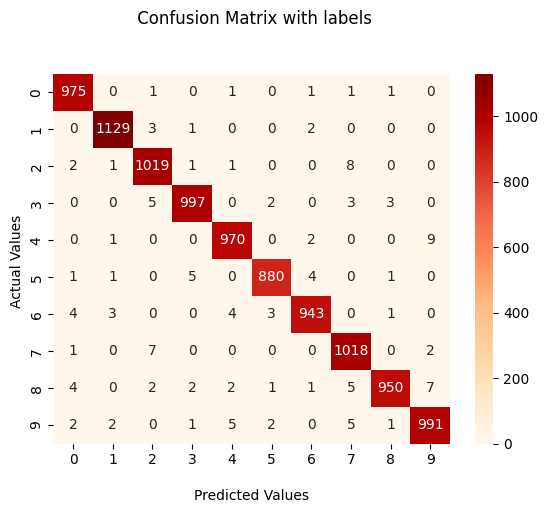

<Figure size 1000x700 with 0 Axes>

In [18]:
ax = sns.heatmap(cm, annot=True, cmap='OrRd', fmt='')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

####labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])

##### Visualization of data using Confusion Matrix.
plt.figure(figsize = (10,7))
plt.show() 